In [1]:
'''from tensorflow.python.client import device_lib
device_lib.list_local_devices()'''

'from tensorflow.python.client import device_lib\ndevice_lib.list_local_devices()'

In [2]:
'''from google.colab import drive
drive.mount('/content/drive/')'''

"from google.colab import drive\ndrive.mount('/content/drive/')"

In [3]:
#!pip install WordCloud

In [4]:
!pip install nltk

In [4]:
import numpy as np
import pandas as pd
import pickle
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import seaborn as sns
import math
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import time
%matplotlib inline

In [2]:
'''import os
os.chdir("drive/My Drive/ML_proj/")
!ls'''

'import os\nos.chdir("drive/My Drive/ML_proj/")\n!ls'

In [5]:
df = pd.read_csv('data/kickstarter-projects/ks-projects-201801.csv')
data = df
print(data.dtypes)
state_set = set(data.state)
print(state_set)
'''del df['usd pledged']
del df['ID']'''

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object
{'suspended', 'undefined', 'failed', 'live', 'successful', 'canceled'}


"del df['usd pledged']\ndel df['ID']"

In [6]:
data[:8]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,successful,16,US,1205.0,1205.0,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.0,failed,40,US,453.0,453.0,25000.00


In [7]:
print(data.shape[0], 'rows and', df.shape[1], 'columns')

378661 rows and 15 columns


## Remove Null Name and USD Pledged Data

In [8]:
df.isnull().sum()/df.shape[0]

ID                  0.000000
name                0.000011
category            0.000000
main_category       0.000000
currency            0.000000
deadline            0.000000
goal                0.000000
launched            0.000000
pledged             0.000000
state               0.000000
backers             0.000000
country             0.000000
usd pledged         0.010027
usd_pledged_real    0.000000
usd_goal_real       0.000000
dtype: float64

In [11]:
'''df[(df['name'].isnull()) | (df['usd pledged'].isnull())]'''

"df[(df['name'].isnull()) | (df['usd pledged'].isnull())]"

In [9]:
df = df.dropna(axis=0, subset=['name', 'usd pledged'])

In [10]:
df.isnull().sum()/df.shape[0]

ID                  0.0
name                0.0
category            0.0
main_category       0.0
currency            0.0
deadline            0.0
goal                0.0
launched            0.0
pledged             0.0
state               0.0
backers             0.0
country             0.0
usd pledged         0.0
usd_pledged_real    0.0
usd_goal_real       0.0
dtype: float64

## Categories count

In [11]:
print(len(df.main_category.unique()), "Main categories")

15 Main categories


In [12]:
print(df.main_category.unique()) #show count

['Publishing' 'Film & Video' 'Music' 'Food' 'Design' 'Crafts' 'Games'
 'Comics' 'Fashion' 'Theater' 'Art' 'Photography' 'Technology' 'Dance'
 'Journalism']


In [13]:
print(len(df.category.unique()), "sub categories")

159 sub categories


In [14]:
print(df.category.unique()) #show count

['Poetry' 'Narrative Film' 'Music' 'Film & Video' 'Restaurants' 'Food'
 'Drinks' 'Product Design' 'Documentary' 'Nonfiction' 'Indie Rock'
 'Crafts' 'Games' 'Tabletop Games' 'Design' 'Comic Books' 'Art Books'
 'Fashion' 'Childrenswear' 'Theater' 'Comics' 'DIY' 'Webseries'
 'Animation' 'Food Trucks' 'Public Art' 'Illustration' 'Photography' 'Pop'
 'People' 'Art' 'Family' 'Fiction' 'Accessories' 'Rock' 'Hardware'
 'Software' 'Weaving' 'Gadgets' 'Web' 'Jazz' 'Ready-to-wear' 'Festivals'
 'Video Games' 'Anthologies' 'Publishing' 'Shorts' 'Electronic Music'
 'Radio & Podcasts' 'Apps' 'Cookbooks' 'Apparel' 'Metal' 'Comedy'
 'Hip-Hop' 'Periodicals' 'Dance' 'Technology' 'Painting' 'World Music'
 'Photobooks' 'Drama' 'Architecture' 'Young Adult' 'Latin' 'Mobile Games'
 'Flight' 'Fine Art' 'Action' 'Playing Cards' 'Makerspaces' 'Punk'
 'Thrillers' "Children's Books" 'Audio' 'Performance Art' 'Ceramics'
 'Vegan' 'Graphic Novels' 'Fabrication Tools' 'Performances' 'Sculpture'
 'Sound' 'Stationery' '

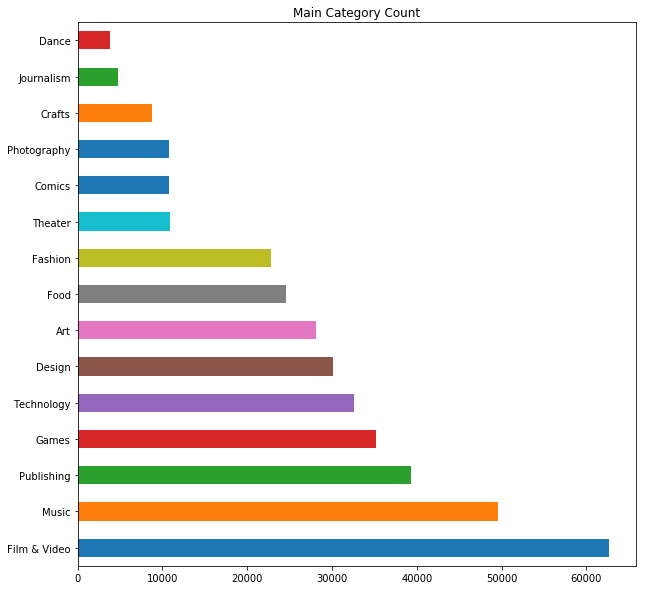

In [15]:
title1 = 'Main Category Count'
df['main_category'].value_counts().plot(kind='barh', title=title1, figsize=(10,10))

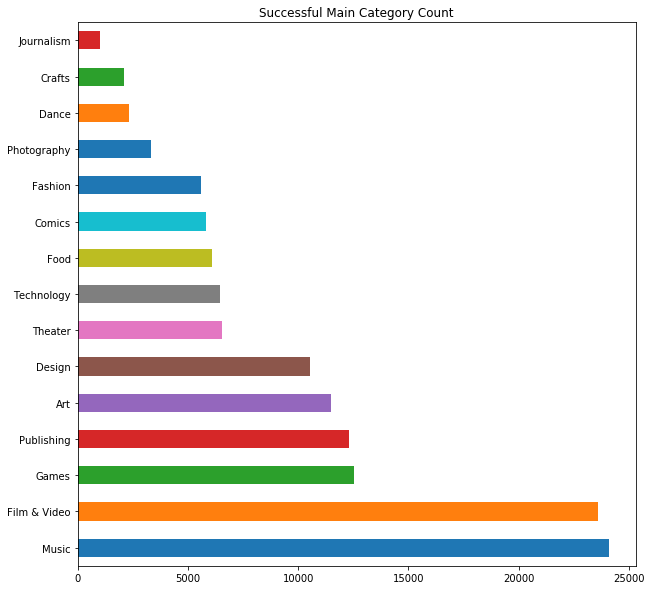

In [16]:
title1 = 'Successful Main Category Count'
df[df['state']=='successful']['main_category'].value_counts().plot(kind='barh', title=title1, figsize=(10,10))

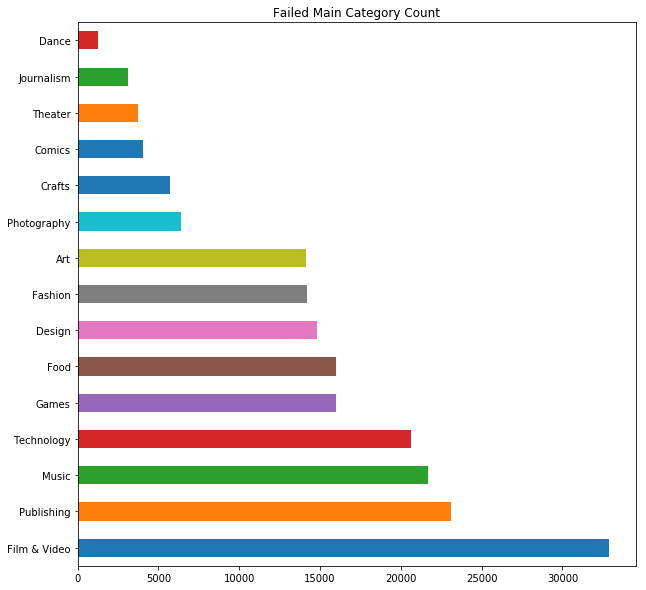

In [17]:
title1 = 'Failed Main Category Count'
df[df['state']=='failed']['main_category'].value_counts().plot(kind='barh', title=title1, figsize=(10,10))

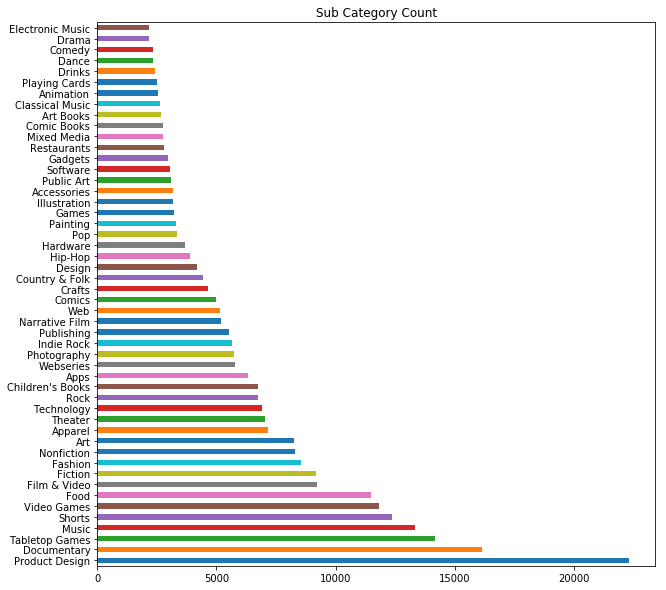

In [18]:
title1 = 'Sub Category Count'
df['category'].value_counts()[:50].plot(kind='barh', title=title1, figsize=(10,10))

133851


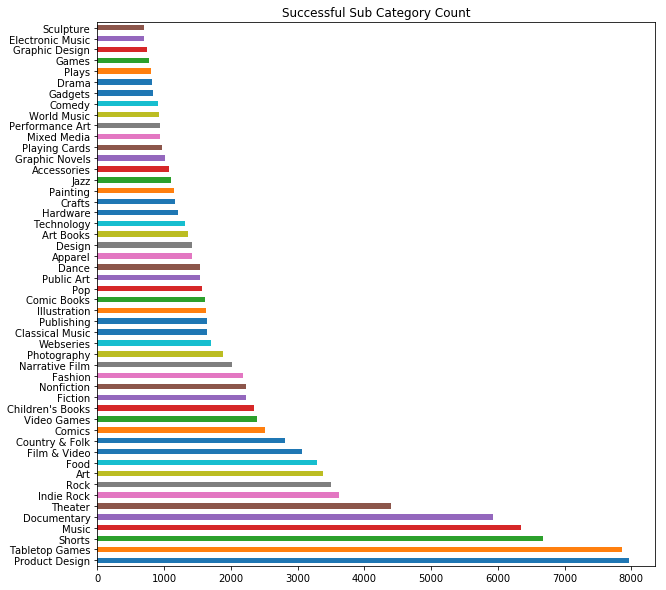

In [19]:
title1 = 'Successful Sub Category Count'
print(df[df['state']=='successful']['category'].count())
df[df['state']=='successful']['category'].value_counts()[:50].plot(kind='barh', title=title1, figsize=(10,10))

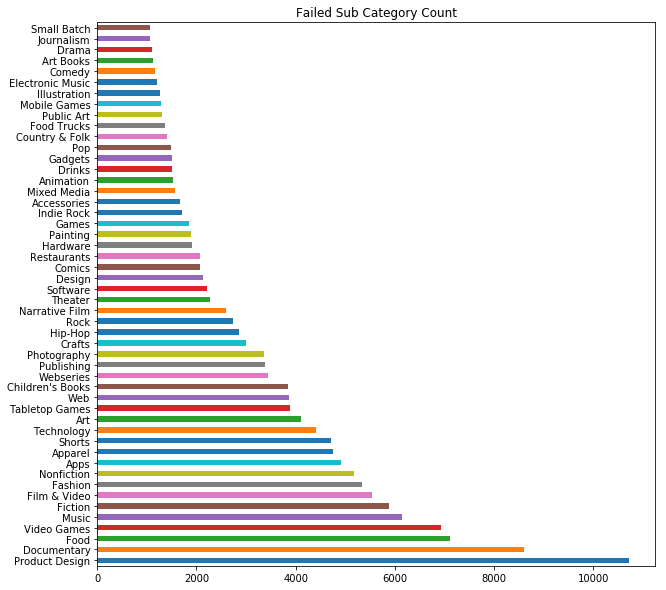

In [20]:
title1 = 'Failed Sub Category Count'
df[df['state']=='failed']['category'].value_counts()[:50].plot(kind='barh', title=title1, figsize=(10,10))

## State Pie Chart

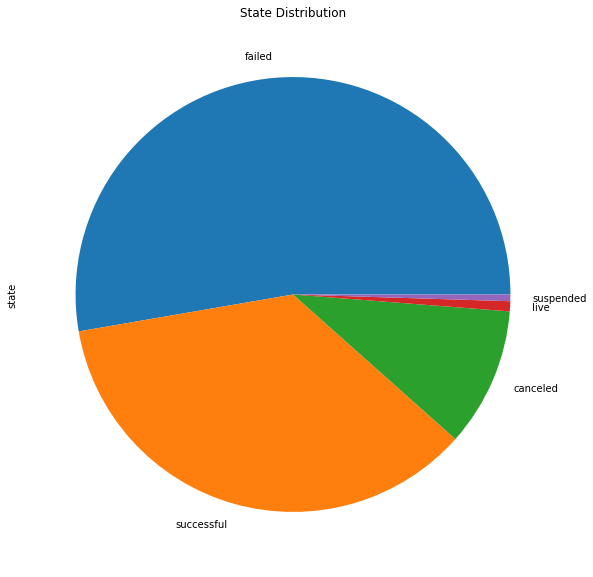

In [21]:
title1 = 'State Distribution'
df['state'].value_counts().plot(kind='pie', title=title1, figsize=(10,10))

**Only keep successful and failed states** italicized text

In [22]:
df = df[(df['state']=='failed') | (df['state']=='successful')]

In [23]:
len(df)

331462

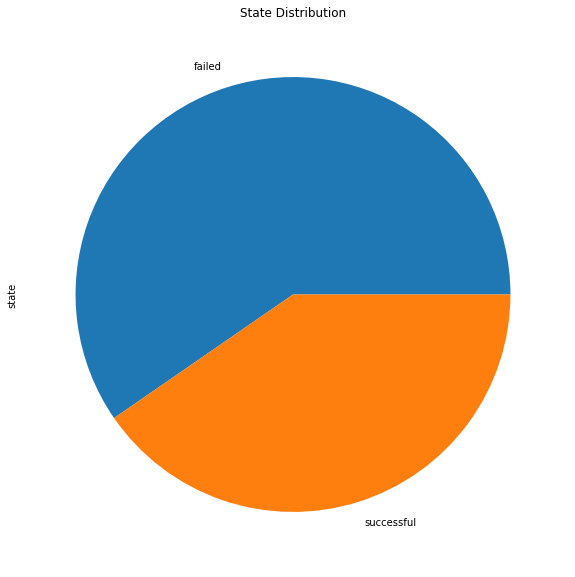

In [24]:
df['state'].value_counts().plot(kind='pie', title=title1, figsize=(10,10))

In [25]:
print(len(df[(df['state']=='failed')])/len(df['state']), "failed")

0.5961799542632338 failed


## Count Name and use NB

**Successful projects name word count** 

<function matplotlib.pyplot.show(*args, **kw)>

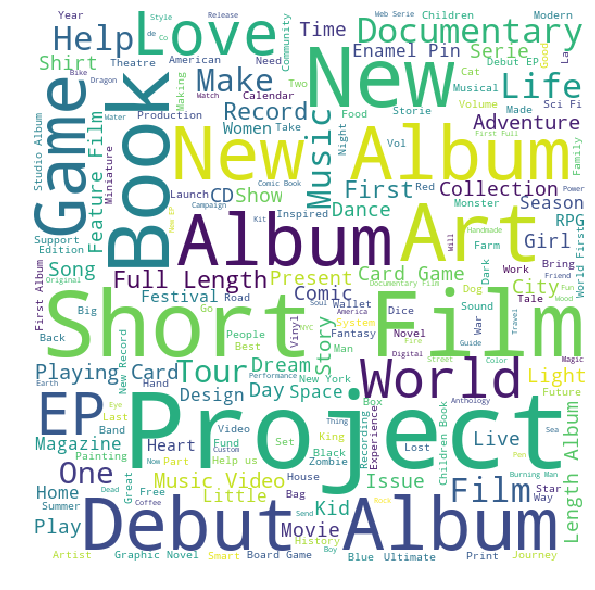

In [26]:
success_words = ' '.join(list(df[df['state']=='successful']['name']))
success_WC = WordCloud(background_color='white', width=512, height=512, contour_color='steelblue').generate(success_words)
plt.figure(figsize=(8,8), facecolor='white')
plt.imshow(success_WC)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

**Failed projects name word count** 

<function matplotlib.pyplot.show(*args, **kw)>

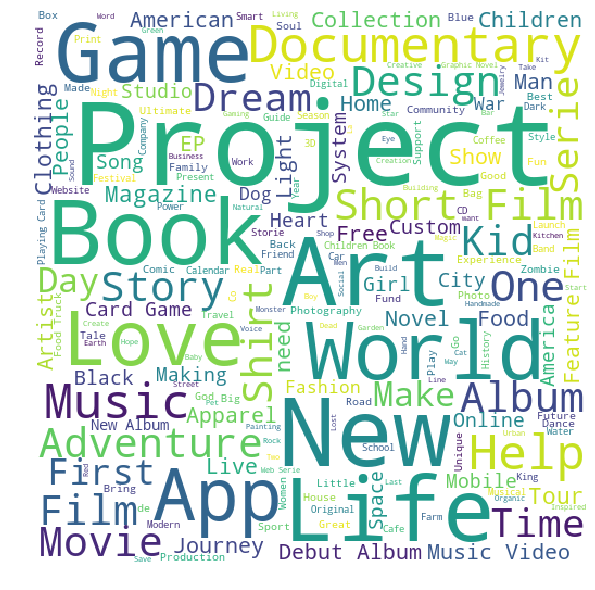

In [27]:
failed_words = ' '.join(list(df[df['state']=='failed']['name']))
failed_WC = WordCloud(background_color='white', width=512, height=512, contour_color='steelblue').generate(failed_words)
plt.figure(figsize=(8,8), facecolor='white')
plt.imshow(failed_WC)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

In [28]:
name_df = df[['name','state']]
name_df.describe()

,name,state
count,331462,331462
unique,329386,2
top,New EP/Music Development,failed
freq,13,197611


In [29]:
print(len(name_df[name_df['name'].duplicated() == True]), "Duplicate Names")

2076 Duplicate Names


In [30]:
name_df['length'] = name_df['name'].apply(len)
name_df.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,name,state,length
0,The Songs of Adelaide & Abullah,failed,31
1,Greeting From Earth: ZGAC Arts Capsule For ET,failed,45
2,Where is Hank?,failed,14
3,ToshiCapital Rekordz Needs Help to Complete Album,failed,49
5,Monarch Espresso Bar,successful,20


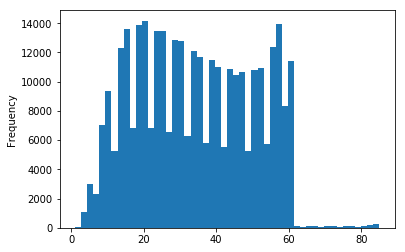

In [31]:
name_df['length'].plot(bins=50,kind='hist')

In [32]:
name_df.length.describe()

count    331462.000000
mean         34.220840
std          15.961965
min           1.000000
25%          21.000000
50%          33.000000
75%          48.000000
max          85.000000
Name: length, dtype: float64

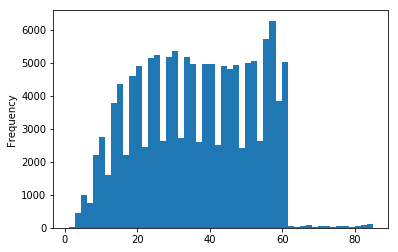

In [33]:
name_df[name_df['state']=='successful']['length'].plot(bins=50,kind='hist')

In [34]:
name_df[name_df['state']=='successful']['length'].describe()

count    133851.000000
mean         36.243323
std          15.620523
min           1.000000
25%          23.000000
50%          36.000000
75%          50.000000
max          85.000000
Name: length, dtype: float64

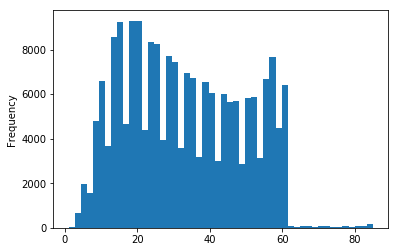

In [35]:
name_df[name_df['state']=='failed']['length'].plot(bins=50,kind='hist')

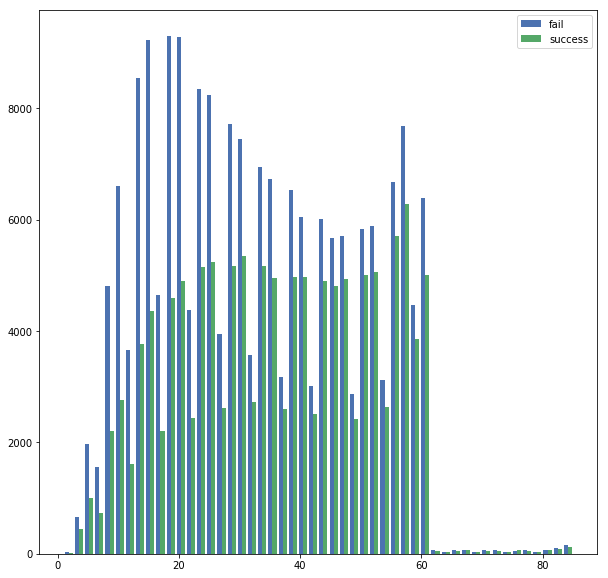

In [36]:
plt.style.use('seaborn-deep')
plt.figure(num=None, figsize=(10, 10))
plt.hist([name_df[name_df['state']=='failed']['length'], name_df[name_df['state']=='successful']['length']], bins=50, label=['fail', 'success'])
plt.legend(loc='upper right')
plt.show()

In [37]:
name_df[name_df['state']=='failed']['length'].describe()

count    197611.000000
mean         32.850919
std          16.045013
min           1.000000
25%          19.000000
50%          31.000000
75%          47.000000
max          85.000000
Name: length, dtype: float64

In [48]:
new_df = pd.DataFrame(np.log1p(df.backers))
new_df['state'] = df.state
new_df.head()

,backers,state
0,0.000000,failed
1,2.772589,failed
2,1.386294,failed
3,0.693147,failed
5,5.416100,successful


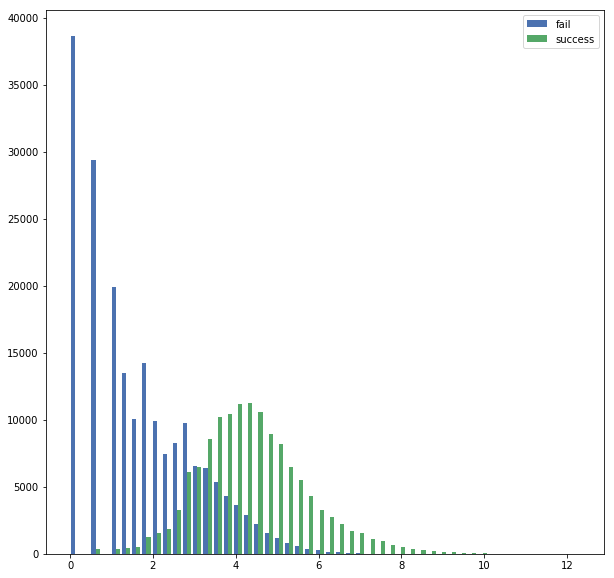

In [49]:
plt.style.use('seaborn-deep')
plt.figure(num=None, figsize=(10, 10))
plt.hist([new_df[new_df['state']=='failed']['backers'], new_df[new_df['state']=='successful']['backers']], bins=50, label=['fail', 'success'])
plt.legend(loc='upper right')
plt.show()

In [40]:
new_df['backers'].describe()

count    331462.000000
mean          2.776850
std           1.889881
min           0.000000
25%           1.098612
50%           2.772589
75%           4.158883
max          12.298574
Name: backers, dtype: float64

In [41]:
name_df[name_df['length']==85][:10]

,name,state,length
2060,My first CD gained worldwide recognition. I'm...,failed,85
5429,Let me paint your Twitter Avatar & Favorite Tw...,failed,85
8491,"The Ladies Room, a photo book of gal pals doin...",successful,85
11886,postTV : new platform for exhibiting and produ...,failed,85
18043,Tic Tac Toe Ten ... a hybrid of chess and tic ...,failed,85
25268,Let's print a book and donate hundreds of copi...,failed,85
26431,EXP. Video Game Art & Culture magazine: mass p...,successful,85
27786,* The Green Emerald * A Storybook Rock Opera b...,successful,85
30629,We'll Have Our Cake and Bake It Too! Apron St...,failed,85
33727,Weathervane- Ltd hand screened Poster: Sharon ...,successful,85


In [42]:
import string
mess = 'sample message!...'
nopunc=[char for char in mess if char not in string.punctuation]
nopunc=''.join(nopunc)
print(nopunc)

sample message


In [45]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1045)>


False

In [44]:
stopwords.words('english')[0:10]

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/amitranganathan/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.7/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.7/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.7/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [48]:
nopunc.split()

['sample', 'message']

In [49]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [50]:
clean_mess

['sample', 'message']

**Change below function**

In [51]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [52]:
name_df.head()

,name,state,length
0,The Songs of Adelaide & Abullah,failed,31
1,Greeting From Earth: ZGAC Arts Capsule For ET,failed,45
2,Where is Hank?,failed,14
3,ToshiCapital Rekordz Needs Help to Complete Album,failed,49
5,Monarch Espresso Bar,successful,20


In [53]:
name_df['name'].head(5).apply(text_process)

0                           [Songs, Adelaide, Abullah]
1           [Greeting, Earth, ZGAC, Arts, Capsule, ET]
2                                               [Hank]
3    [ToshiCapital, Rekordz, Needs, Help, Complete,...
5                             [Monarch, Espresso, Bar]
Name: name, dtype: object

In [54]:
'''start_time = time.time()
name_df['name'] = name_df['name'].apply(text_process)
print("--- %s seconds ---" % (time.time() - start_time))'''

'start_time = time.time()\nname_df[\'name\'] = name_df[\'name\'].apply(text_process)\nprint("--- %s seconds ---" % (time.time() - start_time))'

In [55]:
name_df.head()

,name,state,length
0,The Songs of Adelaide & Abullah,failed,31
1,Greeting From Earth: ZGAC Arts Capsule For ET,failed,45
2,Where is Hank?,failed,14
3,ToshiCapital Rekordz Needs Help to Complete Album,failed,49
5,Monarch Espresso Bar,successful,20


In [56]:
'''from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(name_df['name'])
print(len(bow_transformer.vocabulary_))'''

"from sklearn.feature_extraction.text import CountVectorizer\nbow_transformer = CountVectorizer(analyzer=text_process).fit(name_df['name'])\nprint(len(bow_transformer.vocabulary_))"

In [57]:
'''bow_transformer_pickle = {"bow_transformer" : bow_transformer}
pickle.dump(bow_transformer_pickle, open("bow_transformer.p", "wb"))'''

'bow_transformer_pickle = {"bow_transformer" : bow_transformer}\npickle.dump(bow_transformer_pickle, open("bow_transformer.p", "wb"))'

In [58]:
bow_transformer = pickle.load(open("bow_transformer.p", "rb"))['bow_transformer']

In [59]:
name4 = name_df['name'][1]
print(name4)

Greeting From Earth: ZGAC Arts Capsule For ET


In [60]:
bow4 = bow_transformer.transform([name4])
print(bow4)
print(bow4.shape)

  (0, 11449)	1
  (0, 27622)	1
  (0, 45732)	1
  (0, 46201)	1
  (0, 62432)	1
  (0, 164402)	1
(1, 193223)


In [61]:
print(bow_transformer.get_feature_names()[11449])

Arts


In [62]:
'''name_bow = bow_transformer.transform(name_df['name'])'''

"name_bow = bow_transformer.transform(name_df['name'])"

In [63]:
'''pickle.dump(name_bow, open("name_bow.p", "wb"))'''

'pickle.dump(name_bow, open("name_bow.p", "wb"))'

In [64]:
name_bow = pickle.load(open("name_bow.p", "rb"))

In [65]:
'''name_bow_matrix = name_bow.toarray()'''

'name_bow_matrix = name_bow.toarray()'

In [66]:
print('Shape of Sparse Matrix: ',name_bow.shape)
print('Amount of non-zero occurences:',name_bow.nnz)

Shape of Sparse Matrix:  (331462, 193223)
Amount of non-zero occurences: 1399430


In [67]:
sparsity =(100.0 * name_bow.nnz/(name_bow.shape[0]*name_bow.shape[1]))
print('sparsity:{}'.format(round(sparsity)))

sparsity:0


In [68]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(name_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 164402)	0.5513250756713832
  (0, 62432)	0.37079812310960825
  (0, 46201)	0.3049670612970679
  (0, 45732)	0.4559815688979309
  (0, 27622)	0.4102042918249398
  (0, 11449)	0.2989276704354195


In [69]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['Project']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['Album']])

4.642264272642903
4.666867624070891


In [70]:
name_tfidf = tfidf_transformer.transform(name_bow)
print(name_tfidf.shape)

(331462, 193223)


In [71]:
len(name_df['state'])

331462

In [72]:
from sklearn.naive_bayes import MultinomialNB
ks_name_model = MultinomialNB().fit(name_tfidf[66292:],name_df['state'][66292:])

In [73]:
ks_name_model.score(name_tfidf[:66292], name_df['state'][:66292])

0.6429885959090086

In [74]:
ts_predictions = ks_name_model.predict(name_tfidf[:66292])
print(ts_predictions)

['failed' 'failed' 'failed' ... 'failed' 'failed' 'failed']


In [75]:
hit = 0
for i in range(len(ts_predictions)):
    if name_df['state'].iloc[i] == ts_predictions[i]:
        hit += 1
    
print(hit/len(ts_predictions))

0.6429885959090086


In [76]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(name_df['state'][:66292],ts_predictions))
print(confusion_matrix(name_df['state'][:66292],ts_predictions))

              precision    recall  f1-score   support

      failed       0.64      0.89      0.75     39292
  successful       0.64      0.29      0.40     27000

   micro avg       0.64      0.64      0.64     66292
   macro avg       0.64      0.59      0.57     66292
weighted avg       0.64      0.64      0.60     66292

[[34793  4499]
 [19168  7832]]


In [77]:
ks_name_model2 = MultinomialNB().fit(name_tfidf[:66292],name_df['state'][:66292])

In [78]:
ts_predictions2 = ks_name_model2.predict(name_tfidf[66292:])
print(ts_predictions2)

['failed' 'failed' 'successful' ... 'failed' 'failed' 'failed']


In [79]:
ks_name_model2.score(name_tfidf[66292:], name_df['state'][66292:])

0.6272202737866275

In [80]:
hit = 0
for i in range(len(ts_predictions2)):
    if name_df['state'].iloc[i] == ts_predictions2[i]:
        hit += 1
    
print(hit/len(ts_predictions2))

0.5720933740619225


In [81]:
print(classification_report(name_df['state'][66292:],ts_predictions2))
print(confusion_matrix(name_df['state'][66292:],ts_predictions2))

              precision    recall  f1-score   support

      failed       0.63      0.92      0.75    158319
  successful       0.62      0.20      0.30    106851

   micro avg       0.63      0.63      0.63    265170
   macro avg       0.62      0.56      0.52    265170
weighted avg       0.62      0.63      0.57    265170

[[145388  12931]
 [ 85919  20932]]


In [82]:
nb_pred = np.concatenate([ts_predictions,ts_predictions2])
len(nb_pred)

331462

**Pipeline**

In [83]:
'''from sklearn.pipeline import Pipeline
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])'''

"from sklearn.pipeline import Pipeline\npipeline = Pipeline([\n   ( 'bow',CountVectorizer(analyzer=text_process)),\n    ('tfidf',TfidfTransformer()),\n    ('classifier',MultinomialNB()),\n])"

In [84]:
'''from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(name_df['name'],name_df['state'],test_size=0.2)'''

"from sklearn.model_selection import train_test_split\nmsg_train,msg_test,label_train,label_test = train_test_split(name_df['name'],name_df['state'],test_size=0.2)"

In [85]:
'''pipeline.fit(msg_train,label_train)'''

'pipeline.fit(msg_train,label_train)'

In [86]:
'''predictions = pipeline.predict(msg_test)'''

'predictions = pipeline.predict(msg_test)'

In [87]:
'''print(classification_report(label_test,predictions))'''

'print(classification_report(label_test,predictions))'

## Currency

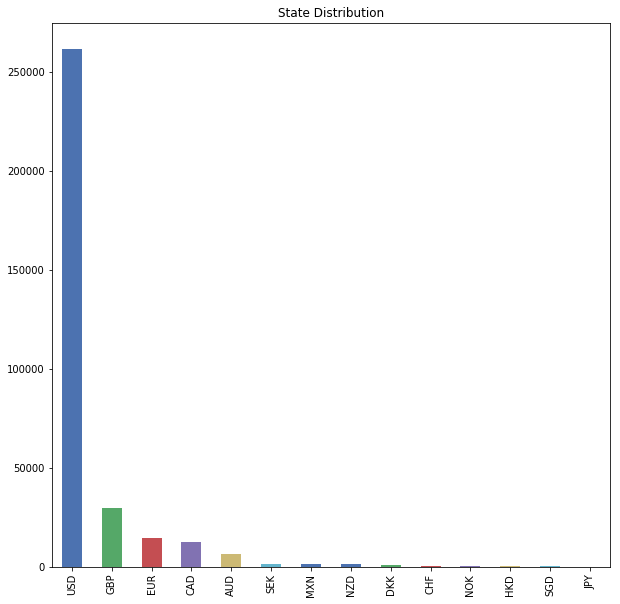

In [88]:
df.currency.value_counts().plot(kind='bar', title=title1, figsize=(10,10))

## Duration

In [89]:
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])

df['duration'] = df['deadline'].subtract(df['launched'])
df['duration'] = df['duration'].astype('timedelta64[D]')

In [90]:
df['duration'].value_counts().head()

29.0    148364
59.0     27954
44.0     15237
30.0     11715
34.0      8613
Name: duration, dtype: int64

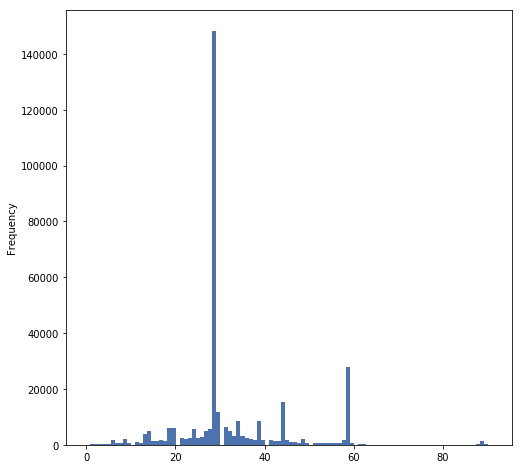

In [91]:
df['duration'].plot(bins=100,kind='hist', figsize=(8,8))

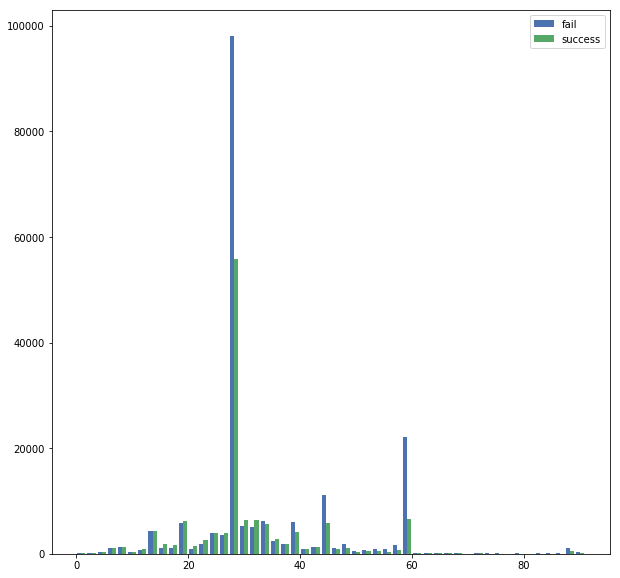

In [92]:
plt.style.use('seaborn-deep')
plt.figure(num=None, figsize=(10, 10))
plt.hist([df[df['state']=='failed']['duration'],df[df['state']=='successful']['duration']], bins=50, label=['fail', 'success'])
plt.legend(loc='upper right')
plt.show()

## Goal

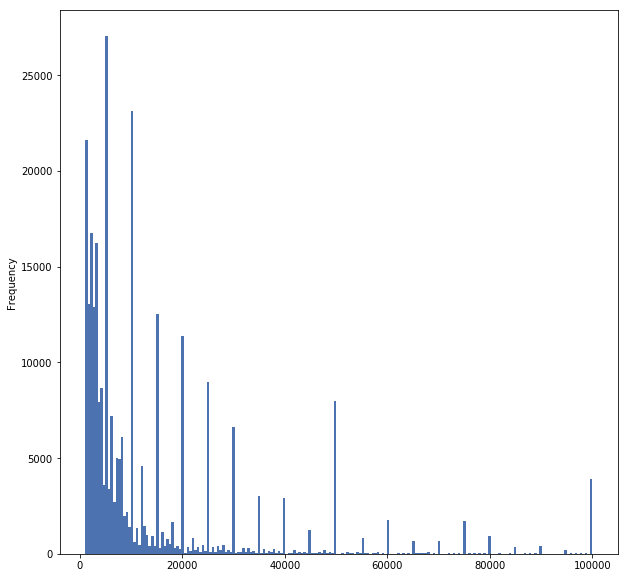

In [93]:
df = df[(df['goal'] <= 100000) & (df['goal'] >= 1000)].copy()
df['goal'].plot(bins=200,kind='hist', figsize=(10,10))

In [94]:
len(df)

278473

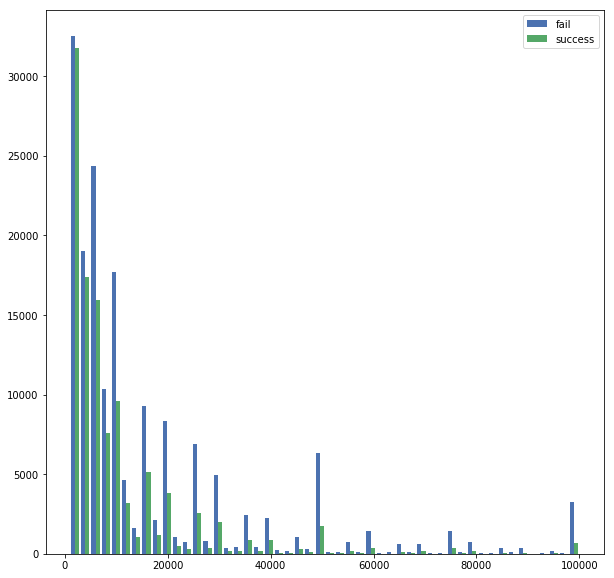

In [95]:
plt.style.use('seaborn-deep')
plt.figure(num=None, figsize=(10, 10))
plt.hist([df[df['state']=='failed']['goal'],df[df['state']=='successful']['goal']], bins=50, label=['fail', 'success'])
plt.legend(loc='upper right')
plt.show()

**More features**

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278473 entries, 0 to 378660
Data columns (total 16 columns):
ID                  278473 non-null int64
name                278473 non-null object
category            278473 non-null object
main_category       278473 non-null object
currency            278473 non-null object
deadline            278473 non-null datetime64[ns]
goal                278473 non-null float64
launched            278473 non-null datetime64[ns]
pledged             278473 non-null float64
state               278473 non-null object
backers             278473 non-null int64
country             278473 non-null object
usd pledged         278473 non-null float64
usd_pledged_real    278473 non-null float64
usd_goal_real       278473 non-null float64
duration            278473 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(2), object(6)
memory usage: 36.1+ MB


In [97]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,59.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,44.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,29.0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00,34.0


Date

In [98]:
'''import time
def date_to_month(val):
    return val.month
def date_to_quater(val):
    return val.quarter
def date_to_weekofyear(val):
    return val.weekofyear'''

'import time\ndef date_to_month(val):\n    return val.month\ndef date_to_quater(val):\n    return val.quarter\ndef date_to_weekofyear(val):\n    return val.weekofyear'

In [99]:
'''df['start_month'] = df['launched'].apply(date_to_month)
df['end_month'] = df['deadline'].apply(date_to_month)'''

"df['start_month'] = df['launched'].apply(date_to_month)\ndf['end_month'] = df['deadline'].apply(date_to_month)"

In [100]:
'''df['start_quater'] = df['launched'].apply(date_to_quater)
df['end_quater'] = df['deadline'].apply(date_to_quater)'''

"df['start_quater'] = df['launched'].apply(date_to_quater)\ndf['end_quater'] = df['deadline'].apply(date_to_quater)"

In [101]:
'''df['start_weekofyear'] = df['launched'].apply(date_to_weekofyear)
df['end_weekofyear'] = df['deadline'].apply(date_to_weekofyear)'''

"df['start_weekofyear'] = df['launched'].apply(date_to_weekofyear)\ndf['end_weekofyear'] = df['deadline'].apply(date_to_weekofyear)"

Ratio of goal and dealine

In [102]:
def ratio_goal_dura(val):
    goal, duration = val
    if duration > 0:
        return goal/duration
    else:
        return goal

In [103]:
df['ratio_goal_duration'] = df[['goal','duration']].apply(ratio_goal_dura, axis=1)

In [104]:
df['ratio_goal_duration'].head()

0      17.241379
1     508.474576
2    1022.727273
3     172.413793
5    1470.588235
Name: ratio_goal_duration, dtype: float64

Goal and Duration Failed Rate

In [105]:
goal_count_df = df['goal'].value_counts()
goal_count_df.head()

5000.0     26111
10000.0    22749
1000.0     15325
3000.0     14085
2000.0     13679
Name: goal, dtype: int64

In [106]:
goal_fail_df = df[df['state']=='failed']['goal'].value_counts()
goal_fail_df.head()

5000.0     16306
10000.0    14942
15000.0     7970
1000.0      7944
20000.0     7745
Name: goal, dtype: int64

In [107]:
def goal_fail_rate(val):
    if val in goal_fail_df.index:
        return goal_fail_df.loc[val] / goal_count_df[val]
    else:
        return 0

In [108]:
goal_fail_rate_df = df['goal'].apply(goal_fail_rate)

In [109]:
df['goal_fail_rate'] = goal_fail_rate_df
#df['goal_success_rate_df'] = goal_succ_rate_df

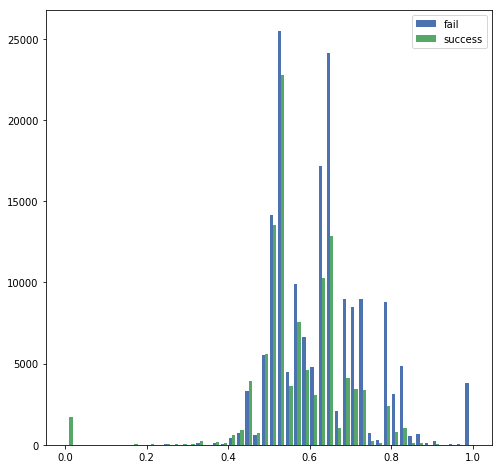

In [110]:
plt.style.use('seaborn-deep')
plt.figure(num=None, figsize=(8, 8))
plt.hist([df[df['state']=='failed']['goal_fail_rate'],df[df['state']=='successful']['goal_fail_rate']], bins=50, label=['fail', 'success'])
plt.legend(loc='upper right')
plt.show()

In [111]:
category_count_df = df['category'].value_counts()
category_count_df.head()

Product Design    16927
Documentary       13235
Music             10640
Tabletop Games    10198
Shorts             9485
Name: category, dtype: int64

In [112]:
category_fail_df = df[df['state']=='failed']['category'].value_counts()
category_fail_df.head()

Product Design    9741
Documentary       7749
Food              6102
Video Games       5790
Music             5286
Name: category, dtype: int64

In [113]:
def category_fail_rate(val):
    if val in category_fail_df.index:
        return category_fail_df.loc[val] / category_count_df[val]
    else:
        return 0

In [114]:
category_fail_rate_df = df['category'].apply(category_fail_rate)

In [115]:
df['category_fail_rate'] = category_fail_rate_df

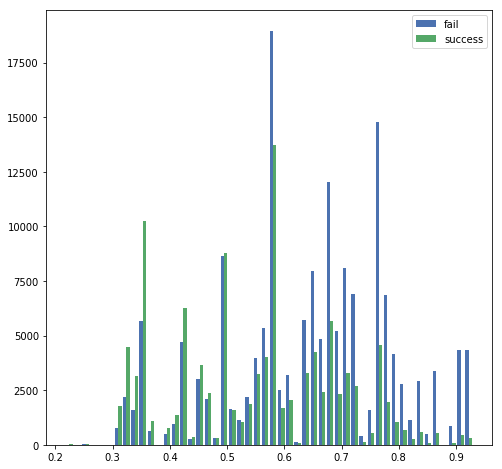

In [116]:
plt.style.use('seaborn-deep')
plt.figure(num=None, figsize=(8, 8))
plt.hist([df[df['state']=='failed']['category_fail_rate'],df[df['state']=='successful']['category_fail_rate']], bins=50, label=['fail', 'success'])
plt.legend(loc='upper right')
plt.show()

In [117]:
main_category_count_df = df['main_category'].value_counts()
main_category_count_df.head()

Film & Video    48011
Music           39681
Publishing      30496
Games           23937
Technology      23061
Name: main_category, dtype: int64

In [118]:
main_category_fail_df = df[df['state']=='failed']['main_category'].value_counts()
main_category_fail_df.head()

Film & Video    28045
Publishing      20671
Music           19004
Technology      17488
Games           13726
Name: main_category, dtype: int64

In [119]:
def main_category_fail_rate(val):
    if val in main_category_fail_df.index:
        return main_category_fail_df.loc[val] / main_category_count_df[val]
    else:
        return 0

In [120]:
main_category_fail_rate_df = df['main_category'].apply(main_category_fail_rate)

In [121]:
df['main_category_fail_rate'] = main_category_fail_rate_df

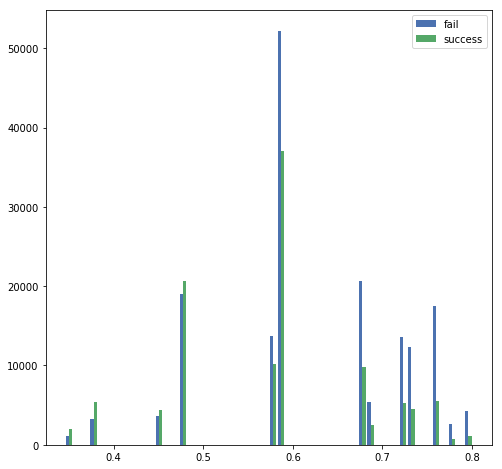

In [122]:
plt.style.use('seaborn-deep')
plt.figure(num=None, figsize=(8, 8))
plt.hist([df[df['state']=='failed']['main_category_fail_rate'],df[df['state']=='successful']['main_category_fail_rate']], bins=50, label=['fail', 'success'])
plt.legend(loc='upper right')
plt.show()

In [123]:
duration_count_df = df['duration'].value_counts()
duration_count_df.head()

29.0    125791
59.0     23519
44.0     13496
30.0     10494
34.0      7676
Name: duration, dtype: int64

In [124]:
duration_fail_df = df[df['state']=='failed']['duration'].value_counts()
duration_fail_df.head()

29.0    82088
59.0    18340
44.0     9048
30.0     4747
39.0     4719
Name: duration, dtype: int64

In [125]:
def duration_fail_rate(val):
    if val in duration_fail_df.index:
        return duration_fail_df.loc[val] / duration_count_df[val]
    else:
        return 0

In [126]:
duration_fail_rate_df = df['duration'].apply(duration_fail_rate)

In [127]:
df['duration_fail_rate'] = goal_fail_rate_df

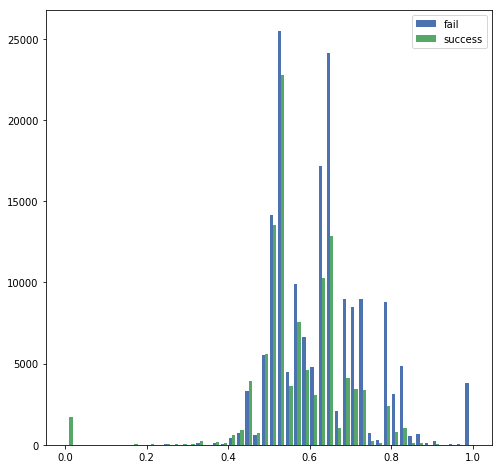

In [128]:
plt.style.use('seaborn-deep')
plt.figure(num=None, figsize=(8, 8))
plt.hist([df[df['state']=='failed']['duration_fail_rate'],df[df['state']=='successful']['duration_fail_rate']], bins=50, label=['fail', 'success'])
plt.legend(loc='upper right')
plt.show()

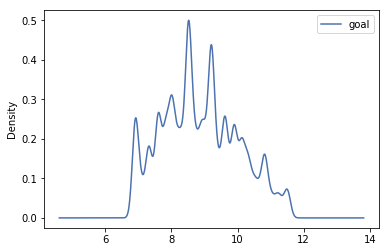

In [129]:
pd.DataFrame(np.log1p(df.goal)).plot.kde()

state
failed        AxesSubplot(0.125,0.125;0.775x0.755)
successful    AxesSubplot(0.125,0.125;0.775x0.755)
Name: goal, dtype: object

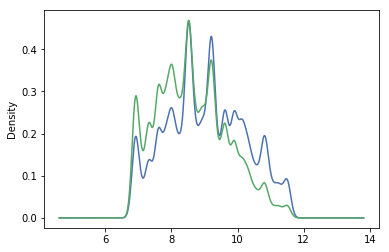

In [130]:
new_df_goal = pd.DataFrame(np.log1p(df.goal))
new_df_goal['state'] = df.state
new_df_goal.groupby('state').goal.plot.kde()

In [131]:
goal_fail_df = df[df['state']=='failed']['goal'].value_counts()
goal_fail_df.head()

5000.0     16306
10000.0    14942
15000.0     7970
1000.0      7944
20000.0     7745
Name: goal, dtype: int64

In [132]:
'''df['goal_log'] = np.log1p(df.goal)
df['usd_goal_log'] = np.log1p(df.usd_goal_real)'''

"df['goal_log'] = np.log1p(df.goal)\ndf['usd_goal_log'] = np.log1p(df.usd_goal_real)"

## Remove name, all pledged column, ID,  deadline, launched and backer

In [133]:
df_m = df.drop(['name', 'pledged', 'usd pledged', 'usd_pledged_real','ID', 'launched', 'deadline', 'backers'], 1)
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278473 entries, 0 to 378660
Data columns (total 13 columns):
category                   278473 non-null object
main_category              278473 non-null object
currency                   278473 non-null object
goal                       278473 non-null float64
state                      278473 non-null object
country                    278473 non-null object
usd_goal_real              278473 non-null float64
duration                   278473 non-null float64
ratio_goal_duration        278473 non-null float64
goal_fail_rate             278473 non-null float64
category_fail_rate         278473 non-null float64
main_category_fail_rate    278473 non-null float64
duration_fail_rate         278473 non-null float64
dtypes: float64(8), object(5)
memory usage: 29.7+ MB


In [134]:
def name_excl(val):
    if ('!' in val.lower()):
        return 1
    else:
        return 0
def name_hastag(val):
    if ('#' in val.lower()):
        return 1
    else:
        return 0
    
# Most success counts
def name_short_film(val):
    if ('short film' in val.lower()):
        return 1
    else:
        return 0
def name_new_album(val):
    if ('new album' in val.lower()):
        return 1
    else:
        return 0
def name_EP(val):
    if ('EP ' in val):
        return 1
    else:
        return 0
def name_full_length(val):
    if ('full length' in val.lower()):
        return 1
    else:
        return 0
def name_debut_album(val):
    if ('debut album' in val.lower()):
        return 1
    else:
        return 0

# Most fail counts
def name_life(val):
    if ('life' in val.lower()):
        return 1
    else:
        return 0
def name_world(val):
    if ('world' in val.lower()):
        return 1
    else:
        return 0
def name_app(val):
    if ('app ' in val.lower()):
        return 1
    else:
        return 0
def name_shirt(val):
    if ('shirt' in val.lower()):
        return 1
    else:
        return 0
def name_new(val):
    if ('new ' in val.lower()):
        return 1
    else:
        return 0

In [135]:
df_m['name_len'] = df['name'].apply(len)
df_m['name_excl'] = df['name'].apply(name_excl)
'''df_m['name_hastag'] = df['name'].apply(name_hastag)
df_m['name_short_film'] = df['name'].apply(name_short_film)
df_m['name_new_album'] = df['name'].apply(name_new_album)
df_m['name_EP'] = df['name'].apply(name_EP)
df_m['name_full_length'] = df['name'].apply(name_full_length)
df_m['name_debut_album'] = df['name'].apply(name_debut_album)
df_m['name_life'] = df['name'].apply(name_life)
df_m['name_world'] = df['name'].apply(name_world)
df_m['name_app'] = df['name'].apply(name_app)
df_m['name_shirt'] = df['name'].apply(name_shirt)
df_m['name_new'] = df['name'].apply(name_new)'''

"df_m['name_hastag'] = df['name'].apply(name_hastag)\ndf_m['name_short_film'] = df['name'].apply(name_short_film)\ndf_m['name_new_album'] = df['name'].apply(name_new_album)\ndf_m['name_EP'] = df['name'].apply(name_EP)\ndf_m['name_full_length'] = df['name'].apply(name_full_length)\ndf_m['name_debut_album'] = df['name'].apply(name_debut_album)\ndf_m['name_life'] = df['name'].apply(name_life)\ndf_m['name_world'] = df['name'].apply(name_world)\ndf_m['name_app'] = df['name'].apply(name_app)\ndf_m['name_shirt'] = df['name'].apply(name_shirt)\ndf_m['name_new'] = df['name'].apply(name_new)"

In [136]:
'''df_m['nb_name_pred'] = nb_pred'''

"df_m['nb_name_pred'] = nb_pred"

In [137]:
state = df_m['state']
df_m = df_m.drop(['state'],1)
df_m_no_hot = df_m.copy()

In [138]:
df_m.head()

,category,main_category,currency,goal,country,usd_goal_real,duration,ratio_goal_duration,goal_fail_rate,category_fail_rate,main_category_fail_rate,duration_fail_rate,name_len,name_excl
0,Poetry,Publishing,GBP,1000.0,GB,1533.95,58.0,17.241379,0.518369,0.688414,0.677827,0.518369,31,0
1,Narrative Film,Film & Video,USD,30000.0,US,30000.00,59.0,508.474576,0.713107,0.553550,0.584137,0.713107,45,0
2,Narrative Film,Film & Video,USD,45000.0,US,45000.00,44.0,1022.727273,0.786590,0.553550,0.584137,0.786590,14,0
3,Music,Music,USD,5000.0,US,5000.00,29.0,172.413793,0.624488,0.496805,0.478919,0.624488,49,0
5,Restaurants,Food,USD,50000.0,US,50000.00,34.0,1470.588235,0.782548,0.797316,0.722792,0.782548,20,0


In [139]:
le = LabelEncoder()
for column in df_m_no_hot.columns:
    if df_m_no_hot[column].dtype == type(object):
        le = LabelEncoder()
        df_m_no_hot[column] = le.fit_transform(df_m_no_hot[column].astype(str))

In [536]:
for column in df_m_no_hot.columns:
    if df_m_no_hot[column].dtype == type(int):
        df_m_no_hot[column] = df_m_no_hot[column].as_type(float)

In [537]:
df_m_no_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278473 entries, 0 to 378660
Data columns (total 14 columns):
category                   278473 non-null int64
main_category              278473 non-null int64
currency                   278473 non-null int64
goal                       278473 non-null float64
country                    278473 non-null int64
usd_goal_real              278473 non-null float64
duration                   278473 non-null float64
ratio_goal_duration        278473 non-null float64
goal_fail_rate             278473 non-null float64
category_fail_rate         278473 non-null float64
main_category_fail_rate    278473 non-null float64
duration_fail_rate         278473 non-null float64
name_len                   278473 non-null int64
name_excl                  278473 non-null int64
dtypes: float64(8), int64(6)
memory usage: 41.9 MB


In [140]:
df_m_no_hot.head()

,category,main_category,currency,goal,country,usd_goal_real,duration,ratio_goal_duration,goal_fail_rate,category_fail_rate,main_category_fail_rate,duration_fail_rate,name_len,name_excl
0,108,12,5,1000.0,9,1533.95,58.0,17.241379,0.518369,0.688414,0.677827,0.518369,31,0
1,93,6,13,30000.0,21,30000.00,59.0,508.474576,0.713107,0.553550,0.584137,0.713107,45,0
2,93,6,13,45000.0,21,45000.00,44.0,1022.727273,0.786590,0.553550,0.584137,0.786590,14,0
3,90,10,13,5000.0,21,5000.00,29.0,172.413793,0.624488,0.496805,0.478919,0.624488,49,0
5,123,7,13,50000.0,21,50000.00,34.0,1470.588235,0.782548,0.797316,0.722792,0.782548,20,0


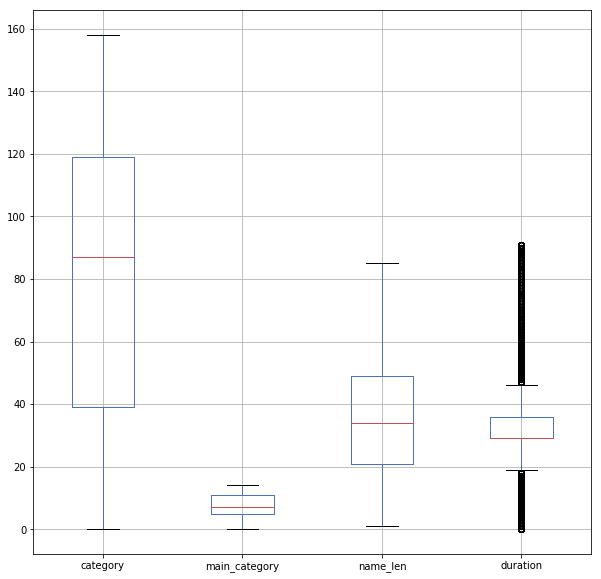

In [141]:
df_m_no_hot[['category','main_category','name_len','duration']].boxplot(figsize=(10,10))

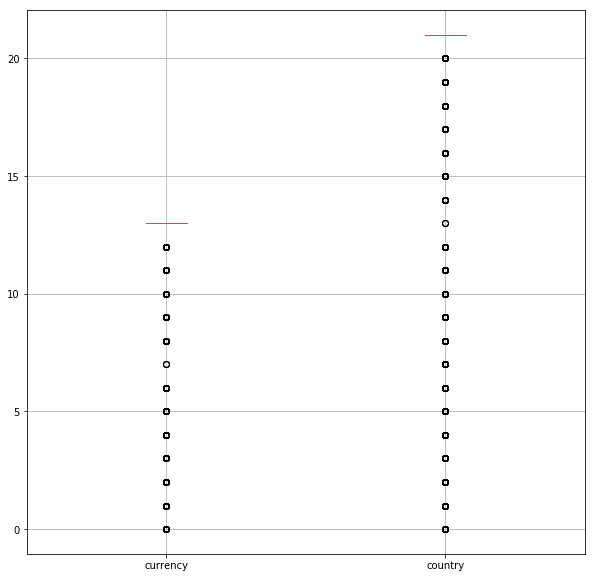

In [142]:
df_m_no_hot[['currency','country']].boxplot(figsize=(10,10))

In [143]:
#df_m_no_hot[['goal']].boxplot(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126658b00>,
      dtype=object)

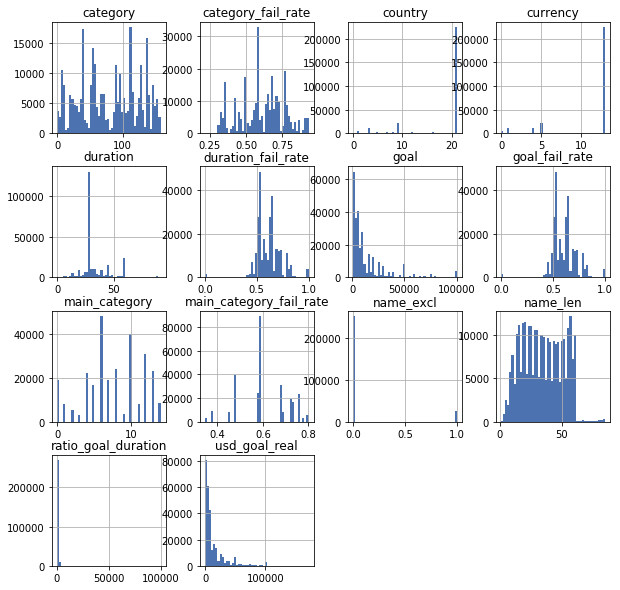

In [144]:
df_m_no_hot.hist(figsize=(10,10), bins=50)

main_category
0     [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
1     [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
2     [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
3     [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
4     [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
5     [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
6     [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
7     [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
8     [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
9     [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
10    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
11    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
12    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
13    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
14    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
dtype: object

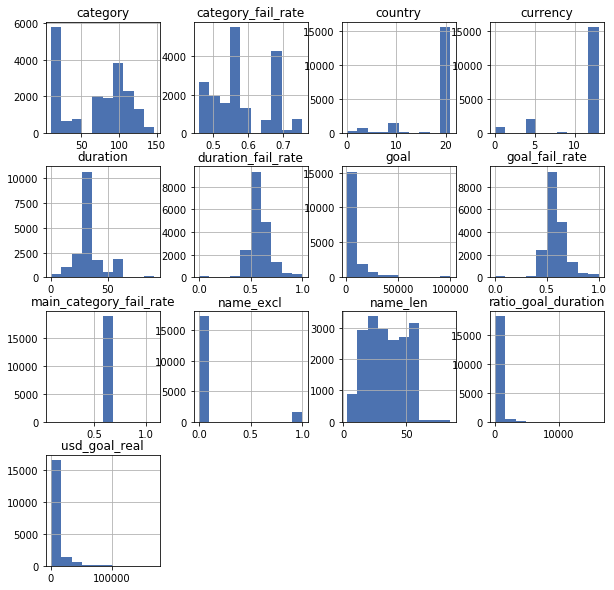

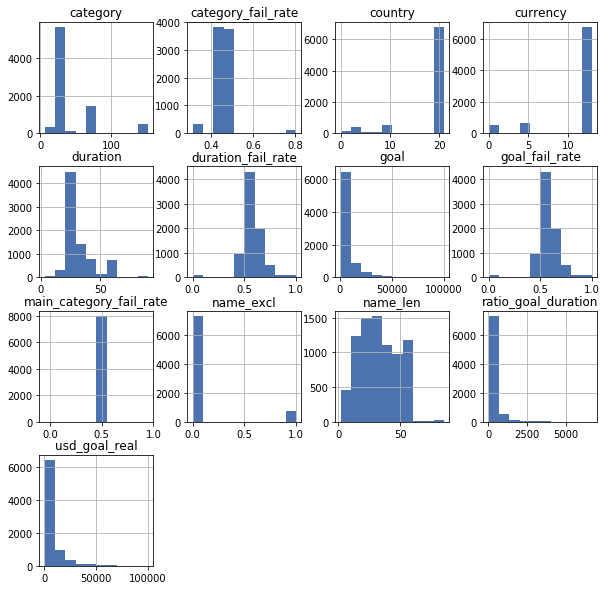

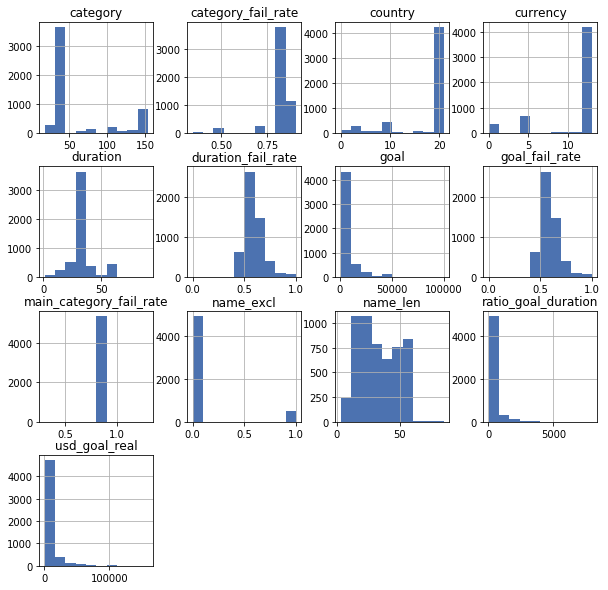

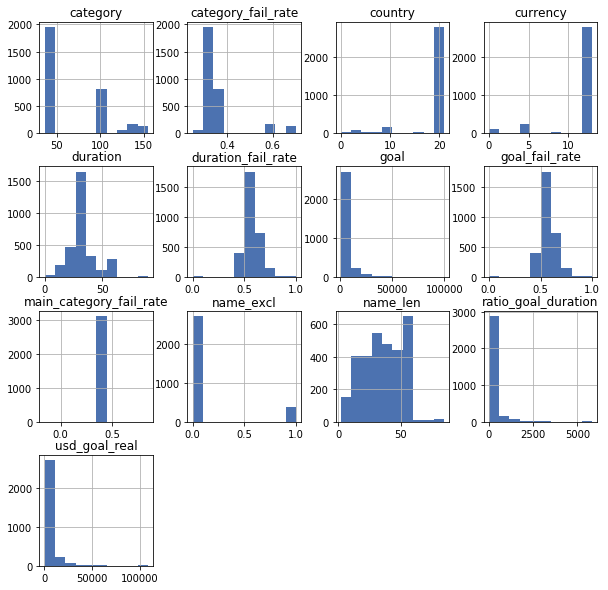

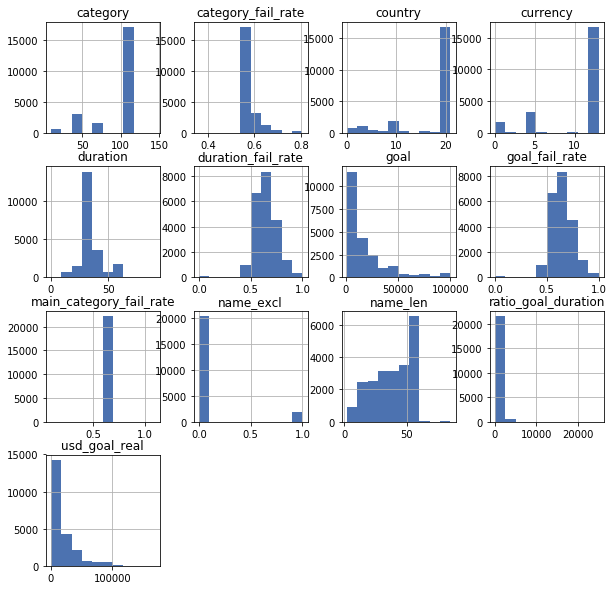

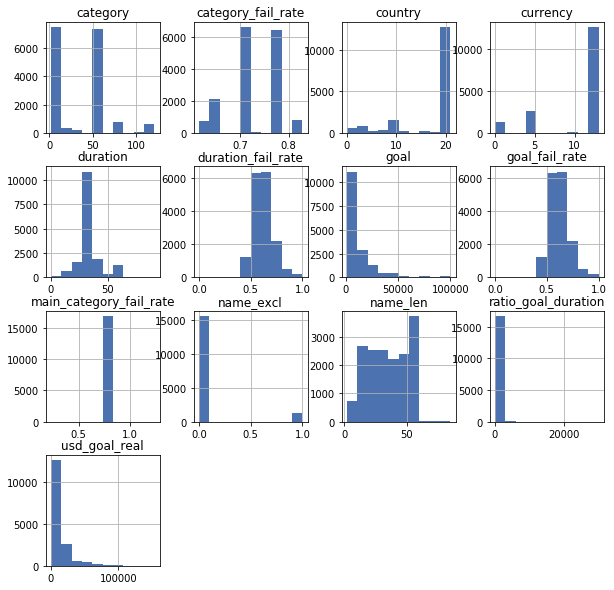

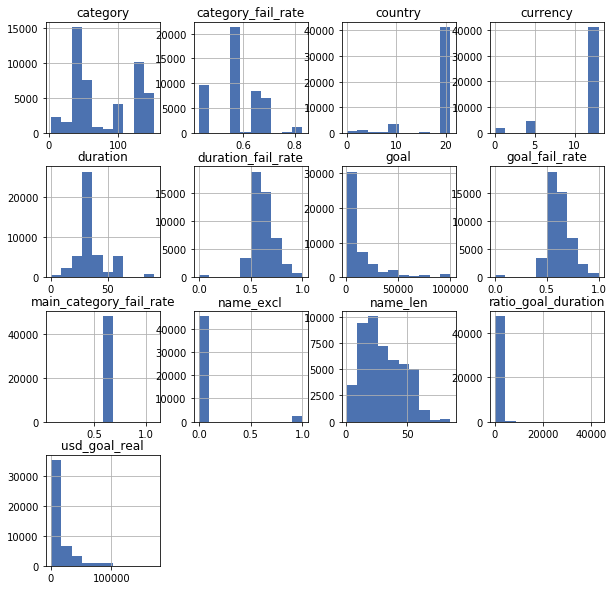

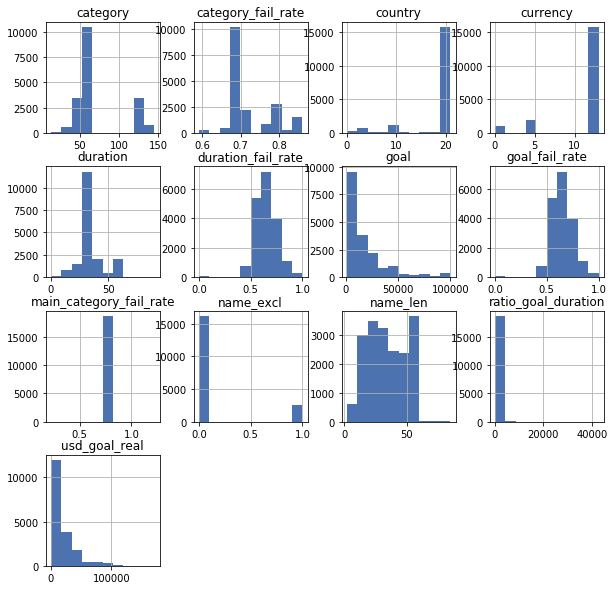

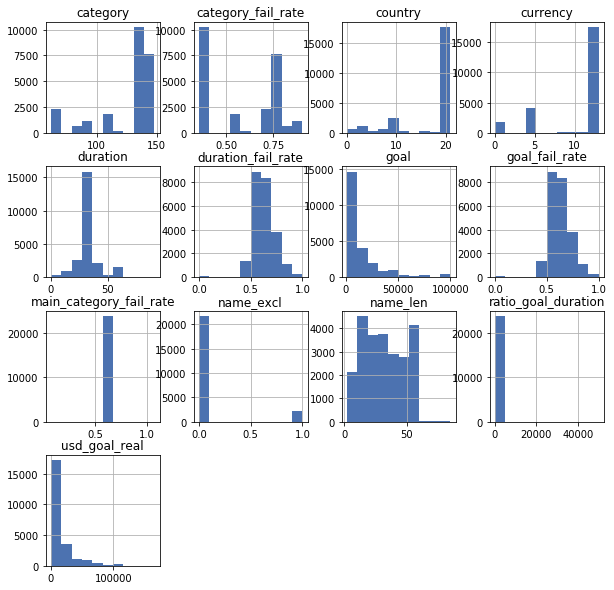

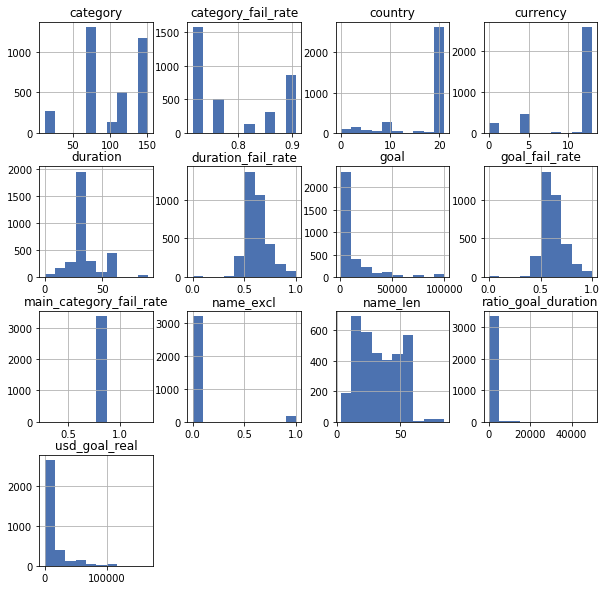

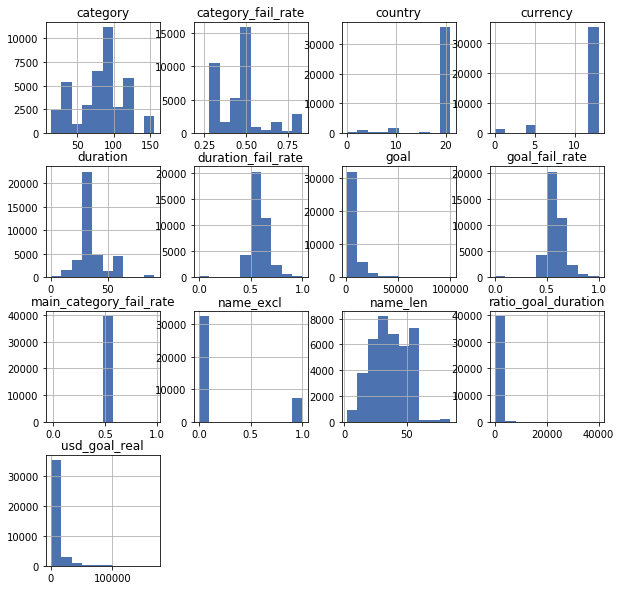

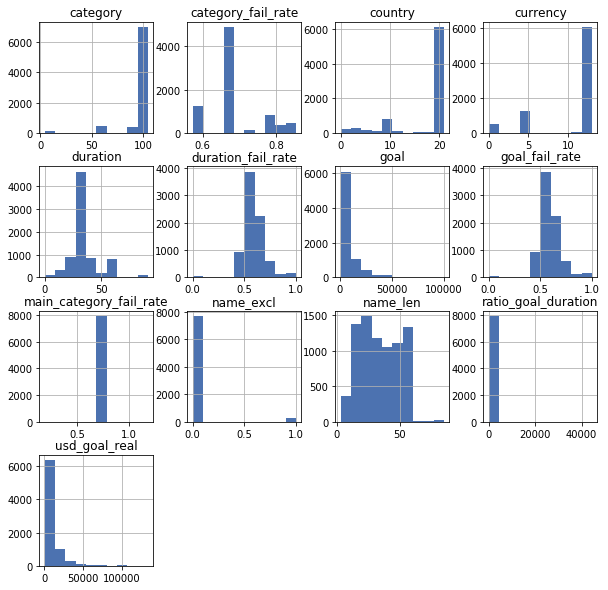

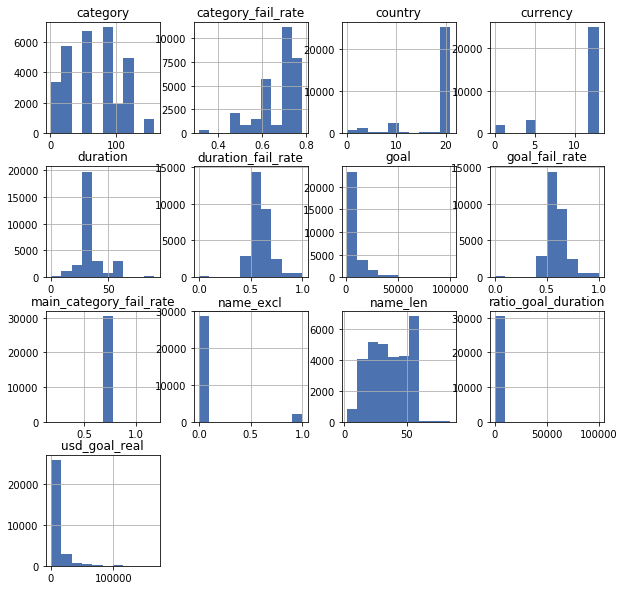

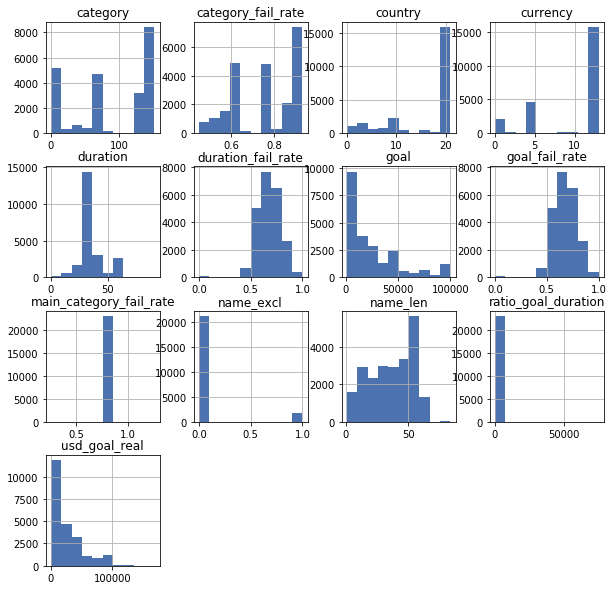

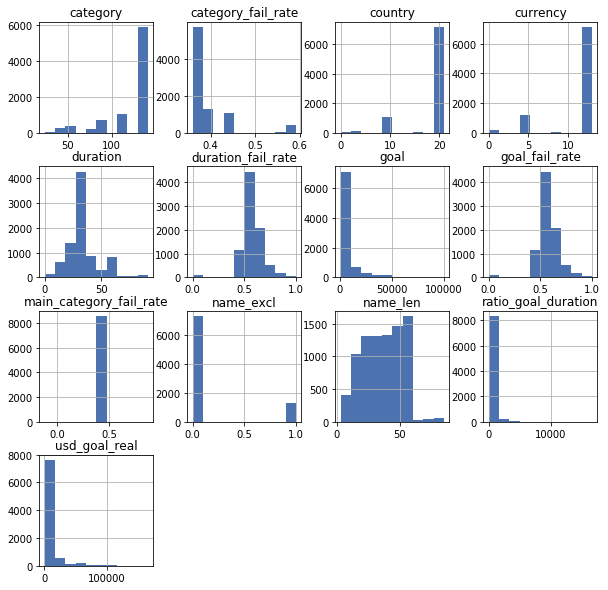

In [145]:
df_m_no_hot.groupby('main_category').hist(figsize=(10,10))

In [146]:
def num_state(val):
    if val == 'failed':
        return 0
    else:
        return 1

In [147]:
df_m_no_hot.head()

,category,main_category,currency,goal,country,usd_goal_real,duration,ratio_goal_duration,goal_fail_rate,category_fail_rate,main_category_fail_rate,duration_fail_rate,name_len,name_excl
0,108,12,5,1000.0,9,1533.95,58.0,17.241379,0.518369,0.688414,0.677827,0.518369,31,0
1,93,6,13,30000.0,21,30000.00,59.0,508.474576,0.713107,0.553550,0.584137,0.713107,45,0
2,93,6,13,45000.0,21,45000.00,44.0,1022.727273,0.786590,0.553550,0.584137,0.786590,14,0
3,90,10,13,5000.0,21,5000.00,29.0,172.413793,0.624488,0.496805,0.478919,0.624488,49,0
5,123,7,13,50000.0,21,50000.00,34.0,1470.588235,0.782548,0.797316,0.722792,0.782548,20,0


In [148]:
vis_states = df_m_no_hot.copy()
vis_states['state'] = state.apply(num_state)
vis_states.head()

,category,main_category,currency,goal,country,usd_goal_real,duration,ratio_goal_duration,goal_fail_rate,category_fail_rate,main_category_fail_rate,duration_fail_rate,name_len,name_excl,state
0,108,12,5,1000.0,9,1533.95,58.0,17.241379,0.518369,0.688414,0.677827,0.518369,31,0,0
1,93,6,13,30000.0,21,30000.00,59.0,508.474576,0.713107,0.553550,0.584137,0.713107,45,0,0
2,93,6,13,45000.0,21,45000.00,44.0,1022.727273,0.786590,0.553550,0.584137,0.786590,14,0,0
3,90,10,13,5000.0,21,5000.00,29.0,172.413793,0.624488,0.496805,0.478919,0.624488,49,0,0
5,123,7,13,50000.0,21,50000.00,34.0,1470.588235,0.782548,0.797316,0.722792,0.782548,20,0,1


In [149]:
df_m_no_hot.head()

,category,main_category,currency,goal,country,usd_goal_real,duration,ratio_goal_duration,goal_fail_rate,category_fail_rate,main_category_fail_rate,duration_fail_rate,name_len,name_excl
0,108,12,5,1000.0,9,1533.95,58.0,17.241379,0.518369,0.688414,0.677827,0.518369,31,0
1,93,6,13,30000.0,21,30000.00,59.0,508.474576,0.713107,0.553550,0.584137,0.713107,45,0
2,93,6,13,45000.0,21,45000.00,44.0,1022.727273,0.786590,0.553550,0.584137,0.786590,14,0
3,90,10,13,5000.0,21,5000.00,29.0,172.413793,0.624488,0.496805,0.478919,0.624488,49,0
5,123,7,13,50000.0,21,50000.00,34.0,1470.588235,0.782548,0.797316,0.722792,0.782548,20,0


state
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: category, dtype: object

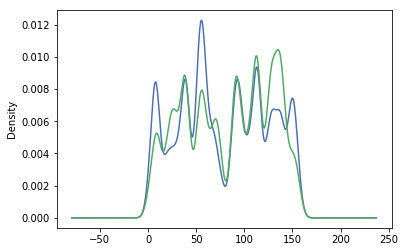

In [150]:
vis_states.groupby('state').category.plot.kde()

state
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: main_category, dtype: object

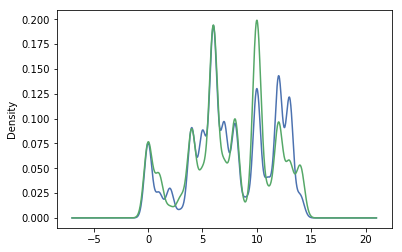

In [151]:
vis_states.groupby('state').main_category.plot.kde()

state
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: currency, dtype: object

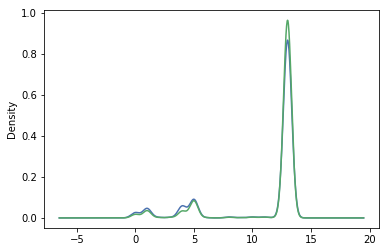

In [152]:
vis_states.groupby('state').currency.plot.kde()

In [153]:
#vis_states.groupby('state').goal.plot.kde()

state
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: country, dtype: object

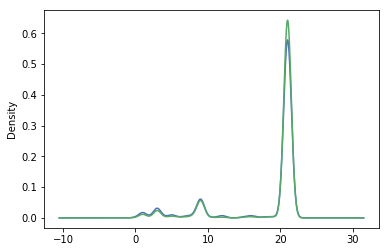

In [154]:
vis_states.groupby('state').country.plot.kde()

state
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration, dtype: object

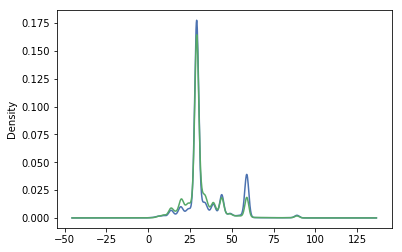

In [155]:
vis_states.groupby('state').duration.plot.kde()

state
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: name_len, dtype: object

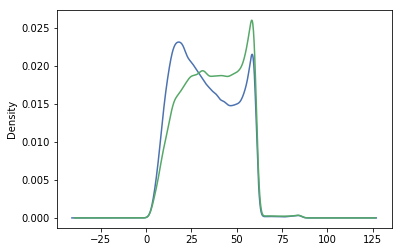

In [156]:
vis_states.groupby('state').name_len.plot.kde()

state
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ratio_goal_duration, dtype: object

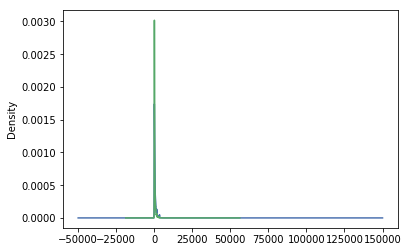

In [157]:
vis_states.groupby('state').ratio_goal_duration.plot.kde()

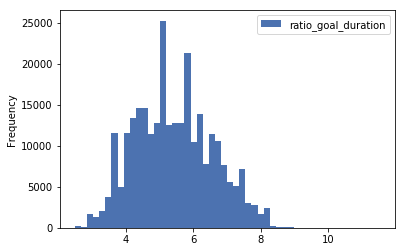

In [158]:
pd.DataFrame(np.log1p(vis_states.ratio_goal_duration)).plot(bins=50,kind='hist')

state
failed        AxesSubplot(0.125,0.125;0.775x0.755)
successful    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ratio_goal_duration, dtype: object

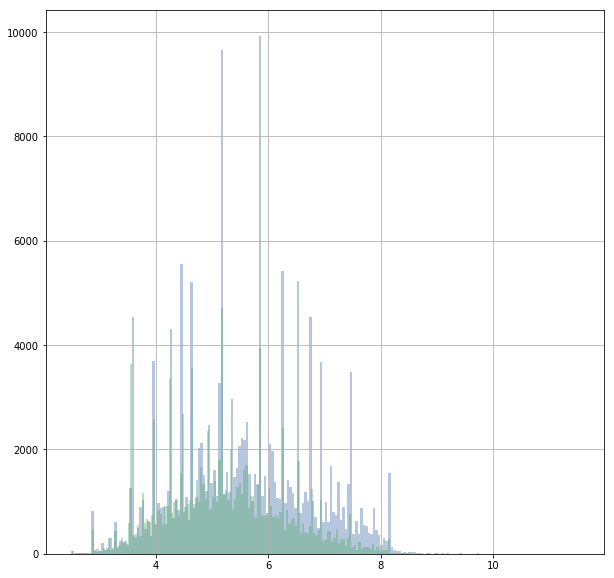

In [159]:
new_df_ratio = pd.DataFrame(np.log1p(vis_states.ratio_goal_duration))
new_df_ratio['state'] = df.state
new_df_ratio.groupby('state').ratio_goal_duration.hist(figsize=(10,10),alpha=0.4, bins=200)

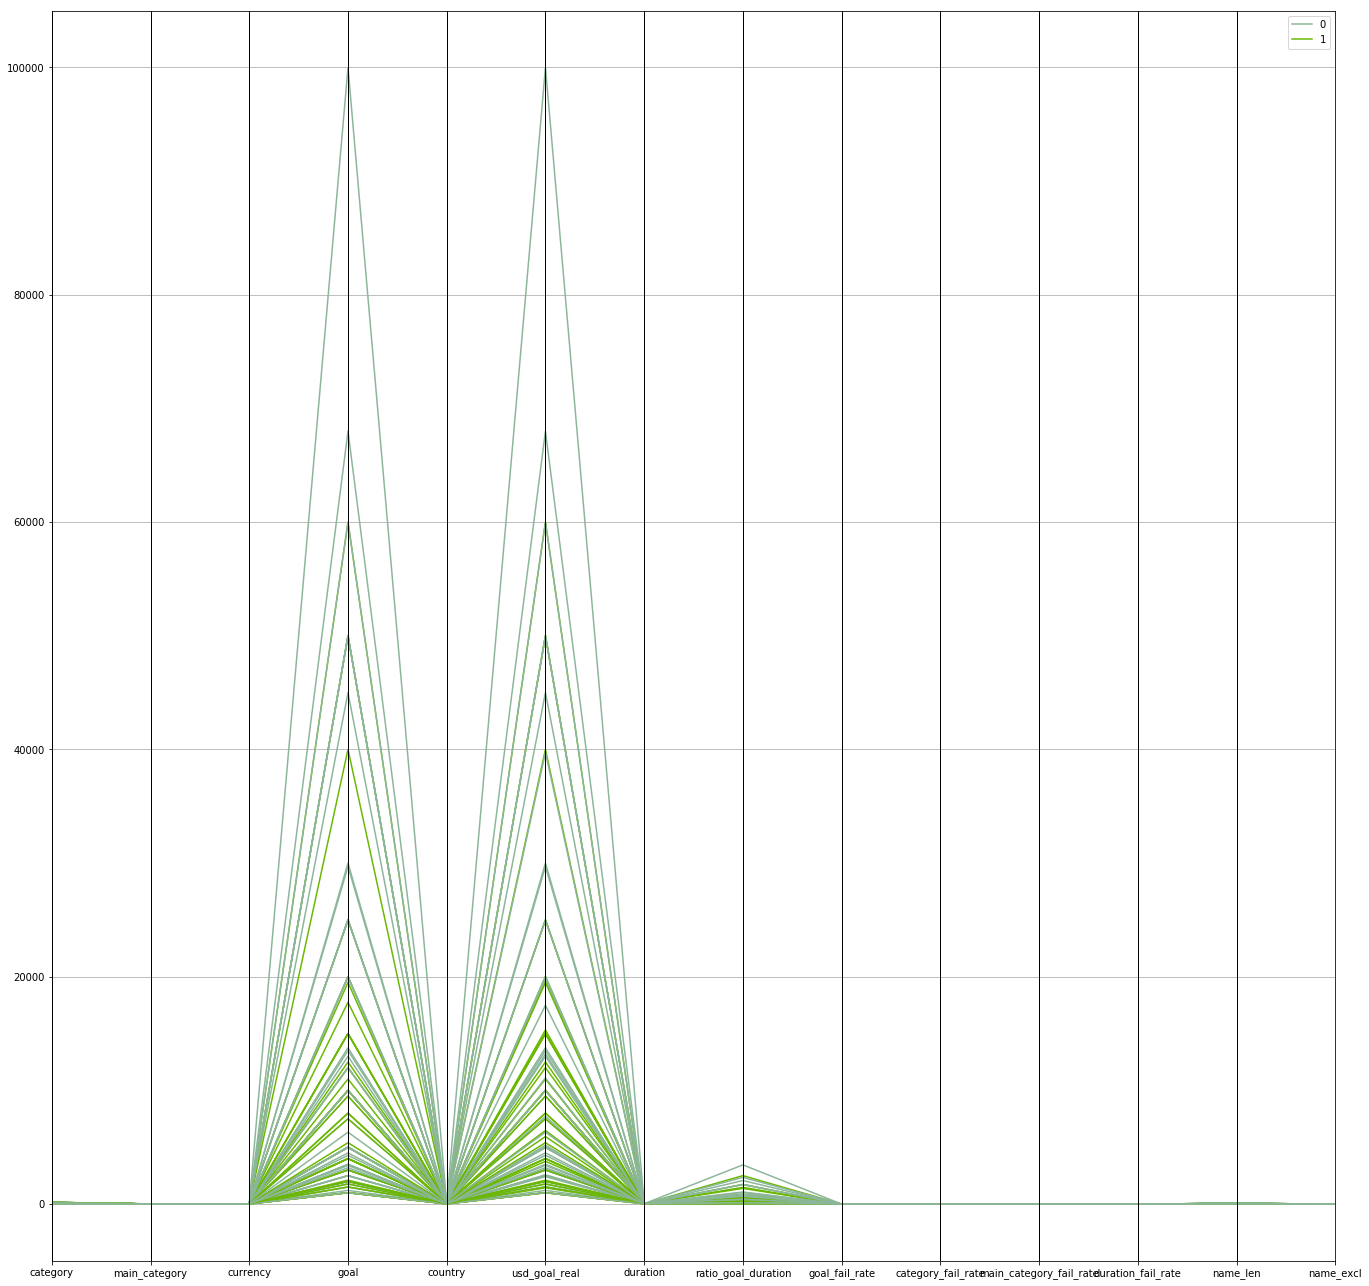

In [160]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(23, 23))
parallel_coordinates(vis_states[:100], 'state')

# ^^ HERE

In [161]:
from pandas.plotting import scatter_matrix

In [162]:
'''scatter_matrix(df_m_no_hot, figsize=(10, 10), diagonal='kde')'''

"scatter_matrix(df_m_no_hot, figsize=(10, 10), diagonal='kde')"

In [163]:
df_m_no_hot.head()

,category,main_category,currency,goal,country,usd_goal_real,duration,ratio_goal_duration,goal_fail_rate,category_fail_rate,main_category_fail_rate,duration_fail_rate,name_len,name_excl
0,108,12,5,1000.0,9,1533.95,58.0,17.241379,0.518369,0.688414,0.677827,0.518369,31,0
1,93,6,13,30000.0,21,30000.00,59.0,508.474576,0.713107,0.553550,0.584137,0.713107,45,0
2,93,6,13,45000.0,21,45000.00,44.0,1022.727273,0.786590,0.553550,0.584137,0.786590,14,0
3,90,10,13,5000.0,21,5000.00,29.0,172.413793,0.624488,0.496805,0.478919,0.624488,49,0
5,123,7,13,50000.0,21,50000.00,34.0,1470.588235,0.782548,0.797316,0.722792,0.782548,20,0


In [164]:
min_df = df_m_no_hot.copy()
min_df = min_df.drop(['currency', 'country'], 1)
min_df.head()

,category,main_category,goal,usd_goal_real,duration,ratio_goal_duration,goal_fail_rate,category_fail_rate,main_category_fail_rate,duration_fail_rate,name_len,name_excl
0,108,12,1000.0,1533.95,58.0,17.241379,0.518369,0.688414,0.677827,0.518369,31,0
1,93,6,30000.0,30000.00,59.0,508.474576,0.713107,0.553550,0.584137,0.713107,45,0
2,93,6,45000.0,45000.00,44.0,1022.727273,0.786590,0.553550,0.584137,0.786590,14,0
3,90,10,5000.0,5000.00,29.0,172.413793,0.624488,0.496805,0.478919,0.624488,49,0
5,123,7,50000.0,50000.00,34.0,1470.588235,0.782548,0.797316,0.722792,0.782548,20,0


In [165]:
'''scatter_matrix(min_df, figsize=(10, 10), diagonal='kde')'''

"scatter_matrix(min_df, figsize=(10, 10), diagonal='kde')"

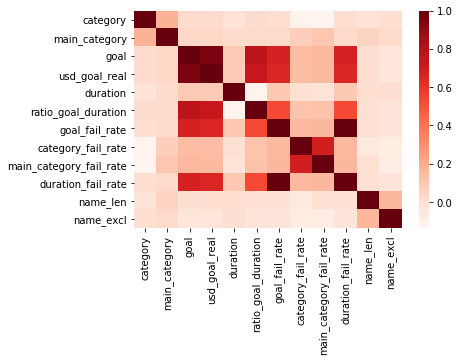

In [166]:
sns.heatmap(min_df.iloc[:,:].corr(), cmap='Reds')

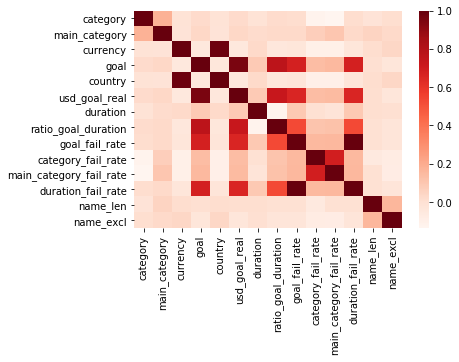

In [167]:
sns.heatmap(df_m_no_hot.iloc[:,:].corr(), cmap='Reds')

**info from tensorflow visual**

In [168]:
'''test_min_df = min_df.loc[[39552,71887,113845,128107,138692,141895,142337,150229,165495,210335,211026,215743,248895,24285,39403,83423,129375,144275,153316,160278,173753,238415,251713,254542,278997,306375,337823,339074],:]'''

'test_min_df = min_df.loc[[39552,71887,113845,128107,138692,141895,142337,150229,165495,210335,211026,215743,248895,24285,39403,83423,129375,144275,153316,160278,173753,238415,251713,254542,278997,306375,337823,339074],:]'

In [169]:
'''scatter_matrix(test_min_df, figsize=(10, 10), diagonal='kde')'''

"scatter_matrix(test_min_df, figsize=(10, 10), diagonal='kde')"

In [170]:
df_m = pd.get_dummies(df_m, columns = ['category'])
df_m = pd.get_dummies(df_m, columns = ['main_category'])
df_m = pd.get_dummies(df_m, columns = ['currency'])
df_m = pd.get_dummies(df_m, columns = ['country'])

In [171]:
#df_m['nb_name_pred'] = df_m['nb_name_pred'].apply(num_state)

state = state.apply(num_state)

In [172]:
df_m.head()

,goal,usd_goal_real,duration,ratio_goal_duration,goal_fail_rate,category_fail_rate,main_category_fail_rate,duration_fail_rate,name_len,name_excl,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1000.0,1533.95,58.0,17.241379,0.518369,0.688414,0.677827,0.518369,31,0,...,0,0,0,0,0,0,0,0,0,0
1,30000.0,30000.00,59.0,508.474576,0.713107,0.553550,0.584137,0.713107,45,0,...,0,0,0,0,0,0,0,0,0,1
2,45000.0,45000.00,44.0,1022.727273,0.786590,0.553550,0.584137,0.786590,14,0,...,0,0,0,0,0,0,0,0,0,1
3,5000.0,5000.00,29.0,172.413793,0.624488,0.496805,0.478919,0.624488,49,0,...,0,0,0,0,0,0,0,0,0,1
5,50000.0,50000.00,34.0,1470.588235,0.782548,0.797316,0.722792,0.782548,20,0,...,0,0,0,0,0,0,0,0,0,1


In [173]:
model_data = df_m.values

In [174]:
'''model_data = np.concatenate((model_data, name_bow_matrix), axis=1)'''

'model_data = np.concatenate((model_data, name_bow_matrix), axis=1)'

In [175]:
'''len(model_data[0]) - 214'''

'len(model_data[0]) - 214'

# Build Model

In [177]:
#from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.neighbors import KDTree
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


import lightgbm as lgb
from lightgbm import LGBMClassifier

**PCA**

In [178]:
X_train,X_test,y_train,y_test = train_test_split(df_m,state,test_size=0.2)

In [179]:
pca = PCA(n_components=2)
start_time = time.time()
pca.fit(X_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.200814962387085 seconds ---


In [180]:
print(pca.explained_variance_ratio_)

[0.97588334 0.02378695]


In [181]:
print(pca.singular_values_)

[12477555.66766732  1948049.13934076]


In [182]:
pca_score = pca.transform(X_train)

In [183]:
pca_test = pca.transform(X_test)

In [184]:
pca_test[0]

array([-18341.34801125,   -167.57483178])

In [185]:
def dist_delta_score(delt, score):
    ret_list = list()
    for i in delt.T:
        ret_list.append(math.sqrt((i[0] - score[0]) ** 2 + (i[1] - score[1]) ** 2))
    return np.array(ret_list)

In [186]:
'''for y in pca_test:
'''  

'for y in pca_test:\n'

In [187]:
scaler_no_hot = MinMaxScaler()  # Default behavior is to scale to [0,1]
df_m_no_hot_scaled = scaler_no_hot.fit_transform(df_m_no_hot)
X_train_no_hot,X_test_no_hot,y_train_no_hot,y_test_no_hot = train_test_split(df_m_no_hot_scaled,state,test_size=0.2)

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [188]:
#df_m_no_hot

In [189]:
scaler_min_df = MinMaxScaler()  # Default behavior is to scale to [0,1]
min_df_2 = scaler_min_df.fit_transform(min_df)
X_train_min_2,X_test_min_2,y_train_min_2,y_test_min_2 = train_test_split(min_df_2,state,test_size=0.2)

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


**KNN**

In [190]:
knn = KNeighborsClassifier()
start_time = time.time()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

0.6133584702396984
--- 41.28586006164551 seconds ---


In [191]:
knn_pca = KNeighborsClassifier()
start_time = time.time()
knn_pca.fit(pca_score, y_train)
print(knn_pca.score(pca_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

0.6028368794326241
--- 0.35132694244384766 seconds ---


In [192]:
knn_no_hot = KNeighborsClassifier()
start_time = time.time()
knn_no_hot.fit(X_train_no_hot, y_train_no_hot)
print(knn_no_hot.score(X_test_no_hot, y_test_no_hot))
print("--- %s seconds ---" % (time.time() - start_time))

0.6503097225962833
--- 29.67449712753296 seconds ---


In [193]:
knn_min = KNeighborsClassifier()
start_time = time.time()
knn_min.fit(X_train_min_2, y_train_min_2)
print(knn_min.score(X_test_min_2, y_test_min_2))
print("--- %s seconds ---" % (time.time() - start_time))

0.6477242122273095
--- 12.505625009536743 seconds ---


In [194]:
'''knn_name = KNeighborsClassifier()
start_time = time.time()
knn_name.fit(X_train_name, y_train_name)
print(knn_name.score(X_test_name, y_test_name))
print("--- %s seconds ---" % (time.time() - start_time))'''

'knn_name = KNeighborsClassifier()\nstart_time = time.time()\nknn_name.fit(X_train_name, y_train_name)\nprint(knn_name.score(X_test_name, y_test_name))\nprint("--- %s seconds ---" % (time.time() - start_time))'

In [195]:
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
df_m_2 = scaler.fit_transform(df_m)
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(df_m_2,state,test_size=0.2)

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [196]:
'''knn2 = KNeighborsClassifier()
start_time = time.time()
knn2.fit(X_train_2, y_train_2)
print(knn.score(X_test_2, y_test_2))
print("--- %s seconds ---" % (time.time() - start_time))'''

'knn2 = KNeighborsClassifier()\nstart_time = time.time()\nknn2.fit(X_train_2, y_train_2)\nprint(knn.score(X_test_2, y_test_2))\nprint("--- %s seconds ---" % (time.time() - start_time))'

In [197]:
'''kd_tree = KDTree(X_train, leaf_size=2)     '''

'kd_tree = KDTree(X_train, leaf_size=2)     '

In [198]:
'''dist, ind = kd_tree.query(X_train[:1], k=100)
print(dist)
print(ind) '''

'dist, ind = kd_tree.query(X_train[:1], k=100)\nprint(dist)\nprint(ind) '

**Linear SVM**

Scaled

In [199]:
linear_svc_2 = LinearSVC()
start_time = time.time()
linear_svc_2.fit(X_train_2, y_train_2)
print(linear_svc_2.score(X_test_2, y_test_2))
print("--- %s seconds ---" % (time.time() - start_time))

0.6827183768740461
--- 14.589697122573853 seconds ---


Not Scaled

In [200]:
linear_svc = LinearSVC()
start_time = time.time()
linear_svc.fit(X_train, y_train)
print(linear_svc.score(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

0.5195618996319239
--- 65.96944975852966 seconds ---


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


No hot

In [201]:
linear_no_hot = LinearSVC()
start_time = time.time()
linear_no_hot.fit(X_train_no_hot, y_train_no_hot)
print(linear_no_hot.score(X_test_no_hot, y_test_no_hot))
print("--- %s seconds ---" % (time.time() - start_time))

0.6820719992818026
--- 13.784349918365479 seconds ---


Min features

In [202]:
linear_min = LinearSVC()
start_time = time.time()
linear_min.fit(X_train_min_2, y_train_min_2)
print(linear_min.score(X_test_min_2, y_test_min_2))
print("--- %s seconds ---" % (time.time() - start_time))

0.6802405961037795
--- 11.053805112838745 seconds ---


PCA

In [203]:
scaler_pca = MinMaxScaler()  # Default behavior is to scale to [0,1]
df_m_pca = scaler_pca.fit_transform(pca.fit_transform(df_m))
X_train_2_pca,X_test_2_pca,y_train_2_pca,y_test_2_pca = train_test_split(df_m_pca,state,test_size=0.2)

In [204]:
linear_svc_pca = LinearSVC()
start_time = time.time()
linear_svc_pca.fit(X_train_2_pca, y_train_2_pca)
print(linear_svc_pca.score(X_test_2_pca, y_test_2_pca))
print("--- %s seconds ---" % (time.time() - start_time))

0.6111500134661998
--- 1.8048110008239746 seconds ---


Normalized

In [205]:
df_m_3 = Normalizer().fit(df_m).transform(df_m)
X_train_3,X_test_3,y_train_3,y_test_3 = train_test_split(df_m_3,state,test_size=0.2)

In [206]:
linear_svc_3 = LinearSVC()
start_time = time.time()
linear_svc_3.fit(X_train_3, y_train_3)
print(linear_svc_3.score(X_test_3, y_test_3))
print("--- %s seconds ---" % (time.time() - start_time))

0.6203788490887872
--- 4.555905818939209 seconds ---


RFE

In [207]:
linear_svc_4 = LinearSVC(C=1)
rfe = RFE(estimator=linear_svc_4, n_features_to_select=3, step=1, verbose=10)
start_time = time.time()
rfe.fit(X_train_2, y_train_2)
print(rfe.score(X_train_2, y_train_2))
print("--- %s seconds ---" % (time.time() - start_time))

Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.


KeyboardInterrupt: 

In [ ]:
'''svc_2 = svm.SVC(kernel='rbf')
start_time = time.time()
model = svc_2.fit(X_train_2, y_train_2)
print("--- %s seconds ---" % (time.time() - start_time))'''

**Decision Tree**

In [208]:
decision_tree = DecisionTreeClassifier(max_depth=10)
start_time = time.time()
decision_tree.fit(X_train, y_train)
print(decision_tree.score(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

0.684729329383248
--- 3.6820058822631836 seconds ---


In [209]:
decision_tree_2 = DecisionTreeClassifier(max_depth=11)
start_time = time.time()
decision_tree_2.fit(X_train_2, y_train_2)
print(decision_tree_2.score(X_test_2, y_test_2))
print("--- %s seconds ---" % (time.time() - start_time))

0.6822335936798636
--- 5.821526050567627 seconds ---


In [210]:
decision_tree_3 = DecisionTreeClassifier(max_depth=12)
start_time = time.time()
decision_tree_3.fit(X_train_3, y_train_3)
print(decision_tree_3.score(X_test_3, y_test_3))
print("--- %s seconds ---" % (time.time() - start_time))

0.6726636143280367
--- 11.240031242370605 seconds ---


In [211]:
decision_no_hot = DecisionTreeClassifier(max_depth=10)
start_time = time.time()
decision_no_hot.fit(X_train_no_hot, y_train_no_hot)
print(decision_no_hot.score(X_test_no_hot, y_test_no_hot))
print("--- %s seconds ---" % (time.time() - start_time))

0.6850345632462519
--- 0.8971657752990723 seconds ---


In [212]:
decision_min = DecisionTreeClassifier(max_depth=11)
start_time = time.time()
decision_min.fit(X_train_min_2, y_train_min_2)
print(decision_min.score(X_test_min_2, y_test_min_2))
print("--- %s seconds ---" % (time.time() - start_time))

0.682592692342221
--- 0.9431700706481934 seconds ---


**Lets visualize**

In [213]:
'''np.savetxt("visualize.tsv", df_m.values, delimiter="\t")'''

'np.savetxt("visualize.tsv", df_m.values, delimiter="\t")'

In [214]:
'''state.to_csv('meta_data.tsv', sep='\t')'''

"state.to_csv('meta_data.tsv', sep='\t')"

In [215]:
'''np.savetxt("visualize_no_hot.tsv", df_m_no_hot, delimiter="\t")'''

'np.savetxt("visualize_no_hot.tsv", df_m_no_hot, delimiter="\t")'

In [216]:
'''np.savetxt("visualize_mini.tsv", min_df, delimiter="\t")'''

'np.savetxt("visualize_mini.tsv", min_df, delimiter="\t")'

**AdaBoost**

In [222]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         n_estimators=200,
                         algorithm='SAMME')
start_time = time.time()
ada.fit(X_train_2, y_train_2)
print(ada.score(X_test_2, y_test_2))
print("--- %s seconds ---" % (time.time() - start_time))

0.6794864889128288
--- 429.0807430744171 seconds ---


In [237]:
ada_no_hot = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),
                         n_estimators=300,
                         algorithm='SAMME',
                         random_state=3)
start_time = time.time()
ada_no_hot.fit(X_train_no_hot, y_train_no_hot)
print(ada_no_hot.score(X_test_no_hot, y_test_no_hot))
print("--- %s seconds ---" % (time.time() - start_time))

0.68302361073705
--- 355.8577950000763 seconds ---


In [238]:
ada_min = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), 
                         n_estimators=200,
                         algorithm='SAMME',
                         random_state=3)
start_time = time.time()
ada_min.fit(X_train_min_2, y_train_min_2)
print(ada_min.score(X_test_min_2, y_test_min_2))
print("--- %s seconds ---" % (time.time() - start_time))

0.6812460723583804
--- 219.5819709300995 seconds ---


**SGD**

In [217]:
from sklearn.linear_model import SGDClassifier

In [218]:
rbf_feature = RBFSampler(gamma=1, random_state=1)
X_features_no_hot = rbf_feature.fit_transform(X_train_no_hot)
X_ftest_no_hot = rbf_feature.fit_transform(X_test_no_hot)
clf_sgd = SGDClassifier(max_iter=5)
start_time = time.time()
clf_sgd.fit(X_features_no_hot, y_train_no_hot)   
print(clf_sgd.score(X_ftest_no_hot, y_test_no_hot))
print("--- %s seconds ---" % (time.time() - start_time))

0.6774934913367447
--- 0.49858903884887695 seconds ---


In [219]:
sgd = SGDClassifier()
start_time = time.time()
sgd.fit(X_train_2, y_train_2)
print(sgd.score(X_test_2, y_test_2))
print("--- %s seconds ---" % (time.time() - start_time))

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.6714247239429033
--- 0.886908769607544 seconds ---


In [220]:
sgd_min = SGDClassifier(max_iter=9)
start_time = time.time()
sgd_min.fit(X_train_min_2, y_train_min_2)
print(sgd_min.score(X_test_min_2, y_test_min_2))
print("--- %s seconds ---" % (time.time() - start_time))

0.6781578238621061
--- 0.35561704635620117 seconds ---


In [221]:
sgd_no_hot = SGDClassifier()
start_time = time.time()
sgd_no_hot.fit(X_train_no_hot, y_train_no_hot)
print(sgd_no_hot.score(X_test_no_hot, y_test_no_hot))
print("--- %s seconds ---" % (time.time() - start_time))

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.6765059700152617
--- 0.27286410331726074 seconds ---


**Random Forest**

In [578]:
random_forest = RandomForestClassifier(n_estimators=200)
start_time = time.time()
random_forest.fit(X_train, y_train)
print(random_forest.score(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

KeyboardInterrupt: 

In [613]:
random_forest_2 = RandomForestClassifier(n_estimators=200)
start_time = time.time()
random_forest_2.fit(X_train_2, y_train_2)
print(random_forest_2.score(X_test_2, y_test_2))
print("--- %s seconds ---" % (time.time() - start_time))

0.6462617605515788
--- 183.65723490715027 seconds ---


In [614]:
random_forest_no_hot = RandomForestClassifier(n_estimators=200)
start_time = time.time()
random_forest_no_hot.fit(X_train_no_hot, y_train_no_hot)
print(random_forest_no_hot.score(X_test_no_hot, y_test_no_hot))
print("--- %s seconds ---" % (time.time() - start_time))

0.6470996624452371
--- 52.66620111465454 seconds ---


In [822]:
random_forest_min = RandomForestClassifier(n_estimators=200)
start_time = time.time()
random_forest_min.fit(X_train_min_2, y_train_min_2)
print(random_forest_min.score(X_test_min_2, y_test_min_2))
print("--- %s seconds ---" % (time.time() - start_time))

0.647077834635066
--- 71.77480697631836 seconds ---


**MLP**

In [1055]:
start_time = time.time()
mlp = MLPClassifier(activation='tanh',
                    verbose = True,
                    solver='sgd', 
                    alpha=0.05, 
                    hidden_layer_sizes=(8, 3, 2),
                    learning_rate = 'adaptive')
                    #random_state=7)

mlp.fit(X_train_2, y_train_2)
print(mlp.score(X_test_2, y_test_2))
print("--- %s seconds ---" % (time.time() - start_time))

Iteration 1, loss = 0.68130678
Iteration 2, loss = 0.67097716
Iteration 3, loss = 0.66770360
Iteration 4, loss = 0.65821499
Iteration 5, loss = 0.64178091
Iteration 6, loss = 0.62704811
Iteration 7, loss = 0.61647204
Iteration 8, loss = 0.60882534
Iteration 9, loss = 0.60376850
Iteration 10, loss = 0.60070941
Iteration 11, loss = 0.59879331
Iteration 12, loss = 0.59753840
Iteration 13, loss = 0.59653952
Iteration 14, loss = 0.59569322
Iteration 15, loss = 0.59502057
Iteration 16, loss = 0.59433228
Iteration 17, loss = 0.59391179
Iteration 18, loss = 0.59341452
Iteration 19, loss = 0.59307202
Iteration 20, loss = 0.59271968
Iteration 21, loss = 0.59237049
Iteration 22, loss = 0.59211359
Iteration 23, loss = 0.59190317
Iteration 24, loss = 0.59173706
Iteration 25, loss = 0.59152254
Iteration 26, loss = 0.59139219
Iteration 27, loss = 0.59126230
Iteration 28, loss = 0.59112343
Iteration 29, loss = 0.59099323
Iteration 30, loss = 0.59085092
Iteration 31, loss = 0.59070247
Iteration 32, los

**GB**

In [244]:
gb_min = GradientBoostingClassifier(n_estimators=400, verbose = True)
start_time = time.time()
gb_min.fit(X_train_min_2, y_train_min_2)
print(gb_min.score(X_test_min_2, y_test_min_2))
print("--- %s seconds ---" % (time.time() - start_time))

      Iter       Train Loss   Remaining Time 
         1           1.3175            3.30m
         2           1.2998            3.04m
         3           1.2848            2.74m
         4           1.2722            2.52m
         5           1.2615            2.37m
         6           1.2521            2.30m
         7           1.2441            2.23m
         8           1.2370            2.17m
         9           1.2309            2.13m
        10           1.2254            2.08m
        20           1.1914            1.79m
        30           1.1722            1.60m
        40           1.1616            1.49m
        50           1.1547            1.40m
        60           1.1508            1.33m
        70           1.1480            1.26m
        80           1.1458            1.21m
        90           1.1441            1.15m
       100           1.1426            1.10m
       200           1.1354           40.90s
       300           1.1312           20.32s
       40

In [552]:
gb_no_hot = GradientBoostingClassifier(n_estimators=800)
start_time = time.time()
gb_no_hot.fit(X_train_no_hot, y_train_no_hot)
print(gb_no_hot.score(X_test_no_hot, y_test_no_hot))
print("--- %s seconds ---" % (time.time() - start_time))

0.6934195170122991
--- 154.71807098388672 seconds ---


**LMGB**

In [222]:
clf_lgbm = LGBMClassifier(
        boosting_type= "dart",
        n_estimators=400,
        num_leaves=100,
        colsample_bytree=.8,
        subsample=.8,
        max_depth=18,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        learning_rate = 0.05,
        max_bin = 1000)

start_time = time.time()
clf_lgbm.fit(X_train_no_hot, 
        y_train_no_hot,
        eval_set= [(X_train_no_hot, y_train_no_hot), (X_test_no_hot, y_test_no_hot)], 
        eval_metric='auc', 
        verbose=10, 
        #early_stopping_rounds=100
       )

print(clf_lgbm.score(X_test_no_hot, y_test_no_hot))
print("--- %s seconds ---" % (time.time() - start_time))

[10]	valid_0's auc: 0.745503	valid_0's binary_logloss: 0.620585	valid_1's auc: 0.738993	valid_1's binary_logloss: 0.622576
[20]	valid_0's auc: 0.749813	valid_0's binary_logloss: 0.596615	valid_1's auc: 0.742445	valid_1's binary_logloss: 0.599882
[30]	valid_0's auc: 0.751796	valid_0's binary_logloss: 0.584317	valid_1's auc: 0.744097	valid_1's binary_logloss: 0.588506
[40]	valid_0's auc: 0.753595	valid_0's binary_logloss: 0.579322	valid_1's auc: 0.745601	valid_1's binary_logloss: 0.583982
[50]	valid_0's auc: 0.75454	valid_0's binary_logloss: 0.579764	valid_1's auc: 0.746082	valid_1's binary_logloss: 0.584475
[60]	valid_0's auc: 0.755607	valid_0's binary_logloss: 0.577922	valid_1's auc: 0.746719	valid_1's binary_logloss: 0.582972
[70]	valid_0's auc: 0.756339	valid_0's binary_logloss: 0.576743	valid_1's auc: 0.747069	valid_1's binary_logloss: 0.58206
[80]	valid_0's auc: 0.756724	valid_0's binary_logloss: 0.574261	valid_1's auc: 0.747222	valid_1's binary_logloss: 0.579986
[90]	valid_0's auc

In [223]:
for i in range(len(df_m_no_hot.columns)):
    print(df_m_no_hot.columns.values[i] + ": " + str(clf_lgbm.feature_importances_[i]))

category: 2844
main_category: 1788
currency: 1449
goal: 1134
country: 821
usd_goal_real: 3698
duration: 8408
ratio_goal_duration: 2669
goal_fail_rate: 4697
category_fail_rate: 4002
main_category_fail_rate: 2272
duration_fail_rate: 1376
name_len: 3914
name_excl: 528


In [230]:
clf_lgbm_pred = clf_lgbm.predict(X_test_no_hot)
print(classification_report(y_test_no_hot ,clf_lgbm_pred))
print(confusion_matrix(y_test_no_hot ,clf_lgbm_pred))
print(roc_auc_score(y_test_no_hot, clf_lgbm_pred))
print(clf_lgbm.score(X_test_no_hot, y_test_no_hot))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77     33817
           1       0.64      0.51      0.57     21878

   micro avg       0.70      0.70      0.70     55695
   macro avg       0.68      0.66      0.67     55695
weighted avg       0.69      0.70      0.69     55695

[[27655  6162]
 [10759 11119]]
0.663005698954572
0.6961845767124517


In [225]:
clf_lgbm_2 = LGBMClassifier(boosting_type= "dart",
        n_estimators=300,
        learning_rate=0.05,
        num_leaves=38,
        colsample_bytree=.8,
        subsample=.9,
        max_depth=9,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01)
start_time = time.time()
clf_lgbm_2.fit(X_train_2, 
        y_train_2,
        eval_set= [(X_train_2, y_train_2), (X_test_2, y_test_2)], 
        eval_metric='auc', 
        verbose=10, 
        #early_stopping_rounds=100
       )

print(clf_lgbm_2.score(X_test_2, y_test_2))
print("--- %s seconds ---" % (time.time() - start_time))

[10]	valid_0's auc: 0.737148	valid_0's binary_logloss: 0.625497	valid_1's auc: 0.734118	valid_1's binary_logloss: 0.626791
[20]	valid_0's auc: 0.740625	valid_0's binary_logloss: 0.602134	valid_1's auc: 0.737174	valid_1's binary_logloss: 0.604013
[30]	valid_0's auc: 0.743484	valid_0's binary_logloss: 0.59143	valid_1's auc: 0.739309	valid_1's binary_logloss: 0.593854
[40]	valid_0's auc: 0.745216	valid_0's binary_logloss: 0.586276	valid_1's auc: 0.740775	valid_1's binary_logloss: 0.589019
[50]	valid_0's auc: 0.74584	valid_0's binary_logloss: 0.586362	valid_1's auc: 0.741282	valid_1's binary_logloss: 0.589047
[60]	valid_0's auc: 0.746854	valid_0's binary_logloss: 0.58444	valid_1's auc: 0.7421	valid_1's binary_logloss: 0.587257
[70]	valid_0's auc: 0.747404	valid_0's binary_logloss: 0.583202	valid_1's auc: 0.742504	valid_1's binary_logloss: 0.586122
[80]	valid_0's auc: 0.747844	valid_0's binary_logloss: 0.581052	valid_1's auc: 0.742829	valid_1's binary_logloss: 0.584149
[90]	valid_0's auc: 0

In [226]:
for i in range(len(df_m.columns)):
    print(df_m.columns.values[i] + ": " + str(clf_lgbm_2.feature_importances_[i]))

goal: 82
usd_goal_real: 567
duration: 3011
ratio_goal_duration: 209
goal_fail_rate: 2072
category_fail_rate: 1483
main_category_fail_rate: 539
duration_fail_rate: 275
name_len: 1117
name_excl: 111
category_3D Printing: 1
category_Academic: 0
category_Accessories: 0
category_Action: 0
category_Animals: 0
category_Animation: 0
category_Anthologies: 12
category_Apparel: 35
category_Apps: 10
category_Architecture: 0
category_Art: 1
category_Art Books: 11
category_Audio: 0
category_Bacon: 0
category_Blues: 0
category_Calendars: 0
category_Camera Equipment: 4
category_Candles: 0
category_Ceramics: 0
category_Children's Books: 0
category_Childrenswear: 0
category_Chiptune: 0
category_Civic Design: 0
category_Classical Music: 0
category_Comedy: 5
category_Comic Books: 2
category_Comics: 3
category_Community Gardens: 0
category_Conceptual Art: 0
category_Cookbooks: 1
category_Country & Folk: 2
category_Couture: 0
category_Crafts: 0
category_Crochet: 0
category_DIY: 0
category_DIY Electronics: 1

In [227]:
clf_lgbm_2_pred = clf_lgbm_2.predict(X_test_2)
print(classification_report(y_test_2 ,clf_lgbm_2_pred))
print(confusion_matrix(y_test_2 ,clf_lgbm_2_pred))
print(roc_auc_score(y_test_2, clf_lgbm_2_pred))

              precision    recall  f1-score   support

           0       0.72      0.82      0.76     33787
           1       0.64      0.50      0.56     21908

   micro avg       0.69      0.69      0.69     55695
   macro avg       0.68      0.66      0.66     55695
weighted avg       0.69      0.69      0.68     55695

[[27766  6021]
 [11038 10870]]
0.6589805746348343


In [228]:
clf_lgbm_3 = LGBMClassifier(
        boosting_type= "dart",
        n_estimators=400,
        num_leaves=100,
        colsample_bytree=.8,
        subsample=.8,
        max_depth=18,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        learning_rate = 0.05,
        max_bin = 1000)

start_time = time.time()
clf_lgbm_3.fit(X_train_min_2, 
        y_train_min_2,
        eval_set= [(X_train_min_2, y_train_min_2), (X_test_min_2, y_test_min_2)], 
        eval_metric='auc', 
        verbose=10, 
        #early_stopping_rounds=30
       )

print(clf_lgbm_3.score(X_test_min_2, y_test_min_2))
print("--- %s seconds ---" % (time.time() - start_time))

[10]	valid_0's auc: 0.745155	valid_0's binary_logloss: 0.622685	valid_1's auc: 0.738417	valid_1's binary_logloss: 0.624812
[20]	valid_0's auc: 0.748255	valid_0's binary_logloss: 0.598509	valid_1's auc: 0.740787	valid_1's binary_logloss: 0.601746
[30]	valid_0's auc: 0.751231	valid_0's binary_logloss: 0.585941	valid_1's auc: 0.743307	valid_1's binary_logloss: 0.59011
[40]	valid_0's auc: 0.753069	valid_0's binary_logloss: 0.581041	valid_1's auc: 0.745027	valid_1's binary_logloss: 0.585598
[50]	valid_0's auc: 0.754051	valid_0's binary_logloss: 0.581273	valid_1's auc: 0.745504	valid_1's binary_logloss: 0.585945
[60]	valid_0's auc: 0.75481	valid_0's binary_logloss: 0.57884	valid_1's auc: 0.745604	valid_1's binary_logloss: 0.584012
[70]	valid_0's auc: 0.755293	valid_0's binary_logloss: 0.577316	valid_1's auc: 0.745835	valid_1's binary_logloss: 0.582745
[80]	valid_0's auc: 0.755816	valid_0's binary_logloss: 0.574874	valid_1's auc: 0.745984	valid_1's binary_logloss: 0.580781
[90]	valid_0's auc:

In [229]:
for i in range(len(min_df.columns)):
    print(min_df.columns.values[i] + ": " + str(clf_lgbm_3.feature_importances_[i]))

category: 3412
main_category: 2055
goal: 1435
usd_goal_real: 3974
duration: 7956
ratio_goal_duration: 3527
goal_fail_rate: 5514
category_fail_rate: 4003
main_category_fail_rate: 2316
duration_fail_rate: 1041
name_len: 3820
name_excl: 547


### Try K-means for that category?

In [256]:
from sklearn.neighbors import KDTree

In [257]:
tree = KDTree(X_test_no_hot, leaf_size=2)              
dist, ind = tree.query(X_test_no_hot[:1], k=3)                
print(ind)  
print(dist)  

[[    0 22290 11798]]
[[0.         0.07269687 0.09839944]]


In [258]:
X_test_no_hot[ind[0]]

array([[2.46835443e-01, 4.28571429e-01, 1.00000000e+00, 1.11111111e-01,
        1.00000000e+00, 6.97401015e-02, 7.91208791e-01, 1.55694765e-03,
        5.85720782e-01, 5.17068221e-01, 5.24277252e-01, 5.85720782e-01,
        3.21428571e-01, 0.00000000e+00],
       [2.46835443e-01, 4.28571429e-01, 1.00000000e+00, 7.07070707e-02,
        1.00000000e+00, 4.64012514e-02, 8.13186813e-01, 9.71297707e-04,
        5.72366087e-01, 5.17068221e-01, 5.24277252e-01, 5.72366087e-01,
        2.73809524e-01, 0.00000000e+00],
       [2.46835443e-01, 4.28571429e-01, 1.00000000e+00, 1.01010101e-01,
        1.00000000e+00, 6.39053890e-02, 7.47252747e-01, 1.50792265e-03,
        6.04020979e-01, 5.17068221e-01, 5.24277252e-01, 6.04020979e-01,
        2.38095238e-01, 0.00000000e+00]])

In [259]:
df_m_no_hot.iloc[ind[0]]

,category,main_category,currency,goal,country,usd_goal_real,duration,ratio_goal_duration,goal_fail_rate,category_fail_rate,main_category_fail_rate,duration_fail_rate,name_len,name_excl
0,108,12,5,1000.0,9,1533.95,58.0,17.241379,0.518369,0.688414,0.677827,0.518369,31,0
30293,39,6,13,3500.0,21,3500.00,29.0,120.689655,0.524021,0.585493,0.584137,0.524021,22,0
15998,75,10,13,15000.0,21,15000.00,39.0,384.615385,0.643520,0.370938,0.478919,0.643520,44,0


In [503]:
df_test_ctg = df_m_no_hot.copy()
df_test_ctg['state'] = state

In [504]:
df_test_ctg = df_test_ctg.drop(['goal_fail_rate','duration_fail_rate','main_category_fail_rate','category_fail_rate'],1)

In [535]:
df_test_ctg.as_type(float)
df_test_ctg.info()

AttributeError: 'DataFrame' object has no attribute 'as_type'

### Model for each category

In [506]:
dfs = dict(tuple(df_test_ctg.groupby('main_category')))

In [507]:
def LGBM(data,cate):
    curr_df = data.copy()
    curr_state = data.state
    curr_df.drop(['state'], 1, inplace=True)
    curr_df.drop([cate], 1, inplace=True)
    scaler_no_hot0 = MinMaxScaler()  # Default behavior is to scale to [0,1]
    df_m_no_hot0_scaled = scaler_no_hot0.fit_transform(curr_df)
    X_train_no_hot0,X_test_no_hot0,y_train_no_hot0,y_test_no_hot0 = train_test_split(curr_df,curr_state,test_size=0.2)
    
    clf_lgbm_4 = LGBMClassifier(
            boosting_type= "dart",
            n_estimators=300,
            num_leaves=20,
            colsample_bytree=.8,
            subsample=.8,
            max_depth=7,
            reg_alpha=.1,
            reg_lambda=.1,
            min_split_gain=.01,
            learning_rate = 0.05)

    start_time = time.time()
    clf_lgbm_4.fit(X_train_no_hot0, 
            y_train_no_hot0,
            eval_set= [(X_train_no_hot0, y_train_no_hot0), (X_test_no_hot0, y_test_no_hot0)], 
            eval_metric='auc', 
            verbose=50, 
            #early_stopping_rounds=100
           )

    print(clf_lgbm_4.score(X_test_no_hot0, y_test_no_hot0))
    print("--- %s seconds ---" % (time.time() - start_time))

In [508]:
def SVMfun(data,cate):
    curr_df = data.copy()
    curr_state = data.state
    curr_df.drop(['state'], 1, inplace=True)
    curr_df.drop([cate], 1, inplace=True)
    scaler_no_hot0 = MinMaxScaler()  # Default behavior is to scale to [0,1]
    df_m_no_hot0_scaled = scaler_no_hot0.fit_transform(curr_df)
    X_train_no_hot0,X_test_no_hot0,y_train_no_hot0,y_test_no_hot0 = train_test_split(curr_df,curr_state,test_size=0.2)
    
    linear_svc_2 = LinearSVC()
    start_time = time.time()
    linear_svc_2.fit(X_train_no_hot0, y_train_no_hot0)
    print(linear_svc_2.score(X_test_no_hot0, y_test_no_hot0))
    print("--- %s seconds ---" % (time.time() - start_time))

In [532]:
def AdaB(data,cate):
    curr_df = data.copy()
    curr_state = data.state
    curr_df.drop(['state'], 1, inplace=True)
    curr_df.drop([cate], 1, inplace=True)
    scaler_no_hot0 = MinMaxScaler()  # Default behavior is to scale to [0,1]
    df_m_no_hot0_scaled = scaler_no_hot0.fit_transform(curr_df)
    X_train_no_hot0,X_test_no_hot0,y_train_no_hot0,y_test_no_hot0 = train_test_split(curr_df,curr_state,test_size=0.2)

    ada_no_hot = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),
                         n_estimators=200,
                         algorithm='SAMME')
    start_time = time.time()
    ada_no_hot.fit(X_train_no_hot0, y_train_no_hot0)
    print(ada_no_hot.score(X_test_no_hot0, y_test_no_hot0))
    print("--- %s seconds ---" % (time.time() - start_time))

In [509]:
for i in range(len(dfs)):
    print("******************Category******************: ", i)
    LGBM(dfs[i],'main_category')

******************Category******************:  0


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.708447	training's binary_logloss: 0.625656	valid_1's auc: 0.679069	valid_1's binary_logloss: 0.633
[100]	training's auc: 0.714791	training's binary_logloss: 0.619376	valid_1's auc: 0.679524	valid_1's binary_logloss: 0.630365
[150]	training's auc: 0.719004	training's binary_logloss: 0.614616	valid_1's auc: 0.680204	valid_1's binary_logloss: 0.628302
[200]	training's auc: 0.723973	training's binary_logloss: 0.60835	valid_1's auc: 0.680301	valid_1's binary_logloss: 0.626132
[250]	training's auc: 0.729073	training's binary_logloss: 0.60342	valid_1's auc: 0.680554	valid_1's binary_logloss: 0.625134
[300]	training's auc: 0.734727	training's binary_logloss: 0.598577	valid_1's auc: 0.681166	valid_1's binary_logloss: 0.624292
0.6453149814716781
--- 3.752552032470703 seconds ---
******************Category******************:  1


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.72252	training's binary_logloss: 0.624375	valid_1's auc: 0.696781	valid_1's binary_logloss: 0.636544
[100]	training's auc: 0.731298	training's binary_logloss: 0.616014	valid_1's auc: 0.69862	valid_1's binary_logloss: 0.632428
[150]	training's auc: 0.735791	training's binary_logloss: 0.610372	valid_1's auc: 0.700557	valid_1's binary_logloss: 0.629653
[200]	training's auc: 0.743528	training's binary_logloss: 0.601599	valid_1's auc: 0.702811	valid_1's binary_logloss: 0.625997
[250]	training's auc: 0.751375	training's binary_logloss: 0.594569	valid_1's auc: 0.703495	valid_1's binary_logloss: 0.624196
[300]	training's auc: 0.759953	training's binary_logloss: 0.587517	valid_1's auc: 0.703223	valid_1's binary_logloss: 0.62392
0.6564837905236908
--- 2.7370219230651855 seconds ---
******************Category******************:  2


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.786521	training's binary_logloss: 0.429537	valid_1's auc: 0.699685	valid_1's binary_logloss: 0.484997
[100]	training's auc: 0.800232	training's binary_logloss: 0.426052	valid_1's auc: 0.698984	valid_1's binary_logloss: 0.485254
[150]	training's auc: 0.808231	training's binary_logloss: 0.418638	valid_1's auc: 0.70018	valid_1's binary_logloss: 0.482981
[200]	training's auc: 0.818526	training's binary_logloss: 0.405435	valid_1's auc: 0.702143	valid_1's binary_logloss: 0.479751
[250]	training's auc: 0.82796	training's binary_logloss: 0.395865	valid_1's auc: 0.702136	valid_1's binary_logloss: 0.479283
[300]	training's auc: 0.839175	training's binary_logloss: 0.38644	valid_1's auc: 0.700821	valid_1's binary_logloss: 0.48041
0.7933271547729379
--- 2.529391050338745 seconds ---
******************Category******************:  3


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.779965	training's binary_logloss: 0.54672	valid_1's auc: 0.675922	valid_1's binary_logloss: 0.595798
[100]	training's auc: 0.791517	training's binary_logloss: 0.535357	valid_1's auc: 0.674588	valid_1's binary_logloss: 0.597732
[150]	training's auc: 0.801224	training's binary_logloss: 0.525316	valid_1's auc: 0.672911	valid_1's binary_logloss: 0.59751
[200]	training's auc: 0.814213	training's binary_logloss: 0.509812	valid_1's auc: 0.67199	valid_1's binary_logloss: 0.598814
[250]	training's auc: 0.824528	training's binary_logloss: 0.497869	valid_1's auc: 0.675144	valid_1's binary_logloss: 0.599287
[300]	training's auc: 0.8383	training's binary_logloss: 0.485521	valid_1's auc: 0.676907	valid_1's binary_logloss: 0.600741
0.6832
--- 2.1642580032348633 seconds ---
******************Category******************:  4


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.683668	training's binary_logloss: 0.633074	valid_1's auc: 0.665811	valid_1's binary_logloss: 0.642861
[100]	training's auc: 0.689451	training's binary_logloss: 0.628816	valid_1's auc: 0.66712	valid_1's binary_logloss: 0.640701
[150]	training's auc: 0.693306	training's binary_logloss: 0.625223	valid_1's auc: 0.669001	valid_1's binary_logloss: 0.638693
[200]	training's auc: 0.698613	training's binary_logloss: 0.620303	valid_1's auc: 0.670119	valid_1's binary_logloss: 0.636641
[250]	training's auc: 0.703206	training's binary_logloss: 0.616504	valid_1's auc: 0.670586	valid_1's binary_logloss: 0.635629
[300]	training's auc: 0.708982	training's binary_logloss: 0.61258	valid_1's auc: 0.670002	valid_1's binary_logloss: 0.635735
0.6270464229647903
--- 5.150234937667847 seconds ---
******************Category******************:  5


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.713856	training's binary_logloss: 0.534117	valid_1's auc: 0.68307	valid_1's binary_logloss: 0.547879
[100]	training's auc: 0.721503	training's binary_logloss: 0.531927	valid_1's auc: 0.685111	valid_1's binary_logloss: 0.547801
[150]	training's auc: 0.724679	training's binary_logloss: 0.527801	valid_1's auc: 0.686204	valid_1's binary_logloss: 0.545344
[200]	training's auc: 0.731462	training's binary_logloss: 0.520159	valid_1's auc: 0.687936	valid_1's binary_logloss: 0.541717
[250]	training's auc: 0.736872	training's binary_logloss: 0.515103	valid_1's auc: 0.68891	valid_1's binary_logloss: 0.540159
[300]	training's auc: 0.74276	training's binary_logloss: 0.510608	valid_1's auc: 0.688697	valid_1's binary_logloss: 0.539197
0.7400593471810089
--- 4.87193489074707 seconds ---
******************Category******************:  6


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.686858	training's binary_logloss: 0.632195	valid_1's auc: 0.677763	valid_1's binary_logloss: 0.637911
[100]	training's auc: 0.690034	training's binary_logloss: 0.628307	valid_1's auc: 0.680421	valid_1's binary_logloss: 0.634432
[150]	training's auc: 0.692037	training's binary_logloss: 0.62554	valid_1's auc: 0.681285	valid_1's binary_logloss: 0.632625
[200]	training's auc: 0.695405	training's binary_logloss: 0.621582	valid_1's auc: 0.683037	valid_1's binary_logloss: 0.630107
[250]	training's auc: 0.698125	training's binary_logloss: 0.618793	valid_1's auc: 0.683846	valid_1's binary_logloss: 0.628848
[300]	training's auc: 0.701345	training's binary_logloss: 0.616204	valid_1's auc: 0.684662	valid_1's binary_logloss: 0.627872
0.6434447568468187
--- 6.917979001998901 seconds ---
******************Category******************:  7


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.716577	training's binary_logloss: 0.539579	valid_1's auc: 0.692891	valid_1's binary_logloss: 0.554613
[100]	training's auc: 0.724265	training's binary_logloss: 0.536642	valid_1's auc: 0.695101	valid_1's binary_logloss: 0.553124
[150]	training's auc: 0.727907	training's binary_logloss: 0.532288	valid_1's auc: 0.69641	valid_1's binary_logloss: 0.550619
[200]	training's auc: 0.733753	training's binary_logloss: 0.524629	valid_1's auc: 0.698781	valid_1's binary_logloss: 0.546195
[250]	training's auc: 0.739511	training's binary_logloss: 0.51961	valid_1's auc: 0.698528	valid_1's binary_logloss: 0.544833
[300]	training's auc: 0.745515	training's binary_logloss: 0.514969	valid_1's auc: 0.698474	valid_1's binary_logloss: 0.544084
0.716374269005848
--- 4.29327917098999 seconds ---
******************Category******************:  8


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.798664	training's binary_logloss: 0.559757	valid_1's auc: 0.772339	valid_1's binary_logloss: 0.577343
[100]	training's auc: 0.800798	training's binary_logloss: 0.550089	valid_1's auc: 0.773083	valid_1's binary_logloss: 0.570461
[150]	training's auc: 0.802191	training's binary_logloss: 0.544079	valid_1's auc: 0.773198	valid_1's binary_logloss: 0.566945
[200]	training's auc: 0.804838	training's binary_logloss: 0.536946	valid_1's auc: 0.775248	valid_1's binary_logloss: 0.562783
[250]	training's auc: 0.807126	training's binary_logloss: 0.532633	valid_1's auc: 0.7759	valid_1's binary_logloss: 0.56098
[300]	training's auc: 0.809796	training's binary_logloss: 0.528663	valid_1's auc: 0.7765	valid_1's binary_logloss: 0.56004
0.7130325814536341
--- 5.663725137710571 seconds ---
******************Category******************:  9


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.808416	training's binary_logloss: 0.453068	valid_1's auc: 0.657131	valid_1's binary_logloss: 0.543227
[100]	training's auc: 0.821168	training's binary_logloss: 0.44686	valid_1's auc: 0.661195	valid_1's binary_logloss: 0.539677
[150]	training's auc: 0.834805	training's binary_logloss: 0.436705	valid_1's auc: 0.659146	valid_1's binary_logloss: 0.540066
[200]	training's auc: 0.847731	training's binary_logloss: 0.420084	valid_1's auc: 0.657718	valid_1's binary_logloss: 0.542452
[250]	training's auc: 0.858748	training's binary_logloss: 0.407963	valid_1's auc: 0.658736	valid_1's binary_logloss: 0.544154
[300]	training's auc: 0.869274	training's binary_logloss: 0.396129	valid_1's auc: 0.651315	valid_1's binary_logloss: 0.550247
0.7444608567208272
--- 2.412860870361328 seconds ---
******************Category******************:  10


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.717028	training's binary_logloss: 0.627172	valid_1's auc: 0.710347	valid_1's binary_logloss: 0.631015
[100]	training's auc: 0.720992	training's binary_logloss: 0.620594	valid_1's auc: 0.712371	valid_1's binary_logloss: 0.625677
[150]	training's auc: 0.72305	training's binary_logloss: 0.616648	valid_1's auc: 0.712845	valid_1's binary_logloss: 0.622925
[200]	training's auc: 0.726169	training's binary_logloss: 0.611137	valid_1's auc: 0.713568	valid_1's binary_logloss: 0.619385
[250]	training's auc: 0.729152	training's binary_logloss: 0.607295	valid_1's auc: 0.714288	valid_1's binary_logloss: 0.617332
[300]	training's auc: 0.732179	training's binary_logloss: 0.604193	valid_1's auc: 0.714938	valid_1's binary_logloss: 0.615985
0.6599470832808366
--- 8.154735803604126 seconds ---
******************Category******************:  11


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.725173	training's binary_logloss: 0.574685	valid_1's auc: 0.682336	valid_1's binary_logloss: 0.586975
[100]	training's auc: 0.738217	training's binary_logloss: 0.568153	valid_1's auc: 0.683593	valid_1's binary_logloss: 0.58623
[150]	training's auc: 0.746088	training's binary_logloss: 0.561276	valid_1's auc: 0.68362	valid_1's binary_logloss: 0.583979
[200]	training's auc: 0.756138	training's binary_logloss: 0.551263	valid_1's auc: 0.683926	valid_1's binary_logloss: 0.579811
[250]	training's auc: 0.764046	training's binary_logloss: 0.544178	valid_1's auc: 0.682711	valid_1's binary_logloss: 0.578169
[300]	training's auc: 0.771901	training's binary_logloss: 0.536975	valid_1's auc: 0.683681	valid_1's binary_logloss: 0.576644
0.6949152542372882
--- 3.185020923614502 seconds ---
******************Category******************:  12


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.700489	training's binary_logloss: 0.582423	valid_1's auc: 0.681633	valid_1's binary_logloss: 0.59255
[100]	training's auc: 0.704608	training's binary_logloss: 0.57939	valid_1's auc: 0.683643	valid_1's binary_logloss: 0.590918
[150]	training's auc: 0.707445	training's binary_logloss: 0.575723	valid_1's auc: 0.685326	valid_1's binary_logloss: 0.588571
[200]	training's auc: 0.712125	training's binary_logloss: 0.569745	valid_1's auc: 0.686841	valid_1's binary_logloss: 0.585254
[250]	training's auc: 0.715965	training's binary_logloss: 0.565895	valid_1's auc: 0.687078	valid_1's binary_logloss: 0.584025
[300]	training's auc: 0.720614	training's binary_logloss: 0.562273	valid_1's auc: 0.688013	valid_1's binary_logloss: 0.582921
0.6904918032786885
--- 7.0691142082214355 seconds ---
******************Category******************:  13


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.796057	training's binary_logloss: 0.466565	valid_1's auc: 0.772493	valid_1's binary_logloss: 0.476944
[100]	training's auc: 0.799015	training's binary_logloss: 0.462969	valid_1's auc: 0.773662	valid_1's binary_logloss: 0.47553
[150]	training's auc: 0.801646	training's binary_logloss: 0.457593	valid_1's auc: 0.774693	valid_1's binary_logloss: 0.471821
[200]	training's auc: 0.805359	training's binary_logloss: 0.448289	valid_1's auc: 0.776414	valid_1's binary_logloss: 0.465023
[250]	training's auc: 0.808934	training's binary_logloss: 0.442317	valid_1's auc: 0.777574	valid_1's binary_logloss: 0.46177
[300]	training's auc: 0.813105	training's binary_logloss: 0.437294	valid_1's auc: 0.777985	valid_1's binary_logloss: 0.459946
0.7782354216345112
--- 5.5266430377960205 seconds ---
******************Category******************:  14


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.723541	training's binary_logloss: 0.595607	valid_1's auc: 0.681758	valid_1's binary_logloss: 0.610877
[100]	training's auc: 0.730347	training's binary_logloss: 0.589273	valid_1's auc: 0.682102	valid_1's binary_logloss: 0.609359
[150]	training's auc: 0.736086	training's binary_logloss: 0.583843	valid_1's auc: 0.682385	valid_1's binary_logloss: 0.607786
[200]	training's auc: 0.74267	training's binary_logloss: 0.575932	valid_1's auc: 0.680388	valid_1's binary_logloss: 0.60726
[250]	training's auc: 0.750427	training's binary_logloss: 0.569736	valid_1's auc: 0.679601	valid_1's binary_logloss: 0.606936
[300]	training's auc: 0.758692	training's binary_logloss: 0.563476	valid_1's auc: 0.680652	valid_1's binary_logloss: 0.606331
0.6845481049562682
--- 3.2368130683898926 seconds ---


In [494]:
for i in range(len(dfs)):
    print("******************Category******************: ", i)
    SVMfun(dfs[i],'main_category')

******************Category******************:  0


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.5868184224457385
--- 1.1547613143920898 seconds ---
******************Category******************:  1


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.60785536159601
--- 0.37662839889526367 seconds ---
******************Category******************:  2


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7896200185356812
--- 0.282116174697876 seconds ---
******************Category******************:  3


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.4016
--- 0.19287705421447754 seconds ---
******************Category******************:  4
0.41556402780892576
--- 1.6146388053894043 seconds ---
******************Category******************:  5


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.7115727002967359
--- 0.9214458465576172 seconds ---
******************Category******************:  6


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.41632823076122044
--- 4.277849912643433 seconds ---
******************Category******************:  7


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.7017543859649122
--- 0.9365401268005371 seconds ---
******************Category******************:  8


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.6071428571428571
--- 1.3920791149139404 seconds ---
******************Category******************:  9
0.7636632200886263
--- 0.11526870727539062 seconds ---
******************Category******************:  10


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.5338289026080383
--- 3.169666051864624 seconds ---
******************Category******************:  11


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.34714375392341495
--- 0.32917284965515137 seconds ---
******************Category******************:  12


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.6867213114754098
--- 1.9849059581756592 seconds ---
******************Category******************:  13


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.6587903750270974
--- 1.2357308864593506 seconds ---
******************Category******************:  14
0.6256559766763848
--- 0.35410499572753906 seconds ---


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [531]:
for i in range(len(dfs)):
    print("******************Category******************: ", i)
    AdaB(dfs[i],'main_category')

******************Category******************:  0


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.6082583377448385
--- 10.877086877822876 seconds ---
******************Category******************:  1


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.5829177057356608
--- 4.603998184204102 seconds ---
******************Category******************:  2


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.752548656163114
--- 3.13242506980896 seconds ---
******************Category******************:  3


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.6576
--- 2.0853402614593506 seconds ---
******************Category******************:  4


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.5996860282574569
--- 12.256639957427979 seconds ---
******************Category******************:  5


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


KeyboardInterrupt: 

In [514]:
df_test_ctg_2 = min_df.copy()
df_test_ctg_2['state'] = state

In [515]:
df_test_ctg_2 = df_test_ctg_2.drop(['goal_fail_rate','duration_fail_rate','main_category_fail_rate','category_fail_rate'],1)

In [516]:
dfs_2 = dict(tuple(df_test_ctg_2.groupby('main_category')))

In [517]:
for i in range(len(dfs_2)):
    print("******************Category******************: ", i)
    LGBM(dfs_2[i],'main_category')

******************Category******************:  0


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.704573	training's binary_logloss: 0.627669	valid_1's auc: 0.676142	valid_1's binary_logloss: 0.634508
[100]	training's auc: 0.710901	training's binary_logloss: 0.621836	valid_1's auc: 0.67726	valid_1's binary_logloss: 0.631698
[150]	training's auc: 0.715098	training's binary_logloss: 0.617582	valid_1's auc: 0.67855	valid_1's binary_logloss: 0.629507
[200]	training's auc: 0.720295	training's binary_logloss: 0.611247	valid_1's auc: 0.679534	valid_1's binary_logloss: 0.626649
[250]	training's auc: 0.725372	training's binary_logloss: 0.606361	valid_1's auc: 0.680919	valid_1's binary_logloss: 0.624875
[300]	training's auc: 0.73042	training's binary_logloss: 0.602057	valid_1's auc: 0.681225	valid_1's binary_logloss: 0.623905
0.6434621492853362
--- 3.7307791709899902 seconds ---
******************Category******************:  1


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.724836	training's binary_logloss: 0.623019	valid_1's auc: 0.679451	valid_1's binary_logloss: 0.641057
[100]	training's auc: 0.732583	training's binary_logloss: 0.615047	valid_1's auc: 0.679997	valid_1's binary_logloss: 0.637898
[150]	training's auc: 0.739137	training's binary_logloss: 0.608984	valid_1's auc: 0.678083	valid_1's binary_logloss: 0.636663
[200]	training's auc: 0.746364	training's binary_logloss: 0.600571	valid_1's auc: 0.677708	valid_1's binary_logloss: 0.634942
[250]	training's auc: 0.753803	training's binary_logloss: 0.593894	valid_1's auc: 0.678604	valid_1's binary_logloss: 0.634231
[300]	training's auc: 0.760547	training's binary_logloss: 0.58755	valid_1's auc: 0.677545	valid_1's binary_logloss: 0.634496
0.6384039900249376
--- 2.8335468769073486 seconds ---
******************Category******************:  2


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.790592	training's binary_logloss: 0.436974	valid_1's auc: 0.652286	valid_1's binary_logloss: 0.464024
[100]	training's auc: 0.801474	training's binary_logloss: 0.433134	valid_1's auc: 0.654429	valid_1's binary_logloss: 0.469125
[150]	training's auc: 0.808535	training's binary_logloss: 0.42579	valid_1's auc: 0.655911	valid_1's binary_logloss: 0.467277
[200]	training's auc: 0.818203	training's binary_logloss: 0.411962	valid_1's auc: 0.655643	valid_1's binary_logloss: 0.46417
[250]	training's auc: 0.826147	training's binary_logloss: 0.402265	valid_1's auc: 0.657833	valid_1's binary_logloss: 0.463438
[300]	training's auc: 0.834282	training's binary_logloss: 0.393871	valid_1's auc: 0.659377	valid_1's binary_logloss: 0.464484
0.8072289156626506
--- 2.665166139602661 seconds ---
******************Category******************:  3


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.775466	training's binary_logloss: 0.55486	valid_1's auc: 0.678472	valid_1's binary_logloss: 0.592491
[100]	training's auc: 0.785077	training's binary_logloss: 0.543897	valid_1's auc: 0.67825	valid_1's binary_logloss: 0.593679
[150]	training's auc: 0.79202	training's binary_logloss: 0.535507	valid_1's auc: 0.676626	valid_1's binary_logloss: 0.594009
[200]	training's auc: 0.803834	training's binary_logloss: 0.521132	valid_1's auc: 0.676512	valid_1's binary_logloss: 0.592966
[250]	training's auc: 0.814428	training's binary_logloss: 0.510874	valid_1's auc: 0.677093	valid_1's binary_logloss: 0.594367
[300]	training's auc: 0.827103	training's binary_logloss: 0.499676	valid_1's auc: 0.673247	valid_1's binary_logloss: 0.597624
0.6896
--- 2.243382215499878 seconds ---
******************Category******************:  4


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.682993	training's binary_logloss: 0.634731	valid_1's auc: 0.670734	valid_1's binary_logloss: 0.638775
[100]	training's auc: 0.688176	training's binary_logloss: 0.630764	valid_1's auc: 0.671678	valid_1's binary_logloss: 0.636656
[150]	training's auc: 0.691402	training's binary_logloss: 0.6273	valid_1's auc: 0.671854	valid_1's binary_logloss: 0.635007
[200]	training's auc: 0.696746	training's binary_logloss: 0.622064	valid_1's auc: 0.672841	valid_1's binary_logloss: 0.63241
[250]	training's auc: 0.70129	training's binary_logloss: 0.618381	valid_1's auc: 0.672667	valid_1's binary_logloss: 0.631577
[300]	training's auc: 0.707017	training's binary_logloss: 0.614722	valid_1's auc: 0.673133	valid_1's binary_logloss: 0.630839
0.6326530612244898
--- 5.12896203994751 seconds ---
******************Category******************:  5


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.714643	training's binary_logloss: 0.534482	valid_1's auc: 0.681618	valid_1's binary_logloss: 0.547078
[100]	training's auc: 0.72159	training's binary_logloss: 0.532844	valid_1's auc: 0.68237	valid_1's binary_logloss: 0.547729
[150]	training's auc: 0.725188	training's binary_logloss: 0.528528	valid_1's auc: 0.682341	valid_1's binary_logloss: 0.545782
[200]	training's auc: 0.730782	training's binary_logloss: 0.521009	valid_1's auc: 0.684315	valid_1's binary_logloss: 0.541857
[250]	training's auc: 0.73655	training's binary_logloss: 0.515949	valid_1's auc: 0.685803	valid_1's binary_logloss: 0.540121
[300]	training's auc: 0.742572	training's binary_logloss: 0.511403	valid_1's auc: 0.68605	valid_1's binary_logloss: 0.539416
0.7403560830860534
--- 3.713231086730957 seconds ---
******************Category******************:  6


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.685353	training's binary_logloss: 0.633708	valid_1's auc: 0.683187	valid_1's binary_logloss: 0.634145
[100]	training's auc: 0.688557	training's binary_logloss: 0.630077	valid_1's auc: 0.68518	valid_1's binary_logloss: 0.631162
[150]	training's auc: 0.690512	training's binary_logloss: 0.627423	valid_1's auc: 0.685683	valid_1's binary_logloss: 0.629238
[200]	training's auc: 0.692962	training's binary_logloss: 0.623553	valid_1's auc: 0.686316	valid_1's binary_logloss: 0.626506
[250]	training's auc: 0.695406	training's binary_logloss: 0.620916	valid_1's auc: 0.686847	valid_1's binary_logloss: 0.625086
[300]	training's auc: 0.698306	training's binary_logloss: 0.618524	valid_1's auc: 0.687251	valid_1's binary_logloss: 0.624245
0.643653025096324
--- 7.907709121704102 seconds ---
******************Category******************:  7


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.71054	training's binary_logloss: 0.545563	valid_1's auc: 0.686718	valid_1's binary_logloss: 0.544314
[100]	training's auc: 0.7176	training's binary_logloss: 0.54323	valid_1's auc: 0.688584	valid_1's binary_logloss: 0.544941
[150]	training's auc: 0.721365	training's binary_logloss: 0.539133	valid_1's auc: 0.689186	valid_1's binary_logloss: 0.542477
[200]	training's auc: 0.726126	training's binary_logloss: 0.532158	valid_1's auc: 0.688447	valid_1's binary_logloss: 0.538255
[250]	training's auc: 0.730791	training's binary_logloss: 0.527613	valid_1's auc: 0.68861	valid_1's binary_logloss: 0.536379
[300]	training's auc: 0.736461	training's binary_logloss: 0.523309	valid_1's auc: 0.689515	valid_1's binary_logloss: 0.535066
0.7312599681020734
--- 4.287344217300415 seconds ---
******************Category******************:  8


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.793967	training's binary_logloss: 0.563666	valid_1's auc: 0.788003	valid_1's binary_logloss: 0.570175
[100]	training's auc: 0.796617	training's binary_logloss: 0.554553	valid_1's auc: 0.789009	valid_1's binary_logloss: 0.562071
[150]	training's auc: 0.798503	training's binary_logloss: 0.549232	valid_1's auc: 0.78996	valid_1's binary_logloss: 0.558085
[200]	training's auc: 0.800607	training's binary_logloss: 0.542236	valid_1's auc: 0.790658	valid_1's binary_logloss: 0.553164
[250]	training's auc: 0.802554	training's binary_logloss: 0.537444	valid_1's auc: 0.790894	valid_1's binary_logloss: 0.550657
[300]	training's auc: 0.805438	training's binary_logloss: 0.533589	valid_1's auc: 0.790999	valid_1's binary_logloss: 0.549962
0.7238930659983291
--- 4.76235294342041 seconds ---
******************Category******************:  9


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.781091	training's binary_logloss: 0.470601	valid_1's auc: 0.683763	valid_1's binary_logloss: 0.4939
[100]	training's auc: 0.797867	training's binary_logloss: 0.46488	valid_1's auc: 0.68891	valid_1's binary_logloss: 0.497129
[150]	training's auc: 0.80965	training's binary_logloss: 0.456317	valid_1's auc: 0.689141	valid_1's binary_logloss: 0.494324
[200]	training's auc: 0.821925	training's binary_logloss: 0.441292	valid_1's auc: 0.690187	valid_1's binary_logloss: 0.488575
[250]	training's auc: 0.834836	training's binary_logloss: 0.430575	valid_1's auc: 0.68927	valid_1's binary_logloss: 0.487094
[300]	training's auc: 0.84775	training's binary_logloss: 0.419859	valid_1's auc: 0.692247	valid_1's binary_logloss: 0.485111
0.7858197932053176
--- 2.3138248920440674 seconds ---
******************Category******************:  10


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.714964	training's binary_logloss: 0.627994	valid_1's auc: 0.712104	valid_1's binary_logloss: 0.630379
[100]	training's auc: 0.718591	training's binary_logloss: 0.621809	valid_1's auc: 0.714389	valid_1's binary_logloss: 0.624944
[150]	training's auc: 0.721087	training's binary_logloss: 0.618093	valid_1's auc: 0.715383	valid_1's binary_logloss: 0.622144
[200]	training's auc: 0.72383	training's binary_logloss: 0.613006	valid_1's auc: 0.716142	valid_1's binary_logloss: 0.618444
[250]	training's auc: 0.726306	training's binary_logloss: 0.609455	valid_1's auc: 0.716523	valid_1's binary_logloss: 0.616324
[300]	training's auc: 0.728992	training's binary_logloss: 0.606517	valid_1's auc: 0.716962	valid_1's binary_logloss: 0.614985
0.652891520725715
--- 6.751698017120361 seconds ---
******************Category******************:  11


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.723854	training's binary_logloss: 0.573191	valid_1's auc: 0.658388	valid_1's binary_logloss: 0.594592
[100]	training's auc: 0.733552	training's binary_logloss: 0.567817	valid_1's auc: 0.659825	valid_1's binary_logloss: 0.593618
[150]	training's auc: 0.742698	training's binary_logloss: 0.561179	valid_1's auc: 0.662696	valid_1's binary_logloss: 0.591407
[200]	training's auc: 0.750392	training's binary_logloss: 0.551578	valid_1's auc: 0.663648	valid_1's binary_logloss: 0.588591
[250]	training's auc: 0.758764	training's binary_logloss: 0.54392	valid_1's auc: 0.664472	valid_1's binary_logloss: 0.587022
[300]	training's auc: 0.768189	training's binary_logloss: 0.536595	valid_1's auc: 0.664873	valid_1's binary_logloss: 0.586581
0.6880100439422473
--- 2.3352789878845215 seconds ---
******************Category******************:  12


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.698058	training's binary_logloss: 0.584709	valid_1's auc: 0.689381	valid_1's binary_logloss: 0.585487
[100]	training's auc: 0.702241	training's binary_logloss: 0.582118	valid_1's auc: 0.69106	valid_1's binary_logloss: 0.584278
[150]	training's auc: 0.705292	training's binary_logloss: 0.578581	valid_1's auc: 0.693254	valid_1's binary_logloss: 0.581466
[200]	training's auc: 0.709117	training's binary_logloss: 0.572914	valid_1's auc: 0.694274	valid_1's binary_logloss: 0.57742
[250]	training's auc: 0.71316	training's binary_logloss: 0.569054	valid_1's auc: 0.696849	valid_1's binary_logloss: 0.574621
[300]	training's auc: 0.717605	training's binary_logloss: 0.565673	valid_1's auc: 0.698295	valid_1's binary_logloss: 0.572996
0.7006557377049181
--- 4.725265979766846 seconds ---
******************Category******************:  13


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.79285	training's binary_logloss: 0.468776	valid_1's auc: 0.784481	valid_1's binary_logloss: 0.472156
[100]	training's auc: 0.796052	training's binary_logloss: 0.465844	valid_1's auc: 0.784631	valid_1's binary_logloss: 0.471188
[150]	training's auc: 0.798433	training's binary_logloss: 0.460754	valid_1's auc: 0.785405	valid_1's binary_logloss: 0.46729
[200]	training's auc: 0.801667	training's binary_logloss: 0.451737	valid_1's auc: 0.785866	valid_1's binary_logloss: 0.46047
[250]	training's auc: 0.804136	training's binary_logloss: 0.446232	valid_1's auc: 0.785936	valid_1's binary_logloss: 0.457201
[300]	training's auc: 0.808017	training's binary_logloss: 0.44139	valid_1's auc: 0.785653	valid_1's binary_logloss: 0.455504
0.7773683069585953
--- 4.835058927536011 seconds ---
******************Category******************:  14


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.718445	training's binary_logloss: 0.59867	valid_1's auc: 0.676232	valid_1's binary_logloss: 0.610129
[100]	training's auc: 0.727628	training's binary_logloss: 0.59196	valid_1's auc: 0.675106	valid_1's binary_logloss: 0.611156
[150]	training's auc: 0.735815	training's binary_logloss: 0.586112	valid_1's auc: 0.675874	valid_1's binary_logloss: 0.609898
[200]	training's auc: 0.742932	training's binary_logloss: 0.578132	valid_1's auc: 0.674293	valid_1's binary_logloss: 0.608771
[250]	training's auc: 0.751152	training's binary_logloss: 0.571515	valid_1's auc: 0.675029	valid_1's binary_logloss: 0.608164
[300]	training's auc: 0.759738	training's binary_logloss: 0.565345	valid_1's auc: 0.676046	valid_1's binary_logloss: 0.6075
0.680466472303207
--- 2.8957009315490723 seconds ---


In [518]:
for i in range(len(dfs_2)):
    print("******************Category******************: ", i)
    SVMfun(dfs_2[i],'main_category')

******************Category******************:  0


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.41556379036527263
--- 1.215353012084961 seconds ---
******************Category******************:  1


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.5523690773067331
--- 0.3519859313964844 seconds ---
******************Category******************:  2


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.7775718257645968
--- 0.23548007011413574 seconds ---
******************Category******************:  3
0.68
--- 0.13047194480895996 seconds ---
******************Category******************:  4


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.42251625925095315
--- 1.2646639347076416 seconds ---
******************Category******************:  5


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.7195845697329377
--- 0.8406200408935547 seconds ---
******************Category******************:  6


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.4149744871394356
--- 4.281352996826172 seconds ---
******************Category******************:  7


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.6943115364167995
--- 0.8296730518341064 seconds ---
******************Category******************:  8


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.5804093567251462
--- 1.3289909362792969 seconds ---
******************Category******************:  9
0.22895125553914328
--- 0.14664316177368164 seconds ---
******************Category******************:  10


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.5205997228171854
--- 3.584561824798584 seconds ---
******************Category******************:  11


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.3389830508474576
--- 0.3323969841003418 seconds ---
******************Category******************:  12


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.32639344262295084
--- 2.13613224029541 seconds ---
******************Category******************:  13


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.7582917840884457
--- 1.4029979705810547 seconds ---
******************Category******************:  14
0.6256559766763848
--- 0.41495490074157715 seconds ---


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [519]:
df_test_ctg_3 = df_m_no_hot.copy()
df_test_ctg_3['state'] = state

In [520]:
df_test_ctg_3 = df_test_ctg_3.drop(['goal_fail_rate','duration_fail_rate','main_category_fail_rate','category_fail_rate'],1)

In [521]:
dfs_3 = dict(tuple(df_test_ctg_3.groupby('category')))

In [522]:
for i in range(len(dfs_3)):
    print("******************Category******************: ", i)
    LGBM(dfs_3[i],'category')

******************Category******************:  0
[50]	training's auc: 0.847539	training's binary_logloss: 0.549014	valid_1's auc: 0.597091	valid_1's binary_logloss: 0.69448


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.861537	training's binary_logloss: 0.52706	valid_1's auc: 0.611832	valid_1's binary_logloss: 0.688989
[150]	training's auc: 0.874363	training's binary_logloss: 0.508907	valid_1's auc: 0.607115	valid_1's binary_logloss: 0.69494
[200]	training's auc: 0.888134	training's binary_logloss: 0.484706	valid_1's auc: 0.616942	valid_1's binary_logloss: 0.698281
[250]	training's auc: 0.900177	training's binary_logloss: 0.464222	valid_1's auc: 0.620086	valid_1's binary_logloss: 0.708542
[300]	training's auc: 0.917975	training's binary_logloss: 0.442239	valid_1's auc: 0.625197	valid_1's binary_logloss: 0.710887
0.6237623762376238
--- 1.249311923980713 seconds ---
******************Category******************:  1


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.873438	training's binary_logloss: 0.422275	valid_1's auc: 0.633482	valid_1's binary_logloss: 0.443606
[100]	training's auc: 0.89045	training's binary_logloss: 0.409101	valid_1's auc: 0.635491	valid_1's binary_logloss: 0.460314
[150]	training's auc: 0.90307	training's binary_logloss: 0.393529	valid_1's auc: 0.634152	valid_1's binary_logloss: 0.463519
[200]	training's auc: 0.916024	training's binary_logloss: 0.369279	valid_1's auc: 0.630134	valid_1's binary_logloss: 0.463311
[250]	training's auc: 0.925641	training's binary_logloss: 0.350039	valid_1's auc: 0.631027	valid_1's binary_logloss: 0.467156
[300]	training's auc: 0.932489	training's binary_logloss: 0.336037	valid_1's auc: 0.637946	valid_1's binary_logloss: 0.466851
0.7803030303030303
--- 1.5046961307525635 seconds ---
******************Category******************:  2


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.797373	training's binary_logloss: 0.555481	valid_1's auc: 0.668486	valid_1's binary_logloss: 0.612609
[100]	training's auc: 0.812732	training's binary_logloss: 0.542754	valid_1's auc: 0.66445	valid_1's binary_logloss: 0.613414
[150]	training's auc: 0.827451	training's binary_logloss: 0.529803	valid_1's auc: 0.662992	valid_1's binary_logloss: 0.613016
[200]	training's auc: 0.839966	training's binary_logloss: 0.512779	valid_1's auc: 0.661281	valid_1's binary_logloss: 0.613159
[250]	training's auc: 0.851746	training's binary_logloss: 0.499268	valid_1's auc: 0.661522	valid_1's binary_logloss: 0.613463
[300]	training's auc: 0.860588	training's binary_logloss: 0.488155	valid_1's auc: 0.659401	valid_1's binary_logloss: 0.617063
0.6541176470588236
--- 2.0936672687530518 seconds ---
******************Category******************:  3
[50]	training's auc: 0.913334	training's binary_logloss: 0.341752	valid_1's auc: 0.831656	valid_1's binary_logloss: 0.411772


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.92962	training's binary_logloss: 0.335723	valid_1's auc: 0.812693	valid_1's binary_logloss: 0.4092
[150]	training's auc: 0.936696	training's binary_logloss: 0.322409	valid_1's auc: 0.801084	valid_1's binary_logloss: 0.409974
[200]	training's auc: 0.942676	training's binary_logloss: 0.297162	valid_1's auc: 0.80418	valid_1's binary_logloss: 0.40829
[250]	training's auc: 0.952662	training's binary_logloss: 0.277522	valid_1's auc: 0.794892	valid_1's binary_logloss: 0.409921
[300]	training's auc: 0.963448	training's binary_logloss: 0.255059	valid_1's auc: 0.784056	valid_1's binary_logloss: 0.417832
0.7956989247311828
--- 1.1240291595458984 seconds ---
******************Category******************:  4
[50]	training's auc: 0.862168	training's binary_logloss: 0.477183	valid_1's auc: 0.71	valid_1's binary_logloss: 0.504571
[100]	training's auc: 0.867905	training's binary_logloss: 0.464338	valid_1's auc: 0.71	valid_1's binary_logloss: 0.504993


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.878774	training's binary_logloss: 0.448745	valid_1's auc: 0.71	valid_1's binary_logloss: 0.502367
[200]	training's auc: 0.883454	training's binary_logloss: 0.425242	valid_1's auc: 0.705	valid_1's binary_logloss: 0.506793
[250]	training's auc: 0.89372	training's binary_logloss: 0.407774	valid_1's auc: 0.715	valid_1's binary_logloss: 0.500464
[300]	training's auc: 0.908967	training's binary_logloss: 0.389497	valid_1's auc: 0.715	valid_1's binary_logloss: 0.500232
0.8181818181818182
--- 0.7675509452819824 seconds ---
******************Category******************:  5


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.813812	training's binary_logloss: 0.517708	valid_1's auc: 0.582061	valid_1's binary_logloss: 0.603457
[100]	training's auc: 0.831135	training's binary_logloss: 0.503438	valid_1's auc: 0.585125	valid_1's binary_logloss: 0.607898
[150]	training's auc: 0.84314	training's binary_logloss: 0.491027	valid_1's auc: 0.579522	valid_1's binary_logloss: 0.612718
[200]	training's auc: 0.855616	training's binary_logloss: 0.473101	valid_1's auc: 0.576441	valid_1's binary_logloss: 0.618009
[250]	training's auc: 0.867451	training's binary_logloss: 0.458284	valid_1's auc: 0.572256	valid_1's binary_logloss: 0.624497
[300]	training's auc: 0.877976	training's binary_logloss: 0.444692	valid_1's auc: 0.569315	valid_1's binary_logloss: 0.632737
0.6630727762803235
--- 1.9390451908111572 seconds ---
******************Category******************:  6


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.853895	training's binary_logloss: 0.519061	valid_1's auc: 0.542614	valid_1's binary_logloss: 0.613718
[100]	training's auc: 0.872601	training's binary_logloss: 0.499569	valid_1's auc: 0.514873	valid_1's binary_logloss: 0.630018
[150]	training's auc: 0.883838	training's binary_logloss: 0.482214	valid_1's auc: 0.533422	valid_1's binary_logloss: 0.629842
[200]	training's auc: 0.898825	training's binary_logloss: 0.458034	valid_1's auc: 0.518382	valid_1's binary_logloss: 0.641441
[250]	training's auc: 0.910441	training's binary_logloss: 0.441583	valid_1's auc: 0.528743	valid_1's binary_logloss: 0.645826
[300]	training's auc: 0.921669	training's binary_logloss: 0.421776	valid_1's auc: 0.528075	valid_1's binary_logloss: 0.655424
0.6475409836065574
--- 1.5090579986572266 seconds ---
******************Category******************:  7


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.784965	training's binary_logloss: 0.458045	valid_1's auc: 0.712697	valid_1's binary_logloss: 0.490976
[100]	training's auc: 0.792215	training's binary_logloss: 0.454551	valid_1's auc: 0.714222	valid_1's binary_logloss: 0.491029
[150]	training's auc: 0.799816	training's binary_logloss: 0.447676	valid_1's auc: 0.711215	valid_1's binary_logloss: 0.489764
[200]	training's auc: 0.806797	training's binary_logloss: 0.435878	valid_1's auc: 0.713032	valid_1's binary_logloss: 0.485703
[250]	training's auc: 0.815873	training's binary_logloss: 0.427081	valid_1's auc: 0.714232	valid_1's binary_logloss: 0.483563
[300]	training's auc: 0.823091	training's binary_logloss: 0.419669	valid_1's auc: 0.712127	valid_1's binary_logloss: 0.484026
0.7838345864661654
--- 2.4780590534210205 seconds ---
******************Category******************:  8


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.864879	training's binary_logloss: 0.20532	valid_1's auc: 0.763126	valid_1's binary_logloss: 0.243004
[100]	training's auc: 0.878126	training's binary_logloss: 0.212164	valid_1's auc: 0.759343	valid_1's binary_logloss: 0.25052
[150]	training's auc: 0.882121	training's binary_logloss: 0.208803	valid_1's auc: 0.7585	valid_1's binary_logloss: 0.249754
[200]	training's auc: 0.891053	training's binary_logloss: 0.195797	valid_1's auc: 0.748027	valid_1's binary_logloss: 0.245572
[250]	training's auc: 0.900125	training's binary_logloss: 0.187025	valid_1's auc: 0.740313	valid_1's binary_logloss: 0.245053
[300]	training's auc: 0.911707	training's binary_logloss: 0.179316	valid_1's auc: 0.730257	valid_1's binary_logloss: 0.247568
0.9226638023630505
--- 2.4564740657806396 seconds ---
******************Category******************:  9
[50]	training's auc: 0.86611	training's binary_logloss: 0.471425	valid_1's auc: 0.713542	valid_1's binary_logloss: 0.541179


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.879454	training's binary_logloss: 0.452916	valid_1's auc: 0.720734	valid_1's binary_logloss: 0.538943
[150]	training's auc: 0.888415	training's binary_logloss: 0.437186	valid_1's auc: 0.719742	valid_1's binary_logloss: 0.538564
[200]	training's auc: 0.906025	training's binary_logloss: 0.413376	valid_1's auc: 0.721726	valid_1's binary_logloss: 0.535199
[250]	training's auc: 0.916852	training's binary_logloss: 0.397191	valid_1's auc: 0.72619	valid_1's binary_logloss: 0.53814
[300]	training's auc: 0.927353	training's binary_logloss: 0.380883	valid_1's auc: 0.732639	valid_1's binary_logloss: 0.536633
0.76
--- 1.379868984222412 seconds ---
******************Category******************:  10


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.726532	training's binary_logloss: 0.618438	valid_1's auc: 0.644812	valid_1's binary_logloss: 0.647736
[100]	training's auc: 0.738917	training's binary_logloss: 0.60942	valid_1's auc: 0.647669	valid_1's binary_logloss: 0.646096
[150]	training's auc: 0.747712	training's binary_logloss: 0.602293	valid_1's auc: 0.651408	valid_1's binary_logloss: 0.644082
[200]	training's auc: 0.759808	training's binary_logloss: 0.591126	valid_1's auc: 0.655801	valid_1's binary_logloss: 0.642612
[250]	training's auc: 0.76868	training's binary_logloss: 0.582957	valid_1's auc: 0.655314	valid_1's binary_logloss: 0.643045
[300]	training's auc: 0.779029	training's binary_logloss: 0.574823	valid_1's auc: 0.657709	valid_1's binary_logloss: 0.642501
0.6118181818181818
--- 2.586693048477173 seconds ---
******************Category******************:  11


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.778955	training's binary_logloss: 0.610769	valid_1's auc: 0.580313	valid_1's binary_logloss: 0.681295
[100]	training's auc: 0.795853	training's binary_logloss: 0.595901	valid_1's auc: 0.577774	valid_1's binary_logloss: 0.684278
[150]	training's auc: 0.807441	training's binary_logloss: 0.58526	valid_1's auc: 0.580926	valid_1's binary_logloss: 0.684013
[200]	training's auc: 0.823247	training's binary_logloss: 0.567649	valid_1's auc: 0.576279	valid_1's binary_logloss: 0.691791
[250]	training's auc: 0.836151	training's binary_logloss: 0.553997	valid_1's auc: 0.570041	valid_1's binary_logloss: 0.698495
[300]	training's auc: 0.848089	training's binary_logloss: 0.541309	valid_1's auc: 0.566481	valid_1's binary_logloss: 0.704103
0.5393518518518519
--- 2.157165050506592 seconds ---
******************Category******************:  12
[50]	training's auc: 0.85361	training's binary_logloss: 0.49448	valid_1's auc: 0.673546	valid_1's binary_logloss: 0.51392


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.874813	training's binary_logloss: 0.475395	valid_1's auc: 0.682927	valid_1's binary_logloss: 0.515495
[150]	training's auc: 0.885495	training's binary_logloss: 0.458711	valid_1's auc: 0.682927	valid_1's binary_logloss: 0.516316
[200]	training's auc: 0.904454	training's binary_logloss: 0.434076	valid_1's auc: 0.679174	valid_1's binary_logloss: 0.517439
[250]	training's auc: 0.91599	training's binary_logloss: 0.414897	valid_1's auc: 0.660413	valid_1's binary_logloss: 0.522237
[300]	training's auc: 0.928915	training's binary_logloss: 0.393892	valid_1's auc: 0.682927	valid_1's binary_logloss: 0.515008
0.7222222222222222
--- 0.9851181507110596 seconds ---
******************Category******************:  13
[50]	training's auc: 0.778571	training's binary_logloss: 0.635673	valid_1's auc: 0.521429	valid_1's binary_logloss: 0.652614
[100]	training's auc: 0.794444	training's binary_logloss: 0.359926	valid_1's auc: 0.521429	valid_1's binary_logloss: 0.979058


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.793651	training's binary_logloss: 0.349451	valid_1's auc: 0.521429	valid_1's binary_logloss: 1.01027
[200]	training's auc: 0.798413	training's binary_logloss: 0.339584	valid_1's auc: 0.535714	valid_1's binary_logloss: 1.04456
[250]	training's auc: 0.813492	training's binary_logloss: 0.334765	valid_1's auc: 0.521429	valid_1's binary_logloss: 1.05043
[300]	training's auc: 0.821429	training's binary_logloss: 0.325924	valid_1's auc: 0.535714	valid_1's binary_logloss: 1.04912
0.5789473684210527
--- 0.6266391277313232 seconds ---
******************Category******************:  14


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.840038	training's binary_logloss: 0.574092	valid_1's auc: 0.53726	valid_1's binary_logloss: 0.697779
[100]	training's auc: 0.8715	training's binary_logloss: 0.546913	valid_1's auc: 0.546875	valid_1's binary_logloss: 0.691281
[150]	training's auc: 0.887563	training's binary_logloss: 0.526778	valid_1's auc: 0.546875	valid_1's binary_logloss: 0.696811
[200]	training's auc: 0.900457	training's binary_logloss: 0.501185	valid_1's auc: 0.543269	valid_1's binary_logloss: 0.702741
[250]	training's auc: 0.911583	training's binary_logloss: 0.478942	valid_1's auc: 0.569712	valid_1's binary_logloss: 0.701674
[300]	training's auc: 0.921824	training's binary_logloss: 0.457651	valid_1's auc: 0.579327	valid_1's binary_logloss: 0.696889
0.5476190476190477
--- 0.9831922054290771 seconds ---
******************Category******************:  15
[50]	training's auc: 0.814224	training's binary_logloss: 0.582628	valid_1's auc: 0.53176	valid_1's binary_logloss: 0.686229


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.832972	training's binary_logloss: 0.560377	valid_1's auc: 0.526316	valid_1's binary_logloss: 0.695559
[150]	training's auc: 0.845737	training's binary_logloss: 0.546721	valid_1's auc: 0.524501	valid_1's binary_logloss: 0.703074
[200]	training's auc: 0.861124	training's binary_logloss: 0.526125	valid_1's auc: 0.537205	valid_1's binary_logloss: 0.711778
[250]	training's auc: 0.877764	training's binary_logloss: 0.50751	valid_1's auc: 0.540835	valid_1's binary_logloss: 0.711123
[300]	training's auc: 0.891384	training's binary_logloss: 0.488697	valid_1's auc: 0.557169	valid_1's binary_logloss: 0.700251
0.6041666666666666
--- 0.9441978931427002 seconds ---
******************Category******************:  16
[50]	training's auc: 0.833648	training's binary_logloss: 0.566768	valid_1's auc: 0.493927	valid_1's binary_logloss: 0.705817


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.847254	training's binary_logloss: 0.546301	valid_1's auc: 0.502024	valid_1's binary_logloss: 0.716697
[150]	training's auc: 0.859477	training's binary_logloss: 0.528021	valid_1's auc: 0.488866	valid_1's binary_logloss: 0.729987
[200]	training's auc: 0.87346	training's binary_logloss: 0.504268	valid_1's auc: 0.479757	valid_1's binary_logloss: 0.754249
[250]	training's auc: 0.8909	training's binary_logloss: 0.484262	valid_1's auc: 0.463563	valid_1's binary_logloss: 0.774574
[300]	training's auc: 0.903658	training's binary_logloss: 0.463735	valid_1's auc: 0.47166	valid_1's binary_logloss: 0.778561
0.5
--- 1.0888519287109375 seconds ---
******************Category******************:  17
[50]	training's auc: 0.893332	training's binary_logloss: 0.600174	valid_1's auc: 0.587798	valid_1's binary_logloss: 0.382684
[100]	training's auc: 0.887925	training's binary_logloss: 0.289298	valid_1's auc: 0.584821	valid_1's binary_logloss: 0.501879


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.903019	training's binary_logloss: 0.264157	valid_1's auc: 0.602679	valid_1's binary_logloss: 0.527053
[200]	training's auc: 0.916873	training's binary_logloss: 0.248164	valid_1's auc: 0.587798	valid_1's binary_logloss: 0.548768
[250]	training's auc: 0.928137	training's binary_logloss: 0.239768	valid_1's auc: 0.596726	valid_1's binary_logloss: 0.554502
[300]	training's auc: 0.941203	training's binary_logloss: 0.225018	valid_1's auc: 0.599702	valid_1's binary_logloss: 0.562214
0.6181818181818182
--- 0.8454620838165283 seconds ---
******************Category******************:  18
[50]	training's auc: 0.818182	training's binary_logloss: 0.589936	valid_1's auc: 0.644649	valid_1's binary_logloss: 0.668719


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.832164	training's binary_logloss: 0.571451	valid_1's auc: 0.647157	valid_1's binary_logloss: 0.666064
[150]	training's auc: 0.849548	training's binary_logloss: 0.552229	valid_1's auc: 0.650502	valid_1's binary_logloss: 0.657775
[200]	training's auc: 0.865763	training's binary_logloss: 0.528058	valid_1's auc: 0.648829	valid_1's binary_logloss: 0.665104
[250]	training's auc: 0.882403	training's binary_logloss: 0.506948	valid_1's auc: 0.632107	valid_1's binary_logloss: 0.668717
[300]	training's auc: 0.900319	training's binary_logloss: 0.488521	valid_1's auc: 0.649666	valid_1's binary_logloss: 0.653612
0.6326530612244898
--- 0.9353280067443848 seconds ---
******************Category******************:  19


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.707752	training's binary_logloss: 0.604842	valid_1's auc: 0.618611	valid_1's binary_logloss: 0.649085
[100]	training's auc: 0.720096	training's binary_logloss: 0.598855	valid_1's auc: 0.622649	valid_1's binary_logloss: 0.646215
[150]	training's auc: 0.729336	training's binary_logloss: 0.593382	valid_1's auc: 0.622485	valid_1's binary_logloss: 0.64613
[200]	training's auc: 0.737595	training's binary_logloss: 0.584635	valid_1's auc: 0.622712	valid_1's binary_logloss: 0.646664
[250]	training's auc: 0.747925	training's binary_logloss: 0.577078	valid_1's auc: 0.619382	valid_1's binary_logloss: 0.648206
[300]	training's auc: 0.757408	training's binary_logloss: 0.570431	valid_1's auc: 0.619625	valid_1's binary_logloss: 0.64827
0.6189640035118525
--- 2.681342124938965 seconds ---
******************Category******************:  20
[50]	training's auc: 0.898708	training's binary_logloss: 0.409634	valid_1's auc: 0.502871	valid_1's binary_logloss: 0.607882


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.914435	training's binary_logloss: 0.397433	valid_1's auc: 0.482775	valid_1's binary_logloss: 0.628488
[150]	training's auc: 0.924581	training's binary_logloss: 0.382101	valid_1's auc: 0.476077	valid_1's binary_logloss: 0.644499
[200]	training's auc: 0.936418	training's binary_logloss: 0.358068	valid_1's auc: 0.455981	valid_1's binary_logloss: 0.67369
[250]	training's auc: 0.946293	training's binary_logloss: 0.338306	valid_1's auc: 0.456938	valid_1's binary_logloss: 0.698484
[300]	training's auc: 0.956642	training's binary_logloss: 0.318284	valid_1's auc: 0.463636	valid_1's binary_logloss: 0.718272
0.6351351351351351
--- 1.191145420074463 seconds ---
******************Category******************:  21
[50]	training's auc: 0.5	training's binary_logloss: 0.635255	valid_1's auc: 0.5	valid_1's binary_logloss: 0.579577
[100]	training's auc: 0.5	training's binary_logloss: 0.635255	valid_1's auc: 0.5	valid_1's binary_logloss: 0.579577
[150]	training's auc: 0.5	training's 

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.853161	training's binary_logloss: 0.535908	valid_1's auc: 0.582609	valid_1's binary_logloss: 0.689767
[150]	training's auc: 0.863989	training's binary_logloss: 0.521479	valid_1's auc: 0.556522	valid_1's binary_logloss: 0.702672
[200]	training's auc: 0.872403	training's binary_logloss: 0.500763	valid_1's auc: 0.558696	valid_1's binary_logloss: 0.712863
[250]	training's auc: 0.881914	training's binary_logloss: 0.487331	valid_1's auc: 0.569565	valid_1's binary_logloss: 0.71424
[300]	training's auc: 0.893401	training's binary_logloss: 0.470712	valid_1's auc: 0.580435	valid_1's binary_logloss: 0.726663
0.5813953488372093
--- 0.875053882598877 seconds ---
******************Category******************:  23


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.797043	training's binary_logloss: 0.535182	valid_1's auc: 0.655969	valid_1's binary_logloss: 0.606143
[100]	training's auc: 0.805272	training's binary_logloss: 0.523736	valid_1's auc: 0.649638	valid_1's binary_logloss: 0.609326
[150]	training's auc: 0.813798	training's binary_logloss: 0.513843	valid_1's auc: 0.648662	valid_1's binary_logloss: 0.610424
[200]	training's auc: 0.82739	training's binary_logloss: 0.497441	valid_1's auc: 0.636382	valid_1's binary_logloss: 0.61458
[250]	training's auc: 0.837045	training's binary_logloss: 0.485923	valid_1's auc: 0.630396	valid_1's binary_logloss: 0.618739
[300]	training's auc: 0.848515	training's binary_logloss: 0.474202	valid_1's auc: 0.624804	valid_1's binary_logloss: 0.622274
0.6937354988399071
--- 1.9759180545806885 seconds ---
******************Category******************:  24


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.791775	training's binary_logloss: 0.58479	valid_1's auc: 0.699659	valid_1's binary_logloss: 0.639044
[100]	training's auc: 0.812696	training's binary_logloss: 0.567485	valid_1's auc: 0.694414	valid_1's binary_logloss: 0.634999
[150]	training's auc: 0.826052	training's binary_logloss: 0.553957	valid_1's auc: 0.690349	valid_1's binary_logloss: 0.636227
[200]	training's auc: 0.839894	training's binary_logloss: 0.536353	valid_1's auc: 0.687845	valid_1's binary_logloss: 0.639199
[250]	training's auc: 0.851266	training's binary_logloss: 0.52306	valid_1's auc: 0.688879	valid_1's binary_logloss: 0.641787
[300]	training's auc: 0.865841	training's binary_logloss: 0.509672	valid_1's auc: 0.683217	valid_1's binary_logloss: 0.645474
0.6325301204819277
--- 1.9392280578613281 seconds ---
******************Category******************:  25


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.78802	training's binary_logloss: 0.568671	valid_1's auc: 0.693885	valid_1's binary_logloss: 0.625258
[100]	training's auc: 0.801858	training's binary_logloss: 0.554185	valid_1's auc: 0.686364	valid_1's binary_logloss: 0.627394
[150]	training's auc: 0.812199	training's binary_logloss: 0.542719	valid_1's auc: 0.679447	valid_1's binary_logloss: 0.62966
[200]	training's auc: 0.823459	training's binary_logloss: 0.526619	valid_1's auc: 0.681661	valid_1's binary_logloss: 0.630199
[250]	training's auc: 0.836642	training's binary_logloss: 0.513052	valid_1's auc: 0.683301	valid_1's binary_logloss: 0.633559
[300]	training's auc: 0.850473	training's binary_logloss: 0.499454	valid_1's auc: 0.682035	valid_1's binary_logloss: 0.636773
0.6462765957446809
--- 1.9738969802856445 seconds ---
******************Category******************:  26


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.735515	training's binary_logloss: 0.622696	valid_1's auc: 0.643257	valid_1's binary_logloss: 0.660063
[100]	training's auc: 0.744898	training's binary_logloss: 0.613227	valid_1's auc: 0.642576	valid_1's binary_logloss: 0.659469
[150]	training's auc: 0.753266	training's binary_logloss: 0.605502	valid_1's auc: 0.640792	valid_1's binary_logloss: 0.660333
[200]	training's auc: 0.765854	training's binary_logloss: 0.594289	valid_1's auc: 0.639477	valid_1's binary_logloss: 0.660499
[250]	training's auc: 0.777828	training's binary_logloss: 0.584643	valid_1's auc: 0.637932	valid_1's binary_logloss: 0.663368
[300]	training's auc: 0.788806	training's binary_logloss: 0.575557	valid_1's auc: 0.636568	valid_1's binary_logloss: 0.664149
0.5954907161803713
--- 2.165933847427368 seconds ---
******************Category******************:  27
[50]	training's auc: 0.890229	training's binary_logloss: 0.397227	valid_1's auc: 0.583673	valid_1's binary_logloss: 0.454377


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.903119	training's binary_logloss: 0.388634	valid_1's auc: 0.577551	valid_1's binary_logloss: 0.465906
[150]	training's auc: 0.912162	training's binary_logloss: 0.372888	valid_1's auc: 0.577551	valid_1's binary_logloss: 0.469613
[200]	training's auc: 0.929418	training's binary_logloss: 0.347062	valid_1's auc: 0.569388	valid_1's binary_logloss: 0.468363
[250]	training's auc: 0.942723	training's binary_logloss: 0.327587	valid_1's auc: 0.561224	valid_1's binary_logloss: 0.475396
[300]	training's auc: 0.95395	training's binary_logloss: 0.308475	valid_1's auc: 0.561224	valid_1's binary_logloss: 0.485174
0.8333333333333334
--- 0.9497759342193604 seconds ---
******************Category******************:  28


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.860856	training's binary_logloss: 0.507176	valid_1's auc: 0.628033	valid_1's binary_logloss: 0.619175
[100]	training's auc: 0.882553	training's binary_logloss: 0.483149	valid_1's auc: 0.63271	valid_1's binary_logloss: 0.62527
[150]	training's auc: 0.894996	training's binary_logloss: 0.465803	valid_1's auc: 0.634732	valid_1's binary_logloss: 0.631117
[200]	training's auc: 0.907346	training's binary_logloss: 0.441701	valid_1's auc: 0.634606	valid_1's binary_logloss: 0.636706
[250]	training's auc: 0.916404	training's binary_logloss: 0.42648	valid_1's auc: 0.633089	valid_1's binary_logloss: 0.641282
[300]	training's auc: 0.926056	training's binary_logloss: 0.412986	valid_1's auc: 0.633847	valid_1's binary_logloss: 0.645014
0.6370370370370371
--- 1.6582739353179932 seconds ---
******************Category******************:  29
[50]	training's auc: 0.876285	training's binary_logloss: 0.462369	valid_1's auc: 0.593929	valid_1's binary_logloss: 0.610723


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.892257	training's binary_logloss: 0.444944	valid_1's auc: 0.574241	valid_1's binary_logloss: 0.609623
[150]	training's auc: 0.90519	training's binary_logloss: 0.426404	valid_1's auc: 0.535685	valid_1's binary_logloss: 0.623027
[200]	training's auc: 0.918067	training's binary_logloss: 0.401072	valid_1's auc: 0.5242	valid_1's binary_logloss: 0.644291
[250]	training's auc: 0.928954	training's binary_logloss: 0.380333	valid_1's auc: 0.515176	valid_1's binary_logloss: 0.664667
[300]	training's auc: 0.944816	training's binary_logloss: 0.35843	valid_1's auc: 0.506153	valid_1's binary_logloss: 0.687245
0.7236842105263158
--- 1.2139050960540771 seconds ---
******************Category******************:  30


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.742463	training's binary_logloss: 0.575882	valid_1's auc: 0.668734	valid_1's binary_logloss: 0.598065
[100]	training's auc: 0.752063	training's binary_logloss: 0.56867	valid_1's auc: 0.667226	valid_1's binary_logloss: 0.596804
[150]	training's auc: 0.761046	training's binary_logloss: 0.561277	valid_1's auc: 0.669036	valid_1's binary_logloss: 0.594645
[200]	training's auc: 0.770617	training's binary_logloss: 0.550316	valid_1's auc: 0.666074	valid_1's binary_logloss: 0.593326
[250]	training's auc: 0.781088	training's binary_logloss: 0.541458	valid_1's auc: 0.665688	valid_1's binary_logloss: 0.592576
[300]	training's auc: 0.790602	training's binary_logloss: 0.53384	valid_1's auc: 0.662208	valid_1's binary_logloss: 0.593066
0.7023195876288659
--- 2.2200019359588623 seconds ---
******************Category******************:  31
[50]	training's auc: 0.874471	training's binary_logloss: 0.366473	valid_1's auc: 0.747899	valid_1's binary_logloss: 0.415549
[100]	training's a

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.917063	training's binary_logloss: 0.346541	valid_1's auc: 0.731092	valid_1's binary_logloss: 0.429054
[200]	training's auc: 0.932407	training's binary_logloss: 0.324767	valid_1's auc: 0.672269	valid_1's binary_logloss: 0.431638
[250]	training's auc: 0.960185	training's binary_logloss: 0.303672	valid_1's auc: 0.659664	valid_1's binary_logloss: 0.434056
[300]	training's auc: 0.967593	training's binary_logloss: 0.28627	valid_1's auc: 0.663866	valid_1's binary_logloss: 0.434186
0.8292682926829268
--- 0.8573670387268066 seconds ---
******************Category******************:  32


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.808632	training's binary_logloss: 0.430254	valid_1's auc: 0.643201	valid_1's binary_logloss: 0.497721
[100]	training's auc: 0.81998	training's binary_logloss: 0.425527	valid_1's auc: 0.644958	valid_1's binary_logloss: 0.49985
[150]	training's auc: 0.830262	training's binary_logloss: 0.416393	valid_1's auc: 0.643612	valid_1's binary_logloss: 0.500473
[200]	training's auc: 0.842378	training's binary_logloss: 0.401944	valid_1's auc: 0.640909	valid_1's binary_logloss: 0.500766
[250]	training's auc: 0.854168	training's binary_logloss: 0.39064	valid_1's auc: 0.635437	valid_1's binary_logloss: 0.504041
[300]	training's auc: 0.864252	training's binary_logloss: 0.380436	valid_1's auc: 0.632563	valid_1's binary_logloss: 0.507222
0.7728085867620751
--- 2.270878791809082 seconds ---
******************Category******************:  33
[50]	training's auc: 0.873457	training's binary_logloss: 0.596175	valid_1's auc: 0.892857	valid_1's binary_logloss: 0.203176
[100]	training's auc

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.873457	training's binary_logloss: 0.254389	valid_1's auc: 0.892857	valid_1's binary_logloss: 0.22439
[200]	training's auc: 0.873457	training's binary_logloss: 0.243695	valid_1's auc: 0.892857	valid_1's binary_logloss: 0.222259
[250]	training's auc: 0.873457	training's binary_logloss: 0.237564	valid_1's auc: 0.892857	valid_1's binary_logloss: 0.221185
[300]	training's auc: 0.907407	training's binary_logloss: 0.230601	valid_1's auc: 0.928571	valid_1's binary_logloss: 0.211649
0.7333333333333333
--- 0.6350548267364502 seconds ---
******************Category******************:  34


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.93858	training's binary_logloss: 0.243773	valid_1's auc: 0.537894	valid_1's binary_logloss: 0.358631
[100]	training's auc: 0.937807	training's binary_logloss: 0.277396	valid_1's auc: 0.548228	valid_1's binary_logloss: 0.428972
[150]	training's auc: 0.948562	training's binary_logloss: 0.229553	valid_1's auc: 0.552165	valid_1's binary_logloss: 0.485975
[200]	training's auc: 0.959972	training's binary_logloss: 0.208265	valid_1's auc: 0.564469	valid_1's binary_logloss: 0.503665
[250]	training's auc: 0.966492	training's binary_logloss: 0.19561	valid_1's auc: 0.564961	valid_1's binary_logloss: 0.510531
[300]	training's auc: 0.972609	training's binary_logloss: 0.181522	valid_1's auc: 0.556102	valid_1's binary_logloss: 0.524036
0.7482517482517482
--- 1.473649024963379 seconds ---
******************Category******************:  35


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.875591	training's binary_logloss: 0.519724	valid_1's auc: 0.652009	valid_1's binary_logloss: 0.649358
[100]	training's auc: 0.897244	training's binary_logloss: 0.487417	valid_1's auc: 0.652124	valid_1's binary_logloss: 0.657071
[150]	training's auc: 0.903762	training's binary_logloss: 0.469145	valid_1's auc: 0.649254	valid_1's binary_logloss: 0.663986
[200]	training's auc: 0.917731	training's binary_logloss: 0.440532	valid_1's auc: 0.650402	valid_1's binary_logloss: 0.677861
[250]	training's auc: 0.926969	training's binary_logloss: 0.418293	valid_1's auc: 0.654994	valid_1's binary_logloss: 0.686491
[300]	training's auc: 0.938495	training's binary_logloss: 0.396416	valid_1's auc: 0.652928	valid_1's binary_logloss: 0.701702
0.5454545454545454
--- 1.7576320171356201 seconds ---
******************Category******************:  36


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.787053	training's binary_logloss: 0.525099	valid_1's auc: 0.63272	valid_1's binary_logloss: 0.58078
[100]	training's auc: 0.794115	training's binary_logloss: 0.517181	valid_1's auc: 0.630879	valid_1's binary_logloss: 0.583367
[150]	training's auc: 0.805417	training's binary_logloss: 0.50703	valid_1's auc: 0.63099	valid_1's binary_logloss: 0.584766
[200]	training's auc: 0.825587	training's binary_logloss: 0.489733	valid_1's auc: 0.622929	valid_1's binary_logloss: 0.590187
[250]	training's auc: 0.838796	training's binary_logloss: 0.477468	valid_1's auc: 0.614487	valid_1's binary_logloss: 0.593649
[300]	training's auc: 0.85057	training's binary_logloss: 0.465358	valid_1's auc: 0.610013	valid_1's binary_logloss: 0.596044
0.7197943444730077
--- 2.1086180210113525 seconds ---
******************Category******************:  37


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.768609	training's binary_logloss: 0.59197	valid_1's auc: 0.661002	valid_1's binary_logloss: 0.626389
[100]	training's auc: 0.785714	training's binary_logloss: 0.578623	valid_1's auc: 0.659017	valid_1's binary_logloss: 0.625812
[150]	training's auc: 0.797887	training's binary_logloss: 0.568163	valid_1's auc: 0.65642	valid_1's binary_logloss: 0.62589
[200]	training's auc: 0.809572	training's binary_logloss: 0.553872	valid_1's auc: 0.65477	valid_1's binary_logloss: 0.626095
[250]	training's auc: 0.822812	training's binary_logloss: 0.541219	valid_1's auc: 0.655939	valid_1's binary_logloss: 0.624468
[300]	training's auc: 0.832868	training's binary_logloss: 0.531112	valid_1's auc: 0.655034	valid_1's binary_logloss: 0.623977
0.6390728476821192
--- 2.363187074661255 seconds ---
******************Category******************:  38


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.863414	training's binary_logloss: 0.461047	valid_1's auc: 0.645448	valid_1's binary_logloss: 0.54357
[100]	training's auc: 0.882084	training's binary_logloss: 0.447633	valid_1's auc: 0.638454	valid_1's binary_logloss: 0.548928
[150]	training's auc: 0.893894	training's binary_logloss: 0.43231	valid_1's auc: 0.632764	valid_1's binary_logloss: 0.550612
[200]	training's auc: 0.900502	training's binary_logloss: 0.41318	valid_1's auc: 0.622333	valid_1's binary_logloss: 0.552022
[250]	training's auc: 0.909893	training's binary_logloss: 0.396876	valid_1's auc: 0.628023	valid_1's binary_logloss: 0.552219
[300]	training's auc: 0.916396	training's binary_logloss: 0.38094	valid_1's auc: 0.62257	valid_1's binary_logloss: 0.556451
0.7417218543046358
--- 1.6282408237457275 seconds ---
******************Category******************:  39


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.656081	training's binary_logloss: 0.648614	valid_1's auc: 0.622568	valid_1's binary_logloss: 0.654357
[100]	training's auc: 0.660333	training's binary_logloss: 0.645264	valid_1's auc: 0.624615	valid_1's binary_logloss: 0.653612
[150]	training's auc: 0.666908	training's binary_logloss: 0.641846	valid_1's auc: 0.62538	valid_1's binary_logloss: 0.652723
[200]	training's auc: 0.673397	training's binary_logloss: 0.63731	valid_1's auc: 0.626251	valid_1's binary_logloss: 0.651724
[250]	training's auc: 0.682096	training's binary_logloss: 0.633116	valid_1's auc: 0.627753	valid_1's binary_logloss: 0.651177
[300]	training's auc: 0.689185	training's binary_logloss: 0.629252	valid_1's auc: 0.626344	valid_1's binary_logloss: 0.651558
0.6157914620324896
--- 4.05161714553833 seconds ---
******************Category******************:  40


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.814094	training's binary_logloss: 0.569349	valid_1's auc: 0.652403	valid_1's binary_logloss: 0.65326
[100]	training's auc: 0.830364	training's binary_logloss: 0.550938	valid_1's auc: 0.651014	valid_1's binary_logloss: 0.652767
[150]	training's auc: 0.839389	training's binary_logloss: 0.539694	valid_1's auc: 0.650485	valid_1's binary_logloss: 0.653573
[200]	training's auc: 0.853313	training's binary_logloss: 0.521567	valid_1's auc: 0.645238	valid_1's binary_logloss: 0.65682
[250]	training's auc: 0.860139	training's binary_logloss: 0.509698	valid_1's auc: 0.640741	valid_1's binary_logloss: 0.662675
[300]	training's auc: 0.873699	training's binary_logloss: 0.494674	valid_1's auc: 0.635758	valid_1's binary_logloss: 0.668038
0.6125827814569537
--- 1.9283440113067627 seconds ---
******************Category******************:  41


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.800771	training's binary_logloss: 0.517324	valid_1's auc: 0.623259	valid_1's binary_logloss: 0.595544
[100]	training's auc: 0.816781	training's binary_logloss: 0.505491	valid_1's auc: 0.617512	valid_1's binary_logloss: 0.600402
[150]	training's auc: 0.825504	training's binary_logloss: 0.495145	valid_1's auc: 0.610057	valid_1's binary_logloss: 0.604736
[200]	training's auc: 0.839081	training's binary_logloss: 0.479304	valid_1's auc: 0.610277	valid_1's binary_logloss: 0.609542
[250]	training's auc: 0.850561	training's binary_logloss: 0.467141	valid_1's auc: 0.613117	valid_1's binary_logloss: 0.615539
[300]	training's auc: 0.860137	training's binary_logloss: 0.456128	valid_1's auc: 0.609787	valid_1's binary_logloss: 0.623514
0.6415094339622641
--- 1.9719979763031006 seconds ---
******************Category******************:  42


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.80811	training's binary_logloss: 0.556225	valid_1's auc: 0.680934	valid_1's binary_logloss: 0.594851
[100]	training's auc: 0.823321	training's binary_logloss: 0.540544	valid_1's auc: 0.682165	valid_1's binary_logloss: 0.594663
[150]	training's auc: 0.832196	training's binary_logloss: 0.528602	valid_1's auc: 0.678496	valid_1's binary_logloss: 0.5936
[200]	training's auc: 0.846872	training's binary_logloss: 0.510323	valid_1's auc: 0.676586	valid_1's binary_logloss: 0.591222
[250]	training's auc: 0.861899	training's binary_logloss: 0.496226	valid_1's auc: 0.664723	valid_1's binary_logloss: 0.595859
[300]	training's auc: 0.872391	training's binary_logloss: 0.48359	valid_1's auc: 0.65844	valid_1's binary_logloss: 0.5969
0.6744186046511628
--- 1.9804019927978516 seconds ---
******************Category******************:  43
[50]	training's auc: 0.843333	training's binary_logloss: 0.365012	valid_1's auc: 0.307692	valid_1's binary_logloss: 0.48454
[100]	training's auc: 0.

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.843333	training's binary_logloss: 0.356595	valid_1's auc: 0.307692	valid_1's binary_logloss: 0.529267
[200]	training's auc: 0.861111	training's binary_logloss: 0.343788	valid_1's auc: 0.326923	valid_1's binary_logloss: 0.554804
[250]	training's auc: 0.867778	training's binary_logloss: 0.337466	valid_1's auc: 0.326923	valid_1's binary_logloss: 0.560703
[300]	training's auc: 0.867778	training's binary_logloss: 0.330422	valid_1's auc: 0.326923	valid_1's binary_logloss: 0.55953
0.6
--- 0.7007837295532227 seconds ---
******************Category******************:  44


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.892204	training's binary_logloss: 0.390567	valid_1's auc: 0.775439	valid_1's binary_logloss: 0.409877
[100]	training's auc: 0.909594	training's binary_logloss: 0.378597	valid_1's auc: 0.75614	valid_1's binary_logloss: 0.418463
[150]	training's auc: 0.920364	training's binary_logloss: 0.364149	valid_1's auc: 0.753216	valid_1's binary_logloss: 0.414521
[200]	training's auc: 0.934196	training's binary_logloss: 0.339774	valid_1's auc: 0.745614	valid_1's binary_logloss: 0.410868
[250]	training's auc: 0.945954	training's binary_logloss: 0.319783	valid_1's auc: 0.743275	valid_1's binary_logloss: 0.410121
[300]	training's auc: 0.956526	training's binary_logloss: 0.301272	valid_1's auc: 0.750877	valid_1's binary_logloss: 0.405117
0.8256880733944955
--- 1.460076093673706 seconds ---
******************Category******************:  45


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.912319	training's binary_logloss: 0.468045	valid_1's auc: 0.769531	valid_1's binary_logloss: 0.582816
[100]	training's auc: 0.926522	training's binary_logloss: 0.432126	valid_1's auc: 0.776507	valid_1's binary_logloss: 0.575953
[150]	training's auc: 0.933261	training's binary_logloss: 0.409726	valid_1's auc: 0.777902	valid_1's binary_logloss: 0.581601
[200]	training's auc: 0.945036	training's binary_logloss: 0.376056	valid_1's auc: 0.769531	valid_1's binary_logloss: 0.589309
[250]	training's auc: 0.956857	training's binary_logloss: 0.348212	valid_1's auc: 0.763393	valid_1's binary_logloss: 0.603108
[300]	training's auc: 0.964574	training's binary_logloss: 0.324703	valid_1's auc: 0.769252	valid_1's binary_logloss: 0.607337
0.7
--- 1.6077678203582764 seconds ---
******************Category******************:  46
[50]	training's auc: 0.869331	training's binary_logloss: 0.503912	valid_1's auc: 0.836	valid_1's binary_logloss: 0.502177
[100]	training's auc: 0.894226	tra

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.907784	training's binary_logloss: 0.460768	valid_1's auc: 0.828	valid_1's binary_logloss: 0.484494
[200]	training's auc: 0.918654	training's binary_logloss: 0.434793	valid_1's auc: 0.808	valid_1's binary_logloss: 0.468279
[250]	training's auc: 0.9259	training's binary_logloss: 0.417294	valid_1's auc: 0.808	valid_1's binary_logloss: 0.46164
[300]	training's auc: 0.934783	training's binary_logloss: 0.39556	valid_1's auc: 0.816	valid_1's binary_logloss: 0.455911
0.7714285714285715
--- 0.8441810607910156 seconds ---
******************Category******************:  47


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.809234	training's binary_logloss: 0.59449	valid_1's auc: 0.666253	valid_1's binary_logloss: 0.65041
[100]	training's auc: 0.823294	training's binary_logloss: 0.57808	valid_1's auc: 0.656922	valid_1's binary_logloss: 0.651683
[150]	training's auc: 0.83327	training's binary_logloss: 0.564679	valid_1's auc: 0.661883	valid_1's binary_logloss: 0.648722
[200]	training's auc: 0.848266	training's binary_logloss: 0.54773	valid_1's auc: 0.65137	valid_1's binary_logloss: 0.65225
[250]	training's auc: 0.859282	training's binary_logloss: 0.531506	valid_1's auc: 0.640503	valid_1's binary_logloss: 0.657082
[300]	training's auc: 0.870398	training's binary_logloss: 0.516508	valid_1's auc: 0.637905	valid_1's binary_logloss: 0.659593
0.6054054054054054
--- 1.6408069133758545 seconds ---
******************Category******************:  48
[50]	training's auc: 0.865127	training's binary_logloss: 0.445319	valid_1's auc: 0.532051	valid_1's binary_logloss: 0.537314


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.882906	training's binary_logloss: 0.434318	valid_1's auc: 0.55	valid_1's binary_logloss: 0.554886
[150]	training's auc: 0.89114	training's binary_logloss: 0.419809	valid_1's auc: 0.532051	valid_1's binary_logloss: 0.558889
[200]	training's auc: 0.911105	training's binary_logloss: 0.395715	valid_1's auc: 0.542308	valid_1's binary_logloss: 0.567489
[250]	training's auc: 0.923637	training's binary_logloss: 0.378113	valid_1's auc: 0.561538	valid_1's binary_logloss: 0.570819
[300]	training's auc: 0.938648	training's binary_logloss: 0.355477	valid_1's auc: 0.553846	valid_1's binary_logloss: 0.584907
0.7551020408163265
--- 0.969207763671875 seconds ---
******************Category******************:  49
[50]	training's auc: 0.862845	training's binary_logloss: 0.541853	valid_1's auc: 0.742593	valid_1's binary_logloss: 0.592794


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.881212	training's binary_logloss: 0.520347	valid_1's auc: 0.737963	valid_1's binary_logloss: 0.591315
[150]	training's auc: 0.890396	training's binary_logloss: 0.502086	valid_1's auc: 0.752778	valid_1's binary_logloss: 0.587622
[200]	training's auc: 0.902941	training's binary_logloss: 0.475633	valid_1's auc: 0.758333	valid_1's binary_logloss: 0.58027
[250]	training's auc: 0.916987	training's binary_logloss: 0.456732	valid_1's auc: 0.756481	valid_1's binary_logloss: 0.576695
[300]	training's auc: 0.926831	training's binary_logloss: 0.435008	valid_1's auc: 0.760185	valid_1's binary_logloss: 0.575409
0.6666666666666666
--- 0.9723119735717773 seconds ---
******************Category******************:  50
[50]	training's auc: 0.919626	training's binary_logloss: 0.327275	valid_1's auc: 0.527857	valid_1's binary_logloss: 0.561464


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.936302	training's binary_logloss: 0.320788	valid_1's auc: 0.54	valid_1's binary_logloss: 0.555386
[150]	training's auc: 0.942087	training's binary_logloss: 0.308267	valid_1's auc: 0.527143	valid_1's binary_logloss: 0.559201
[200]	training's auc: 0.952297	training's binary_logloss: 0.286378	valid_1's auc: 0.535714	valid_1's binary_logloss: 0.577563
[250]	training's auc: 0.963755	training's binary_logloss: 0.265585	valid_1's auc: 0.552857	valid_1's binary_logloss: 0.584556
[300]	training's auc: 0.970448	training's binary_logloss: 0.245537	valid_1's auc: 0.562857	valid_1's binary_logloss: 0.596471
0.765625
--- 1.1967120170593262 seconds ---
******************Category******************:  51


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.859062	training's binary_logloss: 0.433048	valid_1's auc: 0.622718	valid_1's binary_logloss: 0.60039
[100]	training's auc: 0.87435	training's binary_logloss: 0.421676	valid_1's auc: 0.621414	valid_1's binary_logloss: 0.599758
[150]	training's auc: 0.886606	training's binary_logloss: 0.408508	valid_1's auc: 0.61827	valid_1's binary_logloss: 0.607384
[200]	training's auc: 0.899722	training's binary_logloss: 0.38762	valid_1's auc: 0.601243	valid_1's binary_logloss: 0.630792
[250]	training's auc: 0.910436	training's binary_logloss: 0.371993	valid_1's auc: 0.590198	valid_1's binary_logloss: 0.651573
[300]	training's auc: 0.918109	training's binary_logloss: 0.359107	valid_1's auc: 0.576239	valid_1's binary_logloss: 0.670703
0.6988636363636364
--- 1.7163867950439453 seconds ---
******************Category******************:  52


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.719607	training's binary_logloss: 0.547338	valid_1's auc: 0.602204	valid_1's binary_logloss: 0.579269
[100]	training's auc: 0.729493	training's binary_logloss: 0.543203	valid_1's auc: 0.601825	valid_1's binary_logloss: 0.582069
[150]	training's auc: 0.737175	training's binary_logloss: 0.537819	valid_1's auc: 0.601001	valid_1's binary_logloss: 0.582344
[200]	training's auc: 0.746126	training's binary_logloss: 0.528822	valid_1's auc: 0.599081	valid_1's binary_logloss: 0.582108
[250]	training's auc: 0.753818	training's binary_logloss: 0.522143	valid_1's auc: 0.598319	valid_1's binary_logloss: 0.583521
[300]	training's auc: 0.762544	training's binary_logloss: 0.515974	valid_1's auc: 0.594517	valid_1's binary_logloss: 0.586212
0.7154779969650986
--- 2.973562002182007 seconds ---
******************Category******************:  53


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.867998	training's binary_logloss: 0.541227	valid_1's auc: 0.726146	valid_1's binary_logloss: 0.615249
[100]	training's auc: 0.895281	training's binary_logloss: 0.508719	valid_1's auc: 0.732276	valid_1's binary_logloss: 0.605288
[150]	training's auc: 0.909532	training's binary_logloss: 0.486255	valid_1's auc: 0.726946	valid_1's binary_logloss: 0.605349
[200]	training's auc: 0.920524	training's binary_logloss: 0.462071	valid_1's auc: 0.736541	valid_1's binary_logloss: 0.59873
[250]	training's auc: 0.930423	training's binary_logloss: 0.440242	valid_1's auc: 0.736541	valid_1's binary_logloss: 0.599462
[300]	training's auc: 0.938735	training's binary_logloss: 0.421293	valid_1's auc: 0.735208	valid_1's binary_logloss: 0.605482
0.6504065040650406
--- 1.4788649082183838 seconds ---
******************Category******************:  54


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.750852	training's binary_logloss: 0.481689	valid_1's auc: 0.710136	valid_1's binary_logloss: 0.51095
[100]	training's auc: 0.760141	training's binary_logloss: 0.478991	valid_1's auc: 0.712385	valid_1's binary_logloss: 0.508967
[150]	training's auc: 0.767181	training's binary_logloss: 0.473418	valid_1's auc: 0.714379	valid_1's binary_logloss: 0.506834
[200]	training's auc: 0.774324	training's binary_logloss: 0.463582	valid_1's auc: 0.711412	valid_1's binary_logloss: 0.50502
[250]	training's auc: 0.782434	training's binary_logloss: 0.456429	valid_1's auc: 0.712741	valid_1's binary_logloss: 0.503615
[300]	training's auc: 0.790264	training's binary_logloss: 0.449959	valid_1's auc: 0.711078	valid_1's binary_logloss: 0.5038
0.7598806860551827
--- 2.884692907333374 seconds ---
******************Category******************:  55


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.734709	training's binary_logloss: 0.583112	valid_1's auc: 0.664795	valid_1's binary_logloss: 0.595428
[100]	training's auc: 0.742771	training's binary_logloss: 0.576497	valid_1's auc: 0.663936	valid_1's binary_logloss: 0.59755
[150]	training's auc: 0.748738	training's binary_logloss: 0.57086	valid_1's auc: 0.661957	valid_1's binary_logloss: 0.59746
[200]	training's auc: 0.755283	training's binary_logloss: 0.56264	valid_1's auc: 0.661185	valid_1's binary_logloss: 0.596327
[250]	training's auc: 0.762171	training's binary_logloss: 0.55602	valid_1's auc: 0.66091	valid_1's binary_logloss: 0.59622
[300]	training's auc: 0.770145	training's binary_logloss: 0.549683	valid_1's auc: 0.659535	valid_1's binary_logloss: 0.597156
0.6805755395683454
--- 2.9505910873413086 seconds ---
******************Category******************:  56
[50]	training's auc: 0.862442	training's binary_logloss: 0.504913	valid_1's auc: 0.597256	valid_1's binary_logloss: 0.612628


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.878097	training's binary_logloss: 0.486155	valid_1's auc: 0.604959	valid_1's binary_logloss: 0.616866
[150]	training's auc: 0.888	training's binary_logloss: 0.47123	valid_1's auc: 0.603274	valid_1's binary_logloss: 0.620803
[200]	training's auc: 0.903281	training's binary_logloss: 0.446783	valid_1's auc: 0.607607	valid_1's binary_logloss: 0.624656
[250]	training's auc: 0.916584	training's binary_logloss: 0.426966	valid_1's auc: 0.607607	valid_1's binary_logloss: 0.629018
[300]	training's auc: 0.933094	training's binary_logloss: 0.403558	valid_1's auc: 0.610977	valid_1's binary_logloss: 0.631798
0.6428571428571429
--- 1.3265070915222168 seconds ---
******************Category******************:  57
[50]	training's auc: 0.866641	training's binary_logloss: 0.417851	valid_1's auc: 0.649225	valid_1's binary_logloss: 0.499858


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.88749	training's binary_logloss: 0.404721	valid_1's auc: 0.626938	valid_1's binary_logloss: 0.50747
[150]	training's auc: 0.897407	training's binary_logloss: 0.390663	valid_1's auc: 0.653101	valid_1's binary_logloss: 0.503426
[200]	training's auc: 0.914315	training's binary_logloss: 0.363838	valid_1's auc: 0.647287	valid_1's binary_logloss: 0.503921
[250]	training's auc: 0.922387	training's binary_logloss: 0.345752	valid_1's auc: 0.629845	valid_1's binary_logloss: 0.515614
[300]	training's auc: 0.933448	training's binary_logloss: 0.324447	valid_1's auc: 0.633721	valid_1's binary_logloss: 0.525863
0.7818181818181819
--- 1.0743517875671387 seconds ---
******************Category******************:  58


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.708652	training's binary_logloss: 0.573503	valid_1's auc: 0.65876	valid_1's binary_logloss: 0.59239
[100]	training's auc: 0.716794	training's binary_logloss: 0.569034	valid_1's auc: 0.662256	valid_1's binary_logloss: 0.592112
[150]	training's auc: 0.722688	training's binary_logloss: 0.564257	valid_1's auc: 0.66286	valid_1's binary_logloss: 0.591246
[200]	training's auc: 0.730885	training's binary_logloss: 0.556126	valid_1's auc: 0.662264	valid_1's binary_logloss: 0.589975
[250]	training's auc: 0.738367	training's binary_logloss: 0.550098	valid_1's auc: 0.659395	valid_1's binary_logloss: 0.590397
[300]	training's auc: 0.745032	training's binary_logloss: 0.544781	valid_1's auc: 0.658821	valid_1's binary_logloss: 0.590973
0.6761904761904762
--- 3.2403528690338135 seconds ---
******************Category******************:  59


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.895721	training's binary_logloss: 0.307841	valid_1's auc: 0.787356	valid_1's binary_logloss: 0.33208
[100]	training's auc: 0.90524	training's binary_logloss: 0.304981	valid_1's auc: 0.794465	valid_1's binary_logloss: 0.334913
[150]	training's auc: 0.911368	training's binary_logloss: 0.295644	valid_1's auc: 0.798447	valid_1's binary_logloss: 0.330492
[200]	training's auc: 0.921304	training's binary_logloss: 0.277783	valid_1's auc: 0.799758	valid_1's binary_logloss: 0.323211
[250]	training's auc: 0.92884	training's binary_logloss: 0.265654	valid_1's auc: 0.802884	valid_1's binary_logloss: 0.320554
[300]	training's auc: 0.941375	training's binary_logloss: 0.251987	valid_1's auc: 0.805203	valid_1's binary_logloss: 0.317215
0.8762541806020067
--- 1.8458280563354492 seconds ---
******************Category******************:  60


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.85639	training's binary_logloss: 0.526888	valid_1's auc: 0.693525	valid_1's binary_logloss: 0.608353
[100]	training's auc: 0.871452	training's binary_logloss: 0.505836	valid_1's auc: 0.682598	valid_1's binary_logloss: 0.615864
[150]	training's auc: 0.886914	training's binary_logloss: 0.486137	valid_1's auc: 0.684232	valid_1's binary_logloss: 0.615659
[200]	training's auc: 0.898138	training's binary_logloss: 0.461776	valid_1's auc: 0.678105	valid_1's binary_logloss: 0.622408
[250]	training's auc: 0.911148	training's binary_logloss: 0.441662	valid_1's auc: 0.665645	valid_1's binary_logloss: 0.635447
[300]	training's auc: 0.922323	training's binary_logloss: 0.42235	valid_1's auc: 0.65768	valid_1's binary_logloss: 0.649795
0.6394557823129252
--- 1.670320749282837 seconds ---
******************Category******************:  61


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.796961	training's binary_logloss: 0.559979	valid_1's auc: 0.664384	valid_1's binary_logloss: 0.611087
[100]	training's auc: 0.811146	training's binary_logloss: 0.545138	valid_1's auc: 0.668364	valid_1's binary_logloss: 0.609752
[150]	training's auc: 0.824008	training's binary_logloss: 0.532566	valid_1's auc: 0.665172	valid_1's binary_logloss: 0.61035
[200]	training's auc: 0.836433	training's binary_logloss: 0.515788	valid_1's auc: 0.668933	valid_1's binary_logloss: 0.607606
[250]	training's auc: 0.848002	training's binary_logloss: 0.502444	valid_1's auc: 0.66733	valid_1's binary_logloss: 0.609174
[300]	training's auc: 0.857777	training's binary_logloss: 0.491161	valid_1's auc: 0.665379	valid_1's binary_logloss: 0.61153
0.6545012165450121
--- 2.1383020877838135 seconds ---
******************Category******************:  62


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.830345	training's binary_logloss: 0.476936	valid_1's auc: 0.7629	valid_1's binary_logloss: 0.531652
[100]	training's auc: 0.844393	training's binary_logloss: 0.464374	valid_1's auc: 0.762196	valid_1's binary_logloss: 0.530599
[150]	training's auc: 0.854319	training's binary_logloss: 0.452903	valid_1's auc: 0.756519	valid_1's binary_logloss: 0.5306
[200]	training's auc: 0.864665	training's binary_logloss: 0.435048	valid_1's auc: 0.752538	valid_1's binary_logloss: 0.529005
[250]	training's auc: 0.873911	training's binary_logloss: 0.42209	valid_1's auc: 0.755253	valid_1's binary_logloss: 0.527265
[300]	training's auc: 0.884689	training's binary_logloss: 0.409277	valid_1's auc: 0.757497	valid_1's binary_logloss: 0.525953
0.755868544600939
--- 2.002427101135254 seconds ---
******************Category******************:  63
[50]	training's auc: 0.843529	training's binary_logloss: 0.506612	valid_1's auc: 0.626471	valid_1's binary_logloss: 0.536489


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.857396	training's binary_logloss: 0.492764	valid_1's auc: 0.611765	valid_1's binary_logloss: 0.545334
[150]	training's auc: 0.867103	training's binary_logloss: 0.480765	valid_1's auc: 0.611765	valid_1's binary_logloss: 0.54865
[200]	training's auc: 0.878043	training's binary_logloss: 0.460093	valid_1's auc: 0.635294	valid_1's binary_logloss: 0.54537
[250]	training's auc: 0.892296	training's binary_logloss: 0.44292	valid_1's auc: 0.652941	valid_1's binary_logloss: 0.550237
[300]	training's auc: 0.905008	training's binary_logloss: 0.426007	valid_1's auc: 0.655882	valid_1's binary_logloss: 0.553915
0.6818181818181818
--- 0.9035468101501465 seconds ---
******************Category******************:  64
[50]	training's auc: 0.76	training's binary_logloss: 0.533332	valid_1's auc: 0.892308	valid_1's binary_logloss: 0.538291
[100]	training's auc: 0.762778	training's binary_logloss: 0.529936	valid_1's auc: 0.861538	valid_1's binary_logloss: 0.536874


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.786111	training's binary_logloss: 0.522228	valid_1's auc: 0.892308	valid_1's binary_logloss: 0.531654
[200]	training's auc: 0.820556	training's binary_logloss: 0.507115	valid_1's auc: 0.953846	valid_1's binary_logloss: 0.514259
[250]	training's auc: 0.821667	training's binary_logloss: 0.49775	valid_1's auc: 0.953846	valid_1's binary_logloss: 0.501286
[300]	training's auc: 0.827222	training's binary_logloss: 0.488504	valid_1's auc: 0.923077	valid_1's binary_logloss: 0.49442
0.7777777777777778
--- 0.7666661739349365 seconds ---
******************Category******************:  65


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.802871	training's binary_logloss: 0.562851	valid_1's auc: 0.603891	valid_1's binary_logloss: 0.63826
[100]	training's auc: 0.821299	training's binary_logloss: 0.54633	valid_1's auc: 0.604156	valid_1's binary_logloss: 0.638476
[150]	training's auc: 0.832216	training's binary_logloss: 0.534597	valid_1's auc: 0.604156	valid_1's binary_logloss: 0.64093
[200]	training's auc: 0.855627	training's binary_logloss: 0.513123	valid_1's auc: 0.614429	valid_1's binary_logloss: 0.639677
[250]	training's auc: 0.873127	training's binary_logloss: 0.497409	valid_1's auc: 0.615357	valid_1's binary_logloss: 0.641665
[300]	training's auc: 0.87966	training's binary_logloss: 0.488202	valid_1's auc: 0.621984	valid_1's binary_logloss: 0.641243
0.640625
--- 1.9063727855682373 seconds ---
******************Category******************:  66


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.813432	training's binary_logloss: 0.566351	valid_1's auc: 0.622091	valid_1's binary_logloss: 0.664274
[100]	training's auc: 0.829329	training's binary_logloss: 0.549147	valid_1's auc: 0.621505	valid_1's binary_logloss: 0.666161
[150]	training's auc: 0.842259	training's binary_logloss: 0.535329	valid_1's auc: 0.623074	valid_1's binary_logloss: 0.667133
[200]	training's auc: 0.852979	training's binary_logloss: 0.517163	valid_1's auc: 0.624502	valid_1's binary_logloss: 0.670938
[250]	training's auc: 0.867767	training's binary_logloss: 0.501255	valid_1's auc: 0.624877	valid_1's binary_logloss: 0.675516
[300]	training's auc: 0.879087	training's binary_logloss: 0.486415	valid_1's auc: 0.615768	valid_1's binary_logloss: 0.684548
0.6020408163265306
--- 1.9135499000549316 seconds ---
******************Category******************:  67


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.766027	training's binary_logloss: 0.597919	valid_1's auc: 0.662728	valid_1's binary_logloss: 0.644668
[100]	training's auc: 0.779185	training's binary_logloss: 0.58626	valid_1's auc: 0.666698	valid_1's binary_logloss: 0.641759
[150]	training's auc: 0.789925	training's binary_logloss: 0.576758	valid_1's auc: 0.665734	valid_1's binary_logloss: 0.641295
[200]	training's auc: 0.802042	training's binary_logloss: 0.561926	valid_1's auc: 0.662887	valid_1's binary_logloss: 0.640513
[250]	training's auc: 0.813896	training's binary_logloss: 0.551011	valid_1's auc: 0.664684	valid_1's binary_logloss: 0.640171
[300]	training's auc: 0.826371	training's binary_logloss: 0.540509	valid_1's auc: 0.666053	valid_1's binary_logloss: 0.639671
0.615819209039548
--- 2.2806782722473145 seconds ---
******************Category******************:  68


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.81407	training's binary_logloss: 0.381608	valid_1's auc: 0.681888	valid_1's binary_logloss: 0.398061
[100]	training's auc: 0.824777	training's binary_logloss: 0.379789	valid_1's auc: 0.677676	valid_1's binary_logloss: 0.406835
[150]	training's auc: 0.83233	training's binary_logloss: 0.372436	valid_1's auc: 0.672656	valid_1's binary_logloss: 0.406874
[200]	training's auc: 0.846214	training's binary_logloss: 0.357816	valid_1's auc: 0.666897	valid_1's binary_logloss: 0.4031
[250]	training's auc: 0.857182	training's binary_logloss: 0.346826	valid_1's auc: 0.666378	valid_1's binary_logloss: 0.402575
[300]	training's auc: 0.867434	training's binary_logloss: 0.33735	valid_1's auc: 0.660377	valid_1's binary_logloss: 0.403417
0.8444444444444444
--- 2.2867798805236816 seconds ---
******************Category******************:  69


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.837873	training's binary_logloss: 0.521119	valid_1's auc: 0.578351	valid_1's binary_logloss: 0.629203
[100]	training's auc: 0.855324	training's binary_logloss: 0.503999	valid_1's auc: 0.60339	valid_1's binary_logloss: 0.626871
[150]	training's auc: 0.869842	training's binary_logloss: 0.489555	valid_1's auc: 0.606009	valid_1's binary_logloss: 0.62788
[200]	training's auc: 0.883495	training's binary_logloss: 0.468429	valid_1's auc: 0.597381	valid_1's binary_logloss: 0.634663
[250]	training's auc: 0.897506	training's binary_logloss: 0.451906	valid_1's auc: 0.59661	valid_1's binary_logloss: 0.638974
[300]	training's auc: 0.910643	training's binary_logloss: 0.436673	valid_1's auc: 0.597689	valid_1's binary_logloss: 0.642611
0.6589595375722543
--- 1.7048399448394775 seconds ---
******************Category******************:  70


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.761118	training's binary_logloss: 0.624054	valid_1's auc: 0.637478	valid_1's binary_logloss: 0.669433
[100]	training's auc: 0.778425	training's binary_logloss: 0.610716	valid_1's auc: 0.625961	valid_1's binary_logloss: 0.672492
[150]	training's auc: 0.795101	training's binary_logloss: 0.598782	valid_1's auc: 0.621358	valid_1's binary_logloss: 0.673941
[200]	training's auc: 0.813811	training's binary_logloss: 0.582108	valid_1's auc: 0.620723	valid_1's binary_logloss: 0.674107
[250]	training's auc: 0.830047	training's binary_logloss: 0.567694	valid_1's auc: 0.614056	valid_1's binary_logloss: 0.679129
[300]	training's auc: 0.842943	training's binary_logloss: 0.555015	valid_1's auc: 0.619065	valid_1's binary_logloss: 0.679493
0.599406528189911
--- 1.9493601322174072 seconds ---
******************Category******************:  71
[50]	training's auc: 0.848468	training's binary_logloss: 0.533066	valid_1's auc: 0.65	valid_1's binary_logloss: 0.64519


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.866568	training's binary_logloss: 0.509754	valid_1's auc: 0.632407	valid_1's binary_logloss: 0.642353
[150]	training's auc: 0.869657	training's binary_logloss: 0.49376	valid_1's auc: 0.630556	valid_1's binary_logloss: 0.644746
[200]	training's auc: 0.876513	training's binary_logloss: 0.474598	valid_1's auc: 0.642593	valid_1's binary_logloss: 0.641393
[250]	training's auc: 0.891463	training's binary_logloss: 0.456571	valid_1's auc: 0.644444	valid_1's binary_logloss: 0.637986
[300]	training's auc: 0.906165	training's binary_logloss: 0.4361	valid_1's auc: 0.65	valid_1's binary_logloss: 0.632038
0.5957446808510638
--- 0.9651608467102051 seconds ---
******************Category******************:  72


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.724596	training's binary_logloss: 0.577062	valid_1's auc: 0.61597	valid_1's binary_logloss: 0.62084
[100]	training's auc: 0.735834	training's binary_logloss: 0.570989	valid_1's auc: 0.613882	valid_1's binary_logloss: 0.621761
[150]	training's auc: 0.743649	training's binary_logloss: 0.564696	valid_1's auc: 0.615459	valid_1's binary_logloss: 0.621337
[200]	training's auc: 0.754972	training's binary_logloss: 0.554318	valid_1's auc: 0.615174	valid_1's binary_logloss: 0.620525
[250]	training's auc: 0.763984	training's binary_logloss: 0.546752	valid_1's auc: 0.612259	valid_1's binary_logloss: 0.623044
[300]	training's auc: 0.773128	training's binary_logloss: 0.539471	valid_1's auc: 0.612525	valid_1's binary_logloss: 0.623796
0.6651982378854625
--- 2.277738094329834 seconds ---
******************Category******************:  73
[50]	training's auc: 0.878706	training's binary_logloss: 0.528862	valid_1's auc: 0.614057	valid_1's binary_logloss: 0.674277


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.890488	training's binary_logloss: 0.498712	valid_1's auc: 0.612374	valid_1's binary_logloss: 0.688922
[150]	training's auc: 0.902474	training's binary_logloss: 0.477874	valid_1's auc: 0.598906	valid_1's binary_logloss: 0.704148
[200]	training's auc: 0.917042	training's binary_logloss: 0.447568	valid_1's auc: 0.59133	valid_1's binary_logloss: 0.730083
[250]	training's auc: 0.928798	training's binary_logloss: 0.426085	valid_1's auc: 0.585438	valid_1's binary_logloss: 0.746779
[300]	training's auc: 0.941576	training's binary_logloss: 0.401577	valid_1's auc: 0.583754	valid_1's binary_logloss: 0.775669
0.6056338028169014
--- 1.1450080871582031 seconds ---
******************Category******************:  74
[50]	training's auc: 0.893589	training's binary_logloss: 0.376072	valid_1's auc: 0.644269	valid_1's binary_logloss: 0.476662


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.908659	training's binary_logloss: 0.364512	valid_1's auc: 0.648221	valid_1's binary_logloss: 0.479707
[150]	training's auc: 0.921134	training's binary_logloss: 0.351802	valid_1's auc: 0.666008	valid_1's binary_logloss: 0.474782
[200]	training's auc: 0.926569	training's binary_logloss: 0.330016	valid_1's auc: 0.66996	valid_1's binary_logloss: 0.477287
[250]	training's auc: 0.933918	training's binary_logloss: 0.311921	valid_1's auc: 0.656126	valid_1's binary_logloss: 0.485637
[300]	training's auc: 0.943923	training's binary_logloss: 0.295774	valid_1's auc: 0.65415	valid_1's binary_logloss: 0.494658
0.8070175438596491
--- 1.1252210140228271 seconds ---
******************Category******************:  75


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.8012	training's binary_logloss: 0.564729	valid_1's auc: 0.660323	valid_1's binary_logloss: 0.605204
[100]	training's auc: 0.818078	training's binary_logloss: 0.548958	valid_1's auc: 0.653292	valid_1's binary_logloss: 0.606938
[150]	training's auc: 0.830194	training's binary_logloss: 0.535376	valid_1's auc: 0.657944	valid_1's binary_logloss: 0.602401
[200]	training's auc: 0.849429	training's binary_logloss: 0.516213	valid_1's auc: 0.650149	valid_1's binary_logloss: 0.603462
[250]	training's auc: 0.86211	training's binary_logloss: 0.499915	valid_1's auc: 0.646071	valid_1's binary_logloss: 0.603574
[300]	training's auc: 0.873331	training's binary_logloss: 0.485626	valid_1's auc: 0.645136	valid_1's binary_logloss: 0.604444
0.6972477064220184
--- 2.050405979156494 seconds ---
******************Category******************:  76
[50]	training's auc: 0.874848	training's binary_logloss: 0.421727	valid_1's auc: 0.610677	valid_1's binary_logloss: 0.613859


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.888473	training's binary_logloss: 0.410522	valid_1's auc: 0.602186	valid_1's binary_logloss: 0.612167
[150]	training's auc: 0.896517	training's binary_logloss: 0.399216	valid_1's auc: 0.600234	valid_1's binary_logloss: 0.617355
[200]	training's auc: 0.906464	training's binary_logloss: 0.379672	valid_1's auc: 0.604724	valid_1's binary_logloss: 0.62369
[250]	training's auc: 0.912226	training's binary_logloss: 0.368398	valid_1's auc: 0.601405	valid_1's binary_logloss: 0.634703
[300]	training's auc: 0.922938	training's binary_logloss: 0.352775	valid_1's auc: 0.608237	valid_1's binary_logloss: 0.643562
0.7115384615384616
--- 1.5264308452606201 seconds ---
******************Category******************:  77


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.822547	training's binary_logloss: 0.509101	valid_1's auc: 0.661697	valid_1's binary_logloss: 0.55216
[100]	training's auc: 0.839808	training's binary_logloss: 0.496574	valid_1's auc: 0.659458	valid_1's binary_logloss: 0.557445
[150]	training's auc: 0.849895	training's binary_logloss: 0.484487	valid_1's auc: 0.656195	valid_1's binary_logloss: 0.556902
[200]	training's auc: 0.863697	training's binary_logloss: 0.465361	valid_1's auc: 0.660217	valid_1's binary_logloss: 0.554142
[250]	training's auc: 0.87266	training's binary_logloss: 0.453664	valid_1's auc: 0.658396	valid_1's binary_logloss: 0.554031
[300]	training's auc: 0.881846	training's binary_logloss: 0.441023	valid_1's auc: 0.654526	valid_1's binary_logloss: 0.557535
0.7269230769230769
--- 1.9102277755737305 seconds ---
******************Category******************:  78
[50]	training's auc: 0.830263	training's binary_logloss: 0.564346	valid_1's auc: 0.570652	valid_1's binary_logloss: 0.708422


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.844451	training's binary_logloss: 0.543104	valid_1's auc: 0.572464	valid_1's binary_logloss: 0.718292
[150]	training's auc: 0.851659	training's binary_logloss: 0.528924	valid_1's auc: 0.565217	valid_1's binary_logloss: 0.72896
[200]	training's auc: 0.869851	training's binary_logloss: 0.506418	valid_1's auc: 0.57971	valid_1's binary_logloss: 0.73805
[250]	training's auc: 0.87786	training's binary_logloss: 0.490056	valid_1's auc: 0.577899	valid_1's binary_logloss: 0.750896
[300]	training's auc: 0.890789	training's binary_logloss: 0.474096	valid_1's auc: 0.576087	valid_1's binary_logloss: 0.762009
0.6170212765957447
--- 1.1276419162750244 seconds ---
******************Category******************:  79
[50]	training's auc: 0.704762	training's binary_logloss: 0.646965	valid_1's auc: 0.513986	valid_1's binary_logloss: 0.725176
[100]	training's auc: 0.715952	training's binary_logloss: 0.639214	valid_1's auc: 0.513986	valid_1's binary_logloss: 0.727886


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.727143	training's binary_logloss: 0.632445	valid_1's auc: 0.524476	valid_1's binary_logloss: 0.730125
[200]	training's auc: 0.739286	training's binary_logloss: 0.620694	valid_1's auc: 0.555944	valid_1's binary_logloss: 0.734521
[250]	training's auc: 0.765	training's binary_logloss: 0.609851	valid_1's auc: 0.566434	valid_1's binary_logloss: 0.740105
[300]	training's auc: 0.787381	training's binary_logloss: 0.596768	valid_1's auc: 0.594406	valid_1's binary_logloss: 0.74449
0.4583333333333333
--- 0.735668420791626 seconds ---
******************Category******************:  80


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.803274	training's binary_logloss: 0.525241	valid_1's auc: 0.660714	valid_1's binary_logloss: 0.592457
[100]	training's auc: 0.828571	training's binary_logloss: 0.510203	valid_1's auc: 0.669643	valid_1's binary_logloss: 0.594306
[150]	training's auc: 0.851786	training's binary_logloss: 0.494649	valid_1's auc: 0.669643	valid_1's binary_logloss: 0.594592
[200]	training's auc: 0.857143	training's binary_logloss: 0.476227	valid_1's auc: 0.669643	valid_1's binary_logloss: 0.583278
[250]	training's auc: 0.860714	training's binary_logloss: 0.462829	valid_1's auc: 0.678571	valid_1's binary_logloss: 0.573868
[300]	training's auc: 0.877381	training's binary_logloss: 0.449409	valid_1's auc: 0.714286	valid_1's binary_logloss: 0.561151
0.6956521739130435
--- 0.749180793762207 seconds ---
******************Category******************:  81
[50]	training's auc: 0.5	training's binary_logloss: 0.685242	valid_1's auc: 0.5	valid_1's binary_logloss: 0.743004
[100]	training's auc: 0.5	t

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.795772	training's binary_logloss: 0.590847	valid_1's auc: 0.463068	valid_1's binary_logloss: 0.737593
[150]	training's auc: 0.809559	training's binary_logloss: 0.579298	valid_1's auc: 0.451705	valid_1's binary_logloss: 0.751691
[200]	training's auc: 0.827114	training's binary_logloss: 0.564007	valid_1's auc: 0.427557	valid_1's binary_logloss: 0.774944
[250]	training's auc: 0.834375	training's binary_logloss: 0.550145	valid_1's auc: 0.413352	valid_1's binary_logloss: 0.798061
[300]	training's auc: 0.853033	training's binary_logloss: 0.536091	valid_1's auc: 0.40767	valid_1's binary_logloss: 0.815426
0.42105263157894735
--- 0.8187651634216309 seconds ---
******************Category******************:  83
[50]	training's auc: 0.5	training's binary_logloss: 0.692638	valid_1's auc: 1	valid_1's binary_logloss: 0.412245
[100]	training's auc: 0.5	training's binary_logloss: 0.692638	valid_1's auc: 1	valid_1's binary_logloss: 0.412245
[150]	training's auc: 0.5	training's bi

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.912609	training's binary_logloss: 0.334759	valid_1's auc: 0.699686	valid_1's binary_logloss: 0.487445
[100]	training's auc: 0.925607	training's binary_logloss: 0.325905	valid_1's auc: 0.687421	valid_1's binary_logloss: 0.493539
[150]	training's auc: 0.931885	training's binary_logloss: 0.314644	valid_1's auc: 0.688365	valid_1's binary_logloss: 0.494822
[200]	training's auc: 0.944208	training's binary_logloss: 0.290614	valid_1's auc: 0.693711	valid_1's binary_logloss: 0.494954
[250]	training's auc: 0.953299	training's binary_logloss: 0.273246	valid_1's auc: 0.68805	valid_1's binary_logloss: 0.500295
[300]	training's auc: 0.958322	training's binary_logloss: 0.259473	valid_1's auc: 0.686478	valid_1's binary_logloss: 0.508467
0.7573529411764706
--- 1.568673849105835 seconds ---
******************Category******************:  85
[50]	training's auc: 0.872407	training's binary_logloss: 0.485775	valid_1's auc: 0.679688	valid_1's binary_logloss: 0.66086
[100]	training's au

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.88656	training's binary_logloss: 0.452556	valid_1's auc: 0.689063	valid_1's binary_logloss: 0.657453
[200]	training's auc: 0.890557	training's binary_logloss: 0.435173	valid_1's auc: 0.679688	valid_1's binary_logloss: 0.665003
[250]	training's auc: 0.899849	training's binary_logloss: 0.420095	valid_1's auc: 0.679688	valid_1's binary_logloss: 0.660656
[300]	training's auc: 0.91022	training's binary_logloss: 0.405469	valid_1's auc: 0.676562	valid_1's binary_logloss: 0.662141
0.6111111111111112
--- 0.858422040939331 seconds ---
******************Category******************:  86
[50]	training's auc: 0.849402	training's binary_logloss: 0.556819	valid_1's auc: 0.542652	valid_1's binary_logloss: 0.670102


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.87136	training's binary_logloss: 0.530378	valid_1's auc: 0.552365	valid_1's binary_logloss: 0.671922
[150]	training's auc: 0.881578	training's binary_logloss: 0.513216	valid_1's auc: 0.553209	valid_1's binary_logloss: 0.675774
[200]	training's auc: 0.895744	training's binary_logloss: 0.490024	valid_1's auc: 0.533784	valid_1's binary_logloss: 0.690423
[250]	training's auc: 0.906755	training's binary_logloss: 0.468573	valid_1's auc: 0.543074	valid_1's binary_logloss: 0.69187
[300]	training's auc: 0.916462	training's binary_logloss: 0.452647	valid_1's auc: 0.53125	valid_1's binary_logloss: 0.702822
0.5544554455445545
--- 1.4739038944244385 seconds ---
******************Category******************:  87


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.790951	training's binary_logloss: 0.54234	valid_1's auc: 0.645949	valid_1's binary_logloss: 0.615343
[100]	training's auc: 0.804005	training's binary_logloss: 0.530304	valid_1's auc: 0.639918	valid_1's binary_logloss: 0.61793
[150]	training's auc: 0.817149	training's binary_logloss: 0.519325	valid_1's auc: 0.634267	valid_1's binary_logloss: 0.620689
[200]	training's auc: 0.829622	training's binary_logloss: 0.505472	valid_1's auc: 0.627764	valid_1's binary_logloss: 0.624955
[250]	training's auc: 0.840555	training's binary_logloss: 0.493645	valid_1's auc: 0.627429	valid_1's binary_logloss: 0.627878
[300]	training's auc: 0.853666	training's binary_logloss: 0.48105	valid_1's auc: 0.627993	valid_1's binary_logloss: 0.628867
0.6543535620052771
--- 2.0848371982574463 seconds ---
******************Category******************:  88


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.937023	training's binary_logloss: 0.241525	valid_1's auc: 0.554634	valid_1's binary_logloss: 0.289423
[100]	training's auc: 0.946895	training's binary_logloss: 0.243525	valid_1's auc: 0.555687	valid_1's binary_logloss: 0.300369
[150]	training's auc: 0.946193	training's binary_logloss: 0.26563	valid_1's auc: 0.55674	valid_1's binary_logloss: 0.294877
[200]	training's auc: 0.950952	training's binary_logloss: 0.236636	valid_1's auc: 0.555424	valid_1's binary_logloss: 0.309032
[250]	training's auc: 0.960742	training's binary_logloss: 0.21248	valid_1's auc: 0.555161	valid_1's binary_logloss: 0.326475
[300]	training's auc: 0.967206	training's binary_logloss: 0.19781	valid_1's auc: 0.548841	valid_1's binary_logloss: 0.340091
0.8602620087336245
--- 1.8388800621032715 seconds ---
******************Category******************:  89
[50]	training's auc: 0.854353	training's binary_logloss: 0.459294	valid_1's auc: 0.574519	valid_1's binary_logloss: 0.726091
[100]	training's auc

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.86849	training's binary_logloss: 0.438738	valid_1's auc: 0.59375	valid_1's binary_logloss: 0.726592
[200]	training's auc: 0.876488	training's binary_logloss: 0.422796	valid_1's auc: 0.574519	valid_1's binary_logloss: 0.733579
[250]	training's auc: 0.882999	training's binary_logloss: 0.410583	valid_1's auc: 0.588942	valid_1's binary_logloss: 0.73792
[300]	training's auc: 0.902344	training's binary_logloss: 0.392364	valid_1's auc: 0.598558	valid_1's binary_logloss: 0.736583
0.5172413793103449
--- 0.8139758110046387 seconds ---
******************Category******************:  90


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.701633	training's binary_logloss: 0.638029	valid_1's auc: 0.676625	valid_1's binary_logloss: 0.647069
[100]	training's auc: 0.708225	training's binary_logloss: 0.631139	valid_1's auc: 0.676656	valid_1's binary_logloss: 0.644333
[150]	training's auc: 0.712989	training's binary_logloss: 0.62651	valid_1's auc: 0.676527	valid_1's binary_logloss: 0.643093
[200]	training's auc: 0.718236	training's binary_logloss: 0.620184	valid_1's auc: 0.676081	valid_1's binary_logloss: 0.641944
[250]	training's auc: 0.724815	training's binary_logloss: 0.615137	valid_1's auc: 0.674629	valid_1's binary_logloss: 0.642403
[300]	training's auc: 0.732774	training's binary_logloss: 0.609615	valid_1's auc: 0.673353	valid_1's binary_logloss: 0.643079
0.6226503759398496
--- 3.405869722366333 seconds ---
******************Category******************:  91
[50]	training's auc: 0.851688	training's binary_logloss: 0.524069	valid_1's auc: 0.724074	valid_1's binary_logloss: 0.572157


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.878585	training's binary_logloss: 0.499996	valid_1's auc: 0.709722	valid_1's binary_logloss: 0.581985
[150]	training's auc: 0.894702	training's binary_logloss: 0.481057	valid_1's auc: 0.702778	valid_1's binary_logloss: 0.584876
[200]	training's auc: 0.905808	training's binary_logloss: 0.45843	valid_1's auc: 0.714352	valid_1's binary_logloss: 0.581121
[250]	training's auc: 0.920369	training's binary_logloss: 0.436741	valid_1's auc: 0.701389	valid_1's binary_logloss: 0.585646
[300]	training's auc: 0.931044	training's binary_logloss: 0.417646	valid_1's auc: 0.695833	valid_1's binary_logloss: 0.590296
0.6862745098039216
--- 1.3725817203521729 seconds ---
******************Category******************:  92


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.852969	training's binary_logloss: 0.541503	valid_1's auc: 0.780686	valid_1's binary_logloss: 0.590636
[100]	training's auc: 0.874208	training's binary_logloss: 0.514696	valid_1's auc: 0.78	valid_1's binary_logloss: 0.582944
[150]	training's auc: 0.886842	training's binary_logloss: 0.496902	valid_1's auc: 0.779902	valid_1's binary_logloss: 0.58116
[200]	training's auc: 0.899178	training's binary_logloss: 0.475357	valid_1's auc: 0.784412	valid_1's binary_logloss: 0.574569
[250]	training's auc: 0.912836	training's binary_logloss: 0.45317	valid_1's auc: 0.787157	valid_1's binary_logloss: 0.567594
[300]	training's auc: 0.92406	training's binary_logloss: 0.436587	valid_1's auc: 0.786373	valid_1's binary_logloss: 0.567607
0.7482517482517482
--- 1.744926929473877 seconds ---
******************Category******************:  93


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.730465	training's binary_logloss: 0.619928	valid_1's auc: 0.67324	valid_1's binary_logloss: 0.64145
[100]	training's auc: 0.743239	training's binary_logloss: 0.610548	valid_1's auc: 0.670742	valid_1's binary_logloss: 0.640642
[150]	training's auc: 0.749676	training's binary_logloss: 0.603914	valid_1's auc: 0.668808	valid_1's binary_logloss: 0.640924
[200]	training's auc: 0.758764	training's binary_logloss: 0.594844	valid_1's auc: 0.66926	valid_1's binary_logloss: 0.640518
[250]	training's auc: 0.770193	training's binary_logloss: 0.585852	valid_1's auc: 0.665754	valid_1's binary_logloss: 0.641622
[300]	training's auc: 0.779451	training's binary_logloss: 0.578469	valid_1's auc: 0.664359	valid_1's binary_logloss: 0.643394
0.6268292682926829
--- 2.370530128479004 seconds ---
******************Category******************:  94
[50]	training's auc: 0.896925	training's binary_logloss: 0.399217	valid_1's auc: 0.620979	valid_1's binary_logloss: 0.431526


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.911872	training's binary_logloss: 0.387173	valid_1's auc: 0.604196	valid_1's binary_logloss: 0.450287
[150]	training's auc: 0.921296	training's binary_logloss: 0.369498	valid_1's auc: 0.583217	valid_1's binary_logloss: 0.458601
[200]	training's auc: 0.932738	training's binary_logloss: 0.343016	valid_1's auc: 0.588811	valid_1's binary_logloss: 0.456144
[250]	training's auc: 0.944444	training's binary_logloss: 0.322327	valid_1's auc: 0.584615	valid_1's binary_logloss: 0.463869
[300]	training's auc: 0.954299	training's binary_logloss: 0.301616	valid_1's auc: 0.598601	valid_1's binary_logloss: 0.465715
0.7763157894736842
--- 1.154263973236084 seconds ---
******************Category******************:  95


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.718474	training's binary_logloss: 0.548872	valid_1's auc: 0.651526	valid_1's binary_logloss: 0.574039
[100]	training's auc: 0.72655	training's binary_logloss: 0.544968	valid_1's auc: 0.651411	valid_1's binary_logloss: 0.575501
[150]	training's auc: 0.735715	training's binary_logloss: 0.53954	valid_1's auc: 0.647769	valid_1's binary_logloss: 0.575539
[200]	training's auc: 0.746733	training's binary_logloss: 0.530207	valid_1's auc: 0.648248	valid_1's binary_logloss: 0.574194
[250]	training's auc: 0.755504	training's binary_logloss: 0.523241	valid_1's auc: 0.647956	valid_1's binary_logloss: 0.57394
[300]	training's auc: 0.76589	training's binary_logloss: 0.516487	valid_1's auc: 0.645643	valid_1's binary_logloss: 0.574792
0.7141796585003712
--- 2.754603147506714 seconds ---
******************Category******************:  96


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.794648	training's binary_logloss: 0.54321	valid_1's auc: 0.721142	valid_1's binary_logloss: 0.572501
[100]	training's auc: 0.806992	training's binary_logloss: 0.531576	valid_1's auc: 0.71983	valid_1's binary_logloss: 0.571532
[150]	training's auc: 0.820857	training's binary_logloss: 0.520491	valid_1's auc: 0.719683	valid_1's binary_logloss: 0.569962
[200]	training's auc: 0.834024	training's binary_logloss: 0.504888	valid_1's auc: 0.716099	valid_1's binary_logloss: 0.567195
[250]	training's auc: 0.845909	training's binary_logloss: 0.492216	valid_1's auc: 0.713443	valid_1's binary_logloss: 0.566935
[300]	training's auc: 0.854681	training's binary_logloss: 0.481512	valid_1's auc: 0.714539	valid_1's binary_logloss: 0.565703
0.7244444444444444
--- 2.10599684715271 seconds ---
******************Category******************:  97


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.886689	training's binary_logloss: 0.417284	valid_1's auc: 0.604691	valid_1's binary_logloss: 0.48294
[100]	training's auc: 0.901485	training's binary_logloss: 0.404263	valid_1's auc: 0.612593	valid_1's binary_logloss: 0.488708
[150]	training's auc: 0.907608	training's binary_logloss: 0.391119	valid_1's auc: 0.612346	valid_1's binary_logloss: 0.490458
[200]	training's auc: 0.922737	training's binary_logloss: 0.364317	valid_1's auc: 0.602469	valid_1's binary_logloss: 0.493888
[250]	training's auc: 0.932611	training's binary_logloss: 0.346839	valid_1's auc: 0.602716	valid_1's binary_logloss: 0.494392
[300]	training's auc: 0.94263	training's binary_logloss: 0.32639	valid_1's auc: 0.604198	valid_1's binary_logloss: 0.499258
0.7757575757575758
--- 1.6127769947052002 seconds ---
******************Category******************:  98


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.799941	training's binary_logloss: 0.582119	valid_1's auc: 0.672581	valid_1's binary_logloss: 0.650104
[100]	training's auc: 0.813369	training's binary_logloss: 0.56568	valid_1's auc: 0.660812	valid_1's binary_logloss: 0.654113
[150]	training's auc: 0.828863	training's binary_logloss: 0.551729	valid_1's auc: 0.657547	valid_1's binary_logloss: 0.65686
[200]	training's auc: 0.841609	training's binary_logloss: 0.532845	valid_1's auc: 0.654042	valid_1's binary_logloss: 0.661197
[250]	training's auc: 0.853538	training's binary_logloss: 0.51928	valid_1's auc: 0.652549	valid_1's binary_logloss: 0.666051
[300]	training's auc: 0.86685	training's binary_logloss: 0.503851	valid_1's auc: 0.645341	valid_1's binary_logloss: 0.673653
0.6025236593059937
--- 1.991706132888794 seconds ---
******************Category******************:  99
[50]	training's auc: 0.851324	training's binary_logloss: 0.509504	valid_1's auc: 0.584826	valid_1's binary_logloss: 0.639831


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.866526	training's binary_logloss: 0.491292	valid_1's auc: 0.589143	valid_1's binary_logloss: 0.638736
[150]	training's auc: 0.883253	training's binary_logloss: 0.470211	valid_1's auc: 0.62432	valid_1's binary_logloss: 0.630536
[200]	training's auc: 0.89587	training's binary_logloss: 0.449062	valid_1's auc: 0.614727	valid_1's binary_logloss: 0.634832
[250]	training's auc: 0.908837	training's binary_logloss: 0.427963	valid_1's auc: 0.618484	valid_1's binary_logloss: 0.639712
[300]	training's auc: 0.922614	training's binary_logloss: 0.408225	valid_1's auc: 0.623281	valid_1's binary_logloss: 0.643595
0.6303030303030303
--- 1.5827820301055908 seconds ---
******************Category******************:  100


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.815122	training's binary_logloss: 0.570764	valid_1's auc: 0.602572	valid_1's binary_logloss: 0.672814
[100]	training's auc: 0.833887	training's binary_logloss: 0.552559	valid_1's auc: 0.595943	valid_1's binary_logloss: 0.678683
[150]	training's auc: 0.847021	training's binary_logloss: 0.538443	valid_1's auc: 0.601126	valid_1's binary_logloss: 0.679031
[200]	training's auc: 0.859003	training's binary_logloss: 0.519713	valid_1's auc: 0.600827	valid_1's binary_logloss: 0.68277
[250]	training's auc: 0.871854	training's binary_logloss: 0.503626	valid_1's auc: 0.593551	valid_1's binary_logloss: 0.691587
[300]	training's auc: 0.879989	training's binary_logloss: 0.489834	valid_1's auc: 0.595445	valid_1's binary_logloss: 0.69392
0.5891089108910891
--- 1.7793397903442383 seconds ---
******************Category******************:  101
[50]	training's auc: 0.787458	training's binary_logloss: 0.531572	valid_1's auc: 0.408333	valid_1's binary_logloss: 0.576473
[100]	training's 

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.798822	training's binary_logloss: 0.510547	valid_1's auc: 0.408333	valid_1's binary_logloss: 0.614597
[200]	training's auc: 0.806397	training's binary_logloss: 0.496427	valid_1's auc: 0.408333	valid_1's binary_logloss: 0.627031
[250]	training's auc: 0.809764	training's binary_logloss: 0.485983	valid_1's auc: 0.425	valid_1's binary_logloss: 0.639942
[300]	training's auc: 0.81271	training's binary_logloss: 0.477754	valid_1's auc: 0.425	valid_1's binary_logloss: 0.649322
0.631578947368421
--- 0.8345861434936523 seconds ---
******************Category******************:  102


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.89195	training's binary_logloss: 0.345606	valid_1's auc: 0.60119	valid_1's binary_logloss: 0.607173
[100]	training's auc: 0.901238	training's binary_logloss: 0.350928	valid_1's auc: 0.595238	valid_1's binary_logloss: 0.800208
[150]	training's auc: 0.923839	training's binary_logloss: 0.320767	valid_1's auc: 0.595238	valid_1's binary_logloss: 0.887725
[200]	training's auc: 0.939009	training's binary_logloss: 0.302012	valid_1's auc: 0.60119	valid_1's binary_logloss: 0.887832
[250]	training's auc: 0.94644	training's binary_logloss: 0.281477	valid_1's auc: 0.607143	valid_1's binary_logloss: 0.902877
[300]	training's auc: 0.956966	training's binary_logloss: 0.263177	valid_1's auc: 0.619048	valid_1's binary_logloss: 0.900486
0.7241379310344828
--- 0.8112380504608154 seconds ---
******************Category******************:  103


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.819655	training's binary_logloss: 0.586639	valid_1's auc: 0.64203	valid_1's binary_logloss: 0.654124
[100]	training's auc: 0.835121	training's binary_logloss: 0.568006	valid_1's auc: 0.631448	valid_1's binary_logloss: 0.657893
[150]	training's auc: 0.847314	training's binary_logloss: 0.55252	valid_1's auc: 0.637963	valid_1's binary_logloss: 0.657392
[200]	training's auc: 0.865156	training's binary_logloss: 0.531972	valid_1's auc: 0.635185	valid_1's binary_logloss: 0.660606
[250]	training's auc: 0.87415	training's binary_logloss: 0.519694	valid_1's auc: 0.639683	valid_1's binary_logloss: 0.659941
[300]	training's auc: 0.887583	training's binary_logloss: 0.502504	valid_1's auc: 0.639749	valid_1's binary_logloss: 0.66118
0.5983935742971888
--- 1.762991189956665 seconds ---
******************Category******************:  104


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.727829	training's binary_logloss: 0.584165	valid_1's auc: 0.655353	valid_1's binary_logloss: 0.608385
[100]	training's auc: 0.741059	training's binary_logloss: 0.57658	valid_1's auc: 0.658553	valid_1's binary_logloss: 0.608041
[150]	training's auc: 0.748649	training's binary_logloss: 0.570089	valid_1's auc: 0.655933	valid_1's binary_logloss: 0.607742
[200]	training's auc: 0.761415	training's binary_logloss: 0.55911	valid_1's auc: 0.659226	valid_1's binary_logloss: 0.605843
[250]	training's auc: 0.770755	training's binary_logloss: 0.551158	valid_1's auc: 0.659255	valid_1's binary_logloss: 0.606028
[300]	training's auc: 0.784114	training's binary_logloss: 0.54294	valid_1's auc: 0.660493	valid_1's binary_logloss: 0.606572
0.6651480637813212
--- 2.676457166671753 seconds ---
******************Category******************:  105
[50]	training's auc: 0.92859	training's binary_logloss: 0.553928	valid_1's auc: 0.686047	valid_1's binary_logloss: 0.333409


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.936103	training's binary_logloss: 0.320319	valid_1's auc: 0.70296	valid_1's binary_logloss: 0.369577
[150]	training's auc: 0.942862	training's binary_logloss: 0.285921	valid_1's auc: 0.711416	valid_1's binary_logloss: 0.392251
[200]	training's auc: 0.956015	training's binary_logloss: 0.259282	valid_1's auc: 0.723044	valid_1's binary_logloss: 0.396296
[250]	training's auc: 0.963008	training's binary_logloss: 0.242487	valid_1's auc: 0.725159	valid_1's binary_logloss: 0.403176
[300]	training's auc: 0.972471	training's binary_logloss: 0.219494	valid_1's auc: 0.711416	valid_1's binary_logloss: 0.418703
0.7422680412371134
--- 1.1680448055267334 seconds ---
******************Category******************:  106


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.814455	training's binary_logloss: 0.567832	valid_1's auc: 0.704387	valid_1's binary_logloss: 0.622936
[100]	training's auc: 0.832542	training's binary_logloss: 0.546419	valid_1's auc: 0.705298	valid_1's binary_logloss: 0.615923
[150]	training's auc: 0.846014	training's binary_logloss: 0.531731	valid_1's auc: 0.710549	valid_1's binary_logloss: 0.612354
[200]	training's auc: 0.859534	training's binary_logloss: 0.510676	valid_1's auc: 0.71272	valid_1's binary_logloss: 0.610808
[250]	training's auc: 0.869116	training's binary_logloss: 0.495543	valid_1's auc: 0.710094	valid_1's binary_logloss: 0.611381
[300]	training's auc: 0.880935	training's binary_logloss: 0.480442	valid_1's auc: 0.70633	valid_1's binary_logloss: 0.614082
0.6225895316804407
--- 1.9501750469207764 seconds ---
******************Category******************:  107


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.844733	training's binary_logloss: 0.533727	valid_1's auc: 0.68355	valid_1's binary_logloss: 0.648784
[100]	training's auc: 0.856231	training's binary_logloss: 0.519689	valid_1's auc: 0.68476	valid_1's binary_logloss: 0.64017
[150]	training's auc: 0.866981	training's binary_logloss: 0.504173	valid_1's auc: 0.670775	valid_1's binary_logloss: 0.64985
[200]	training's auc: 0.883107	training's binary_logloss: 0.480826	valid_1's auc: 0.66701	valid_1's binary_logloss: 0.660204
[250]	training's auc: 0.896239	training's binary_logloss: 0.463829	valid_1's auc: 0.659839	valid_1's binary_logloss: 0.667139
[300]	training's auc: 0.907967	training's binary_logloss: 0.446735	valid_1's auc: 0.659301	valid_1's binary_logloss: 0.674146
0.6084905660377359
--- 1.7681550979614258 seconds ---
******************Category******************:  108


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.836797	training's binary_logloss: 0.509591	valid_1's auc: 0.629434	valid_1's binary_logloss: 0.59175
[100]	training's auc: 0.856002	training's binary_logloss: 0.491516	valid_1's auc: 0.62483	valid_1's binary_logloss: 0.597508
[150]	training's auc: 0.869234	training's binary_logloss: 0.477052	valid_1's auc: 0.626038	valid_1's binary_logloss: 0.600283
[200]	training's auc: 0.878736	training's binary_logloss: 0.457412	valid_1's auc: 0.629057	valid_1's binary_logloss: 0.602182
[250]	training's auc: 0.887343	training's binary_logloss: 0.442733	valid_1's auc: 0.638717	valid_1's binary_logloss: 0.60241
[300]	training's auc: 0.899393	training's binary_logloss: 0.428244	valid_1's auc: 0.639774	valid_1's binary_logloss: 0.603539
0.6573033707865169
--- 1.654304027557373 seconds ---
******************Category******************:  109


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.762259	training's binary_logloss: 0.609917	valid_1's auc: 0.655064	valid_1's binary_logloss: 0.654678
[100]	training's auc: 0.779371	training's binary_logloss: 0.595779	valid_1's auc: 0.661976	valid_1's binary_logloss: 0.650162
[150]	training's auc: 0.790031	training's binary_logloss: 0.585644	valid_1's auc: 0.663282	valid_1's binary_logloss: 0.649673
[200]	training's auc: 0.802691	training's binary_logloss: 0.570695	valid_1's auc: 0.663853	valid_1's binary_logloss: 0.649238
[250]	training's auc: 0.813957	training's binary_logloss: 0.558556	valid_1's auc: 0.661916	valid_1's binary_logloss: 0.651539
[300]	training's auc: 0.823002	training's binary_logloss: 0.547855	valid_1's auc: 0.663446	valid_1's binary_logloss: 0.651716
0.6268115942028986
--- 2.0277700424194336 seconds ---
******************Category******************:  110
[50]	training's auc: 0.712778	training's binary_logloss: 0.649852	valid_1's auc: 0.375	valid_1's binary_logloss: 0.738381
[100]	training's a

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.712778	training's binary_logloss: 0.63549	valid_1's auc: 0.375	valid_1's binary_logloss: 0.753492
[200]	training's auc: 0.712778	training's binary_logloss: 0.62767	valid_1's auc: 0.375	valid_1's binary_logloss: 0.764327
[250]	training's auc: 0.718333	training's binary_logloss: 0.622018	valid_1's auc: 0.428571	valid_1's binary_logloss: 0.774047
[300]	training's auc: 0.730556	training's binary_logloss: 0.617148	valid_1's auc: 0.375	valid_1's binary_logloss: 0.783719
0.4
--- 0.673903226852417 seconds ---
******************Category******************:  111


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.865968	training's binary_logloss: 0.433921	valid_1's auc: 0.575098	valid_1's binary_logloss: 0.59282
[100]	training's auc: 0.895725	training's binary_logloss: 0.417589	valid_1's auc: 0.558219	valid_1's binary_logloss: 0.606724
[150]	training's auc: 0.908193	training's binary_logloss: 0.402238	valid_1's auc: 0.557241	valid_1's binary_logloss: 0.607292
[200]	training's auc: 0.921393	training's binary_logloss: 0.378977	valid_1's auc: 0.547945	valid_1's binary_logloss: 0.618664
[250]	training's auc: 0.931886	training's binary_logloss: 0.361115	valid_1's auc: 0.541585	valid_1's binary_logloss: 0.631838
[300]	training's auc: 0.945784	training's binary_logloss: 0.341398	valid_1's auc: 0.545499	valid_1's binary_logloss: 0.642739
0.7227722772277227
--- 1.42439603805542 seconds ---
******************Category******************:  112
[50]	training's auc: 0.862232	training's binary_logloss: 0.41627	valid_1's auc: 0.513889	valid_1's binary_logloss: 0.399273
[100]	training's au

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.893924	training's binary_logloss: 0.394553	valid_1's auc: 0.527778	valid_1's binary_logloss: 0.415521
[200]	training's auc: 0.8989	training's binary_logloss: 0.373642	valid_1's auc: 0.513889	valid_1's binary_logloss: 0.414905
[250]	training's auc: 0.913043	training's binary_logloss: 0.357414	valid_1's auc: 0.472222	valid_1's binary_logloss: 0.425314
[300]	training's auc: 0.924306	training's binary_logloss: 0.338089	valid_1's auc: 0.465278	valid_1's binary_logloss: 0.431863
0.8518518518518519
--- 0.7779800891876221 seconds ---
******************Category******************:  113


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.686159	training's binary_logloss: 0.636643	valid_1's auc: 0.663282	valid_1's binary_logloss: 0.6457
[100]	training's auc: 0.692575	training's binary_logloss: 0.631498	valid_1's auc: 0.662029	valid_1's binary_logloss: 0.643978
[150]	training's auc: 0.697648	training's binary_logloss: 0.627711	valid_1's auc: 0.662777	valid_1's binary_logloss: 0.642564
[200]	training's auc: 0.703343	training's binary_logloss: 0.622172	valid_1's auc: 0.665077	valid_1's binary_logloss: 0.640212
[250]	training's auc: 0.708218	training's binary_logloss: 0.618098	valid_1's auc: 0.666072	valid_1's binary_logloss: 0.639328
[300]	training's auc: 0.713476	training's binary_logloss: 0.614191	valid_1's auc: 0.666296	valid_1's binary_logloss: 0.638977
0.6302421736562316
--- 4.264678239822388 seconds ---
******************Category******************:  114


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.764068	training's binary_logloss: 0.603854	valid_1's auc: 0.666762	valid_1's binary_logloss: 0.645255
[100]	training's auc: 0.777097	training's binary_logloss: 0.589775	valid_1's auc: 0.674128	valid_1's binary_logloss: 0.644471
[150]	training's auc: 0.786882	training's binary_logloss: 0.578992	valid_1's auc: 0.671806	valid_1's binary_logloss: 0.645649
[200]	training's auc: 0.800919	training's binary_logloss: 0.564078	valid_1's auc: 0.666286	valid_1's binary_logloss: 0.647807
[250]	training's auc: 0.8137	training's binary_logloss: 0.5519	valid_1's auc: 0.660633	valid_1's binary_logloss: 0.651695
[300]	training's auc: 0.824825	training's binary_logloss: 0.54045	valid_1's auc: 0.659795	valid_1's binary_logloss: 0.654312
0.6306695464362851
--- 1.9406368732452393 seconds ---
******************Category******************:  115


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.751919	training's binary_logloss: 0.557259	valid_1's auc: 0.663804	valid_1's binary_logloss: 0.572699
[100]	training's auc: 0.76401	training's binary_logloss: 0.549605	valid_1's auc: 0.662546	valid_1's binary_logloss: 0.574022
[150]	training's auc: 0.773228	training's binary_logloss: 0.541914	valid_1's auc: 0.660575	valid_1's binary_logloss: 0.573522
[200]	training's auc: 0.786105	training's binary_logloss: 0.529672	valid_1's auc: 0.658611	valid_1's binary_logloss: 0.57101
[250]	training's auc: 0.796287	training's binary_logloss: 0.520121	valid_1's auc: 0.654532	valid_1's binary_logloss: 0.570839
[300]	training's auc: 0.805639	training's binary_logloss: 0.512122	valid_1's auc: 0.652531	valid_1's binary_logloss: 0.571382
0.712280701754386
--- 2.3620409965515137 seconds ---
******************Category******************:  116
[50]	training's auc: 0.837102	training's binary_logloss: 0.554925	valid_1's auc: 0.719373	valid_1's binary_logloss: 0.620898
[100]	training's a

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.858062	training's binary_logloss: 0.521885	valid_1's auc: 0.713675	valid_1's binary_logloss: 0.619857
[200]	training's auc: 0.868378	training's binary_logloss: 0.502501	valid_1's auc: 0.700855	valid_1's binary_logloss: 0.619973
[250]	training's auc: 0.877125	training's binary_logloss: 0.488697	valid_1's auc: 0.706553	valid_1's binary_logloss: 0.61851
[300]	training's auc: 0.884469	training's binary_logloss: 0.473188	valid_1's auc: 0.68661	valid_1's binary_logloss: 0.623563
0.7
--- 0.8652517795562744 seconds ---
******************Category******************:  117


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.802361	training's binary_logloss: 0.581332	valid_1's auc: 0.598485	valid_1's binary_logloss: 0.638581
[100]	training's auc: 0.816647	training's binary_logloss: 0.567314	valid_1's auc: 0.606061	valid_1's binary_logloss: 0.638169
[150]	training's auc: 0.831051	training's binary_logloss: 0.554764	valid_1's auc: 0.587121	valid_1's binary_logloss: 0.656956
[200]	training's auc: 0.834711	training's binary_logloss: 0.539461	valid_1's auc: 0.549242	valid_1's binary_logloss: 0.669838
[250]	training's auc: 0.844864	training's binary_logloss: 0.526532	valid_1's auc: 0.537879	valid_1's binary_logloss: 0.675125
[300]	training's auc: 0.85856	training's binary_logloss: 0.514409	valid_1's auc: 0.534091	valid_1's binary_logloss: 0.684945
0.5882352941176471
--- 0.8419692516326904 seconds ---
******************Category******************:  118


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.660969	training's binary_logloss: 0.66955	valid_1's auc: 0.425926	valid_1's binary_logloss: 0.605987
[100]	training's auc: 0.660969	training's binary_logloss: 0.468654	valid_1's auc: 0.425926	valid_1's binary_logloss: 0.767858
[150]	training's auc: 0.660969	training's binary_logloss: 0.461037	valid_1's auc: 0.425926	valid_1's binary_logloss: 0.803584
[200]	training's auc: 0.660969	training's binary_logloss: 0.459243	valid_1's auc: 0.425926	valid_1's binary_logloss: 0.816413
[250]	training's auc: 0.660969	training's binary_logloss: 0.458497	valid_1's auc: 0.425926	valid_1's binary_logloss: 0.826429
[300]	training's auc: 0.663818	training's binary_logloss: 0.457798	valid_1's auc: 0.425926	valid_1's binary_logloss: 0.83165
0.4166666666666667
--- 0.692237138748169 seconds ---
******************Category******************:  119
[50]	training's auc: 0.865897	training's binary_logloss: 0.450159	valid_1's auc: 0.539216	valid_1's binary_logloss: 0.64876


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.884635	training's binary_logloss: 0.433322	valid_1's auc: 0.506239	valid_1's binary_logloss: 0.667854
[150]	training's auc: 0.895958	training's binary_logloss: 0.417285	valid_1's auc: 0.51025	valid_1's binary_logloss: 0.681418
[200]	training's auc: 0.909785	training's binary_logloss: 0.391993	valid_1's auc: 0.496435	valid_1's binary_logloss: 0.712265
[250]	training's auc: 0.920608	training's binary_logloss: 0.372969	valid_1's auc: 0.483066	valid_1's binary_logloss: 0.742746
[300]	training's auc: 0.930243	training's binary_logloss: 0.354815	valid_1's auc: 0.471925	valid_1's binary_logloss: 0.776066
0.6438356164383562
--- 1.1721508502960205 seconds ---
******************Category******************:  120
[50]	training's auc: 0.812523	training's binary_logloss: 0.591549	valid_1's auc: 0.55878	valid_1's binary_logloss: 0.686317


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.837916	training's binary_logloss: 0.56951	valid_1's auc: 0.537078	valid_1's binary_logloss: 0.704455
[150]	training's auc: 0.85353	training's binary_logloss: 0.554193	valid_1's auc: 0.52567	valid_1's binary_logloss: 0.714708
[200]	training's auc: 0.86935	training's binary_logloss: 0.531931	valid_1's auc: 0.532366	valid_1's binary_logloss: 0.720685
[250]	training's auc: 0.881509	training's binary_logloss: 0.512841	valid_1's auc: 0.527902	valid_1's binary_logloss: 0.731807
[300]	training's auc: 0.894191	training's binary_logloss: 0.498834	valid_1's auc: 0.523438	valid_1's binary_logloss: 0.74266
0.5234375
--- 1.4470338821411133 seconds ---
******************Category******************:  121


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.921617	training's binary_logloss: 0.369165	valid_1's auc: 0.612595	valid_1's binary_logloss: 0.446651
[100]	training's auc: 0.93726	training's binary_logloss: 0.354727	valid_1's auc: 0.615932	valid_1's binary_logloss: 0.455662
[150]	training's auc: 0.946463	training's binary_logloss: 0.337889	valid_1's auc: 0.616822	valid_1's binary_logloss: 0.456116
[200]	training's auc: 0.956195	training's binary_logloss: 0.311761	valid_1's auc: 0.618158	valid_1's binary_logloss: 0.452475
[250]	training's auc: 0.965927	training's binary_logloss: 0.292914	valid_1's auc: 0.607032	valid_1's binary_logloss: 0.460016
[300]	training's auc: 0.971153	training's binary_logloss: 0.275232	valid_1's auc: 0.589675	valid_1's binary_logloss: 0.467939
0.8203125
--- 1.5425400733947754 seconds ---
******************Category******************:  122
[50]	training's auc: 0.652778	training's binary_logloss: 0.668727	valid_1's auc: 0.736111	valid_1's binary_logloss: 0.582132
[100]	training's auc: 0.6

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.663462	training's binary_logloss: 0.518326	valid_1's auc: 0.736111	valid_1's binary_logloss: 0.739701
[200]	training's auc: 0.665598	training's binary_logloss: 0.516101	valid_1's auc: 0.722222	valid_1's binary_logloss: 0.740552
[250]	training's auc: 0.665598	training's binary_logloss: 0.51522	valid_1's auc: 0.722222	valid_1's binary_logloss: 0.741918
[300]	training's auc: 0.673077	training's binary_logloss: 0.514226	valid_1's auc: 0.722222	valid_1's binary_logloss: 0.746738
0.8461538461538461
--- 0.646533727645874 seconds ---
******************Category******************:  123


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.844349	training's binary_logloss: 0.402118	valid_1's auc: 0.656741	valid_1's binary_logloss: 0.503135
[100]	training's auc: 0.857468	training's binary_logloss: 0.39546	valid_1's auc: 0.656557	valid_1's binary_logloss: 0.50649
[150]	training's auc: 0.863592	training's binary_logloss: 0.386637	valid_1's auc: 0.652967	valid_1's binary_logloss: 0.507821
[200]	training's auc: 0.878413	training's binary_logloss: 0.368047	valid_1's auc: 0.64479	valid_1's binary_logloss: 0.512156
[250]	training's auc: 0.890391	training's binary_logloss: 0.355215	valid_1's auc: 0.635095	valid_1's binary_logloss: 0.518316
[300]	training's auc: 0.899582	training's binary_logloss: 0.344374	valid_1's auc: 0.633407	valid_1's binary_logloss: 0.522351
0.7621247113163973
--- 1.973930835723877 seconds ---
******************Category******************:  124
[50]	training's auc: 0.859537	training's binary_logloss: 0.537721	valid_1's auc: 0.588699	valid_1's binary_logloss: 0.687311


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.871005	training's binary_logloss: 0.509807	valid_1's auc: 0.589962	valid_1's binary_logloss: 0.698919
[150]	training's auc: 0.88524	training's binary_logloss: 0.489381	valid_1's auc: 0.582386	valid_1's binary_logloss: 0.716597
[200]	training's auc: 0.896908	training's binary_logloss: 0.463765	valid_1's auc: 0.586174	valid_1's binary_logloss: 0.737268
[250]	training's auc: 0.910361	training's binary_logloss: 0.441331	valid_1's auc: 0.583333	valid_1's binary_logloss: 0.75213
[300]	training's auc: 0.920265	training's binary_logloss: 0.419864	valid_1's auc: 0.581439	valid_1's binary_logloss: 0.782485
0.6125
--- 1.247223138809204 seconds ---
******************Category******************:  125


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.697482	training's binary_logloss: 0.639074	valid_1's auc: 0.609193	valid_1's binary_logloss: 0.66414
[100]	training's auc: 0.7123	training's binary_logloss: 0.6305	valid_1's auc: 0.607534	valid_1's binary_logloss: 0.664833
[150]	training's auc: 0.720239	training's binary_logloss: 0.624392	valid_1's auc: 0.61173	valid_1's binary_logloss: 0.663316
[200]	training's auc: 0.731848	training's binary_logloss: 0.615533	valid_1's auc: 0.60938	valid_1's binary_logloss: 0.663472
[250]	training's auc: 0.743761	training's binary_logloss: 0.607919	valid_1's auc: 0.607471	valid_1's binary_logloss: 0.664278
[300]	training's auc: 0.753183	training's binary_logloss: 0.601283	valid_1's auc: 0.607233	valid_1's binary_logloss: 0.665742
0.5873465533522191
--- 2.3377935886383057 seconds ---
******************Category******************:  126
[50]	training's auc: 0.813006	training's binary_logloss: 0.534033	valid_1's auc: 0.597222	valid_1's binary_logloss: 0.610355
[100]	training's auc: 

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.836247	training's binary_logloss: 0.508125	valid_1's auc: 0.604167	valid_1's binary_logloss: 0.608243
[200]	training's auc: 0.848827	training's binary_logloss: 0.485504	valid_1's auc: 0.638889	valid_1's binary_logloss: 0.615944
[250]	training's auc: 0.854797	training's binary_logloss: 0.47104	valid_1's auc: 0.645833	valid_1's binary_logloss: 0.618172
[300]	training's auc: 0.869723	training's binary_logloss: 0.460166	valid_1's auc: 0.638889	valid_1's binary_logloss: 0.625975
0.5769230769230769
--- 0.7375638484954834 seconds ---
******************Category******************:  127


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.852347	training's binary_logloss: 0.556967	valid_1's auc: 0.654717	valid_1's binary_logloss: 0.653873
[100]	training's auc: 0.875115	training's binary_logloss: 0.531952	valid_1's auc: 0.64717	valid_1's binary_logloss: 0.65537
[150]	training's auc: 0.885207	training's binary_logloss: 0.514746	valid_1's auc: 0.649811	valid_1's binary_logloss: 0.657143
[200]	training's auc: 0.898076	training's binary_logloss: 0.491029	valid_1's auc: 0.649434	valid_1's binary_logloss: 0.658833
[250]	training's auc: 0.909653	training's binary_logloss: 0.472871	valid_1's auc: 0.646792	valid_1's binary_logloss: 0.665056
[300]	training's auc: 0.924212	training's binary_logloss: 0.450519	valid_1's auc: 0.644528	valid_1's binary_logloss: 0.666928
0.6407766990291263
--- 1.2008519172668457 seconds ---
******************Category******************:  128


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.804306	training's binary_logloss: 0.560267	valid_1's auc: 0.661619	valid_1's binary_logloss: 0.645608
[100]	training's auc: 0.821285	training's binary_logloss: 0.543218	valid_1's auc: 0.655424	valid_1's binary_logloss: 0.646694
[150]	training's auc: 0.831385	training's binary_logloss: 0.530906	valid_1's auc: 0.6605	valid_1's binary_logloss: 0.644136
[200]	training's auc: 0.848437	training's binary_logloss: 0.510914	valid_1's auc: 0.659152	valid_1's binary_logloss: 0.646839
[250]	training's auc: 0.859126	training's binary_logloss: 0.496482	valid_1's auc: 0.664544	valid_1's binary_logloss: 0.646195
[300]	training's auc: 0.871874	training's binary_logloss: 0.482593	valid_1's auc: 0.666093	valid_1's binary_logloss: 0.647949
0.6240601503759399
--- 1.8648080825805664 seconds ---
******************Category******************:  129


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.677554	training's binary_logloss: 0.639917	valid_1's auc: 0.638768	valid_1's binary_logloss: 0.651557
[100]	training's auc: 0.683201	training's binary_logloss: 0.635048	valid_1's auc: 0.639879	valid_1's binary_logloss: 0.651017
[150]	training's auc: 0.688983	training's binary_logloss: 0.631062	valid_1's auc: 0.638818	valid_1's binary_logloss: 0.650442
[200]	training's auc: 0.697837	training's binary_logloss: 0.625311	valid_1's auc: 0.638614	valid_1's binary_logloss: 0.649917
[250]	training's auc: 0.704813	training's binary_logloss: 0.620865	valid_1's auc: 0.638065	valid_1's binary_logloss: 0.649244
[300]	training's auc: 0.71277	training's binary_logloss: 0.616237	valid_1's auc: 0.63794	valid_1's binary_logloss: 0.649822
0.6199261992619927
--- 2.925482988357544 seconds ---
******************Category******************:  130


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.825908	training's binary_logloss: 0.51012	valid_1's auc: 0.640957	valid_1's binary_logloss: 0.6324
[100]	training's auc: 0.843209	training's binary_logloss: 0.49435	valid_1's auc: 0.642088	valid_1's binary_logloss: 0.630589
[150]	training's auc: 0.852607	training's binary_logloss: 0.483939	valid_1's auc: 0.635705	valid_1's binary_logloss: 0.635616
[200]	training's auc: 0.864281	training's binary_logloss: 0.466669	valid_1's auc: 0.640625	valid_1's binary_logloss: 0.643556
[250]	training's auc: 0.876997	training's binary_logloss: 0.451694	valid_1's auc: 0.635838	valid_1's binary_logloss: 0.651982
[300]	training's auc: 0.889539	training's binary_logloss: 0.437139	valid_1's auc: 0.637832	valid_1's binary_logloss: 0.659155
0.6417322834645669
--- 1.7044789791107178 seconds ---
******************Category******************:  131


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.86473	training's binary_logloss: 0.322843	valid_1's auc: 0.711946	valid_1's binary_logloss: 0.383263
[100]	training's auc: 0.879207	training's binary_logloss: 0.321068	valid_1's auc: 0.708776	valid_1's binary_logloss: 0.387667
[150]	training's auc: 0.889018	training's binary_logloss: 0.3128	valid_1's auc: 0.714001	valid_1's binary_logloss: 0.385095
[200]	training's auc: 0.899884	training's binary_logloss: 0.295057	valid_1's auc: 0.713958	valid_1's binary_logloss: 0.38029
[250]	training's auc: 0.91133	training's binary_logloss: 0.28195	valid_1's auc: 0.720276	valid_1's binary_logloss: 0.376523
[300]	training's auc: 0.923503	training's binary_logloss: 0.269411	valid_1's auc: 0.722813	valid_1's binary_logloss: 0.377349
0.852112676056338
--- 2.036447048187256 seconds ---
******************Category******************:  132
[50]	training's auc: 0.850534	training's binary_logloss: 0.568355	valid_1's auc: 0.567967	valid_1's binary_logloss: 0.691085


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.871968	training's binary_logloss: 0.542818	valid_1's auc: 0.566895	valid_1's binary_logloss: 0.697813
[150]	training's auc: 0.888074	training's binary_logloss: 0.522456	valid_1's auc: 0.56175	valid_1's binary_logloss: 0.703644
[200]	training's auc: 0.900574	training's binary_logloss: 0.496606	valid_1's auc: 0.553173	valid_1's binary_logloss: 0.716689
[250]	training's auc: 0.910537	training's binary_logloss: 0.478222	valid_1's auc: 0.554031	valid_1's binary_logloss: 0.721921
[300]	training's auc: 0.923544	training's binary_logloss: 0.45733	valid_1's auc: 0.540309	valid_1's binary_logloss: 0.73659
0.5360824742268041
--- 1.4875049591064453 seconds ---
******************Category******************:  133
[50]	training's auc: 0.86375	training's binary_logloss: 0.557731	valid_1's auc: 0.722727	valid_1's binary_logloss: 0.644086


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.890368	training's binary_logloss: 0.531937	valid_1's auc: 0.718182	valid_1's binary_logloss: 0.638412
[150]	training's auc: 0.900662	training's binary_logloss: 0.513476	valid_1's auc: 0.718182	valid_1's binary_logloss: 0.635944
[200]	training's auc: 0.911838	training's binary_logloss: 0.486091	valid_1's auc: 0.695455	valid_1's binary_logloss: 0.649464
[250]	training's auc: 0.925515	training's binary_logloss: 0.462607	valid_1's auc: 0.697727	valid_1's binary_logloss: 0.656732
[300]	training's auc: 0.93875	training's binary_logloss: 0.439642	valid_1's auc: 0.709091	valid_1's binary_logloss: 0.663042
0.5952380952380952
--- 0.9399728775024414 seconds ---
******************Category******************:  134


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.888891	training's binary_logloss: 0.514705	valid_1's auc: 0.630114	valid_1's binary_logloss: 0.655441
[100]	training's auc: 0.905176	training's binary_logloss: 0.487641	valid_1's auc: 0.634091	valid_1's binary_logloss: 0.656745
[150]	training's auc: 0.91294	training's binary_logloss: 0.467747	valid_1's auc: 0.642955	valid_1's binary_logloss: 0.656808
[200]	training's auc: 0.927762	training's binary_logloss: 0.442148	valid_1's auc: 0.628409	valid_1's binary_logloss: 0.668912
[250]	training's auc: 0.937787	training's binary_logloss: 0.420095	valid_1's auc: 0.620227	valid_1's binary_logloss: 0.681552
[300]	training's auc: 0.948749	training's binary_logloss: 0.400482	valid_1's auc: 0.613864	valid_1's binary_logloss: 0.690453
0.5851851851851851
--- 1.7497148513793945 seconds ---
******************Category******************:  135
[50]	training's auc: 0.788549	training's binary_logloss: 0.53781	valid_1's auc: 0.788889	valid_1's binary_logloss: 0.509945
[100]	training's 

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.809524	training's binary_logloss: 0.518944	valid_1's auc: 0.8	valid_1's binary_logloss: 0.495854
[200]	training's auc: 0.811224	training's binary_logloss: 0.505139	valid_1's auc: 0.8	valid_1's binary_logloss: 0.477245
[250]	training's auc: 0.811791	training's binary_logloss: 0.496524	valid_1's auc: 0.833333	valid_1's binary_logloss: 0.463111
[300]	training's auc: 0.825397	training's binary_logloss: 0.486585	valid_1's auc: 0.833333	valid_1's binary_logloss: 0.455257
0.7391304347826086
--- 0.8396627902984619 seconds ---
******************Category******************:  136


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.728452	training's binary_logloss: 0.584779	valid_1's auc: 0.699218	valid_1's binary_logloss: 0.598126
[100]	training's auc: 0.733329	training's binary_logloss: 0.579529	valid_1's auc: 0.699326	valid_1's binary_logloss: 0.596418
[150]	training's auc: 0.738895	training's binary_logloss: 0.574661	valid_1's auc: 0.699691	valid_1's binary_logloss: 0.595222
[200]	training's auc: 0.745249	training's binary_logloss: 0.567003	valid_1's auc: 0.698616	valid_1's binary_logloss: 0.593425
[250]	training's auc: 0.751454	training's binary_logloss: 0.561138	valid_1's auc: 0.698876	valid_1's binary_logloss: 0.592882
[300]	training's auc: 0.757132	training's binary_logloss: 0.555759	valid_1's auc: 0.699744	valid_1's binary_logloss: 0.592251
0.6730392156862746
--- 3.741032123565674 seconds ---
******************Category******************:  137
[50]	training's auc: 0.5	training's binary_logloss: 0.615142	valid_1's auc: 1	valid_1's binary_logloss: 2.83321
[100]	training's auc: 0.5	tra

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.772171	training's binary_logloss: 0.482479	valid_1's auc: 0.677737	valid_1's binary_logloss: 0.52439
[100]	training's auc: 0.780197	training's binary_logloss: 0.478238	valid_1's auc: 0.676192	valid_1's binary_logloss: 0.524632
[150]	training's auc: 0.789413	training's binary_logloss: 0.471141	valid_1's auc: 0.678235	valid_1's binary_logloss: 0.522757
[200]	training's auc: 0.79942	training's binary_logloss: 0.459229	valid_1's auc: 0.675113	valid_1's binary_logloss: 0.522324
[250]	training's auc: 0.80779	training's binary_logloss: 0.450777	valid_1's auc: 0.677335	valid_1's binary_logloss: 0.522237
[300]	training's auc: 0.817166	training's binary_logloss: 0.442783	valid_1's auc: 0.675211	valid_1's binary_logloss: 0.524274
0.760914760914761
--- 2.618352174758911 seconds ---
******************Category******************:  139


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.890952	training's binary_logloss: 0.366962	valid_1's auc: 0.691026	valid_1's binary_logloss: 0.435806
[100]	training's auc: 0.90564	training's binary_logloss: 0.360016	valid_1's auc: 0.701923	valid_1's binary_logloss: 0.437111
[150]	training's auc: 0.919174	training's binary_logloss: 0.345336	valid_1's auc: 0.707692	valid_1's binary_logloss: 0.43434
[200]	training's auc: 0.929663	training's binary_logloss: 0.327356	valid_1's auc: 0.707372	valid_1's binary_logloss: 0.42974
[250]	training's auc: 0.93844	training's binary_logloss: 0.31252	valid_1's auc: 0.709615	valid_1's binary_logloss: 0.428057
[300]	training's auc: 0.950044	training's binary_logloss: 0.294834	valid_1's auc: 0.707051	valid_1's binary_logloss: 0.42847
0.7945205479452054
--- 1.6963191032409668 seconds ---
******************Category******************:  140
[50]	training's auc: 0.833558	training's binary_logloss: 0.490325	valid_1's auc: 0.612308	valid_1's binary_logloss: 0.625836


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.841981	training's binary_logloss: 0.479357	valid_1's auc: 0.623077	valid_1's binary_logloss: 0.61848
[150]	training's auc: 0.851527	training's binary_logloss: 0.467384	valid_1's auc: 0.601538	valid_1's binary_logloss: 0.629705
[200]	training's auc: 0.865117	training's binary_logloss: 0.449619	valid_1's auc: 0.598462	valid_1's binary_logloss: 0.640704
[250]	training's auc: 0.871743	training's binary_logloss: 0.437325	valid_1's auc: 0.630769	valid_1's binary_logloss: 0.640981
[300]	training's auc: 0.882862	training's binary_logloss: 0.423036	valid_1's auc: 0.575385	valid_1's binary_logloss: 0.660039
0.6578947368421053
--- 0.8936841487884521 seconds ---
******************Category******************:  141


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.734422	training's binary_logloss: 0.580996	valid_1's auc: 0.673389	valid_1's binary_logloss: 0.611236
[100]	training's auc: 0.741007	training's binary_logloss: 0.574795	valid_1's auc: 0.672944	valid_1's binary_logloss: 0.610779
[150]	training's auc: 0.747208	training's binary_logloss: 0.5688	valid_1's auc: 0.671485	valid_1's binary_logloss: 0.610461
[200]	training's auc: 0.756635	training's binary_logloss: 0.559507	valid_1's auc: 0.670102	valid_1's binary_logloss: 0.610646
[250]	training's auc: 0.767144	training's binary_logloss: 0.551579	valid_1's auc: 0.66994	valid_1's binary_logloss: 0.61011
[300]	training's auc: 0.776543	training's binary_logloss: 0.544042	valid_1's auc: 0.668844	valid_1's binary_logloss: 0.610858
0.6839788732394366
--- 2.9417150020599365 seconds ---
******************Category******************:  142
[50]	training's auc: 0.863767	training's binary_logloss: 0.50824	valid_1's auc: 0.624691	valid_1's binary_logloss: 0.568956


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.880471	training's binary_logloss: 0.491383	valid_1's auc: 0.629383	valid_1's binary_logloss: 0.572865
[150]	training's auc: 0.889739	training's binary_logloss: 0.47381	valid_1's auc: 0.620494	valid_1's binary_logloss: 0.575546
[200]	training's auc: 0.904449	training's binary_logloss: 0.45012	valid_1's auc: 0.627901	valid_1's binary_logloss: 0.578058
[250]	training's auc: 0.910822	training's binary_logloss: 0.434292	valid_1's auc: 0.638765	valid_1's binary_logloss: 0.576222
[300]	training's auc: 0.921226	training's binary_logloss: 0.416491	valid_1's auc: 0.628395	valid_1's binary_logloss: 0.58686
0.6078431372549019
--- 1.329632043838501 seconds ---
******************Category******************:  143
[50]	training's auc: 0.793998	training's binary_logloss: 0.527572	valid_1's auc: 0.6	valid_1's binary_logloss: 0.52932
[100]	training's auc: 0.804487	training's binary_logloss: 0.521374	valid_1's auc: 0.6	valid_1's binary_logloss: 0.534931


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.82197	training's binary_logloss: 0.51093	valid_1's auc: 0.589474	valid_1's binary_logloss: 0.530114
[200]	training's auc: 0.854312	training's binary_logloss: 0.49342	valid_1's auc: 0.631579	valid_1's binary_logloss: 0.523376
[250]	training's auc: 0.86655	training's binary_logloss: 0.481435	valid_1's auc: 0.631579	valid_1's binary_logloss: 0.519785
[300]	training's auc: 0.880536	training's binary_logloss: 0.466058	valid_1's auc: 0.631579	valid_1's binary_logloss: 0.528933
0.875
--- 0.7436978816986084 seconds ---
******************Category******************:  144


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.731492	training's binary_logloss: 0.613623	valid_1's auc: 0.511364	valid_1's binary_logloss: 0.623281
[100]	training's auc: 0.731492	training's binary_logloss: 0.607002	valid_1's auc: 0.511364	valid_1's binary_logloss: 0.636419
[150]	training's auc: 0.731492	training's binary_logloss: 0.601514	valid_1's auc: 0.511364	valid_1's binary_logloss: 0.6436
[200]	training's auc: 0.731492	training's binary_logloss: 0.593962	valid_1's auc: 0.511364	valid_1's binary_logloss: 0.650595
[250]	training's auc: 0.735605	training's binary_logloss: 0.589009	valid_1's auc: 0.534091	valid_1's binary_logloss: 0.656245
[300]	training's auc: 0.741481	training's binary_logloss: 0.584966	valid_1's auc: 0.511364	valid_1's binary_logloss: 0.661901
0.6
--- 0.7032749652862549 seconds ---
******************Category******************:  145


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.844731	training's binary_logloss: 0.520281	valid_1's auc: 0.604926	valid_1's binary_logloss: 0.654917
[100]	training's auc: 0.858089	training's binary_logloss: 0.501685	valid_1's auc: 0.59532	valid_1's binary_logloss: 0.664991
[150]	training's auc: 0.870869	training's binary_logloss: 0.486625	valid_1's auc: 0.591872	valid_1's binary_logloss: 0.667972
[200]	training's auc: 0.89249	training's binary_logloss: 0.460794	valid_1's auc: 0.58399	valid_1's binary_logloss: 0.676512
[250]	training's auc: 0.905591	training's binary_logloss: 0.439581	valid_1's auc: 0.589901	valid_1's binary_logloss: 0.67922
[300]	training's auc: 0.917663	training's binary_logloss: 0.422782	valid_1's auc: 0.585714	valid_1's binary_logloss: 0.685953
0.5913978494623656
--- 1.4640271663665771 seconds ---
******************Category******************:  146
[50]	training's auc: 0.928867	training's binary_logloss: 0.287907	valid_1's auc: 0.676573	valid_1's binary_logloss: 0.434636


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.936287	training's binary_logloss: 0.320391	valid_1's auc: 0.678322	valid_1's binary_logloss: 0.538784
[150]	training's auc: 0.944135	training's binary_logloss: 0.276996	valid_1's auc: 0.66958	valid_1's binary_logloss: 0.596417
[200]	training's auc: 0.963114	training's binary_logloss: 0.238685	valid_1's auc: 0.65035	valid_1's binary_logloss: 0.630964
[250]	training's auc: 0.972246	training's binary_logloss: 0.222503	valid_1's auc: 0.65035	valid_1's binary_logloss: 0.645677
[300]	training's auc: 0.981378	training's binary_logloss: 0.197823	valid_1's auc: 0.632867	valid_1's binary_logloss: 0.68437
0.7142857142857143
--- 0.9867630004882812 seconds ---
******************Category******************:  147
[50]	training's auc: 0.811503	training's binary_logloss: 0.521129	valid_1's auc: 0.721875	valid_1's binary_logloss: 0.56285


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.823191	training's binary_logloss: 0.50639	valid_1's auc: 0.7125	valid_1's binary_logloss: 0.552369
[150]	training's auc: 0.825974	training's binary_logloss: 0.494713	valid_1's auc: 0.74375	valid_1's binary_logloss: 0.541442
[200]	training's auc: 0.854545	training's binary_logloss: 0.468058	valid_1's auc: 0.78125	valid_1's binary_logloss: 0.526576
[250]	training's auc: 0.867718	training's binary_logloss: 0.452908	valid_1's auc: 0.78125	valid_1's binary_logloss: 0.514997
[300]	training's auc: 0.876809	training's binary_logloss: 0.439918	valid_1's auc: 0.74375	valid_1's binary_logloss: 0.514701
0.6428571428571429
--- 0.8669381141662598 seconds ---
******************Category******************:  148


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.719424	training's binary_logloss: 0.508725	valid_1's auc: 0.626268	valid_1's binary_logloss: 0.537888
[100]	training's auc: 0.730217	training's binary_logloss: 0.506721	valid_1's auc: 0.621913	valid_1's binary_logloss: 0.541317
[150]	training's auc: 0.739732	training's binary_logloss: 0.501372	valid_1's auc: 0.62277	valid_1's binary_logloss: 0.539951
[200]	training's auc: 0.747038	training's binary_logloss: 0.492184	valid_1's auc: 0.620764	valid_1's binary_logloss: 0.538299
[250]	training's auc: 0.756643	training's binary_logloss: 0.485501	valid_1's auc: 0.621887	valid_1's binary_logloss: 0.537964
[300]	training's auc: 0.766047	training's binary_logloss: 0.479151	valid_1's auc: 0.619904	valid_1's binary_logloss: 0.53908
0.7518104015799868
--- 3.1077370643615723 seconds ---
******************Category******************:  149


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.843758	training's binary_logloss: 0.552688	valid_1's auc: 0.636288	valid_1's binary_logloss: 0.663004
[100]	training's auc: 0.85759	training's binary_logloss: 0.530837	valid_1's auc: 0.643395	valid_1's binary_logloss: 0.66148
[150]	training's auc: 0.86645	training's binary_logloss: 0.519058	valid_1's auc: 0.649038	valid_1's binary_logloss: 0.660987
[200]	training's auc: 0.878003	training's binary_logloss: 0.497567	valid_1's auc: 0.653916	valid_1's binary_logloss: 0.661591
[250]	training's auc: 0.887331	training's binary_logloss: 0.482741	valid_1's auc: 0.659211	valid_1's binary_logloss: 0.66333
[300]	training's auc: 0.899427	training's binary_logloss: 0.466366	valid_1's auc: 0.650989	valid_1's binary_logloss: 0.670862
0.611764705882353
--- 1.820152997970581 seconds ---
******************Category******************:  150
[50]	training's auc: 0.665012	training's binary_logloss: 0.558956	valid_1's auc: 0.611111	valid_1's binary_logloss: 0.548114
[100]	training's auc:

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.679901	training's binary_logloss: 0.556964	valid_1's auc: 0.648148	valid_1's binary_logloss: 0.551687
[200]	training's auc: 0.679901	training's binary_logloss: 0.553298	valid_1's auc: 0.648148	valid_1's binary_logloss: 0.557756
[250]	training's auc: 0.679901	training's binary_logloss: 0.552356	valid_1's auc: 0.648148	valid_1's binary_logloss: 0.560705
[300]	training's auc: 0.684864	training's binary_logloss: 0.551613	valid_1's auc: 0.648148	valid_1's binary_logloss: 0.559899
0.5833333333333334
--- 0.7271301746368408 seconds ---
******************Category******************:  151


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.867425	training's binary_logloss: 0.249325	valid_1's auc: 0.685866	valid_1's binary_logloss: 0.291799
[100]	training's auc: 0.880821	training's binary_logloss: 0.253007	valid_1's auc: 0.679484	valid_1's binary_logloss: 0.299798
[150]	training's auc: 0.88478	training's binary_logloss: 0.248022	valid_1's auc: 0.677851	valid_1's binary_logloss: 0.299361
[200]	training's auc: 0.895575	training's binary_logloss: 0.232635	valid_1's auc: 0.677	valid_1's binary_logloss: 0.295204
[250]	training's auc: 0.90836	training's binary_logloss: 0.221001	valid_1's auc: 0.673953	valid_1's binary_logloss: 0.295312
[300]	training's auc: 0.917743	training's binary_logloss: 0.210253	valid_1's auc: 0.675379	valid_1's binary_logloss: 0.295529
0.9050279329608939
--- 2.6163198947906494 seconds ---
******************Category******************:  152
[50]	training's auc: 0.860415	training's binary_logloss: 0.519813	valid_1's auc: 0.745227	valid_1's binary_logloss: 0.600125


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.876035	training's binary_logloss: 0.495413	valid_1's auc: 0.746364	valid_1's binary_logloss: 0.594705
[150]	training's auc: 0.888479	training's binary_logloss: 0.476426	valid_1's auc: 0.742273	valid_1's binary_logloss: 0.597994
[200]	training's auc: 0.906868	training's binary_logloss: 0.447894	valid_1's auc: 0.732727	valid_1's binary_logloss: 0.607513
[250]	training's auc: 0.920592	training's binary_logloss: 0.424363	valid_1's auc: 0.729545	valid_1's binary_logloss: 0.619917
[300]	training's auc: 0.934556	training's binary_logloss: 0.404925	valid_1's auc: 0.731364	valid_1's binary_logloss: 0.632932
0.6808510638297872
--- 1.4928607940673828 seconds ---
******************Category******************:  153


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.72688	training's binary_logloss: 0.572987	valid_1's auc: 0.632107	valid_1's binary_logloss: 0.613262
[100]	training's auc: 0.741055	training's binary_logloss: 0.565583	valid_1's auc: 0.633562	valid_1's binary_logloss: 0.613176
[150]	training's auc: 0.750556	training's binary_logloss: 0.558915	valid_1's auc: 0.63025	valid_1's binary_logloss: 0.613785
[200]	training's auc: 0.762684	training's binary_logloss: 0.548097	valid_1's auc: 0.62647	valid_1's binary_logloss: 0.615292
[250]	training's auc: 0.773736	training's binary_logloss: 0.539608	valid_1's auc: 0.622412	valid_1's binary_logloss: 0.617459
[300]	training's auc: 0.784222	training's binary_logloss: 0.531505	valid_1's auc: 0.621718	valid_1's binary_logloss: 0.619129
0.6614525139664804
--- 2.6043179035186768 seconds ---
******************Category******************:  154


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.895661	training's binary_logloss: 0.368589	valid_1's auc: 0.69228	valid_1's binary_logloss: 0.47853
[100]	training's auc: 0.904829	training's binary_logloss: 0.359739	valid_1's auc: 0.6829	valid_1's binary_logloss: 0.491637
[150]	training's auc: 0.913711	training's binary_logloss: 0.346781	valid_1's auc: 0.680495	valid_1's binary_logloss: 0.493668
[200]	training's auc: 0.924308	training's binary_logloss: 0.324887	valid_1's auc: 0.685305	valid_1's binary_logloss: 0.49512
[250]	training's auc: 0.933833	training's binary_logloss: 0.306305	valid_1's auc: 0.676888	valid_1's binary_logloss: 0.50414
[300]	training's auc: 0.943001	training's binary_logloss: 0.290981	valid_1's auc: 0.686267	valid_1's binary_logloss: 0.502832
0.7484276729559748
--- 1.6876120567321777 seconds ---
******************Category******************:  155
[50]	training's auc: 0.830116	training's binary_logloss: 0.461637	valid_1's auc: 0.446875	valid_1's binary_logloss: 0.833645
[100]	training's auc:

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.851834	training's binary_logloss: 0.4428	valid_1's auc: 0.45	valid_1's binary_logloss: 0.880248
[200]	training's auc: 0.854488	training's binary_logloss: 0.426754	valid_1's auc: 0.43125	valid_1's binary_logloss: 0.944397
[250]	training's auc: 0.867519	training's binary_logloss: 0.413672	valid_1's auc: 0.44375	valid_1's binary_logloss: 0.989524
[300]	training's auc: 0.879344	training's binary_logloss: 0.401611	valid_1's auc: 0.4625	valid_1's binary_logloss: 1.02844
0.6153846153846154
--- 0.7388029098510742 seconds ---
******************Category******************:  156


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.799858	training's binary_logloss: 0.578527	valid_1's auc: 0.63154	valid_1's binary_logloss: 0.656468
[100]	training's auc: 0.814821	training's binary_logloss: 0.561031	valid_1's auc: 0.630109	valid_1's binary_logloss: 0.6596
[150]	training's auc: 0.825367	training's binary_logloss: 0.549078	valid_1's auc: 0.630124	valid_1's binary_logloss: 0.661732
[200]	training's auc: 0.837108	training's binary_logloss: 0.53263	valid_1's auc: 0.630046	valid_1's binary_logloss: 0.665428
[250]	training's auc: 0.847531	training's binary_logloss: 0.519443	valid_1's auc: 0.626569	valid_1's binary_logloss: 0.669138
[300]	training's auc: 0.858731	training's binary_logloss: 0.505323	valid_1's auc: 0.628205	valid_1's binary_logloss: 0.671761
0.5977653631284916
--- 1.9644322395324707 seconds ---
******************Category******************:  157


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.891092	training's binary_logloss: 0.412953	valid_1's auc: 0.642799	valid_1's binary_logloss: 0.507074
[100]	training's auc: 0.906063	training's binary_logloss: 0.399382	valid_1's auc: 0.639116	valid_1's binary_logloss: 0.515971
[150]	training's auc: 0.914028	training's binary_logloss: 0.384255	valid_1's auc: 0.637889	valid_1's binary_logloss: 0.518027
[200]	training's auc: 0.921009	training's binary_logloss: 0.362835	valid_1's auc: 0.630524	valid_1's binary_logloss: 0.530397
[250]	training's auc: 0.928126	training's binary_logloss: 0.347696	valid_1's auc: 0.624386	valid_1's binary_logloss: 0.540193
[300]	training's auc: 0.938024	training's binary_logloss: 0.330907	valid_1's auc: 0.610065	valid_1's binary_logloss: 0.559428
0.7583333333333333
--- 1.485605001449585 seconds ---
******************Category******************:  158
[50]	training's auc: 0.816193	training's binary_logloss: 0.565269	valid_1's auc: 0.706349	valid_1's binary_logloss: 0.637606


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.831932	training's binary_logloss: 0.545406	valid_1's auc: 0.688713	valid_1's binary_logloss: 0.648005
[150]	training's auc: 0.849318	training's binary_logloss: 0.529327	valid_1's auc: 0.669312	valid_1's binary_logloss: 0.655437
[200]	training's auc: 0.865511	training's binary_logloss: 0.505045	valid_1's auc: 0.667549	valid_1's binary_logloss: 0.662014
[250]	training's auc: 0.880511	training's binary_logloss: 0.485502	valid_1's auc: 0.653439	valid_1's binary_logloss: 0.677517
[300]	training's auc: 0.888011	training's binary_logloss: 0.469387	valid_1's auc: 0.641093	valid_1's binary_logloss: 0.678961
0.6041666666666666
--- 0.9464888572692871 seconds ---


In [523]:
for i in range(len(dfs_3)):
    print("******************Category******************: ", i)
    SVMfun(dfs_3[i],'category')

******************Category******************:  0
0.5247524752475248
--- 0.02159404754638672 seconds ---
******************Category******************:  1
0.25757575757575757
--- 0.02802109718322754 seconds ---
******************Category******************:  2
0.6
--- 0.07477903366088867 seconds ---
******************Category******************:  3
0.7526881720430108
--- 0.012101173400878906 seconds ---
******************Category******************:  4
0.7272727272727273
--- 0.005674123764038086 seconds ---
******************Category******************:  5


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 

0.29110512129380056
--- 0.057646989822387695 seconds ---
******************Category******************:  6
0.5901639344262295
--- 0.019229888916015625 seconds ---
******************Category******************:  7


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.4924812030075188
--- 0.1826629638671875 seconds ---
******************Category******************:  8
0.19119226638023631
--- 0.16566729545593262 seconds ---
******************Category******************:  9
0.73
--- 0.015137195587158203 seconds ---
******************Category******************:  10


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.5618181818181818
--- 0.2912273406982422 seconds ---
******************Category******************:  11
0.5486111111111112
--- 0.0969231128692627 seconds ---
******************Category******************:  12
0.6666666666666666
--- 0.010023832321166992 seconds ---
******************Category******************:  13
0.21052631578947367
--- 0.0028107166290283203 seconds ---
******************Category******************:  14
0.5476190476190477
--- 0.010275840759277344 seconds ---
******************Category******************:  15
0.6041666666666666
--- 0.008188962936401367 seconds ---
******************Category******************:  16
0.421875
--- 0.01092982292175293 seconds ---
******************Category******************:  17
0.8909090909090909
--- 0.0072040557861328125 seconds ---
******************Category******************:  18
0.6122448979591837
--- 0.00844120979309082 seconds ---
******************Category******************:  19


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 

0.6312554872695347
--- 0.2496321201324463 seconds ---
******************Category******************:  20
0.7297297297297297
--- 0.01801586151123047 seconds ---
******************Category******************:  21
0.8
--- 0.0030660629272460938 seconds ---
******************Category******************:  22
0.6976744186046512
--- 0.010890960693359375 seconds ---
******************Category******************:  23
0.6566125290023201
--- 0.10212087631225586 seconds ---
******************Category******************:  24


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.5602409638554217
--- 0.07404398918151855 seconds ---
******************Category******************:  25
0.4148936170212766
--- 0.08270692825317383 seconds ---
******************Category******************:  26


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.5172413793103449
--- 0.20206022262573242 seconds ---
******************Category******************:  27
0.8571428571428571
--- 0.007014036178588867 seconds ---
******************Category******************:  28
0.6222222222222222
--- 0.02422499656677246 seconds ---
******************Category******************:  29
0.7368421052631579
--- 0.014400005340576172 seconds ---
******************Category******************:  30


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.3440721649484536
--- 0.17183995246887207 seconds ---
******************Category******************:  31
0.2926829268292683
--- 0.00810384750366211 seconds ---
******************Category******************:  32
0.7942754919499105
--- 0.09522604942321777 seconds ---
******************Category******************:  33
0.6
--- 0.002198934555053711 seconds ---
******************Category******************:  34
0.8601398601398601
--- 0.040724992752075195 seconds ---
******************Category******************:  35


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.4621212121212121
--- 0.03243589401245117 seconds ---
******************Category******************:  36
0.6863753213367609
--- 0.0909121036529541 seconds ---
******************Category******************:  37


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.5927152317880795
--- 0.11710691452026367 seconds ---
******************Category******************:  38
0.7417218543046358
--- 0.027552127838134766 seconds ---
******************Category******************:  39


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.5969021533811862
--- 0.761652946472168 seconds ---
******************Category******************:  40
0.5463576158940397
--- 0.04365396499633789 seconds ---
******************Category******************:  41
0.33692722371967654
--- 0.060575008392333984 seconds ---
******************Category******************:  42
0.6644518272425249
--- 0.0531160831451416 seconds ---
******************Category******************:  43
0.9333333333333333
--- 0.002525806427001953 seconds ---
******************Category******************:  44
0.8165137614678899
--- 0.016560792922973633 seconds ---
******************Category******************:  45
0.6
--- 0.02587103843688965 seconds ---
******************Category******************:  46
0.7714285714285715
--- 0.009558916091918945 seconds ---
******************Category******************:  47
0.5891891891891892
--- 0.03606986999511719 seconds ---
******************Category******************:  48
0.12244897959183673
--- 0.008330106735229492 seconds ---
***********

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 

0.7139605462822458
--- 0.3003849983215332 seconds ---
******************Category******************:  53
0.5609756097560976
--- 0.023076772689819336 seconds ---
******************Category******************:  54


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.7747949291573453
--- 0.35465407371520996 seconds ---
******************Category******************:  55


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.3381294964028777
--- 0.392899751663208 seconds ---
******************Category******************:  56
0.3469387755102041
--- 0.02018117904663086 seconds ---
******************Category******************:  57
0.8
--- 0.008604049682617188 seconds ---
******************Category******************:  58


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.5389355742296918
--- 0.5005917549133301 seconds ---
******************Category******************:  59
0.8260869565217391
--- 0.06234097480773926 seconds ---
******************Category******************:  60
0.5714285714285714
--- 0.030106067657470703 seconds ---
******************Category******************:  61
0.43309002433090027
--- 0.07000327110290527 seconds ---
******************Category******************:  62


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.7253521126760564
--- 0.07088589668273926 seconds ---
******************Category******************:  63
0.36363636363636365
--- 0.0072021484375 seconds ---
******************Category******************:  64
0.6111111111111112
--- 0.0032911300659179688 seconds ---
******************Category******************:  65
0.4453125
--- 0.05593228340148926 seconds ---
******************Category******************:  66
0.5816326530612245
--- 0.0630803108215332 seconds ---
******************Category******************:  67


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.6214689265536724
--- 0.10535287857055664 seconds ---
******************Category******************:  68
0.8512820512820513
--- 0.09888792037963867 seconds ---
******************Category******************:  69
0.5838150289017341
--- 0.03847026824951172 seconds ---
******************Category******************:  70


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.5014836795252225
--- 0.060148000717163086 seconds ---
******************Category******************:  71
0.2978723404255319
--- 0.008177042007446289 seconds ---
******************Category******************:  72


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.6552863436123348
--- 0.21718621253967285 seconds ---
******************Category******************:  73
0.49295774647887325
--- 0.01217508316040039 seconds ---
******************Category******************:  74
0.19298245614035087
--- 0.00886988639831543 seconds ---
******************Category******************:  75
0.4036697247706422
--- 0.06888508796691895 seconds ---
******************Category******************:  76
0.7628205128205128
--- 0.04244494438171387 seconds ---
******************Category******************:  77


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.676923076923077
--- 0.057090044021606445 seconds ---
******************Category******************:  78
0.5319148936170213
--- 0.01245427131652832 seconds ---
******************Category******************:  79
0.4166666666666667
--- 0.007745027542114258 seconds ---
******************Category******************:  80
0.4782608695652174
--- 0.005719900131225586 seconds ---
******************Category******************:  81
0.375
--- 0.003256082534790039 seconds ---
******************Category******************:  82
0.5526315789473685
--- 0.007132053375244141 seconds ---
******************Category******************:  83
0.5
--- 0.0018820762634277344 seconds ---
******************Category******************:  84
0.2426470588235294
--- 0.028223037719726562 seconds ---
******************Category******************:  85
0.5277777777777778
--- 0.011227846145629883 seconds ---
******************Category******************:  86
0.4752475247524752
--- 0.02792191505432129 seconds ---
******************Ca

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.32717678100263853
--- 0.08072590827941895 seconds ---
******************Category******************:  88
0.8908296943231441
--- 0.03767991065979004 seconds ---
******************Category******************:  89
0.3103448275862069
--- 0.007032155990600586 seconds ---
******************Category******************:  90


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.5009398496240601
--- 0.5759279727935791 seconds ---
******************Category******************:  91
0.696078431372549
--- 0.018342971801757812 seconds ---
******************Category******************:  92
0.4755244755244755
--- 0.02844977378845215 seconds ---
******************Category******************:  93


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.43658536585365854
--- 0.22383832931518555 seconds ---
******************Category******************:  94
0.75
--- 0.019505977630615234 seconds ---
******************Category******************:  95


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.7149220489977728
--- 0.3904848098754883 seconds ---
******************Category******************:  96
0.32222222222222224
--- 0.09476399421691895 seconds ---
******************Category******************:  97
0.7696969696969697
--- 0.034377098083496094 seconds ---
******************Category******************:  98


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.583596214511041
--- 0.06397414207458496 seconds ---
******************Category******************:  99
0.6484848484848484
--- 0.03668928146362305 seconds ---
******************Category******************:  100
0.5742574257425742
--- 0.044458866119384766 seconds ---
******************Category******************:  101
0.21052631578947367
--- 0.003920078277587891 seconds ---
******************Category******************:  102
0.7931034482758621
--- 0.004317045211791992 seconds ---
******************Category******************:  103
0.4497991967871486
--- 0.04384589195251465 seconds ---
******************Category******************:  104


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.32687927107061504
--- 0.22281885147094727 seconds ---
******************Category******************:  105
0.8865979381443299
--- 0.014519929885864258 seconds ---
******************Category******************:  106
0.628099173553719
--- 0.06914925575256348 seconds ---
******************Category******************:  107
0.6415094339622641
--- 0.03945016860961914 seconds ---
******************Category******************:  108
0.7247191011235955
--- 0.029294252395629883 seconds ---
******************Category******************:  109


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.5235507246376812
--- 0.14343619346618652 seconds ---
******************Category******************:  110
0.4
--- 0.004347085952758789 seconds ---
******************Category******************:  111
0.7722772277227723
--- 0.01998734474182129 seconds ---
******************Category******************:  112
0.6666666666666666
--- 0.004729032516479492 seconds ---
******************Category******************:  113


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.41287655050206734
--- 1.198296070098877 seconds ---
******************Category******************:  114
0.47300215982721383
--- 0.09790492057800293 seconds ---
******************Category******************:  115


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.6807017543859649
--- 0.23734474182128906 seconds ---
******************Category******************:  116
0.6
--- 0.011759042739868164 seconds ---
******************Category******************:  117
0.5882352941176471
--- 0.011204004287719727 seconds ---
******************Category******************:  118
0.8333333333333334
--- 0.004561901092529297 seconds ---
******************Category******************:  119
0.6301369863013698
--- 0.012331008911132812 seconds ---
******************Category******************:  120
0.4296875
--- 0.02556300163269043 seconds ---
******************Category******************:  121
0.8125
--- 0.027683019638061523 seconds ---
******************Category******************:  122
0.9230769230769231
--- 0.003776073455810547 seconds ---
******************Category******************:  123


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8175519630484989
--- 0.10476970672607422 seconds ---
******************Category******************:  124
0.575
--- 0.01615595817565918 seconds ---
******************Category******************:  125


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.559017941454202
--- 0.2782251834869385 seconds ---
******************Category******************:  126
0.6153846153846154
--- 0.0067479610443115234 seconds ---
******************Category******************:  127
0.47572815533980584
--- 0.023839950561523438 seconds ---
******************Category******************:  128
0.5977443609022557
--- 0.05153703689575195 seconds ---
******************Category******************:  129


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.5904059040590406
--- 0.47501683235168457 seconds ---
******************Category******************:  130
0.49606299212598426
--- 0.05814313888549805 seconds ---
******************Category******************:  131
0.13615023474178403
--- 0.09081292152404785 seconds ---
******************Category******************:  132
0.4948453608247423
--- 0.02055215835571289 seconds ---
******************Category******************:  133


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.6190476190476191
--- 0.008636951446533203 seconds ---
******************Category******************:  134
0.6074074074074074
--- 0.023967981338500977 seconds ---
******************Category******************:  135
0.4782608695652174
--- 0.004343986511230469 seconds ---
******************Category******************:  136


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.6563725490196078
--- 0.5128910541534424 seconds ---
******************Category******************:  137
0.0
--- 0.0027277469635009766 seconds ---
******************Category******************:  138
0.24532224532224534
--- 0.18590593338012695 seconds ---
******************Category******************:  139
0.8013698630136986
--- 0.023884057998657227 seconds ---
******************Category******************:  140
0.23684210526315788
--- 0.009367942810058594 seconds ---
******************Category******************:  141


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 

0.6285211267605634
--- 0.2468559741973877 seconds ---
******************Category******************:  142
0.7843137254901961
--- 0.022729873657226562 seconds ---
******************Category******************:  143
0.2916666666666667
--- 0.007496833801269531 seconds ---
******************Category******************:  144
0.7333333333333333
--- 0.006181955337524414 seconds ---
******************Category******************:  145
0.7311827956989247
--- 0.022261857986450195 seconds ---
******************Category******************:  146
0.2222222222222222
--- 0.010950326919555664 seconds ---
******************Category******************:  147
0.7857142857142857
--- 0.006299018859863281 seconds ---
******************Category******************:  148


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.7386438446346281
--- 0.35245800018310547 seconds ---
******************Category******************:  149
0.6176470588235294
--- 0.03678417205810547 seconds ---
******************Category******************:  150
0.75
--- 0.0033669471740722656 seconds ---
******************Category******************:  151
0.914804469273743
--- 0.1424119472503662 seconds ---
******************Category******************:  152
0.44680851063829785
--- 0.016989946365356445 seconds ---
******************Category******************:  153


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.6703910614525139
--- 0.18773889541625977 seconds ---
******************Category******************:  154
0.779874213836478
--- 0.027209043502807617 seconds ---
******************Category******************:  155
0.6538461538461539
--- 0.005309343338012695 seconds ---
******************Category******************:  156
0.48044692737430167
--- 0.07220292091369629 seconds ---
******************Category******************:  157
0.7083333333333334
--- 0.021477937698364258 seconds ---
******************Category******************:  158
0.4166666666666667
--- 0.011462211608886719 seconds ---


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [526]:
df_test_ctg_4 = min_df.copy()
df_test_ctg_4['state'] = state
df_test_ctg_4 = df_test_ctg_4.drop(['goal_fail_rate','duration_fail_rate','main_category_fail_rate','category_fail_rate'],1)
dfs_4 = dict(tuple(df_test_ctg_4.groupby('category')))

In [527]:
for i in range(len(dfs_4)):
    print("******************Category******************: ", i)
    LGBM(dfs_4[i],'category')

******************Category******************:  0
[50]	training's auc: 0.831836	training's binary_logloss: 0.567286	valid_1's auc: 0.664427	valid_1's binary_logloss: 0.650372


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.848447	training's binary_logloss: 0.543393	valid_1's auc: 0.663241	valid_1's binary_logloss: 0.648529
[150]	training's auc: 0.858615	training's binary_logloss: 0.530487	valid_1's auc: 0.655731	valid_1's binary_logloss: 0.6519
[200]	training's auc: 0.863687	training's binary_logloss: 0.512545	valid_1's auc: 0.652964	valid_1's binary_logloss: 0.657812
[250]	training's auc: 0.875013	training's binary_logloss: 0.495974	valid_1's auc: 0.650593	valid_1's binary_logloss: 0.66399
[300]	training's auc: 0.885974	training's binary_logloss: 0.481311	valid_1's auc: 0.645455	valid_1's binary_logloss: 0.667465
0.6336633663366337
--- 1.1894862651824951 seconds ---
******************Category******************:  1
[50]	training's auc: 0.858491	training's binary_logloss: 0.414283	valid_1's auc: 0.719281	valid_1's binary_logloss: 0.487345


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.867398	training's binary_logloss: 0.406727	valid_1's auc: 0.718301	valid_1's binary_logloss: 0.488434
[150]	training's auc: 0.881351	training's binary_logloss: 0.394226	valid_1's auc: 0.721569	valid_1's binary_logloss: 0.48602
[200]	training's auc: 0.893828	training's binary_logloss: 0.373606	valid_1's auc: 0.718137	valid_1's binary_logloss: 0.48494
[250]	training's auc: 0.903101	training's binary_logloss: 0.358822	valid_1's auc: 0.723039	valid_1's binary_logloss: 0.483914
[300]	training's auc: 0.921002	training's binary_logloss: 0.33913	valid_1's auc: 0.734967	valid_1's binary_logloss: 0.476887
0.7575757575757576
--- 1.4577178955078125 seconds ---
******************Category******************:  2


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.792725	training's binary_logloss: 0.560526	valid_1's auc: 0.626476	valid_1's binary_logloss: 0.63045
[100]	training's auc: 0.806941	training's binary_logloss: 0.54674	valid_1's auc: 0.629498	valid_1's binary_logloss: 0.632063
[150]	training's auc: 0.817748	training's binary_logloss: 0.535919	valid_1's auc: 0.628829	valid_1's binary_logloss: 0.634314
[200]	training's auc: 0.827127	training's binary_logloss: 0.521668	valid_1's auc: 0.631123	valid_1's binary_logloss: 0.634096
[250]	training's auc: 0.839449	training's binary_logloss: 0.508402	valid_1's auc: 0.624671	valid_1's binary_logloss: 0.639969
[300]	training's auc: 0.852786	training's binary_logloss: 0.494751	valid_1's auc: 0.619797	valid_1's binary_logloss: 0.645256
0.6305882352941177
--- 1.9416868686676025 seconds ---
******************Category******************:  3
[50]	training's auc: 0.906112	training's binary_logloss: 0.358595	valid_1's auc: 0.798529	valid_1's binary_logloss: 0.33437


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.919487	training's binary_logloss: 0.348382	valid_1's auc: 0.795588	valid_1's binary_logloss: 0.358051
[150]	training's auc: 0.92488	training's binary_logloss: 0.33568	valid_1's auc: 0.810294	valid_1's binary_logloss: 0.354523
[200]	training's auc: 0.933941	training's binary_logloss: 0.313058	valid_1's auc: 0.794118	valid_1's binary_logloss: 0.342183
[250]	training's auc: 0.942737	training's binary_logloss: 0.297015	valid_1's auc: 0.802941	valid_1's binary_logloss: 0.336848
[300]	training's auc: 0.952948	training's binary_logloss: 0.278681	valid_1's auc: 0.795588	valid_1's binary_logloss: 0.338503
0.8279569892473119
--- 1.0922069549560547 seconds ---
******************Category******************:  4
[50]	training's auc: 0.810544	training's binary_logloss: 0.493012	valid_1's auc: 0.702174	valid_1's binary_logloss: 0.573086
[100]	training's auc: 0.827753	training's binary_logloss: 0.480228	valid_1's auc: 0.702174	valid_1's binary_logloss: 0.574567


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.837766	training's binary_logloss: 0.468762	valid_1's auc: 0.721739	valid_1's binary_logloss: 0.563244
[200]	training's auc: 0.876408	training's binary_logloss: 0.446796	valid_1's auc: 0.773913	valid_1's binary_logloss: 0.545819
[250]	training's auc: 0.87766	training's binary_logloss: 0.431099	valid_1's auc: 0.782609	valid_1's binary_logloss: 0.532385
[300]	training's auc: 0.89127	training's binary_logloss: 0.416283	valid_1's auc: 0.765217	valid_1's binary_logloss: 0.533456
0.7272727272727273
--- 0.7964489459991455 seconds ---
******************Category******************:  5


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.79782	training's binary_logloss: 0.525348	valid_1's auc: 0.655978	valid_1's binary_logloss: 0.585378
[100]	training's auc: 0.816719	training's binary_logloss: 0.511762	valid_1's auc: 0.642527	valid_1's binary_logloss: 0.589075
[150]	training's auc: 0.827106	training's binary_logloss: 0.501006	valid_1's auc: 0.648438	valid_1's binary_logloss: 0.587208
[200]	training's auc: 0.837346	training's binary_logloss: 0.485348	valid_1's auc: 0.651936	valid_1's binary_logloss: 0.587295
[250]	training's auc: 0.849567	training's binary_logloss: 0.471587	valid_1's auc: 0.643937	valid_1's binary_logloss: 0.593098
[300]	training's auc: 0.86289	training's binary_logloss: 0.458333	valid_1's auc: 0.639776	valid_1's binary_logloss: 0.598162
0.7115902964959568
--- 1.9063239097595215 seconds ---
******************Category******************:  6


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.866671	training's binary_logloss: 0.520339	valid_1's auc: 0.584579	valid_1's binary_logloss: 0.610944
[100]	training's auc: 0.887142	training's binary_logloss: 0.503074	valid_1's auc: 0.594913	valid_1's binary_logloss: 0.6162
[150]	training's auc: 0.897299	training's binary_logloss: 0.488188	valid_1's auc: 0.581558	valid_1's binary_logloss: 0.619341
[200]	training's auc: 0.911029	training's binary_logloss: 0.462589	valid_1's auc: 0.586328	valid_1's binary_logloss: 0.620995
[250]	training's auc: 0.922825	training's binary_logloss: 0.442597	valid_1's auc: 0.566614	valid_1's binary_logloss: 0.628066
[300]	training's auc: 0.934542	training's binary_logloss: 0.423002	valid_1's auc: 0.561208	valid_1's binary_logloss: 0.635796
0.639344262295082
--- 1.4592797756195068 seconds ---
******************Category******************:  7


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.780138	training's binary_logloss: 0.462516	valid_1's auc: 0.704232	valid_1's binary_logloss: 0.48823
[100]	training's auc: 0.78838	training's binary_logloss: 0.45779	valid_1's auc: 0.705311	valid_1's binary_logloss: 0.489985
[150]	training's auc: 0.79452	training's binary_logloss: 0.450669	valid_1's auc: 0.705109	valid_1's binary_logloss: 0.487998
[200]	training's auc: 0.802844	training's binary_logloss: 0.439146	valid_1's auc: 0.705076	valid_1's binary_logloss: 0.483854
[250]	training's auc: 0.809667	training's binary_logloss: 0.431148	valid_1's auc: 0.70328	valid_1's binary_logloss: 0.482943
[300]	training's auc: 0.818044	training's binary_logloss: 0.423189	valid_1's auc: 0.702609	valid_1's binary_logloss: 0.482782
0.7838345864661654
--- 2.5891430377960205 seconds ---
******************Category******************:  8


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.84519	training's binary_logloss: 0.213139	valid_1's auc: 0.733636	valid_1's binary_logloss: 0.231757
[100]	training's auc: 0.854445	training's binary_logloss: 0.220526	valid_1's auc: 0.724012	valid_1's binary_logloss: 0.241966
[150]	training's auc: 0.862434	training's binary_logloss: 0.216757	valid_1's auc: 0.721489	valid_1's binary_logloss: 0.240453
[200]	training's auc: 0.871088	training's binary_logloss: 0.204472	valid_1's auc: 0.718354	valid_1's binary_logloss: 0.234734
[250]	training's auc: 0.879613	training's binary_logloss: 0.195931	valid_1's auc: 0.709081	valid_1's binary_logloss: 0.232373
[300]	training's auc: 0.890483	training's binary_logloss: 0.188599	valid_1's auc: 0.706558	valid_1's binary_logloss: 0.231859
0.9312567132116004
--- 2.4982099533081055 seconds ---
******************Category******************:  9
[50]	training's auc: 0.880509	training's binary_logloss: 0.456783	valid_1's auc: 0.599276	valid_1's binary_logloss: 0.638888


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.897903	training's binary_logloss: 0.435812	valid_1's auc: 0.598146	valid_1's binary_logloss: 0.643892
[150]	training's auc: 0.909877	training's binary_logloss: 0.419021	valid_1's auc: 0.595884	valid_1's binary_logloss: 0.648357
[200]	training's auc: 0.91953	training's binary_logloss: 0.397893	valid_1's auc: 0.604704	valid_1's binary_logloss: 0.656042
[250]	training's auc: 0.931809	training's binary_logloss: 0.376928	valid_1's auc: 0.595206	valid_1's binary_logloss: 0.670118
[300]	training's auc: 0.939625	training's binary_logloss: 0.359463	valid_1's auc: 0.595658	valid_1's binary_logloss: 0.68259
0.64
--- 1.4942781925201416 seconds ---
******************Category******************:  10


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.728813	training's binary_logloss: 0.618978	valid_1's auc: 0.639248	valid_1's binary_logloss: 0.651537
[100]	training's auc: 0.740367	training's binary_logloss: 0.60985	valid_1's auc: 0.639844	valid_1's binary_logloss: 0.649369
[150]	training's auc: 0.751244	training's binary_logloss: 0.602015	valid_1's auc: 0.637913	valid_1's binary_logloss: 0.649297
[200]	training's auc: 0.760841	training's binary_logloss: 0.591752	valid_1's auc: 0.640478	valid_1's binary_logloss: 0.648955
[250]	training's auc: 0.768923	training's binary_logloss: 0.58395	valid_1's auc: 0.640878	valid_1's binary_logloss: 0.64899
[300]	training's auc: 0.776243	training's binary_logloss: 0.576802	valid_1's auc: 0.639777	valid_1's binary_logloss: 0.650278
0.600909090909091
--- 2.673090696334839 seconds ---
******************Category******************:  11


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.758094	training's binary_logloss: 0.619245	valid_1's auc: 0.605707	valid_1's binary_logloss: 0.667382
[100]	training's auc: 0.778879	training's binary_logloss: 0.604889	valid_1's auc: 0.607389	valid_1's binary_logloss: 0.669231
[150]	training's auc: 0.787131	training's binary_logloss: 0.595207	valid_1's auc: 0.609603	valid_1's binary_logloss: 0.669641
[200]	training's auc: 0.801834	training's binary_logloss: 0.582093	valid_1's auc: 0.609104	valid_1's binary_logloss: 0.671998
[250]	training's auc: 0.818026	training's binary_logloss: 0.570463	valid_1's auc: 0.608214	valid_1's binary_logloss: 0.674899
[300]	training's auc: 0.830548	training's binary_logloss: 0.558054	valid_1's auc: 0.606022	valid_1's binary_logloss: 0.678092
0.5740740740740741
--- 2.0635032653808594 seconds ---
******************Category******************:  12
[50]	training's auc: 0.846514	training's binary_logloss: 0.491691	valid_1's auc: 0.620513	valid_1's binary_logloss: 0.576314


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.863725	training's binary_logloss: 0.475262	valid_1's auc: 0.596581	valid_1's binary_logloss: 0.594225
[150]	training's auc: 0.871187	training's binary_logloss: 0.461674	valid_1's auc: 0.596581	valid_1's binary_logloss: 0.603422
[200]	training's auc: 0.886002	training's binary_logloss: 0.439872	valid_1's auc: 0.579487	valid_1's binary_logloss: 0.607677
[250]	training's auc: 0.903214	training's binary_logloss: 0.422564	valid_1's auc: 0.57094	valid_1's binary_logloss: 0.613796
[300]	training's auc: 0.916667	training's binary_logloss: 0.402603	valid_1's auc: 0.582906	valid_1's binary_logloss: 0.623536
0.7222222222222222
--- 0.9476358890533447 seconds ---
******************Category******************:  13
[50]	training's auc: 0.777564	training's binary_logloss: 0.627426	valid_1's auc: 0.279412	valid_1's binary_logloss: 0.404922
[100]	training's auc: 0.761538	training's binary_logloss: 0.421266	valid_1's auc: 0.264706	valid_1's binary_logloss: 0.417496


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.785897	training's binary_logloss: 0.406731	valid_1's auc: 0.235294	valid_1's binary_logloss: 0.438214
[200]	training's auc: 0.791026	training's binary_logloss: 0.396278	valid_1's auc: 0.220588	valid_1's binary_logloss: 0.456153
[250]	training's auc: 0.791026	training's binary_logloss: 0.390087	valid_1's auc: 0.25	valid_1's binary_logloss: 0.470371
[300]	training's auc: 0.80641	training's binary_logloss: 0.385353	valid_1's auc: 0.25	valid_1's binary_logloss: 0.478642
0.3684210526315789
--- 0.7367918491363525 seconds ---
******************Category******************:  14
[50]	training's auc: 0.825911	training's binary_logloss: 0.584574	valid_1's auc: 0.656818	valid_1's binary_logloss: 0.658532


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.836346	training's binary_logloss: 0.566358	valid_1's auc: 0.663636	valid_1's binary_logloss: 0.654768
[150]	training's auc: 0.845826	training's binary_logloss: 0.551193	valid_1's auc: 0.665909	valid_1's binary_logloss: 0.651962
[200]	training's auc: 0.853175	training's binary_logloss: 0.531048	valid_1's auc: 0.684091	valid_1's binary_logloss: 0.64027
[250]	training's auc: 0.864785	training's binary_logloss: 0.516151	valid_1's auc: 0.695455	valid_1's binary_logloss: 0.634376
[300]	training's auc: 0.879703	training's binary_logloss: 0.499326	valid_1's auc: 0.7	valid_1's binary_logloss: 0.626359
0.5714285714285714
--- 0.9944379329681396 seconds ---
******************Category******************:  15
[50]	training's auc: 0.824327	training's binary_logloss: 0.574486	valid_1's auc: 0.553819	valid_1's binary_logloss: 0.719222


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.84891	training's binary_logloss: 0.5513	valid_1's auc: 0.544271	valid_1's binary_logloss: 0.723945
[150]	training's auc: 0.863984	training's binary_logloss: 0.535008	valid_1's auc: 0.539062	valid_1's binary_logloss: 0.734105
[200]	training's auc: 0.879522	training's binary_logloss: 0.509945	valid_1's auc: 0.521701	valid_1's binary_logloss: 0.75355
[250]	training's auc: 0.891987	training's binary_logloss: 0.489921	valid_1's auc: 0.518229	valid_1's binary_logloss: 0.76337
[300]	training's auc: 0.908105	training's binary_logloss: 0.471602	valid_1's auc: 0.514757	valid_1's binary_logloss: 0.775346
0.4791666666666667
--- 0.9110620021820068 seconds ---
******************Category******************:  16
[50]	training's auc: 0.835296	training's binary_logloss: 0.564934	valid_1's auc: 0.544966	valid_1's binary_logloss: 0.703728


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.850526	training's binary_logloss: 0.541661	valid_1's auc: 0.549853	valid_1's binary_logloss: 0.710296
[150]	training's auc: 0.859233	training's binary_logloss: 0.526194	valid_1's auc: 0.557185	valid_1's binary_logloss: 0.716337
[200]	training's auc: 0.873607	training's binary_logloss: 0.501834	valid_1's auc: 0.54741	valid_1's binary_logloss: 0.739013
[250]	training's auc: 0.885955	training's binary_logloss: 0.486122	valid_1's auc: 0.531769	valid_1's binary_logloss: 0.747424
[300]	training's auc: 0.899348	training's binary_logloss: 0.467906	valid_1's auc: 0.526882	valid_1's binary_logloss: 0.757592
0.53125
--- 1.0606021881103516 seconds ---
******************Category******************:  17
[50]	training's auc: 0.90415	training's binary_logloss: 0.291373	valid_1's auc: 0.308824	valid_1's binary_logloss: 0.29951


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.909514	training's binary_logloss: 0.574935	valid_1's auc: 0.303922	valid_1's binary_logloss: 0.3134
[150]	training's auc: 0.913158	training's binary_logloss: 0.354577	valid_1's auc: 0.294118	valid_1's binary_logloss: 0.300976
[200]	training's auc: 0.919028	training's binary_logloss: 0.295642	valid_1's auc: 0.29902	valid_1's binary_logloss: 0.325975
[250]	training's auc: 0.933603	training's binary_logloss: 0.26688	valid_1's auc: 0.308824	valid_1's binary_logloss: 0.347291
[300]	training's auc: 0.951012	training's binary_logloss: 0.245079	valid_1's auc: 0.318627	valid_1's binary_logloss: 0.368866
0.8909090909090909
--- 0.843376874923706 seconds ---
******************Category******************:  18
[50]	training's auc: 0.836735	training's binary_logloss: 0.56222	valid_1's auc: 0.444444	valid_1's binary_logloss: 0.751367
[100]	training's auc: 0.861076	training's binary_logloss: 0.537808	valid_1's auc: 0.456229	valid_1's binary_logloss: 0.761391


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.867188	training's binary_logloss: 0.521784	valid_1's auc: 0.459596	valid_1's binary_logloss: 0.765983
[200]	training's auc: 0.87686	training's binary_logloss: 0.501917	valid_1's auc: 0.449495	valid_1's binary_logloss: 0.788856
[250]	training's auc: 0.887489	training's binary_logloss: 0.485251	valid_1's auc: 0.456229	valid_1's binary_logloss: 0.798106
[300]	training's auc: 0.902795	training's binary_logloss: 0.468247	valid_1's auc: 0.446128	valid_1's binary_logloss: 0.815013
0.3673469387755102
--- 0.9116377830505371 seconds ---
******************Category******************:  19


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.704531	training's binary_logloss: 0.611007	valid_1's auc: 0.629097	valid_1's binary_logloss: 0.629953
[100]	training's auc: 0.716228	training's binary_logloss: 0.604172	valid_1's auc: 0.621139	valid_1's binary_logloss: 0.63095
[150]	training's auc: 0.724183	training's binary_logloss: 0.598237	valid_1's auc: 0.625324	valid_1's binary_logloss: 0.628977
[200]	training's auc: 0.736042	training's binary_logloss: 0.589504	valid_1's auc: 0.622519	valid_1's binary_logloss: 0.629488
[250]	training's auc: 0.742693	training's binary_logloss: 0.58355	valid_1's auc: 0.623322	valid_1's binary_logloss: 0.629306
[300]	training's auc: 0.751646	training's binary_logloss: 0.57719	valid_1's auc: 0.621306	valid_1's binary_logloss: 0.630188
0.6479367866549605
--- 2.649617910385132 seconds ---
******************Category******************:  20
[50]	training's auc: 0.888444	training's binary_logloss: 0.414385	valid_1's auc: 0.577778	valid_1's binary_logloss: 0.588278


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.896723	training's binary_logloss: 0.401267	valid_1's auc: 0.559259	valid_1's binary_logloss: 0.595074
[150]	training's auc: 0.902607	training's binary_logloss: 0.38801	valid_1's auc: 0.568056	valid_1's binary_logloss: 0.597316
[200]	training's auc: 0.914135	training's binary_logloss: 0.363531	valid_1's auc: 0.576389	valid_1's binary_logloss: 0.60377
[250]	training's auc: 0.925219	training's binary_logloss: 0.346004	valid_1's auc: 0.565278	valid_1's binary_logloss: 0.617271
[300]	training's auc: 0.936303	training's binary_logloss: 0.326357	valid_1's auc: 0.586111	valid_1's binary_logloss: 0.623582
0.6621621621621622
--- 1.2537908554077148 seconds ---
******************Category******************:  21
[50]	training's auc: 0.5	training's binary_logloss: 0.635255	valid_1's auc: 0.5	valid_1's binary_logloss: 0.579577
[100]	training's auc: 0.5	training's binary_logloss: 0.635255	valid_1's auc: 0.5	valid_1's binary_logloss: 0.579577
[150]	training's auc: 0.5	training's 

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.801471	training's binary_logloss: 0.57665	valid_1's auc: 0.529605	valid_1's binary_logloss: 0.708754
[100]	training's auc: 0.822874	training's binary_logloss: 0.5564	valid_1's auc: 0.524123	valid_1's binary_logloss: 0.711473
[150]	training's auc: 0.839327	training's binary_logloss: 0.543302	valid_1's auc: 0.539474	valid_1's binary_logloss: 0.710173
[200]	training's auc: 0.851776	training's binary_logloss: 0.523867	valid_1's auc: 0.552632	valid_1's binary_logloss: 0.719282
[250]	training's auc: 0.868448	training's binary_logloss: 0.505418	valid_1's auc: 0.552632	valid_1's binary_logloss: 0.71956
[300]	training's auc: 0.883809	training's binary_logloss: 0.489963	valid_1's auc: 0.550439	valid_1's binary_logloss: 0.718492
0.5581395348837209
--- 0.9915111064910889 seconds ---
******************Category******************:  23


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.786586	training's binary_logloss: 0.545991	valid_1's auc: 0.658312	valid_1's binary_logloss: 0.585946
[100]	training's auc: 0.802803	training's binary_logloss: 0.53335	valid_1's auc: 0.655308	valid_1's binary_logloss: 0.587756
[150]	training's auc: 0.8133	training's binary_logloss: 0.523329	valid_1's auc: 0.655234	valid_1's binary_logloss: 0.586502
[200]	training's auc: 0.822918	training's binary_logloss: 0.508908	valid_1's auc: 0.660236	valid_1's binary_logloss: 0.585766
[250]	training's auc: 0.836508	training's binary_logloss: 0.496504	valid_1's auc: 0.654725	valid_1's binary_logloss: 0.588022
[300]	training's auc: 0.848559	training's binary_logloss: 0.48368	valid_1's auc: 0.649672	valid_1's binary_logloss: 0.591187
0.703016241299304
--- 2.2062339782714844 seconds ---
******************Category******************:  24


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.790717	training's binary_logloss: 0.593243	valid_1's auc: 0.673205	valid_1's binary_logloss: 0.636352
[100]	training's auc: 0.806956	training's binary_logloss: 0.576685	valid_1's auc: 0.675957	valid_1's binary_logloss: 0.636353
[150]	training's auc: 0.820612	training's binary_logloss: 0.563548	valid_1's auc: 0.67049	valid_1's binary_logloss: 0.637571
[200]	training's auc: 0.833323	training's binary_logloss: 0.547356	valid_1's auc: 0.671598	valid_1's binary_logloss: 0.637655
[250]	training's auc: 0.845542	training's binary_logloss: 0.533902	valid_1's auc: 0.665448	valid_1's binary_logloss: 0.64191
[300]	training's auc: 0.856663	training's binary_logloss: 0.520125	valid_1's auc: 0.660295	valid_1's binary_logloss: 0.645245
0.6114457831325302
--- 2.1040658950805664 seconds ---
******************Category******************:  25


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.779767	training's binary_logloss: 0.57955	valid_1's auc: 0.718913	valid_1's binary_logloss: 0.600637
[100]	training's auc: 0.796443	training's binary_logloss: 0.564383	valid_1's auc: 0.717891	valid_1's binary_logloss: 0.598419
[150]	training's auc: 0.80505	training's binary_logloss: 0.553833	valid_1's auc: 0.720632	valid_1's binary_logloss: 0.59505
[200]	training's auc: 0.816148	training's binary_logloss: 0.539073	valid_1's auc: 0.717298	valid_1's binary_logloss: 0.593143
[250]	training's auc: 0.827597	training's binary_logloss: 0.527119	valid_1's auc: 0.716379	valid_1's binary_logloss: 0.591476
[300]	training's auc: 0.839376	training's binary_logloss: 0.515285	valid_1's auc: 0.715416	valid_1's binary_logloss: 0.592521
0.6888297872340425
--- 2.1101009845733643 seconds ---
******************Category******************:  26


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.731111	training's binary_logloss: 0.624712	valid_1's auc: 0.657396	valid_1's binary_logloss: 0.658216
[100]	training's auc: 0.741288	training's binary_logloss: 0.61576	valid_1's auc: 0.659517	valid_1's binary_logloss: 0.656096
[150]	training's auc: 0.749244	training's binary_logloss: 0.608042	valid_1's auc: 0.655357	valid_1's binary_logloss: 0.658259
[200]	training's auc: 0.761304	training's binary_logloss: 0.596672	valid_1's auc: 0.655406	valid_1's binary_logloss: 0.660839
[250]	training's auc: 0.771464	training's binary_logloss: 0.58782	valid_1's auc: 0.654885	valid_1's binary_logloss: 0.663017
[300]	training's auc: 0.782036	training's binary_logloss: 0.579108	valid_1's auc: 0.656914	valid_1's binary_logloss: 0.664228
0.6087533156498673
--- 2.631066083908081 seconds ---
******************Category******************:  27
[50]	training's auc: 0.866667	training's binary_logloss: 0.413457	valid_1's auc: 0.62963	valid_1's binary_logloss: 0.505758


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.888853	training's binary_logloss: 0.404696	valid_1's auc: 0.636364	valid_1's binary_logloss: 0.513695
[150]	training's auc: 0.894264	training's binary_logloss: 0.394061	valid_1's auc: 0.643098	valid_1's binary_logloss: 0.510812
[200]	training's auc: 0.907035	training's binary_logloss: 0.372311	valid_1's auc: 0.643098	valid_1's binary_logloss: 0.504865
[250]	training's auc: 0.922403	training's binary_logloss: 0.355547	valid_1's auc: 0.643098	valid_1's binary_logloss: 0.503234
[300]	training's auc: 0.937987	training's binary_logloss: 0.337465	valid_1's auc: 0.632997	valid_1's binary_logloss: 0.512107
0.8095238095238095
--- 0.9788990020751953 seconds ---
******************Category******************:  28


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.859909	training's binary_logloss: 0.494379	valid_1's auc: 0.524676	valid_1's binary_logloss: 0.70422
[100]	training's auc: 0.876506	training's binary_logloss: 0.473913	valid_1's auc: 0.523981	valid_1's binary_logloss: 0.718358
[150]	training's auc: 0.884184	training's binary_logloss: 0.460564	valid_1's auc: 0.531395	valid_1's binary_logloss: 0.72832
[200]	training's auc: 0.896528	training's binary_logloss: 0.441357	valid_1's auc: 0.527919	valid_1's binary_logloss: 0.746903
[250]	training's auc: 0.905275	training's binary_logloss: 0.42405	valid_1's auc: 0.5212	valid_1's binary_logloss: 0.76974
[300]	training's auc: 0.913663	training's binary_logloss: 0.410137	valid_1's auc: 0.517956	valid_1's binary_logloss: 0.782709
0.5333333333333333
--- 1.6214148998260498 seconds ---
******************Category******************:  29
[50]	training's auc: 0.851912	training's binary_logloss: 0.485293	valid_1's auc: 0.677194	valid_1's binary_logloss: 0.573904


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.869294	training's binary_logloss: 0.47157	valid_1's auc: 0.671452	valid_1's binary_logloss: 0.567056
[150]	training's auc: 0.883939	training's binary_logloss: 0.454916	valid_1's auc: 0.664889	valid_1's binary_logloss: 0.573116
[200]	training's auc: 0.904222	training's binary_logloss: 0.431203	valid_1's auc: 0.658326	valid_1's binary_logloss: 0.582355
[250]	training's auc: 0.913037	training's binary_logloss: 0.414863	valid_1's auc: 0.672272	valid_1's binary_logloss: 0.58075
[300]	training's auc: 0.927158	training's binary_logloss: 0.395637	valid_1's auc: 0.652584	valid_1's binary_logloss: 0.591623
0.7105263157894737
--- 1.276219129562378 seconds ---
******************Category******************:  30


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.748143	training's binary_logloss: 0.569225	valid_1's auc: 0.621212	valid_1's binary_logloss: 0.620387
[100]	training's auc: 0.757781	training's binary_logloss: 0.561606	valid_1's auc: 0.62765	valid_1's binary_logloss: 0.618848
[150]	training's auc: 0.767493	training's binary_logloss: 0.553731	valid_1's auc: 0.627924	valid_1's binary_logloss: 0.61856
[200]	training's auc: 0.777271	training's binary_logloss: 0.543129	valid_1's auc: 0.628177	valid_1's binary_logloss: 0.618443
[250]	training's auc: 0.785313	training's binary_logloss: 0.534758	valid_1's auc: 0.626017	valid_1's binary_logloss: 0.62074
[300]	training's auc: 0.796077	training's binary_logloss: 0.526274	valid_1's auc: 0.62728	valid_1's binary_logloss: 0.62233
0.663659793814433
--- 2.4971718788146973 seconds ---
******************Category******************:  31
[50]	training's auc: 0.903836	training's binary_logloss: 0.342273	valid_1's auc: 0.573529	valid_1's binary_logloss: 0.47187


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.918915	training's binary_logloss: 0.334855	valid_1's auc: 0.554622	valid_1's binary_logloss: 0.486683
[150]	training's auc: 0.921693	training's binary_logloss: 0.322088	valid_1's auc: 0.554622	valid_1's binary_logloss: 0.492758
[200]	training's auc: 0.94537	training's binary_logloss: 0.294336	valid_1's auc: 0.537815	valid_1's binary_logloss: 0.51409
[250]	training's auc: 0.958069	training's binary_logloss: 0.276504	valid_1's auc: 0.521008	valid_1's binary_logloss: 0.526586
[300]	training's auc: 0.968386	training's binary_logloss: 0.259004	valid_1's auc: 0.537815	valid_1's binary_logloss: 0.529783
0.7804878048780488
--- 0.9644932746887207 seconds ---
******************Category******************:  32


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.795259	training's binary_logloss: 0.440931	valid_1's auc: 0.655576	valid_1's binary_logloss: 0.473708
[100]	training's auc: 0.808157	training's binary_logloss: 0.436091	valid_1's auc: 0.648889	valid_1's binary_logloss: 0.479983
[150]	training's auc: 0.81551	training's binary_logloss: 0.428182	valid_1's auc: 0.6484	valid_1's binary_logloss: 0.479471
[200]	training's auc: 0.824521	training's binary_logloss: 0.414362	valid_1's auc: 0.646962	valid_1's binary_logloss: 0.476916
[250]	training's auc: 0.833101	training's binary_logloss: 0.403717	valid_1's auc: 0.646656	valid_1's binary_logloss: 0.476545
[300]	training's auc: 0.844044	training's binary_logloss: 0.394232	valid_1's auc: 0.646544	valid_1's binary_logloss: 0.477835
0.7996422182468694
--- 2.3535077571868896 seconds ---
******************Category******************:  33
[50]	training's auc: 0.904321	training's binary_logloss: 0.266649	valid_1's auc: 0.821429	valid_1's binary_logloss: 0.23306
[100]	training's auc

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[200]	training's auc: 0.912037	training's binary_logloss: 0.26065	valid_1's auc: 0.821429	valid_1's binary_logloss: 0.201115
[250]	training's auc: 0.915123	training's binary_logloss: 0.243198	valid_1's auc: 0.821429	valid_1's binary_logloss: 0.200921
[300]	training's auc: 0.912037	training's binary_logloss: 0.232731	valid_1's auc: 0.821429	valid_1's binary_logloss: 0.201196
0.6666666666666666
--- 0.5536561012268066 seconds ---
******************Category******************:  34


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.908741	training's binary_logloss: 0.264265	valid_1's auc: 0.601883	valid_1's binary_logloss: 0.320535
[100]	training's auc: 0.921918	training's binary_logloss: 0.265299	valid_1's auc: 0.578073	valid_1's binary_logloss: 0.336031
[150]	training's auc: 0.915036	training's binary_logloss: 0.285887	valid_1's auc: 0.600221	valid_1's binary_logloss: 0.329506
[200]	training's auc: 0.925669	training's binary_logloss: 0.25336	valid_1's auc: 0.579734	valid_1's binary_logloss: 0.35086
[250]	training's auc: 0.936367	training's binary_logloss: 0.232617	valid_1's auc: 0.563677	valid_1's binary_logloss: 0.373113
[300]	training's auc: 0.947358	training's binary_logloss: 0.219774	valid_1's auc: 0.568106	valid_1's binary_logloss: 0.383635
0.8321678321678322
--- 1.6206929683685303 seconds ---
******************Category******************:  35


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.854196	training's binary_logloss: 0.552021	valid_1's auc: 0.762757	valid_1's binary_logloss: 0.598851
[100]	training's auc: 0.872968	training's binary_logloss: 0.523967	valid_1's auc: 0.745209	valid_1's binary_logloss: 0.59593
[150]	training's auc: 0.882226	training's binary_logloss: 0.506702	valid_1's auc: 0.733202	valid_1's binary_logloss: 0.59867
[200]	training's auc: 0.896897	training's binary_logloss: 0.483651	valid_1's auc: 0.73505	valid_1's binary_logloss: 0.595733
[250]	training's auc: 0.906796	training's binary_logloss: 0.467686	valid_1's auc: 0.734126	valid_1's binary_logloss: 0.593991
[300]	training's auc: 0.918058	training's binary_logloss: 0.450078	valid_1's auc: 0.731124	valid_1's binary_logloss: 0.595779
0.6363636363636364
--- 1.5812349319458008 seconds ---
******************Category******************:  36


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.782811	training's binary_logloss: 0.536282	valid_1's auc: 0.651606	valid_1's binary_logloss: 0.568865
[100]	training's auc: 0.797882	training's binary_logloss: 0.525039	valid_1's auc: 0.646756	valid_1's binary_logloss: 0.575004
[150]	training's auc: 0.805773	training's binary_logloss: 0.517155	valid_1's auc: 0.649001	valid_1's binary_logloss: 0.574384
[200]	training's auc: 0.816633	training's binary_logloss: 0.503462	valid_1's auc: 0.645872	valid_1's binary_logloss: 0.574526
[250]	training's auc: 0.830033	training's binary_logloss: 0.491637	valid_1's auc: 0.643856	valid_1's binary_logloss: 0.575299
[300]	training's auc: 0.844156	training's binary_logloss: 0.478881	valid_1's auc: 0.641039	valid_1's binary_logloss: 0.579579
0.7095115681233933
--- 2.1891849040985107 seconds ---
******************Category******************:  37


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.762689	training's binary_logloss: 0.593797	valid_1's auc: 0.634946	valid_1's binary_logloss: 0.634168
[100]	training's auc: 0.775489	training's binary_logloss: 0.581872	valid_1's auc: 0.642662	valid_1's binary_logloss: 0.633434
[150]	training's auc: 0.787438	training's binary_logloss: 0.571916	valid_1's auc: 0.633521	valid_1's binary_logloss: 0.636563
[200]	training's auc: 0.8004	training's binary_logloss: 0.557231	valid_1's auc: 0.633069	valid_1's binary_logloss: 0.636266
[250]	training's auc: 0.810815	training's binary_logloss: 0.546059	valid_1's auc: 0.635034	valid_1's binary_logloss: 0.636667
[300]	training's auc: 0.821786	training's binary_logloss: 0.53533	valid_1's auc: 0.636007	valid_1's binary_logloss: 0.638945
0.6307947019867549
--- 2.375005006790161 seconds ---
******************Category******************:  38


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.828752	training's binary_logloss: 0.474571	valid_1's auc: 0.643077	valid_1's binary_logloss: 0.543295
[100]	training's auc: 0.851798	training's binary_logloss: 0.462039	valid_1's auc: 0.65019	valid_1's binary_logloss: 0.544109
[150]	training's auc: 0.869121	training's binary_logloss: 0.445737	valid_1's auc: 0.635965	valid_1's binary_logloss: 0.547004
[200]	training's auc: 0.882769	training's binary_logloss: 0.425376	valid_1's auc: 0.624585	valid_1's binary_logloss: 0.551736
[250]	training's auc: 0.890203	training's binary_logloss: 0.413003	valid_1's auc: 0.627667	valid_1's binary_logloss: 0.555285
[300]	training's auc: 0.90135	training's binary_logloss: 0.395981	valid_1's auc: 0.61605	valid_1's binary_logloss: 0.562041
0.7350993377483444
--- 1.5452880859375 seconds ---
******************Category******************:  39


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.657462	training's binary_logloss: 0.6489	valid_1's auc: 0.603728	valid_1's binary_logloss: 0.661435
[100]	training's auc: 0.664574	training's binary_logloss: 0.644934	valid_1's auc: 0.602559	valid_1's binary_logloss: 0.661291
[150]	training's auc: 0.669898	training's binary_logloss: 0.641732	valid_1's auc: 0.604	valid_1's binary_logloss: 0.660177
[200]	training's auc: 0.677432	training's binary_logloss: 0.636905	valid_1's auc: 0.603607	valid_1's binary_logloss: 0.659851
[250]	training's auc: 0.68387	training's binary_logloss: 0.633262	valid_1's auc: 0.60264	valid_1's binary_logloss: 0.66013
[300]	training's auc: 0.690662	training's binary_logloss: 0.629482	valid_1's auc: 0.601626	valid_1's binary_logloss: 0.660438
0.5961465810351341
--- 4.118117094039917 seconds ---
******************Category******************:  40


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.79566	training's binary_logloss: 0.581272	valid_1's auc: 0.67552	valid_1's binary_logloss: 0.621894
[100]	training's auc: 0.815762	training's binary_logloss: 0.561513	valid_1's auc: 0.671607	valid_1's binary_logloss: 0.623744
[150]	training's auc: 0.831877	training's binary_logloss: 0.545727	valid_1's auc: 0.665283	valid_1's binary_logloss: 0.62646
[200]	training's auc: 0.843229	training's binary_logloss: 0.529949	valid_1's auc: 0.662061	valid_1's binary_logloss: 0.631472
[250]	training's auc: 0.853591	training's binary_logloss: 0.519236	valid_1's auc: 0.653136	valid_1's binary_logloss: 0.635703
[300]	training's auc: 0.866504	training's binary_logloss: 0.505845	valid_1's auc: 0.643805	valid_1's binary_logloss: 0.641602
0.6324503311258278
--- 1.8380661010742188 seconds ---
******************Category******************:  41


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.797508	training's binary_logloss: 0.525217	valid_1's auc: 0.584197	valid_1's binary_logloss: 0.593527
[100]	training's auc: 0.814744	training's binary_logloss: 0.513517	valid_1's auc: 0.571784	valid_1's binary_logloss: 0.601567
[150]	training's auc: 0.824319	training's binary_logloss: 0.502618	valid_1's auc: 0.567459	valid_1's binary_logloss: 0.60517
[200]	training's auc: 0.833542	training's binary_logloss: 0.489872	valid_1's auc: 0.562679	valid_1's binary_logloss: 0.609468
[250]	training's auc: 0.844587	training's binary_logloss: 0.47785	valid_1's auc: 0.564203	valid_1's binary_logloss: 0.613902
[300]	training's auc: 0.85705	training's binary_logloss: 0.465797	valid_1's auc: 0.557882	valid_1's binary_logloss: 0.621824
0.6711590296495957
--- 2.052154064178467 seconds ---
******************Category******************:  42


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.797453	training's binary_logloss: 0.555562	valid_1's auc: 0.616015	valid_1's binary_logloss: 0.624648
[100]	training's auc: 0.811652	training's binary_logloss: 0.54189	valid_1's auc: 0.624035	valid_1's binary_logloss: 0.626721
[150]	training's auc: 0.823024	training's binary_logloss: 0.529359	valid_1's auc: 0.627995	valid_1's binary_logloss: 0.626851
[200]	training's auc: 0.835533	training's binary_logloss: 0.512026	valid_1's auc: 0.637748	valid_1's binary_logloss: 0.625943
[250]	training's auc: 0.847902	training's binary_logloss: 0.498107	valid_1's auc: 0.632871	valid_1's binary_logloss: 0.633318
[300]	training's auc: 0.860365	training's binary_logloss: 0.486652	valid_1's auc: 0.623465	valid_1's binary_logloss: 0.639141
0.6478405315614618
--- 2.1144638061523438 seconds ---
******************Category******************:  43
[50]	training's auc: 0.866758	training's binary_logloss: 0.301259	valid_1's auc: 0.477273	valid_1's binary_logloss: 0.690595
[100]	training's 

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.866758	training's binary_logloss: 0.333989	valid_1's auc: 0.477273	valid_1's binary_logloss: 0.825568
[200]	training's auc: 0.866758	training's binary_logloss: 0.293685	valid_1's auc: 0.477273	valid_1's binary_logloss: 0.952881
[250]	training's auc: 0.866758	training's binary_logloss: 0.283892	valid_1's auc: 0.477273	valid_1's binary_logloss: 1.004
[300]	training's auc: 0.866758	training's binary_logloss: 0.272849	valid_1's auc: 0.477273	valid_1's binary_logloss: 1.05103
0.5333333333333333
--- 0.7195150852203369 seconds ---
******************Category******************:  44


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.911577	training's binary_logloss: 0.372412	valid_1's auc: 0.716301	valid_1's binary_logloss: 0.460793
[100]	training's auc: 0.925375	training's binary_logloss: 0.361368	valid_1's auc: 0.700888	valid_1's binary_logloss: 0.464993
[150]	training's auc: 0.936536	training's binary_logloss: 0.343531	valid_1's auc: 0.704545	valid_1's binary_logloss: 0.464489
[200]	training's auc: 0.949523	training's binary_logloss: 0.314926	valid_1's auc: 0.707419	valid_1's binary_logloss: 0.467973
[250]	training's auc: 0.958891	training's binary_logloss: 0.293208	valid_1's auc: 0.698015	valid_1's binary_logloss: 0.47734
[300]	training's auc: 0.968226	training's binary_logloss: 0.27314	valid_1's auc: 0.710031	valid_1's binary_logloss: 0.480168
0.7798165137614679
--- 1.5471906661987305 seconds ---
******************Category******************:  45


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.896348	training's binary_logloss: 0.488948	valid_1's auc: 0.79919	valid_1's binary_logloss: 0.543358
[100]	training's auc: 0.909291	training's binary_logloss: 0.460831	valid_1's auc: 0.796296	valid_1's binary_logloss: 0.534352
[150]	training's auc: 0.92279	training's binary_logloss: 0.434538	valid_1's auc: 0.796875	valid_1's binary_logloss: 0.531049
[200]	training's auc: 0.933365	training's binary_logloss: 0.403366	valid_1's auc: 0.798032	valid_1's binary_logloss: 0.52643
[250]	training's auc: 0.94194	training's binary_logloss: 0.381763	valid_1's auc: 0.793113	valid_1's binary_logloss: 0.528426
[300]	training's auc: 0.952389	training's binary_logloss: 0.361878	valid_1's auc: 0.791667	valid_1's binary_logloss: 0.529714
0.7083333333333334
--- 1.8352620601654053 seconds ---
******************Category******************:  46
[50]	training's auc: 0.861466	training's binary_logloss: 0.497591	valid_1's auc: 0.767045	valid_1's binary_logloss: 0.528906


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.882506	training's binary_logloss: 0.475509	valid_1's auc: 0.774621	valid_1's binary_logloss: 0.526978
[150]	training's auc: 0.89669	training's binary_logloss: 0.458304	valid_1's auc: 0.731061	valid_1's binary_logloss: 0.542231
[200]	training's auc: 0.909929	training's binary_logloss: 0.433892	valid_1's auc: 0.746212	valid_1's binary_logloss: 0.530656
[250]	training's auc: 0.923641	training's binary_logloss: 0.41256	valid_1's auc: 0.734848	valid_1's binary_logloss: 0.544199
[300]	training's auc: 0.935461	training's binary_logloss: 0.392078	valid_1's auc: 0.734848	valid_1's binary_logloss: 0.559453
0.7714285714285715
--- 0.9328587055206299 seconds ---
******************Category******************:  47


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.800336	training's binary_logloss: 0.599294	valid_1's auc: 0.611058	valid_1's binary_logloss: 0.664701
[100]	training's auc: 0.816798	training's binary_logloss: 0.581562	valid_1's auc: 0.611416	valid_1's binary_logloss: 0.666841
[150]	training's auc: 0.828779	training's binary_logloss: 0.569103	valid_1's auc: 0.618701	valid_1's binary_logloss: 0.66729
[200]	training's auc: 0.842976	training's binary_logloss: 0.553498	valid_1's auc: 0.611058	valid_1's binary_logloss: 0.671967
[250]	training's auc: 0.856673	training's binary_logloss: 0.539585	valid_1's auc: 0.618223	valid_1's binary_logloss: 0.674048
[300]	training's auc: 0.868817	training's binary_logloss: 0.524069	valid_1's auc: 0.619178	valid_1's binary_logloss: 0.67805
0.5945945945945946
--- 1.6631429195404053 seconds ---
******************Category******************:  48
[50]	training's auc: 0.864611	training's binary_logloss: 0.448364	valid_1's auc: 0.598086	valid_1's binary_logloss: 0.52394


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.884354	training's binary_logloss: 0.432699	valid_1's auc: 0.633971	valid_1's binary_logloss: 0.519937
[150]	training's auc: 0.903283	training's binary_logloss: 0.41745	valid_1's auc: 0.636364	valid_1's binary_logloss: 0.523601
[200]	training's auc: 0.919624	training's binary_logloss: 0.391635	valid_1's auc: 0.623206	valid_1's binary_logloss: 0.530868
[250]	training's auc: 0.932786	training's binary_logloss: 0.37148	valid_1's auc: 0.625598	valid_1's binary_logloss: 0.534392
[300]	training's auc: 0.94129	training's binary_logloss: 0.353252	valid_1's auc: 0.611244	valid_1's binary_logloss: 0.550907
0.7551020408163265
--- 1.0020079612731934 seconds ---
******************Category******************:  49
[50]	training's auc: 0.841517	training's binary_logloss: 0.542452	valid_1's auc: 0.660714	valid_1's binary_logloss: 0.643465


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.863029	training's binary_logloss: 0.524167	valid_1's auc: 0.651786	valid_1's binary_logloss: 0.645813
[150]	training's auc: 0.873116	training's binary_logloss: 0.510003	valid_1's auc: 0.669643	valid_1's binary_logloss: 0.640936
[200]	training's auc: 0.889402	training's binary_logloss: 0.484171	valid_1's auc: 0.673214	valid_1's binary_logloss: 0.642614
[250]	training's auc: 0.895722	training's binary_logloss: 0.467385	valid_1's auc: 0.655357	valid_1's binary_logloss: 0.644435
[300]	training's auc: 0.907632	training's binary_logloss: 0.447733	valid_1's auc: 0.669643	valid_1's binary_logloss: 0.64564
0.6458333333333334
--- 0.9475741386413574 seconds ---
******************Category******************:  50
[50]	training's auc: 0.913142	training's binary_logloss: 0.375135	valid_1's auc: 0.33046	valid_1's binary_logloss: 0.425371


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.93005	training's binary_logloss: 0.364356	valid_1's auc: 0.350575	valid_1's binary_logloss: 0.445852
[150]	training's auc: 0.938529	training's binary_logloss: 0.350081	valid_1's auc: 0.33908	valid_1's binary_logloss: 0.448495
[200]	training's auc: 0.944297	training's binary_logloss: 0.327412	valid_1's auc: 0.359195	valid_1's binary_logloss: 0.444136
[250]	training's auc: 0.951346	training's binary_logloss: 0.309162	valid_1's auc: 0.37069	valid_1's binary_logloss: 0.449035
[300]	training's auc: 0.960416	training's binary_logloss: 0.290078	valid_1's auc: 0.387931	valid_1's binary_logloss: 0.450489
0.828125
--- 1.162783145904541 seconds ---
******************Category******************:  51


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.851909	training's binary_logloss: 0.446816	valid_1's auc: 0.66298	valid_1's binary_logloss: 0.567031
[100]	training's auc: 0.867502	training's binary_logloss: 0.43731	valid_1's auc: 0.653804	valid_1's binary_logloss: 0.56597
[150]	training's auc: 0.878607	training's binary_logloss: 0.425411	valid_1's auc: 0.641412	valid_1's binary_logloss: 0.571644
[200]	training's auc: 0.887758	training's binary_logloss: 0.406927	valid_1's auc: 0.630902	valid_1's binary_logloss: 0.577386
[250]	training's auc: 0.898983	training's binary_logloss: 0.392591	valid_1's auc: 0.640784	valid_1's binary_logloss: 0.575113
[300]	training's auc: 0.90697	training's binary_logloss: 0.381377	valid_1's auc: 0.640314	valid_1's binary_logloss: 0.578227
0.6988636363636364
--- 1.7298400402069092 seconds ---
******************Category******************:  52


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.711999	training's binary_logloss: 0.55183	valid_1's auc: 0.609012	valid_1's binary_logloss: 0.572898
[100]	training's auc: 0.72226	training's binary_logloss: 0.547559	valid_1's auc: 0.611471	valid_1's binary_logloss: 0.57475
[150]	training's auc: 0.730108	training's binary_logloss: 0.542154	valid_1's auc: 0.612169	valid_1's binary_logloss: 0.5738
[200]	training's auc: 0.7388	training's binary_logloss: 0.533558	valid_1's auc: 0.611579	valid_1's binary_logloss: 0.57209
[250]	training's auc: 0.745342	training's binary_logloss: 0.527502	valid_1's auc: 0.61034	valid_1's binary_logloss: 0.572409
[300]	training's auc: 0.754772	training's binary_logloss: 0.521369	valid_1's auc: 0.607733	valid_1's binary_logloss: 0.573578
0.7261001517450683
--- 2.939682960510254 seconds ---
******************Category******************:  53


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.861294	training's binary_logloss: 0.534997	valid_1's auc: 0.624104	valid_1's binary_logloss: 0.657485
[100]	training's auc: 0.879905	training's binary_logloss: 0.508172	valid_1's auc: 0.631412	valid_1's binary_logloss: 0.657903
[150]	training's auc: 0.897559	training's binary_logloss: 0.48524	valid_1's auc: 0.63872	valid_1's binary_logloss: 0.657065
[200]	training's auc: 0.910274	training's binary_logloss: 0.461189	valid_1's auc: 0.640651	valid_1's binary_logloss: 0.662811
[250]	training's auc: 0.918271	training's binary_logloss: 0.444236	valid_1's auc: 0.641754	valid_1's binary_logloss: 0.664009
[300]	training's auc: 0.926183	training's binary_logloss: 0.429205	valid_1's auc: 0.645615	valid_1's binary_logloss: 0.668486
0.5934959349593496
--- 1.5071187019348145 seconds ---
******************Category******************:  54


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.753289	training's binary_logloss: 0.485311	valid_1's auc: 0.716758	valid_1's binary_logloss: 0.496589
[100]	training's auc: 0.761146	training's binary_logloss: 0.483066	valid_1's auc: 0.715277	valid_1's binary_logloss: 0.498041
[150]	training's auc: 0.766344	training's binary_logloss: 0.477345	valid_1's auc: 0.716884	valid_1's binary_logloss: 0.494907
[200]	training's auc: 0.774599	training's binary_logloss: 0.467552	valid_1's auc: 0.716423	valid_1's binary_logloss: 0.49109
[250]	training's auc: 0.78082	training's binary_logloss: 0.461176	valid_1's auc: 0.713013	valid_1's binary_logloss: 0.490682
[300]	training's auc: 0.788923	training's binary_logloss: 0.454814	valid_1's auc: 0.713778	valid_1's binary_logloss: 0.48985
0.773303504847129
--- 2.877580165863037 seconds ---
******************Category******************:  55


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.725899	training's binary_logloss: 0.587019	valid_1's auc: 0.692251	valid_1's binary_logloss: 0.591771
[100]	training's auc: 0.734327	training's binary_logloss: 0.581001	valid_1's auc: 0.68941	valid_1's binary_logloss: 0.592711
[150]	training's auc: 0.740387	training's binary_logloss: 0.575081	valid_1's auc: 0.687485	valid_1's binary_logloss: 0.591591
[200]	training's auc: 0.749363	training's binary_logloss: 0.566421	valid_1's auc: 0.685879	valid_1's binary_logloss: 0.5893
[250]	training's auc: 0.757349	training's binary_logloss: 0.560171	valid_1's auc: 0.685924	valid_1's binary_logloss: 0.587997
[300]	training's auc: 0.765858	training's binary_logloss: 0.553554	valid_1's auc: 0.684665	valid_1's binary_logloss: 0.587645
0.6827338129496403
--- 2.68864107131958 seconds ---
******************Category******************:  56
[50]	training's auc: 0.836539	training's binary_logloss: 0.521711	valid_1's auc: 0.64468	valid_1's binary_logloss: 0.583807


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.860045	training's binary_logloss: 0.504986	valid_1's auc: 0.663457	valid_1's binary_logloss: 0.577425
[150]	training's auc: 0.872479	training's binary_logloss: 0.488797	valid_1's auc: 0.654309	valid_1's binary_logloss: 0.57594
[200]	training's auc: 0.889873	training's binary_logloss: 0.466464	valid_1's auc: 0.679345	valid_1's binary_logloss: 0.566166
[250]	training's auc: 0.899835	training's binary_logloss: 0.450345	valid_1's auc: 0.689456	valid_1's binary_logloss: 0.559954
[300]	training's auc: 0.908824	training's binary_logloss: 0.436745	valid_1's auc: 0.694271	valid_1's binary_logloss: 0.558059
0.6938775510204082
--- 1.2037818431854248 seconds ---
******************Category******************:  57
[50]	training's auc: 0.88947	training's binary_logloss: 0.399905	valid_1's auc: 0.535714	valid_1's binary_logloss: 0.559604


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.907946	training's binary_logloss: 0.387556	valid_1's auc: 0.531136	valid_1's binary_logloss: 0.569338
[150]	training's auc: 0.921059	training's binary_logloss: 0.373058	valid_1's auc: 0.545788	valid_1's binary_logloss: 0.571652
[200]	training's auc: 0.935207	training's binary_logloss: 0.347238	valid_1's auc: 0.514652	valid_1's binary_logloss: 0.599163
[250]	training's auc: 0.942959	training's binary_logloss: 0.326149	valid_1's auc: 0.510989	valid_1's binary_logloss: 0.608955
[300]	training's auc: 0.951744	training's binary_logloss: 0.308659	valid_1's auc: 0.510989	valid_1's binary_logloss: 0.632005
0.7090909090909091
--- 0.9288556575775146 seconds ---
******************Category******************:  58


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.703122	training's binary_logloss: 0.576509	valid_1's auc: 0.647874	valid_1's binary_logloss: 0.602784
[100]	training's auc: 0.711827	training's binary_logloss: 0.572377	valid_1's auc: 0.651645	valid_1's binary_logloss: 0.601189
[150]	training's auc: 0.715521	training's binary_logloss: 0.567995	valid_1's auc: 0.651724	valid_1's binary_logloss: 0.60051
[200]	training's auc: 0.723798	training's binary_logloss: 0.560444	valid_1's auc: 0.651182	valid_1's binary_logloss: 0.599477
[250]	training's auc: 0.730002	training's binary_logloss: 0.555089	valid_1's auc: 0.650501	valid_1's binary_logloss: 0.599789
[300]	training's auc: 0.737391	training's binary_logloss: 0.550147	valid_1's auc: 0.649417	valid_1's binary_logloss: 0.600387
0.6756302521008404
--- 2.9008901119232178 seconds ---
******************Category******************:  59


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.89076	training's binary_logloss: 0.309108	valid_1's auc: 0.731164	valid_1's binary_logloss: 0.351917
[100]	training's auc: 0.904405	training's binary_logloss: 0.304436	valid_1's auc: 0.73575	valid_1's binary_logloss: 0.3554
[150]	training's auc: 0.914996	training's binary_logloss: 0.293768	valid_1's auc: 0.736144	valid_1's binary_logloss: 0.353493
[200]	training's auc: 0.923601	training's binary_logloss: 0.276563	valid_1's auc: 0.734369	valid_1's binary_logloss: 0.352222
[250]	training's auc: 0.931628	training's binary_logloss: 0.26534	valid_1's auc: 0.73644	valid_1's binary_logloss: 0.351523
[300]	training's auc: 0.940021	training's binary_logloss: 0.252221	valid_1's auc: 0.740385	valid_1's binary_logloss: 0.351112
0.8729096989966555
--- 1.7376062870025635 seconds ---
******************Category******************:  60
[50]	training's auc: 0.853597	training's binary_logloss: 0.529554	valid_1's auc: 0.6341	valid_1's binary_logloss: 0.648513


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.869279	training's binary_logloss: 0.506132	valid_1's auc: 0.64569	valid_1's binary_logloss: 0.644906
[150]	training's auc: 0.879925	training's binary_logloss: 0.489018	valid_1's auc: 0.647031	valid_1's binary_logloss: 0.649387
[200]	training's auc: 0.890368	training's binary_logloss: 0.466774	valid_1's auc: 0.643008	valid_1's binary_logloss: 0.661039
[250]	training's auc: 0.900614	training's binary_logloss: 0.449416	valid_1's auc: 0.630747	valid_1's binary_logloss: 0.677115
[300]	training's auc: 0.912802	training's binary_logloss: 0.430196	valid_1's auc: 0.619157	valid_1's binary_logloss: 0.693499
0.6190476190476191
--- 1.565011978149414 seconds ---
******************Category******************:  61


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.790221	training's binary_logloss: 0.568548	valid_1's auc: 0.684448	valid_1's binary_logloss: 0.610106
[100]	training's auc: 0.80388	training's binary_logloss: 0.553713	valid_1's auc: 0.681528	valid_1's binary_logloss: 0.609682
[150]	training's auc: 0.813299	training's binary_logloss: 0.543628	valid_1's auc: 0.685102	valid_1's binary_logloss: 0.607013
[200]	training's auc: 0.825209	training's binary_logloss: 0.527493	valid_1's auc: 0.685576	valid_1's binary_logloss: 0.603315
[250]	training's auc: 0.834673	training's binary_logloss: 0.51548	valid_1's auc: 0.681887	valid_1's binary_logloss: 0.605212
[300]	training's auc: 0.844032	training's binary_logloss: 0.504223	valid_1's auc: 0.677007	valid_1's binary_logloss: 0.608364
0.6666666666666666
--- 1.876235008239746 seconds ---
******************Category******************:  62


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.825096	training's binary_logloss: 0.485593	valid_1's auc: 0.742622	valid_1's binary_logloss: 0.526077
[100]	training's auc: 0.836566	training's binary_logloss: 0.472669	valid_1's auc: 0.739358	valid_1's binary_logloss: 0.529843
[150]	training's auc: 0.844792	training's binary_logloss: 0.461636	valid_1's auc: 0.737048	valid_1's binary_logloss: 0.527242
[200]	training's auc: 0.854825	training's binary_logloss: 0.444375	valid_1's auc: 0.735236	valid_1's binary_logloss: 0.523065
[250]	training's auc: 0.86392	training's binary_logloss: 0.431148	valid_1's auc: 0.728598	valid_1's binary_logloss: 0.527922
[300]	training's auc: 0.873145	training's binary_logloss: 0.418754	valid_1's auc: 0.726828	valid_1's binary_logloss: 0.529589
0.7253521126760564
--- 1.973444938659668 seconds ---
******************Category******************:  63
[50]	training's auc: 0.810377	training's binary_logloss: 0.512801	valid_1's auc: 0.677083	valid_1's binary_logloss: 0.542336


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.831053	training's binary_logloss: 0.4987	valid_1's auc: 0.671875	valid_1's binary_logloss: 0.54445
[150]	training's auc: 0.840094	training's binary_logloss: 0.487635	valid_1's auc: 0.679688	valid_1's binary_logloss: 0.53618
[200]	training's auc: 0.861792	training's binary_logloss: 0.464481	valid_1's auc: 0.695312	valid_1's binary_logloss: 0.529212
[250]	training's auc: 0.874764	training's binary_logloss: 0.447602	valid_1's auc: 0.682292	valid_1's binary_logloss: 0.529433
[300]	training's auc: 0.882704	training's binary_logloss: 0.434326	valid_1's auc: 0.684896	valid_1's binary_logloss: 0.528477
0.6818181818181818
--- 0.9058618545532227 seconds ---
******************Category******************:  64
[50]	training's auc: 0.763021	training's binary_logloss: 0.538884	valid_1's auc: 0.422222	valid_1's binary_logloss: 0.511141
[100]	training's auc: 0.755729	training's binary_logloss: 0.535401	valid_1's auc: 0.555556	valid_1's binary_logloss: 0.517198


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.759896	training's binary_logloss: 0.529773	valid_1's auc: 0.511111	valid_1's binary_logloss: 0.513734
[200]	training's auc: 0.768229	training's binary_logloss: 0.519908	valid_1's auc: 0.555556	valid_1's binary_logloss: 0.509582
[250]	training's auc: 0.788542	training's binary_logloss: 0.513417	valid_1's auc: 0.566667	valid_1's binary_logloss: 0.494693
[300]	training's auc: 0.791146	training's binary_logloss: 0.50884	valid_1's auc: 0.566667	valid_1's binary_logloss: 0.483205
0.8333333333333334
--- 0.6294701099395752 seconds ---
******************Category******************:  65


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.803606	training's binary_logloss: 0.568105	valid_1's auc: 0.60164	valid_1's binary_logloss: 0.636214
[100]	training's auc: 0.822141	training's binary_logloss: 0.553752	valid_1's auc: 0.588956	valid_1's binary_logloss: 0.643491
[150]	training's auc: 0.832174	training's binary_logloss: 0.541671	valid_1's auc: 0.592604	valid_1's binary_logloss: 0.641929
[200]	training's auc: 0.843448	training's binary_logloss: 0.525135	valid_1's auc: 0.592838	valid_1's binary_logloss: 0.643752
[250]	training's auc: 0.85388	training's binary_logloss: 0.513974	valid_1's auc: 0.600201	valid_1's binary_logloss: 0.64342
[300]	training's auc: 0.863303	training's binary_logloss: 0.503096	valid_1's auc: 0.604418	valid_1's binary_logloss: 0.643107
0.62109375
--- 1.6455857753753662 seconds ---
******************Category******************:  66


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.809255	training's binary_logloss: 0.577419	valid_1's auc: 0.668419	valid_1's binary_logloss: 0.638378
[100]	training's auc: 0.829665	training's binary_logloss: 0.557753	valid_1's auc: 0.655547	valid_1's binary_logloss: 0.642012
[150]	training's auc: 0.840764	training's binary_logloss: 0.544951	valid_1's auc: 0.643689	valid_1's binary_logloss: 0.645479
[200]	training's auc: 0.853028	training's binary_logloss: 0.526596	valid_1's auc: 0.635579	valid_1's binary_logloss: 0.651325
[250]	training's auc: 0.863232	training's binary_logloss: 0.512355	valid_1's auc: 0.635273	valid_1's binary_logloss: 0.654316
[300]	training's auc: 0.8732	training's binary_logloss: 0.499352	valid_1's auc: 0.625324	valid_1's binary_logloss: 0.665376
0.6020408163265306
--- 1.890260934829712 seconds ---
******************Category******************:  67


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.758954	training's binary_logloss: 0.605482	valid_1's auc: 0.625682	valid_1's binary_logloss: 0.650528
[100]	training's auc: 0.77373	training's binary_logloss: 0.593039	valid_1's auc: 0.6286	valid_1's binary_logloss: 0.650805
[150]	training's auc: 0.785872	training's binary_logloss: 0.582826	valid_1's auc: 0.622726	valid_1's binary_logloss: 0.652881
[200]	training's auc: 0.799524	training's binary_logloss: 0.568767	valid_1's auc: 0.627237	valid_1's binary_logloss: 0.651341
[250]	training's auc: 0.808571	training's binary_logloss: 0.559175	valid_1's auc: 0.618451	valid_1's binary_logloss: 0.656776
[300]	training's auc: 0.81947	training's binary_logloss: 0.549559	valid_1's auc: 0.612769	valid_1's binary_logloss: 0.660724
0.5856873822975518
--- 2.020364761352539 seconds ---
******************Category******************:  68


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.811825	training's binary_logloss: 0.37709	valid_1's auc: 0.687395	valid_1's binary_logloss: 0.41008
[100]	training's auc: 0.822429	training's binary_logloss: 0.407106	valid_1's auc: 0.682049	valid_1's binary_logloss: 0.422198
[150]	training's auc: 0.826101	training's binary_logloss: 0.36829	valid_1's auc: 0.679138	valid_1's binary_logloss: 0.454276
[200]	training's auc: 0.837687	training's binary_logloss: 0.352849	valid_1's auc: 0.682203	valid_1's binary_logloss: 0.466127
[250]	training's auc: 0.852805	training's binary_logloss: 0.343188	valid_1's auc: 0.68874	valid_1's binary_logloss: 0.469878
[300]	training's auc: 0.868404	training's binary_logloss: 0.332494	valid_1's auc: 0.682038	valid_1's binary_logloss: 0.474402
0.747008547008547
--- 2.042085886001587 seconds ---
******************Category******************:  69


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.828064	training's binary_logloss: 0.532253	valid_1's auc: 0.617369	valid_1's binary_logloss: 0.612044
[100]	training's auc: 0.845452	training's binary_logloss: 0.512569	valid_1's auc: 0.597527	valid_1's binary_logloss: 0.625148
[150]	training's auc: 0.858387	training's binary_logloss: 0.498104	valid_1's auc: 0.602106	valid_1's binary_logloss: 0.625571
[200]	training's auc: 0.873258	training's binary_logloss: 0.477838	valid_1's auc: 0.597985	valid_1's binary_logloss: 0.62961
[250]	training's auc: 0.88388	training's binary_logloss: 0.464407	valid_1's auc: 0.601496	valid_1's binary_logloss: 0.632711
[300]	training's auc: 0.891149	training's binary_logloss: 0.452113	valid_1's auc: 0.591422	valid_1's binary_logloss: 0.641628
0.6647398843930635
--- 1.5728518962860107 seconds ---
******************Category******************:  70


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.771876	training's binary_logloss: 0.616936	valid_1's auc: 0.539647	valid_1's binary_logloss: 0.694714
[100]	training's auc: 0.789219	training's binary_logloss: 0.60212	valid_1's auc: 0.536067	valid_1's binary_logloss: 0.699625
[150]	training's auc: 0.801656	training's binary_logloss: 0.591122	valid_1's auc: 0.53037	valid_1's binary_logloss: 0.704743
[200]	training's auc: 0.814305	training's binary_logloss: 0.576331	valid_1's auc: 0.523439	valid_1's binary_logloss: 0.71313
[250]	training's auc: 0.825508	training's binary_logloss: 0.564013	valid_1's auc: 0.520018	valid_1's binary_logloss: 0.720318
[300]	training's auc: 0.841223	training's binary_logloss: 0.549323	valid_1's auc: 0.51769	valid_1's binary_logloss: 0.726869
0.49258160237388726
--- 1.8969478607177734 seconds ---
******************Category******************:  71
[50]	training's auc: 0.835949	training's binary_logloss: 0.551258	valid_1's auc: 0.721875	valid_1's binary_logloss: 0.571731


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.850193	training's binary_logloss: 0.528403	valid_1's auc: 0.729167	valid_1's binary_logloss: 0.563258
[150]	training's auc: 0.863411	training's binary_logloss: 0.512059	valid_1's auc: 0.729167	valid_1's binary_logloss: 0.559947
[200]	training's auc: 0.879466	training's binary_logloss: 0.485434	valid_1's auc: 0.720833	valid_1's binary_logloss: 0.558629
[250]	training's auc: 0.893349	training's binary_logloss: 0.465634	valid_1's auc: 0.73125	valid_1's binary_logloss: 0.551353
[300]	training's auc: 0.904213	training's binary_logloss: 0.447169	valid_1's auc: 0.741667	valid_1's binary_logloss: 0.546175
0.6808510638297872
--- 0.9057590961456299 seconds ---
******************Category******************:  72


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.724431	training's binary_logloss: 0.578514	valid_1's auc: 0.622866	valid_1's binary_logloss: 0.622435
[100]	training's auc: 0.736438	training's binary_logloss: 0.571759	valid_1's auc: 0.622394	valid_1's binary_logloss: 0.622787
[150]	training's auc: 0.742303	training's binary_logloss: 0.565926	valid_1's auc: 0.619996	valid_1's binary_logloss: 0.623518
[200]	training's auc: 0.753425	training's binary_logloss: 0.555291	valid_1's auc: 0.622002	valid_1's binary_logloss: 0.623461
[250]	training's auc: 0.76244	training's binary_logloss: 0.548087	valid_1's auc: 0.617623	valid_1's binary_logloss: 0.626592
[300]	training's auc: 0.772673	training's binary_logloss: 0.540023	valid_1's auc: 0.614713	valid_1's binary_logloss: 0.629973
0.6696035242290749
--- 2.158003807067871 seconds ---
******************Category******************:  73
[50]	training's auc: 0.857088	training's binary_logloss: 0.54262	valid_1's auc: 0.673577	valid_1's binary_logloss: 0.64369


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.877939	training's binary_logloss: 0.514571	valid_1's auc: 0.69878	valid_1's binary_logloss: 0.632092
[150]	training's auc: 0.889313	training's binary_logloss: 0.49625	valid_1's auc: 0.710163	valid_1's binary_logloss: 0.62643
[200]	training's auc: 0.901506	training's binary_logloss: 0.46797	valid_1's auc: 0.702846	valid_1's binary_logloss: 0.630178
[250]	training's auc: 0.914647	training's binary_logloss: 0.451603	valid_1's auc: 0.705285	valid_1's binary_logloss: 0.633939
[300]	training's auc: 0.931554	training's binary_logloss: 0.430039	valid_1's auc: 0.710163	valid_1's binary_logloss: 0.633841
0.647887323943662
--- 1.1292057037353516 seconds ---
******************Category******************:  74
[50]	training's auc: 0.899801	training's binary_logloss: 0.368199	valid_1's auc: 0.660317	valid_1's binary_logloss: 0.560141


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.906051	training's binary_logloss: 0.385016	valid_1's auc: 0.652381	valid_1's binary_logloss: 0.693702
[150]	training's auc: 0.91363	training's binary_logloss: 0.346523	valid_1's auc: 0.644444	valid_1's binary_logloss: 0.763258
[200]	training's auc: 0.926662	training's binary_logloss: 0.318617	valid_1's auc: 0.625397	valid_1's binary_logloss: 0.799837
[250]	training's auc: 0.93637	training's binary_logloss: 0.302992	valid_1's auc: 0.61746	valid_1's binary_logloss: 0.8197
[300]	training's auc: 0.951263	training's binary_logloss: 0.28408	valid_1's auc: 0.609524	valid_1's binary_logloss: 0.839104
0.6140350877192983
--- 1.0509390830993652 seconds ---
******************Category******************:  75


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.801966	training's binary_logloss: 0.555844	valid_1's auc: 0.666096	valid_1's binary_logloss: 0.646718
[100]	training's auc: 0.822405	training's binary_logloss: 0.54071	valid_1's auc: 0.665749	valid_1's binary_logloss: 0.646165
[150]	training's auc: 0.83077	training's binary_logloss: 0.529479	valid_1's auc: 0.670484	valid_1's binary_logloss: 0.647386
[200]	training's auc: 0.84545	training's binary_logloss: 0.51183	valid_1's auc: 0.674584	valid_1's binary_logloss: 0.648532
[250]	training's auc: 0.860102	training's binary_logloss: 0.497837	valid_1's auc: 0.667924	valid_1's binary_logloss: 0.650964
[300]	training's auc: 0.871888	training's binary_logloss: 0.484687	valid_1's auc: 0.671004	valid_1's binary_logloss: 0.650056
0.6391437308868502
--- 1.7578632831573486 seconds ---
******************Category******************:  76


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.878628	training's binary_logloss: 0.442508	valid_1's auc: 0.49871	valid_1's binary_logloss: 0.537694
[100]	training's auc: 0.890875	training's binary_logloss: 0.429671	valid_1's auc: 0.508129	valid_1's binary_logloss: 0.550044
[150]	training's auc: 0.902149	training's binary_logloss: 0.414628	valid_1's auc: 0.513548	valid_1's binary_logloss: 0.554358
[200]	training's auc: 0.911891	training's binary_logloss: 0.395004	valid_1's auc: 0.527226	valid_1's binary_logloss: 0.555029
[250]	training's auc: 0.917728	training's binary_logloss: 0.380623	valid_1's auc: 0.540258	valid_1's binary_logloss: 0.558519
[300]	training's auc: 0.923506	training's binary_logloss: 0.36565	valid_1's auc: 0.543097	valid_1's binary_logloss: 0.566097
0.75
--- 1.437567949295044 seconds ---
******************Category******************:  77


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.811491	training's binary_logloss: 0.514	valid_1's auc: 0.669514	valid_1's binary_logloss: 0.565924
[100]	training's auc: 0.825827	training's binary_logloss: 0.502968	valid_1's auc: 0.661297	valid_1's binary_logloss: 0.567241
[150]	training's auc: 0.833521	training's binary_logloss: 0.493598	valid_1's auc: 0.667063	valid_1's binary_logloss: 0.564399
[200]	training's auc: 0.848478	training's binary_logloss: 0.477899	valid_1's auc: 0.665477	valid_1's binary_logloss: 0.564303
[250]	training's auc: 0.858254	training's binary_logloss: 0.465148	valid_1's auc: 0.662378	valid_1's binary_logloss: 0.56557
[300]	training's auc: 0.869262	training's binary_logloss: 0.454588	valid_1's auc: 0.661586	valid_1's binary_logloss: 0.568752
0.7307692307692307
--- 1.7712268829345703 seconds ---
******************Category******************:  78
[50]	training's auc: 0.806808	training's binary_logloss: 0.584845	valid_1's auc: 0.558608	valid_1's binary_logloss: 0.702225


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.819279	training's binary_logloss: 0.565964	valid_1's auc: 0.545788	valid_1's binary_logloss: 0.72612
[150]	training's auc: 0.828146	training's binary_logloss: 0.553882	valid_1's auc: 0.547619	valid_1's binary_logloss: 0.731432
[200]	training's auc: 0.841819	training's binary_logloss: 0.534539	valid_1's auc: 0.545788	valid_1's binary_logloss: 0.758455
[250]	training's auc: 0.851201	training's binary_logloss: 0.520779	valid_1's auc: 0.538462	valid_1's binary_logloss: 0.769452
[300]	training's auc: 0.868593	training's binary_logloss: 0.505504	valid_1's auc: 0.543956	valid_1's binary_logloss: 0.782797
0.5106382978723404
--- 0.9713280200958252 seconds ---
******************Category******************:  79
[50]	training's auc: 0.695952	training's binary_logloss: 0.650564	valid_1's auc: 0.513986	valid_1's binary_logloss: 0.691848
[100]	training's auc: 0.71119	training's binary_logloss: 0.642038	valid_1's auc: 0.541958	valid_1's binary_logloss: 0.685443


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.713095	training's binary_logloss: 0.637197	valid_1's auc: 0.590909	valid_1's binary_logloss: 0.681986
[200]	training's auc: 0.732143	training's binary_logloss: 0.627093	valid_1's auc: 0.63986	valid_1's binary_logloss: 0.670491
[250]	training's auc: 0.762143	training's binary_logloss: 0.618368	valid_1's auc: 0.667832	valid_1's binary_logloss: 0.663515
[300]	training's auc: 0.775714	training's binary_logloss: 0.610195	valid_1's auc: 0.681818	valid_1's binary_logloss: 0.654277
0.5833333333333334
--- 0.6932387351989746 seconds ---
******************Category******************:  80


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.829464	training's binary_logloss: 0.503862	valid_1's auc: 0.629464	valid_1's binary_logloss: 0.609552
[100]	training's auc: 0.833036	training's binary_logloss: 0.491014	valid_1's auc: 0.602679	valid_1's binary_logloss: 0.627985
[150]	training's auc: 0.844643	training's binary_logloss: 0.480135	valid_1's auc: 0.598214	valid_1's binary_logloss: 0.647097
[200]	training's auc: 0.851786	training's binary_logloss: 0.4643	valid_1's auc: 0.580357	valid_1's binary_logloss: 0.669165
[250]	training's auc: 0.859524	training's binary_logloss: 0.448739	valid_1's auc: 0.633929	valid_1's binary_logloss: 0.678871
[300]	training's auc: 0.872619	training's binary_logloss: 0.433156	valid_1's auc: 0.633929	valid_1's binary_logloss: 0.682542
0.6086956521739131
--- 0.7439901828765869 seconds ---
******************Category******************:  81
[50]	training's auc: 0.5	training's binary_logloss: 0.685242	valid_1's auc: 0.5	valid_1's binary_logloss: 0.743004
[100]	training's auc: 0.5	tr

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.791027	training's binary_logloss: 0.596492	valid_1's auc: 0.573611	valid_1's binary_logloss: 0.688778
[150]	training's auc: 0.802083	training's binary_logloss: 0.586312	valid_1's auc: 0.573611	valid_1's binary_logloss: 0.689368
[200]	training's auc: 0.810581	training's binary_logloss: 0.568947	valid_1's auc: 0.548611	valid_1's binary_logloss: 0.703648
[250]	training's auc: 0.824927	training's binary_logloss: 0.557409	valid_1's auc: 0.5625	valid_1's binary_logloss: 0.70712
[300]	training's auc: 0.830318	training's binary_logloss: 0.547327	valid_1's auc: 0.554167	valid_1's binary_logloss: 0.717107
0.5789473684210527
--- 0.8844711780548096 seconds ---
******************Category******************:  83
[50]	training's auc: 0.5	training's binary_logloss: 0.654667	valid_1's auc: 0.5	valid_1's binary_logloss: 1.20397
[100]	training's auc: 0.5	training's binary_logloss: 0.654667	valid_1's auc: 0.5	valid_1's binary_logloss: 1.20397
[150]	training's auc: 0.5	training's bin

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.905048	training's binary_logloss: 0.353893	valid_1's auc: 0.669873	valid_1's binary_logloss: 0.442546
[100]	training's auc: 0.919809	training's binary_logloss: 0.343407	valid_1's auc: 0.687187	valid_1's binary_logloss: 0.443797
[150]	training's auc: 0.927383	training's binary_logloss: 0.329868	valid_1's auc: 0.691035	valid_1's binary_logloss: 0.442536
[200]	training's auc: 0.934626	training's binary_logloss: 0.309645	valid_1's auc: 0.678338	valid_1's binary_logloss: 0.442405
[250]	training's auc: 0.943828	training's binary_logloss: 0.293838	valid_1's auc: 0.672182	valid_1's binary_logloss: 0.44622
[300]	training's auc: 0.953713	training's binary_logloss: 0.277818	valid_1's auc: 0.660254	valid_1's binary_logloss: 0.450232
0.8161764705882353
--- 1.51613187789917 seconds ---
******************Category******************:  85
[50]	training's auc: 0.865751	training's binary_logloss: 0.492767	valid_1's auc: 0.668896	valid_1's binary_logloss: 0.615552
[100]	training's au

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.876321	training's binary_logloss: 0.460323	valid_1's auc: 0.625418	valid_1's binary_logloss: 0.630921
[200]	training's auc: 0.885835	training's binary_logloss: 0.439757	valid_1's auc: 0.625418	valid_1's binary_logloss: 0.636479
[250]	training's auc: 0.891226	training's binary_logloss: 0.426521	valid_1's auc: 0.618729	valid_1's binary_logloss: 0.641948
[300]	training's auc: 0.899789	training's binary_logloss: 0.413189	valid_1's auc: 0.618729	valid_1's binary_logloss: 0.639166
0.6388888888888888
--- 0.8116071224212646 seconds ---
******************Category******************:  86


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.829226	training's binary_logloss: 0.568133	valid_1's auc: 0.554511	valid_1's binary_logloss: 0.664002
[100]	training's auc: 0.848879	training's binary_logloss: 0.546901	valid_1's auc: 0.559315	valid_1's binary_logloss: 0.670236
[150]	training's auc: 0.868302	training's binary_logloss: 0.528222	valid_1's auc: 0.551796	valid_1's binary_logloss: 0.678377
[200]	training's auc: 0.880086	training's binary_logloss: 0.507035	valid_1's auc: 0.549708	valid_1's binary_logloss: 0.681906
[250]	training's auc: 0.892625	training's binary_logloss: 0.488896	valid_1's auc: 0.546784	valid_1's binary_logloss: 0.692666
[300]	training's auc: 0.905573	training's binary_logloss: 0.470262	valid_1's auc: 0.536341	valid_1's binary_logloss: 0.703461
0.5742574257425742
--- 1.3216609954833984 seconds ---
******************Category******************:  87


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.79002	training's binary_logloss: 0.550781	valid_1's auc: 0.63858	valid_1's binary_logloss: 0.595165
[100]	training's auc: 0.803634	training's binary_logloss: 0.538068	valid_1's auc: 0.640139	valid_1's binary_logloss: 0.597382
[150]	training's auc: 0.812659	training's binary_logloss: 0.52769	valid_1's auc: 0.637866	valid_1's binary_logloss: 0.597995
[200]	training's auc: 0.82475	training's binary_logloss: 0.512044	valid_1's auc: 0.63923	valid_1's binary_logloss: 0.597818
[250]	training's auc: 0.833158	training's binary_logloss: 0.501148	valid_1's auc: 0.639847	valid_1's binary_logloss: 0.598453
[300]	training's auc: 0.84701	training's binary_logloss: 0.488701	valid_1's auc: 0.640512	valid_1's binary_logloss: 0.600904
0.6728232189973615
--- 1.9628310203552246 seconds ---
******************Category******************:  88


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.908735	training's binary_logloss: 0.255243	valid_1's auc: 0.626665	valid_1's binary_logloss: 0.268786
[100]	training's auc: 0.915681	training's binary_logloss: 0.49125	valid_1's auc: 0.646088	valid_1's binary_logloss: 0.266769
[150]	training's auc: 0.921237	training's binary_logloss: 0.262602	valid_1's auc: 0.650805	valid_1's binary_logloss: 0.281301
[200]	training's auc: 0.933225	training's binary_logloss: 0.236767	valid_1's auc: 0.630549	valid_1's binary_logloss: 0.297578
[250]	training's auc: 0.940057	training's binary_logloss: 0.22217	valid_1's auc: 0.635821	valid_1's binary_logloss: 0.305928
[300]	training's auc: 0.950466	training's binary_logloss: 0.208343	valid_1's auc: 0.627913	valid_1's binary_logloss: 0.315438
0.8296943231441049
--- 1.6569080352783203 seconds ---
******************Category******************:  89
[50]	training's auc: 0.860246	training's binary_logloss: 0.485381	valid_1's auc: 0.550595	valid_1's binary_logloss: 0.595901
[100]	training's a

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.878549	training's binary_logloss: 0.458834	valid_1's auc: 0.544643	valid_1's binary_logloss: 0.60117
[200]	training's auc: 0.885734	training's binary_logloss: 0.437797	valid_1's auc: 0.556548	valid_1's binary_logloss: 0.595324
[250]	training's auc: 0.898734	training's binary_logloss: 0.423963	valid_1's auc: 0.556548	valid_1's binary_logloss: 0.592813
[300]	training's auc: 0.910195	training's binary_logloss: 0.407382	valid_1's auc: 0.5625	valid_1's binary_logloss: 0.592024
0.6896551724137931
--- 0.7125656604766846 seconds ---
******************Category******************:  90


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.699488	training's binary_logloss: 0.641853	valid_1's auc: 0.671776	valid_1's binary_logloss: 0.650108
[100]	training's auc: 0.707189	training's binary_logloss: 0.634998	valid_1's auc: 0.671011	valid_1's binary_logloss: 0.647568
[150]	training's auc: 0.712298	training's binary_logloss: 0.630136	valid_1's auc: 0.673644	valid_1's binary_logloss: 0.644868
[200]	training's auc: 0.719404	training's binary_logloss: 0.623512	valid_1's auc: 0.673378	valid_1's binary_logloss: 0.643802
[250]	training's auc: 0.724764	training's binary_logloss: 0.618434	valid_1's auc: 0.672973	valid_1's binary_logloss: 0.642813
[300]	training's auc: 0.730307	training's binary_logloss: 0.613767	valid_1's auc: 0.671022	valid_1's binary_logloss: 0.642869
0.6212406015037594
--- 3.0846619606018066 seconds ---
******************Category******************:  91
[50]	training's auc: 0.840637	training's binary_logloss: 0.523618	valid_1's auc: 0.730146	valid_1's binary_logloss: 0.589867


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.856273	training's binary_logloss: 0.505277	valid_1's auc: 0.725156	valid_1's binary_logloss: 0.585469
[150]	training's auc: 0.868299	training's binary_logloss: 0.489085	valid_1's auc: 0.735135	valid_1's binary_logloss: 0.581196
[200]	training's auc: 0.87932	training's binary_logloss: 0.467391	valid_1's auc: 0.726403	valid_1's binary_logloss: 0.586998
[250]	training's auc: 0.888804	training's binary_logloss: 0.44952	valid_1's auc: 0.72183	valid_1's binary_logloss: 0.593622
[300]	training's auc: 0.901324	training's binary_logloss: 0.431842	valid_1's auc: 0.719335	valid_1's binary_logloss: 0.589385
0.6862745098039216
--- 1.219491958618164 seconds ---
******************Category******************:  92


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.843019	training's binary_logloss: 0.549179	valid_1's auc: 0.747054	valid_1's binary_logloss: 0.605993
[100]	training's auc: 0.86603	training's binary_logloss: 0.522961	valid_1's auc: 0.739592	valid_1's binary_logloss: 0.603912
[150]	training's auc: 0.881124	training's binary_logloss: 0.502403	valid_1's auc: 0.738413	valid_1's binary_logloss: 0.601732
[200]	training's auc: 0.896279	training's binary_logloss: 0.477328	valid_1's auc: 0.743028	valid_1's binary_logloss: 0.597254
[250]	training's auc: 0.909315	training's binary_logloss: 0.457336	valid_1's auc: 0.744108	valid_1's binary_logloss: 0.592992
[300]	training's auc: 0.920861	training's binary_logloss: 0.438033	valid_1's auc: 0.742537	valid_1's binary_logloss: 0.59553
0.6713286713286714
--- 1.5823287963867188 seconds ---
******************Category******************:  93


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.732483	training's binary_logloss: 0.619517	valid_1's auc: 0.665276	valid_1's binary_logloss: 0.649305
[100]	training's auc: 0.744469	training's binary_logloss: 0.609579	valid_1's auc: 0.666026	valid_1's binary_logloss: 0.64783
[150]	training's auc: 0.752238	training's binary_logloss: 0.602467	valid_1's auc: 0.664175	valid_1's binary_logloss: 0.648211
[200]	training's auc: 0.76045	training's binary_logloss: 0.59335	valid_1's auc: 0.664558	valid_1's binary_logloss: 0.648698
[250]	training's auc: 0.766646	training's binary_logloss: 0.587037	valid_1's auc: 0.664608	valid_1's binary_logloss: 0.650222
[300]	training's auc: 0.777392	training's binary_logloss: 0.579209	valid_1's auc: 0.664525	valid_1's binary_logloss: 0.651199
0.6195121951219512
--- 2.268327236175537 seconds ---
******************Category******************:  94
[50]	training's auc: 0.892348	training's binary_logloss: 0.373958	valid_1's auc: 0.621635	valid_1's binary_logloss: 0.521772


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.912245	training's binary_logloss: 0.362515	valid_1's auc: 0.595713	valid_1's binary_logloss: 0.536367
[150]	training's auc: 0.919163	training's binary_logloss: 0.349272	valid_1's auc: 0.595713	valid_1's binary_logloss: 0.540889
[200]	training's auc: 0.93339	training's binary_logloss: 0.322708	valid_1's auc: 0.583749	valid_1's binary_logloss: 0.554066
[250]	training's auc: 0.94448	training's binary_logloss: 0.30263	valid_1's auc: 0.585743	valid_1's binary_logloss: 0.562212
[300]	training's auc: 0.955106	training's binary_logloss: 0.282595	valid_1's auc: 0.574776	valid_1's binary_logloss: 0.571863
0.7236842105263158
--- 1.0856859683990479 seconds ---
******************Category******************:  95


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.713811	training's binary_logloss: 0.554794	valid_1's auc: 0.659775	valid_1's binary_logloss: 0.56128
[100]	training's auc: 0.724476	training's binary_logloss: 0.550599	valid_1's auc: 0.658186	valid_1's binary_logloss: 0.562854
[150]	training's auc: 0.731297	training's binary_logloss: 0.545465	valid_1's auc: 0.655583	valid_1's binary_logloss: 0.562259
[200]	training's auc: 0.738985	training's binary_logloss: 0.536902	valid_1's auc: 0.654303	valid_1's binary_logloss: 0.559579
[250]	training's auc: 0.748019	training's binary_logloss: 0.530584	valid_1's auc: 0.653883	valid_1's binary_logloss: 0.559199
[300]	training's auc: 0.756593	training's binary_logloss: 0.524874	valid_1's auc: 0.654412	valid_1's binary_logloss: 0.558445
0.7238307349665924
--- 2.6277849674224854 seconds ---
******************Category******************:  96


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.798777	training's binary_logloss: 0.536627	valid_1's auc: 0.617925	valid_1's binary_logloss: 0.611785
[100]	training's auc: 0.813312	training's binary_logloss: 0.524565	valid_1's auc: 0.614602	valid_1's binary_logloss: 0.616274
[150]	training's auc: 0.823846	training's binary_logloss: 0.513505	valid_1's auc: 0.614153	valid_1's binary_logloss: 0.618124
[200]	training's auc: 0.834131	training's binary_logloss: 0.498356	valid_1's auc: 0.61431	valid_1's binary_logloss: 0.621071
[250]	training's auc: 0.846243	training's binary_logloss: 0.486071	valid_1's auc: 0.613749	valid_1's binary_logloss: 0.624732
[300]	training's auc: 0.857729	training's binary_logloss: 0.473981	valid_1's auc: 0.613042	valid_1's binary_logloss: 0.628474
0.6511111111111111
--- 1.9614109992980957 seconds ---
******************Category******************:  97


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.887207	training's binary_logloss: 0.422324	valid_1's auc: 0.712758	valid_1's binary_logloss: 0.450444
[100]	training's auc: 0.900375	training's binary_logloss: 0.408999	valid_1's auc: 0.71781	valid_1's binary_logloss: 0.458535
[150]	training's auc: 0.909598	training's binary_logloss: 0.393005	valid_1's auc: 0.718633	valid_1's binary_logloss: 0.454612
[200]	training's auc: 0.919124	training's binary_logloss: 0.371584	valid_1's auc: 0.724977	valid_1's binary_logloss: 0.44492
[250]	training's auc: 0.925896	training's binary_logloss: 0.355276	valid_1's auc: 0.727796	valid_1's binary_logloss: 0.438009
[300]	training's auc: 0.936252	training's binary_logloss: 0.336725	valid_1's auc: 0.729441	valid_1's binary_logloss: 0.436647
0.8242424242424242
--- 1.6965479850769043 seconds ---
******************Category******************:  98


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.799309	training's binary_logloss: 0.587145	valid_1's auc: 0.661848	valid_1's binary_logloss: 0.648113
[100]	training's auc: 0.821358	training's binary_logloss: 0.568597	valid_1's auc: 0.655553	valid_1's binary_logloss: 0.65111
[150]	training's auc: 0.831421	training's binary_logloss: 0.555307	valid_1's auc: 0.652005	valid_1's binary_logloss: 0.651797
[200]	training's auc: 0.843329	training's binary_logloss: 0.53721	valid_1's auc: 0.653128	valid_1's binary_logloss: 0.655546
[250]	training's auc: 0.852547	training's binary_logloss: 0.524021	valid_1's auc: 0.648737	valid_1's binary_logloss: 0.660417
[300]	training's auc: 0.863745	training's binary_logloss: 0.510854	valid_1's auc: 0.643565	valid_1's binary_logloss: 0.665386
0.6088328075709779
--- 1.8279166221618652 seconds ---
******************Category******************:  99
[50]	training's auc: 0.854251	training's binary_logloss: 0.526483	valid_1's auc: 0.646522	valid_1's binary_logloss: 0.58983


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.875112	training's binary_logloss: 0.504455	valid_1's auc: 0.644	valid_1's binary_logloss: 0.594613
[150]	training's auc: 0.883844	training's binary_logloss: 0.48957	valid_1's auc: 0.64087	valid_1's binary_logloss: 0.596073
[200]	training's auc: 0.893657	training's binary_logloss: 0.47022	valid_1's auc: 0.643478	valid_1's binary_logloss: 0.593506
[250]	training's auc: 0.904715	training's binary_logloss: 0.452225	valid_1's auc: 0.650261	valid_1's binary_logloss: 0.590656
[300]	training's auc: 0.915636	training's binary_logloss: 0.434204	valid_1's auc: 0.644348	valid_1's binary_logloss: 0.592386
0.6666666666666666
--- 1.4020118713378906 seconds ---
******************Category******************:  100


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.792003	training's binary_logloss: 0.585854	valid_1's auc: 0.640451	valid_1's binary_logloss: 0.65031
[100]	training's auc: 0.809142	training's binary_logloss: 0.56995	valid_1's auc: 0.647428	valid_1's binary_logloss: 0.647258
[150]	training's auc: 0.822299	training's binary_logloss: 0.556834	valid_1's auc: 0.646681	valid_1's binary_logloss: 0.647392
[200]	training's auc: 0.839583	training's binary_logloss: 0.537759	valid_1's auc: 0.647179	valid_1's binary_logloss: 0.6468
[250]	training's auc: 0.851395	training's binary_logloss: 0.522959	valid_1's auc: 0.645534	valid_1's binary_logloss: 0.649287
[300]	training's auc: 0.864384	training's binary_logloss: 0.509182	valid_1's auc: 0.647927	valid_1's binary_logloss: 0.649318
0.6237623762376238
--- 1.5776698589324951 seconds ---
******************Category******************:  101
[50]	training's auc: 0.764824	training's binary_logloss: 0.550932	valid_1's auc: 0.338235	valid_1's binary_logloss: 0.465121
[100]	training's au

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.789263	training's binary_logloss: 0.532593	valid_1's auc: 0.411765	valid_1's binary_logloss: 0.473431
[200]	training's auc: 0.795673	training's binary_logloss: 0.519086	valid_1's auc: 0.411765	valid_1's binary_logloss: 0.463124
[250]	training's auc: 0.820513	training's binary_logloss: 0.509683	valid_1's auc: 0.382353	valid_1's binary_logloss: 0.457939
[300]	training's auc: 0.832532	training's binary_logloss: 0.500405	valid_1's auc: 0.352941	valid_1's binary_logloss: 0.451027
0.8947368421052632
--- 0.7213706970214844 seconds ---
******************Category******************:  102


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.878261	training's binary_logloss: 0.376954	valid_1's auc: 0.441667	valid_1's binary_logloss: 0.493532
[100]	training's auc: 0.895109	training's binary_logloss: 0.369337	valid_1's auc: 0.425	valid_1's binary_logloss: 0.509678
[150]	training's auc: 0.903261	training's binary_logloss: 0.357331	valid_1's auc: 0.425	valid_1's binary_logloss: 0.510845
[200]	training's auc: 0.916304	training's binary_logloss: 0.334655	valid_1's auc: 0.416667	valid_1's binary_logloss: 0.515835
[250]	training's auc: 0.924457	training's binary_logloss: 0.31637	valid_1's auc: 0.441667	valid_1's binary_logloss: 0.526612
[300]	training's auc: 0.934511	training's binary_logloss: 0.300521	valid_1's auc: 0.45	valid_1's binary_logloss: 0.538928
0.8620689655172413
--- 0.7746748924255371 seconds ---
******************Category******************:  103


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.818426	training's binary_logloss: 0.58382	valid_1's auc: 0.590138	valid_1's binary_logloss: 0.667795
[100]	training's auc: 0.83714	training's binary_logloss: 0.563009	valid_1's auc: 0.586714	valid_1's binary_logloss: 0.672025
[150]	training's auc: 0.852682	training's binary_logloss: 0.547583	valid_1's auc: 0.587146	valid_1's binary_logloss: 0.675355
[200]	training's auc: 0.86466	training's binary_logloss: 0.529714	valid_1's auc: 0.588542	valid_1's binary_logloss: 0.678457
[250]	training's auc: 0.875193	training's binary_logloss: 0.515945	valid_1's auc: 0.590604	valid_1's binary_logloss: 0.681865
[300]	training's auc: 0.888569	training's binary_logloss: 0.499563	valid_1's auc: 0.582957	valid_1's binary_logloss: 0.69287
0.5983935742971888
--- 1.7815077304840088 seconds ---
******************Category******************:  104


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.732873	training's binary_logloss: 0.585025	valid_1's auc: 0.608375	valid_1's binary_logloss: 0.62121
[100]	training's auc: 0.7454	training's binary_logloss: 0.577711	valid_1's auc: 0.602372	valid_1's binary_logloss: 0.624159
[150]	training's auc: 0.756296	training's binary_logloss: 0.570437	valid_1's auc: 0.602491	valid_1's binary_logloss: 0.623809
[200]	training's auc: 0.767408	training's binary_logloss: 0.559407	valid_1's auc: 0.596082	valid_1's binary_logloss: 0.62604
[250]	training's auc: 0.775528	training's binary_logloss: 0.550747	valid_1's auc: 0.595502	valid_1's binary_logloss: 0.627479
[300]	training's auc: 0.786646	training's binary_logloss: 0.542179	valid_1's auc: 0.598506	valid_1's binary_logloss: 0.627363
0.6492027334851936
--- 2.5955872535705566 seconds ---
******************Category******************:  105
[50]	training's auc: 0.937717	training's binary_logloss: 0.300103	valid_1's auc: 0.671256	valid_1's binary_logloss: 0.39712


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.951775	training's binary_logloss: 0.319836	valid_1's auc: 0.660069	valid_1's binary_logloss: 0.432801
[150]	training's auc: 0.957257	training's binary_logloss: 0.272279	valid_1's auc: 0.650602	valid_1's binary_logloss: 0.470411
[200]	training's auc: 0.963743	training's binary_logloss: 0.248772	valid_1's auc: 0.671256	valid_1's binary_logloss: 0.47544
[250]	training's auc: 0.968954	training's binary_logloss: 0.231142	valid_1's auc: 0.666093	valid_1's binary_logloss: 0.482774
[300]	training's auc: 0.979646	training's binary_logloss: 0.208876	valid_1's auc: 0.674699	valid_1's binary_logloss: 0.490027
0.7319587628865979
--- 1.1765880584716797 seconds ---
******************Category******************:  106


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.820248	training's binary_logloss: 0.564371	valid_1's auc: 0.640358	valid_1's binary_logloss: 0.657436
[100]	training's auc: 0.832865	training's binary_logloss: 0.545452	valid_1's auc: 0.65629	valid_1's binary_logloss: 0.651896
[150]	training's auc: 0.843731	training's binary_logloss: 0.530731	valid_1's auc: 0.660281	valid_1's binary_logloss: 0.651952
[200]	training's auc: 0.853463	training's binary_logloss: 0.513154	valid_1's auc: 0.656856	valid_1's binary_logloss: 0.657995
[250]	training's auc: 0.86259	training's binary_logloss: 0.500113	valid_1's auc: 0.660648	valid_1's binary_logloss: 0.661197
[300]	training's auc: 0.871996	training's binary_logloss: 0.486363	valid_1's auc: 0.659914	valid_1's binary_logloss: 0.66699
0.6308539944903582
--- 2.060857057571411 seconds ---
******************Category******************:  107


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.844751	training's binary_logloss: 0.540107	valid_1's auc: 0.656483	valid_1's binary_logloss: 0.612645
[100]	training's auc: 0.864257	training's binary_logloss: 0.517965	valid_1's auc: 0.651782	valid_1's binary_logloss: 0.616632
[150]	training's auc: 0.878495	training's binary_logloss: 0.500173	valid_1's auc: 0.643508	valid_1's binary_logloss: 0.621723
[200]	training's auc: 0.887049	training's binary_logloss: 0.482854	valid_1's auc: 0.652566	valid_1's binary_logloss: 0.620374
[250]	training's auc: 0.895386	training's binary_logloss: 0.466335	valid_1's auc: 0.653937	valid_1's binary_logloss: 0.622373
[300]	training's auc: 0.904139	training's binary_logloss: 0.453981	valid_1's auc: 0.659224	valid_1's binary_logloss: 0.623066
0.6886792452830188
--- 1.9323580265045166 seconds ---
******************Category******************:  108


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.841016	training's binary_logloss: 0.508048	valid_1's auc: 0.582107	valid_1's binary_logloss: 0.600603
[100]	training's auc: 0.856952	training's binary_logloss: 0.490904	valid_1's auc: 0.569372	valid_1's binary_logloss: 0.614266
[150]	training's auc: 0.868943	training's binary_logloss: 0.476141	valid_1's auc: 0.572694	valid_1's binary_logloss: 0.616842
[200]	training's auc: 0.882305	training's binary_logloss: 0.453536	valid_1's auc: 0.562174	valid_1's binary_logloss: 0.628037
[250]	training's auc: 0.893547	training's binary_logloss: 0.437315	valid_1's auc: 0.564072	valid_1's binary_logloss: 0.634257
[300]	training's auc: 0.903595	training's binary_logloss: 0.421208	valid_1's auc: 0.566445	valid_1's binary_logloss: 0.643038
0.6235955056179775
--- 1.7500438690185547 seconds ---
******************Category******************:  109


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.758984	training's binary_logloss: 0.616422	valid_1's auc: 0.66459	valid_1's binary_logloss: 0.65172
[100]	training's auc: 0.775721	training's binary_logloss: 0.601433	valid_1's auc: 0.67051	valid_1's binary_logloss: 0.647045
[150]	training's auc: 0.785609	training's binary_logloss: 0.592127	valid_1's auc: 0.667669	valid_1's binary_logloss: 0.647173
[200]	training's auc: 0.796235	training's binary_logloss: 0.57854	valid_1's auc: 0.665276	valid_1's binary_logloss: 0.647921
[250]	training's auc: 0.805552	training's binary_logloss: 0.567855	valid_1's auc: 0.665329	valid_1's binary_logloss: 0.64799
[300]	training's auc: 0.816774	training's binary_logloss: 0.557459	valid_1's auc: 0.660411	valid_1's binary_logloss: 0.652066
0.6286231884057971
--- 2.1418488025665283 seconds ---
******************Category******************:  110
[50]	training's auc: 0.655543	training's binary_logloss: 0.657388	valid_1's auc: 0.681818	valid_1's binary_logloss: 0.753999
[100]	training's auc

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.655543	training's binary_logloss: 0.647258	valid_1's auc: 0.681818	valid_1's binary_logloss: 0.747825
[200]	training's auc: 0.691742	training's binary_logloss: 0.641297	valid_1's auc: 0.522727	valid_1's binary_logloss: 0.754619
[250]	training's auc: 0.691742	training's binary_logloss: 0.636473	valid_1's auc: 0.522727	valid_1's binary_logloss: 0.762185
[300]	training's auc: 0.697398	training's binary_logloss: 0.631437	valid_1's auc: 0.522727	valid_1's binary_logloss: 0.771851
0.26666666666666666
--- 0.6574578285217285 seconds ---
******************Category******************:  111


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.87346	training's binary_logloss: 0.439225	valid_1's auc: 0.506904	valid_1's binary_logloss: 0.568069
[100]	training's auc: 0.888067	training's binary_logloss: 0.4252	valid_1's auc: 0.510644	valid_1's binary_logloss: 0.587853
[150]	training's auc: 0.899814	training's binary_logloss: 0.411227	valid_1's auc: 0.504603	valid_1's binary_logloss: 0.588509
[200]	training's auc: 0.919452	training's binary_logloss: 0.388112	valid_1's auc: 0.504028	valid_1's binary_logloss: 0.594959
[250]	training's auc: 0.931298	training's binary_logloss: 0.369486	valid_1's auc: 0.51611	valid_1's binary_logloss: 0.60129
[300]	training's auc: 0.946688	training's binary_logloss: 0.349969	valid_1's auc: 0.520713	valid_1's binary_logloss: 0.605574
0.7326732673267327
--- 1.4834277629852295 seconds ---
******************Category******************:  112
[50]	training's auc: 0.863372	training's binary_logloss: 0.38504	valid_1's auc: 0.615079	valid_1's binary_logloss: 0.527572
[100]	training's auc:

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.891279	training's binary_logloss: 0.361283	valid_1's auc: 0.634921	valid_1's binary_logloss: 0.520338
[200]	training's auc: 0.909884	training's binary_logloss: 0.339402	valid_1's auc: 0.65873	valid_1's binary_logloss: 0.523929
[250]	training's auc: 0.912791	training's binary_logloss: 0.323326	valid_1's auc: 0.65873	valid_1's binary_logloss: 0.523917
[300]	training's auc: 0.923256	training's binary_logloss: 0.309519	valid_1's auc: 0.626984	valid_1's binary_logloss: 0.528955
0.7777777777777778
--- 0.7893469333648682 seconds ---
******************Category******************:  113


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.685402	training's binary_logloss: 0.63674	valid_1's auc: 0.652081	valid_1's binary_logloss: 0.651453
[100]	training's auc: 0.690942	training's binary_logloss: 0.631671	valid_1's auc: 0.655154	valid_1's binary_logloss: 0.648936
[150]	training's auc: 0.695128	training's binary_logloss: 0.628006	valid_1's auc: 0.65575	valid_1's binary_logloss: 0.647737
[200]	training's auc: 0.701096	training's binary_logloss: 0.622716	valid_1's auc: 0.656397	valid_1's binary_logloss: 0.646493
[250]	training's auc: 0.706476	training's binary_logloss: 0.618841	valid_1's auc: 0.657603	valid_1's binary_logloss: 0.645704
[300]	training's auc: 0.711543	training's binary_logloss: 0.614924	valid_1's auc: 0.658042	valid_1's binary_logloss: 0.645382
0.6234494979326639
--- 5.228712320327759 seconds ---
******************Category******************:  114


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.769669	training's binary_logloss: 0.599258	valid_1's auc: 0.632559	valid_1's binary_logloss: 0.666562
[100]	training's auc: 0.782186	training's binary_logloss: 0.586951	valid_1's auc: 0.632671	valid_1's binary_logloss: 0.669928
[150]	training's auc: 0.790888	training's binary_logloss: 0.577301	valid_1's auc: 0.635887	valid_1's binary_logloss: 0.670454
[200]	training's auc: 0.800606	training's binary_logloss: 0.563549	valid_1's auc: 0.636354	valid_1's binary_logloss: 0.673617
[250]	training's auc: 0.81143	training's binary_logloss: 0.552696	valid_1's auc: 0.634765	valid_1's binary_logloss: 0.676538
[300]	training's auc: 0.819426	training's binary_logloss: 0.543965	valid_1's auc: 0.634671	valid_1's binary_logloss: 0.677649
0.6047516198704104
--- 2.256409168243408 seconds ---
******************Category******************:  115


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.751026	training's binary_logloss: 0.554243	valid_1's auc: 0.667641	valid_1's binary_logloss: 0.587369
[100]	training's auc: 0.764767	training's binary_logloss: 0.546236	valid_1's auc: 0.670909	valid_1's binary_logloss: 0.588363
[150]	training's auc: 0.776161	training's binary_logloss: 0.537712	valid_1's auc: 0.669227	valid_1's binary_logloss: 0.587476
[200]	training's auc: 0.785392	training's binary_logloss: 0.526053	valid_1's auc: 0.665574	valid_1's binary_logloss: 0.587638
[250]	training's auc: 0.795339	training's binary_logloss: 0.516666	valid_1's auc: 0.66438	valid_1's binary_logloss: 0.589543
[300]	training's auc: 0.806948	training's binary_logloss: 0.508094	valid_1's auc: 0.660905	valid_1's binary_logloss: 0.592057
0.6853801169590643
--- 2.4534192085266113 seconds ---
******************Category******************:  116
[50]	training's auc: 0.84926	training's binary_logloss: 0.548881	valid_1's auc: 0.588542	valid_1's binary_logloss: 0.705266


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.862747	training's binary_logloss: 0.5241	valid_1's auc: 0.580729	valid_1's binary_logloss: 0.712716
[150]	training's auc: 0.879276	training's binary_logloss: 0.503418	valid_1's auc: 0.601562	valid_1's binary_logloss: 0.713649
[200]	training's auc: 0.896053	training's binary_logloss: 0.47702	valid_1's auc: 0.614583	valid_1's binary_logloss: 0.719796
[250]	training's auc: 0.906086	training's binary_logloss: 0.459092	valid_1's auc: 0.617188	valid_1's binary_logloss: 0.727359
[300]	training's auc: 0.916036	training's binary_logloss: 0.440836	valid_1's auc: 0.601562	valid_1's binary_logloss: 0.741952
0.575
--- 1.0021331310272217 seconds ---
******************Category******************:  117


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.767094	training's binary_logloss: 0.595399	valid_1's auc: 0.642857	valid_1's binary_logloss: 0.640354
[100]	training's auc: 0.782645	training's binary_logloss: 0.581174	valid_1's auc: 0.644689	valid_1's binary_logloss: 0.632529
[150]	training's auc: 0.797602	training's binary_logloss: 0.572154	valid_1's auc: 0.637363	valid_1's binary_logloss: 0.639099
[200]	training's auc: 0.820157	training's binary_logloss: 0.555575	valid_1's auc: 0.604396	valid_1's binary_logloss: 0.655391
[250]	training's auc: 0.827991	training's binary_logloss: 0.544788	valid_1's auc: 0.593407	valid_1's binary_logloss: 0.659418
[300]	training's auc: 0.836064	training's binary_logloss: 0.532924	valid_1's auc: 0.586081	valid_1's binary_logloss: 0.670299
0.5588235294117647
--- 1.099722146987915 seconds ---
******************Category******************:  118
[50]	training's auc: 0.680263	training's binary_logloss: 0.66161	valid_1's auc: 0.35	valid_1's binary_logloss: 0.536274
[100]	training's auc:

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.677632	training's binary_logloss: 0.488989	valid_1's auc: 0.35	valid_1's binary_logloss: 0.65198
[200]	training's auc: 0.677632	training's binary_logloss: 0.485116	valid_1's auc: 0.35	valid_1's binary_logloss: 0.658991
[250]	training's auc: 0.680263	training's binary_logloss: 0.494852	valid_1's auc: 0.05	valid_1's binary_logloss: 0.662288
[300]	training's auc: 0.680263	training's binary_logloss: 0.482835	valid_1's auc: 0.35	valid_1's binary_logloss: 0.683974
0.16666666666666666
--- 0.7038352489471436 seconds ---
******************Category******************:  119


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.84893	training's binary_logloss: 0.468136	valid_1's auc: 0.545755	valid_1's binary_logloss: 0.595424
[100]	training's auc: 0.864947	training's binary_logloss: 0.453118	valid_1's auc: 0.55283	valid_1's binary_logloss: 0.610541
[150]	training's auc: 0.874877	training's binary_logloss: 0.438899	valid_1's auc: 0.558491	valid_1's binary_logloss: 0.614682
[200]	training's auc: 0.890833	training's binary_logloss: 0.416161	valid_1's auc: 0.543396	valid_1's binary_logloss: 0.623305
[250]	training's auc: 0.90313	training's binary_logloss: 0.399486	valid_1's auc: 0.541509	valid_1's binary_logloss: 0.636909
[300]	training's auc: 0.916072	training's binary_logloss: 0.380926	valid_1's auc: 0.536792	valid_1's binary_logloss: 0.654211
0.6986301369863014
--- 1.3299369812011719 seconds ---
******************Category******************:  120


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.817222	training's binary_logloss: 0.586345	valid_1's auc: 0.553549	valid_1's binary_logloss: 0.724732
[100]	training's auc: 0.837037	training's binary_logloss: 0.565957	valid_1's auc: 0.552567	valid_1's binary_logloss: 0.734036
[150]	training's auc: 0.852654	training's binary_logloss: 0.55083	valid_1's auc: 0.54139	valid_1's binary_logloss: 0.745229
[200]	training's auc: 0.874843	training's binary_logloss: 0.528389	valid_1's auc: 0.532302	valid_1's binary_logloss: 0.756375
[250]	training's auc: 0.887435	training's binary_logloss: 0.509838	valid_1's auc: 0.524196	valid_1's binary_logloss: 0.769277
[300]	training's auc: 0.900484	training's binary_logloss: 0.493613	valid_1's auc: 0.52395	valid_1's binary_logloss: 0.774978
0.4765625
--- 1.5406649112701416 seconds ---
******************Category******************:  121
[50]	training's auc: 0.913441	training's binary_logloss: 0.371225	valid_1's auc: 0.679487	valid_1's binary_logloss: 0.456033


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.928248	training's binary_logloss: 0.358228	valid_1's auc: 0.704728	valid_1's binary_logloss: 0.452315
[150]	training's auc: 0.936101	training's binary_logloss: 0.342258	valid_1's auc: 0.708734	valid_1's binary_logloss: 0.450637
[200]	training's auc: 0.943879	training's binary_logloss: 0.317543	valid_1's auc: 0.709936	valid_1's binary_logloss: 0.446982
[250]	training's auc: 0.95344	training's binary_logloss: 0.297464	valid_1's auc: 0.704728	valid_1's binary_logloss: 0.449897
[300]	training's auc: 0.961968	training's binary_logloss: 0.276956	valid_1's auc: 0.701522	valid_1's binary_logloss: 0.451798
0.796875
--- 1.390058994293213 seconds ---
******************Category******************:  122
[50]	training's auc: 0.715587	training's binary_logloss: 0.526791	valid_1's auc: 0.583333	valid_1's binary_logloss: 0.53586
[100]	training's auc: 0.717611	training's binary_logloss: 0.526137	valid_1's auc: 0.583333	valid_1's binary_logloss: 0.541399


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.715587	training's binary_logloss: 0.522642	valid_1's auc: 0.583333	valid_1's binary_logloss: 0.540156
[200]	training's auc: 0.725709	training's binary_logloss: 0.516192	valid_1's auc: 0.583333	valid_1's binary_logloss: 0.538707
[250]	training's auc: 0.727733	training's binary_logloss: 0.512194	valid_1's auc: 0.583333	valid_1's binary_logloss: 0.536878
[300]	training's auc: 0.729757	training's binary_logloss: 0.508451	valid_1's auc: 0.583333	valid_1's binary_logloss: 0.537372
0.7692307692307693
--- 0.6220459938049316 seconds ---
******************Category******************:  123


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.831027	training's binary_logloss: 0.413542	valid_1's auc: 0.696825	valid_1's binary_logloss: 0.473941
[100]	training's auc: 0.843741	training's binary_logloss: 0.407323	valid_1's auc: 0.688257	valid_1's binary_logloss: 0.4802
[150]	training's auc: 0.851044	training's binary_logloss: 0.398222	valid_1's auc: 0.687026	valid_1's binary_logloss: 0.479033
[200]	training's auc: 0.865441	training's binary_logloss: 0.381294	valid_1's auc: 0.684791	valid_1's binary_logloss: 0.477933
[250]	training's auc: 0.875613	training's binary_logloss: 0.369221	valid_1's auc: 0.68194	valid_1's binary_logloss: 0.481162
[300]	training's auc: 0.886676	training's binary_logloss: 0.357366	valid_1's auc: 0.680645	valid_1's binary_logloss: 0.484979
0.7713625866050808
--- 1.9115352630615234 seconds ---
******************Category******************:  124
[50]	training's auc: 0.834801	training's binary_logloss: 0.567724	valid_1's auc: 0.601313	valid_1's binary_logloss: 0.680994


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.860099	training's binary_logloss: 0.539028	valid_1's auc: 0.585679	valid_1's binary_logloss: 0.689804
[150]	training's auc: 0.871702	training's binary_logloss: 0.522843	valid_1's auc: 0.593183	valid_1's binary_logloss: 0.694373
[200]	training's auc: 0.887025	training's binary_logloss: 0.498731	valid_1's auc: 0.586929	valid_1's binary_logloss: 0.706163
[250]	training's auc: 0.896477	training's binary_logloss: 0.48085	valid_1's auc: 0.583802	valid_1's binary_logloss: 0.714866
[300]	training's auc: 0.906532	training's binary_logloss: 0.461092	valid_1's auc: 0.580675	valid_1's binary_logloss: 0.725646
0.575
--- 1.23891282081604 seconds ---
******************Category******************:  125


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.692345	training's binary_logloss: 0.642891	valid_1's auc: 0.648192	valid_1's binary_logloss: 0.661683
[100]	training's auc: 0.707574	training's binary_logloss: 0.6352	valid_1's auc: 0.643122	valid_1's binary_logloss: 0.660517
[150]	training's auc: 0.719607	training's binary_logloss: 0.628491	valid_1's auc: 0.641175	valid_1's binary_logloss: 0.660247
[200]	training's auc: 0.731882	training's binary_logloss: 0.619681	valid_1's auc: 0.643124	valid_1's binary_logloss: 0.659025
[250]	training's auc: 0.741184	training's binary_logloss: 0.613284	valid_1's auc: 0.639861	valid_1's binary_logloss: 0.65889
[300]	training's auc: 0.752532	training's binary_logloss: 0.606086	valid_1's auc: 0.636835	valid_1's binary_logloss: 0.659871
0.5845136921624173
--- 2.216378927230835 seconds ---
******************Category******************:  126
[50]	training's auc: 0.79974	training's binary_logloss: 0.533928	valid_1's auc: 0.601307	valid_1's binary_logloss: 0.66257
[100]	training's auc:

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.813581	training's binary_logloss: 0.514991	valid_1's auc: 0.627451	valid_1's binary_logloss: 0.670941
[200]	training's auc: 0.823962	training's binary_logloss: 0.499648	valid_1's auc: 0.627451	valid_1's binary_logloss: 0.67676
[250]	training's auc: 0.836721	training's binary_logloss: 0.486804	valid_1's auc: 0.620915	valid_1's binary_logloss: 0.679293
[300]	training's auc: 0.847318	training's binary_logloss: 0.4752	valid_1's auc: 0.620915	valid_1's binary_logloss: 0.678747
0.5769230769230769
--- 0.7281529903411865 seconds ---
******************Category******************:  127


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.84373	training's binary_logloss: 0.547691	valid_1's auc: 0.564836	valid_1's binary_logloss: 0.686306
[100]	training's auc: 0.859284	training's binary_logloss: 0.526173	valid_1's auc: 0.556255	valid_1's binary_logloss: 0.694388
[150]	training's auc: 0.871427	training's binary_logloss: 0.50787	valid_1's auc: 0.555492	valid_1's binary_logloss: 0.704303
[200]	training's auc: 0.888146	training's binary_logloss: 0.483025	valid_1's auc: 0.558734	valid_1's binary_logloss: 0.715532
[250]	training's auc: 0.898319	training's binary_logloss: 0.468149	valid_1's auc: 0.571701	valid_1's binary_logloss: 0.71564
[300]	training's auc: 0.909068	training's binary_logloss: 0.450785	valid_1's auc: 0.573608	valid_1's binary_logloss: 0.720641
0.5728155339805825
--- 1.2663049697875977 seconds ---
******************Category******************:  128


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.808863	training's binary_logloss: 0.56297	valid_1's auc: 0.65209	valid_1's binary_logloss: 0.639213
[100]	training's auc: 0.825724	training's binary_logloss: 0.546227	valid_1's auc: 0.650062	valid_1's binary_logloss: 0.640916
[150]	training's auc: 0.836644	training's binary_logloss: 0.532774	valid_1's auc: 0.648533	valid_1's binary_logloss: 0.643554
[200]	training's auc: 0.850634	training's binary_logloss: 0.515015	valid_1's auc: 0.641921	valid_1's binary_logloss: 0.649506
[250]	training's auc: 0.862416	training's binary_logloss: 0.499713	valid_1's auc: 0.638512	valid_1's binary_logloss: 0.654424
[300]	training's auc: 0.87377	training's binary_logloss: 0.486427	valid_1's auc: 0.640099	valid_1's binary_logloss: 0.659108
0.6052631578947368
--- 1.8461189270019531 seconds ---
******************Category******************:  129


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.683196	training's binary_logloss: 0.637504	valid_1's auc: 0.608894	valid_1's binary_logloss: 0.660654
[100]	training's auc: 0.691189	training's binary_logloss: 0.632398	valid_1's auc: 0.6095	valid_1's binary_logloss: 0.660976
[150]	training's auc: 0.696545	training's binary_logloss: 0.628217	valid_1's auc: 0.610688	valid_1's binary_logloss: 0.660186
[200]	training's auc: 0.702363	training's binary_logloss: 0.622549	valid_1's auc: 0.609991	valid_1's binary_logloss: 0.660752
[250]	training's auc: 0.708994	training's binary_logloss: 0.617891	valid_1's auc: 0.608426	valid_1's binary_logloss: 0.661709
[300]	training's auc: 0.716212	training's binary_logloss: 0.613205	valid_1's auc: 0.60749	valid_1's binary_logloss: 0.662712
0.6078017923036373
--- 3.086168050765991 seconds ---
******************Category******************:  130


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.820293	training's binary_logloss: 0.530968	valid_1's auc: 0.698327	valid_1's binary_logloss: 0.570732
[100]	training's auc: 0.834328	training's binary_logloss: 0.514411	valid_1's auc: 0.69055	valid_1's binary_logloss: 0.573723
[150]	training's auc: 0.844748	training's binary_logloss: 0.502515	valid_1's auc: 0.694108	valid_1's binary_logloss: 0.571815
[200]	training's auc: 0.856998	training's binary_logloss: 0.484356	valid_1's auc: 0.694475	valid_1's binary_logloss: 0.566223
[250]	training's auc: 0.865734	training's binary_logloss: 0.472086	valid_1's auc: 0.702106	valid_1's binary_logloss: 0.563562
[300]	training's auc: 0.880434	training's binary_logloss: 0.455469	valid_1's auc: 0.69708	valid_1's binary_logloss: 0.566429
0.7125984251968503
--- 1.7534289360046387 seconds ---
******************Category******************:  131


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.85929	training's binary_logloss: 0.327405	valid_1's auc: 0.65112	valid_1's binary_logloss: 0.386639
[100]	training's auc: 0.875746	training's binary_logloss: 0.325247	valid_1's auc: 0.656578	valid_1's binary_logloss: 0.394935
[150]	training's auc: 0.884156	training's binary_logloss: 0.316574	valid_1's auc: 0.657281	valid_1's binary_logloss: 0.39448
[200]	training's auc: 0.892742	training's binary_logloss: 0.29968	valid_1's auc: 0.65625	valid_1's binary_logloss: 0.391601
[250]	training's auc: 0.902937	training's binary_logloss: 0.286843	valid_1's auc: 0.652033	valid_1's binary_logloss: 0.392601
[300]	training's auc: 0.915308	training's binary_logloss: 0.273999	valid_1's auc: 0.649246	valid_1's binary_logloss: 0.394048
0.8474178403755869
--- 1.9806263446807861 seconds ---
******************Category******************:  132
[50]	training's auc: 0.838128	training's binary_logloss: 0.581702	valid_1's auc: 0.538165	valid_1's binary_logloss: 0.716327


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.847651	training's binary_logloss: 0.558639	valid_1's auc: 0.530446	valid_1's binary_logloss: 0.727635
[150]	training's auc: 0.859825	training's binary_logloss: 0.54224	valid_1's auc: 0.515866	valid_1's binary_logloss: 0.738748
[200]	training's auc: 0.870312	training's binary_logloss: 0.523306	valid_1's auc: 0.509434	valid_1's binary_logloss: 0.75069
[250]	training's auc: 0.881107	training's binary_logloss: 0.50697	valid_1's auc: 0.512864	valid_1's binary_logloss: 0.754964
[300]	training's auc: 0.890376	training's binary_logloss: 0.49123	valid_1's auc: 0.518868	valid_1's binary_logloss: 0.759574
0.5154639175257731
--- 1.2995870113372803 seconds ---
******************Category******************:  133
[50]	training's auc: 0.824161	training's binary_logloss: 0.57623	valid_1's auc: 0.690588	valid_1's binary_logloss: 0.623736


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.842747	training's binary_logloss: 0.554948	valid_1's auc: 0.692941	valid_1's binary_logloss: 0.617049
[150]	training's auc: 0.865979	training's binary_logloss: 0.537829	valid_1's auc: 0.712941	valid_1's binary_logloss: 0.60833
[200]	training's auc: 0.883113	training's binary_logloss: 0.515576	valid_1's auc: 0.72	valid_1's binary_logloss: 0.604409
[250]	training's auc: 0.890736	training's binary_logloss: 0.49973	valid_1's auc: 0.734118	valid_1's binary_logloss: 0.597872
[300]	training's auc: 0.910338	training's binary_logloss: 0.478262	valid_1's auc: 0.748235	valid_1's binary_logloss: 0.584163
0.7142857142857143
--- 0.9644889831542969 seconds ---
******************Category******************:  134


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.862785	training's binary_logloss: 0.536905	valid_1's auc: 0.670992	valid_1's binary_logloss: 0.62772
[100]	training's auc: 0.881864	training's binary_logloss: 0.512338	valid_1's auc: 0.687442	valid_1's binary_logloss: 0.618473
[150]	training's auc: 0.895371	training's binary_logloss: 0.493279	valid_1's auc: 0.673772	valid_1's binary_logloss: 0.621102
[200]	training's auc: 0.908425	training's binary_logloss: 0.466859	valid_1's auc: 0.683503	valid_1's binary_logloss: 0.612761
[250]	training's auc: 0.922226	training's binary_logloss: 0.444628	valid_1's auc: 0.677479	valid_1's binary_logloss: 0.616972
[300]	training's auc: 0.932217	training's binary_logloss: 0.423849	valid_1's auc: 0.683503	valid_1's binary_logloss: 0.613845
0.6296296296296297
--- 1.5335171222686768 seconds ---
******************Category******************:  135
[50]	training's auc: 0.821006	training's binary_logloss: 0.499641	valid_1's auc: 0.678571	valid_1's binary_logloss: 0.629744
[100]	training's

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.833432	training's binary_logloss: 0.48176	valid_1's auc: 0.723214	valid_1's binary_logloss: 0.615469
[200]	training's auc: 0.849112	training's binary_logloss: 0.463298	valid_1's auc: 0.714286	valid_1's binary_logloss: 0.603481
[250]	training's auc: 0.857396	training's binary_logloss: 0.453725	valid_1's auc: 0.732143	valid_1's binary_logloss: 0.601805
[300]	training's auc: 0.861538	training's binary_logloss: 0.442911	valid_1's auc: 0.714286	valid_1's binary_logloss: 0.604027
0.6521739130434783
--- 0.7227787971496582 seconds ---
******************Category******************:  136


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.726402	training's binary_logloss: 0.586298	valid_1's auc: 0.705083	valid_1's binary_logloss: 0.604882
[100]	training's auc: 0.732669	training's binary_logloss: 0.581038	valid_1's auc: 0.703226	valid_1's binary_logloss: 0.602946
[150]	training's auc: 0.736358	training's binary_logloss: 0.576106	valid_1's auc: 0.702053	valid_1's binary_logloss: 0.601807
[200]	training's auc: 0.742574	training's binary_logloss: 0.568769	valid_1's auc: 0.701432	valid_1's binary_logloss: 0.600597
[250]	training's auc: 0.74828	training's binary_logloss: 0.563188	valid_1's auc: 0.700728	valid_1's binary_logloss: 0.600409
[300]	training's auc: 0.754849	training's binary_logloss: 0.557808	valid_1's auc: 0.700706	valid_1's binary_logloss: 0.60071
0.6666666666666666
--- 3.330130100250244 seconds ---
******************Category******************:  137
[50]	training's auc: 0.5	training's binary_logloss: 0.692097	valid_1's auc: 1	valid_1's binary_logloss: 1.17865
[100]	training's auc: 0.5	train

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.770692	training's binary_logloss: 0.489019	valid_1's auc: 0.650464	valid_1's binary_logloss: 0.510271
[100]	training's auc: 0.779389	training's binary_logloss: 0.483395	valid_1's auc: 0.65384	valid_1's binary_logloss: 0.514103
[150]	training's auc: 0.786895	training's binary_logloss: 0.475948	valid_1's auc: 0.651879	valid_1's binary_logloss: 0.513072
[200]	training's auc: 0.795974	training's binary_logloss: 0.464079	valid_1's auc: 0.65082	valid_1's binary_logloss: 0.510131
[250]	training's auc: 0.803687	training's binary_logloss: 0.45578	valid_1's auc: 0.652191	valid_1's binary_logloss: 0.509266
[300]	training's auc: 0.813005	training's binary_logloss: 0.447884	valid_1's auc: 0.649145	valid_1's binary_logloss: 0.510154
0.7702702702702703
--- 2.422197103500366 seconds ---
******************Category******************:  139
[50]	training's auc: 0.890132	training's binary_logloss: 0.368602	valid_1's auc: 0.671792	valid_1's binary_logloss: 0.419195


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.906757	training's binary_logloss: 0.360899	valid_1's auc: 0.67462	valid_1's binary_logloss: 0.427425
[150]	training's auc: 0.913107	training's binary_logloss: 0.348662	valid_1's auc: 0.668964	valid_1's binary_logloss: 0.430269
[200]	training's auc: 0.925398	training's binary_logloss: 0.327547	valid_1's auc: 0.669318	valid_1's binary_logloss: 0.427664
[250]	training's auc: 0.936247	training's binary_logloss: 0.311322	valid_1's auc: 0.672499	valid_1's binary_logloss: 0.42817
[300]	training's auc: 0.946902	training's binary_logloss: 0.294717	valid_1's auc: 0.666843	valid_1's binary_logloss: 0.433315
0.7876712328767124
--- 1.4988200664520264 seconds ---
******************Category******************:  140
[50]	training's auc: 0.88125	training's binary_logloss: 0.447893	valid_1's auc: 0.565217	valid_1's binary_logloss: 0.716194


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.88912	training's binary_logloss: 0.435412	valid_1's auc: 0.544928	valid_1's binary_logloss: 0.721917
[150]	training's auc: 0.897917	training's binary_logloss: 0.422689	valid_1's auc: 0.547826	valid_1's binary_logloss: 0.741373
[200]	training's auc: 0.898727	training's binary_logloss: 0.402065	valid_1's auc: 0.544928	valid_1's binary_logloss: 0.771736
[250]	training's auc: 0.902894	training's binary_logloss: 0.388443	valid_1's auc: 0.557971	valid_1's binary_logloss: 0.795784
[300]	training's auc: 0.910301	training's binary_logloss: 0.375065	valid_1's auc: 0.557971	valid_1's binary_logloss: 0.822164
0.631578947368421
--- 0.881079912185669 seconds ---
******************Category******************:  141


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.727766	training's binary_logloss: 0.586192	valid_1's auc: 0.691497	valid_1's binary_logloss: 0.601602
[100]	training's auc: 0.736336	training's binary_logloss: 0.580056	valid_1's auc: 0.688761	valid_1's binary_logloss: 0.602051
[150]	training's auc: 0.741454	training's binary_logloss: 0.574048	valid_1's auc: 0.687786	valid_1's binary_logloss: 0.600301
[200]	training's auc: 0.752396	training's binary_logloss: 0.564503	valid_1's auc: 0.685033	valid_1's binary_logloss: 0.599603
[250]	training's auc: 0.75966	training's binary_logloss: 0.557856	valid_1's auc: 0.685674	valid_1's binary_logloss: 0.599905
[300]	training's auc: 0.769469	training's binary_logloss: 0.550755	valid_1's auc: 0.683067	valid_1's binary_logloss: 0.600404
0.6980633802816901
--- 2.559570074081421 seconds ---
******************Category******************:  142
[50]	training's auc: 0.846389	training's binary_logloss: 0.503216	valid_1's auc: 0.533784	valid_1's binary_logloss: 0.600675


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.869284	training's binary_logloss: 0.485746	valid_1's auc: 0.524131	valid_1's binary_logloss: 0.609641
[150]	training's auc: 0.879883	training's binary_logloss: 0.472744	valid_1's auc: 0.541506	valid_1's binary_logloss: 0.607265
[200]	training's auc: 0.898304	training's binary_logloss: 0.450901	valid_1's auc: 0.528475	valid_1's binary_logloss: 0.611061
[250]	training's auc: 0.904912	training's binary_logloss: 0.436002	valid_1's auc: 0.522201	valid_1's binary_logloss: 0.617978
[300]	training's auc: 0.916477	training's binary_logloss: 0.418102	valid_1's auc: 0.530405	valid_1's binary_logloss: 0.623431
0.6764705882352942
--- 1.1435940265655518 seconds ---
******************Category******************:  143


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.811681	training's binary_logloss: 0.537214	valid_1's auc: 0.4375	valid_1's binary_logloss: 0.505034
[100]	training's auc: 0.82849	training's binary_logloss: 0.527886	valid_1's auc: 0.3875	valid_1's binary_logloss: 0.526274
[150]	training's auc: 0.834473	training's binary_logloss: 0.518325	valid_1's auc: 0.4	valid_1's binary_logloss: 0.52947
[200]	training's auc: 0.839031	training's binary_logloss: 0.501392	valid_1's auc: 0.3875	valid_1's binary_logloss: 0.538574
[250]	training's auc: 0.852422	training's binary_logloss: 0.484934	valid_1's auc: 0.3625	valid_1's binary_logloss: 0.54367
[300]	training's auc: 0.876638	training's binary_logloss: 0.463373	valid_1's auc: 0.3375	valid_1's binary_logloss: 0.546504
0.8333333333333334
--- 0.724503755569458 seconds ---
******************Category******************:  144
[50]	training's auc: 0.712321	training's binary_logloss: 0.613294	valid_1's auc: 0.45	valid_1's binary_logloss: 0.669859
[100]	training's auc: 0.712321	trainin

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.715909	training's binary_logloss: 0.604525	valid_1's auc: 0.43	valid_1's binary_logloss: 0.678477
[200]	training's auc: 0.709928	training's binary_logloss: 0.598806	valid_1's auc: 0.45	valid_1's binary_logloss: 0.673649
[250]	training's auc: 0.715909	training's binary_logloss: 0.595389	valid_1's auc: 0.39	valid_1's binary_logloss: 0.675166
[300]	training's auc: 0.715909	training's binary_logloss: 0.592813	valid_1's auc: 0.39	valid_1's binary_logloss: 0.67628
0.7333333333333333
--- 0.5899739265441895 seconds ---
******************Category******************:  145


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.829419	training's binary_logloss: 0.541934	valid_1's auc: 0.654006	valid_1's binary_logloss: 0.610024
[100]	training's auc: 0.842161	training's binary_logloss: 0.523759	valid_1's auc: 0.654787	valid_1's binary_logloss: 0.610871
[150]	training's auc: 0.851607	training's binary_logloss: 0.510187	valid_1's auc: 0.66051	valid_1's binary_logloss: 0.60952
[200]	training's auc: 0.868502	training's binary_logloss: 0.490848	valid_1's auc: 0.664672	valid_1's binary_logloss: 0.607322
[250]	training's auc: 0.880357	training's binary_logloss: 0.476034	valid_1's auc: 0.668835	valid_1's binary_logloss: 0.61074
[300]	training's auc: 0.898615	training's binary_logloss: 0.455027	valid_1's auc: 0.66155	valid_1's binary_logloss: 0.615683
0.6881720430107527
--- 1.3092288970947266 seconds ---
******************Category******************:  146
[50]	training's auc: 0.916204	training's binary_logloss: 0.573618	valid_1's auc: 0.617045	valid_1's binary_logloss: 0.359434


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.924934	training's binary_logloss: 0.304654	valid_1's auc: 0.597727	valid_1's binary_logloss: 0.454801
[150]	training's auc: 0.934854	training's binary_logloss: 0.285154	valid_1's auc: 0.588636	valid_1's binary_logloss: 0.472472
[200]	training's auc: 0.947619	training's binary_logloss: 0.261204	valid_1's auc: 0.590909	valid_1's binary_logloss: 0.489359
[250]	training's auc: 0.954762	training's binary_logloss: 0.24847	valid_1's auc: 0.602273	valid_1's binary_logloss: 0.489431
[300]	training's auc: 0.960847	training's binary_logloss: 0.24278	valid_1's auc: 0.602273	valid_1's binary_logloss: 0.488711
0.7301587301587301
--- 1.1030499935150146 seconds ---
******************Category******************:  147
[50]	training's auc: 0.863822	training's binary_logloss: 0.491453	valid_1's auc: 0.74375	valid_1's binary_logloss: 0.535694
[100]	training's auc: 0.873098	training's binary_logloss: 0.473702	valid_1's auc: 0.74375	valid_1's binary_logloss: 0.534676


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[150]	training's auc: 0.877922	training's binary_logloss: 0.458752	valid_1's auc: 0.75625	valid_1's binary_logloss: 0.532047
[200]	training's auc: 0.884601	training's binary_logloss: 0.438183	valid_1's auc: 0.74375	valid_1's binary_logloss: 0.527027
[250]	training's auc: 0.898145	training's binary_logloss: 0.42098	valid_1's auc: 0.75625	valid_1's binary_logloss: 0.533657
[300]	training's auc: 0.907792	training's binary_logloss: 0.4041	valid_1's auc: 0.73125	valid_1's binary_logloss: 0.547794
0.6785714285714286
--- 0.75065016746521 seconds ---
******************Category******************:  148


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.713726	training's binary_logloss: 0.508893	valid_1's auc: 0.622723	valid_1's binary_logloss: 0.550271
[100]	training's auc: 0.723615	training's binary_logloss: 0.507213	valid_1's auc: 0.619098	valid_1's binary_logloss: 0.552015
[150]	training's auc: 0.731022	training's binary_logloss: 0.502191	valid_1's auc: 0.618148	valid_1's binary_logloss: 0.551559
[200]	training's auc: 0.737684	training's binary_logloss: 0.493872	valid_1's auc: 0.618299	valid_1's binary_logloss: 0.550338
[250]	training's auc: 0.74371	training's binary_logloss: 0.488395	valid_1's auc: 0.617799	valid_1's binary_logloss: 0.550725
[300]	training's auc: 0.752108	training's binary_logloss: 0.482599	valid_1's auc: 0.617758	valid_1's binary_logloss: 0.551049
0.7439104674127716
--- 2.7119250297546387 seconds ---
******************Category******************:  149
[50]	training's auc: 0.845037	training's binary_logloss: 0.554015	valid_1's auc: 0.599169	valid_1's binary_logloss: 0.679082


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.860235	training's binary_logloss: 0.527648	valid_1's auc: 0.590583	valid_1's binary_logloss: 0.688044
[150]	training's auc: 0.87039	training's binary_logloss: 0.509712	valid_1's auc: 0.588612	valid_1's binary_logloss: 0.699096
[200]	training's auc: 0.880496	training's binary_logloss: 0.492534	valid_1's auc: 0.595932	valid_1's binary_logloss: 0.70186
[250]	training's auc: 0.885397	training's binary_logloss: 0.479901	valid_1's auc: 0.600577	valid_1's binary_logloss: 0.707441
[300]	training's auc: 0.89356	training's binary_logloss: 0.464054	valid_1's auc: 0.59185	valid_1's binary_logloss: 0.726242
0.5764705882352941
--- 1.5168519020080566 seconds ---
******************Category******************:  150
[50]	training's auc: 0.685268	training's binary_logloss: 0.590383	valid_1's auc: 1	valid_1's binary_logloss: 0.42419
[100]	training's auc: 0.685268	training's binary_logloss: 0.590771	valid_1's auc: 1	valid_1's binary_logloss: 0.441472
[150]	training's auc: 0.685268	tr

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[200]	training's auc: 0.696429	training's binary_logloss: 0.585541	valid_1's auc: 1	valid_1's binary_logloss: 0.421595
[250]	training's auc: 0.696429	training's binary_logloss: 0.592781	valid_1's auc: 1	valid_1's binary_logloss: 0.407839
[300]	training's auc: 0.705357	training's binary_logloss: 0.587576	valid_1's auc: 1	valid_1's binary_logloss: 0.379642
0.6666666666666666
--- 0.6340129375457764 seconds ---
******************Category******************:  151


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.851315	training's binary_logloss: 0.254188	valid_1's auc: 0.744295	valid_1's binary_logloss: 0.290087
[100]	training's auc: 0.867078	training's binary_logloss: 0.258922	valid_1's auc: 0.747203	valid_1's binary_logloss: 0.296037
[150]	training's auc: 0.869465	training's binary_logloss: 0.287844	valid_1's auc: 0.752046	valid_1's binary_logloss: 0.294021
[200]	training's auc: 0.875616	training's binary_logloss: 0.245006	valid_1's auc: 0.739673	valid_1's binary_logloss: 0.314613
[250]	training's auc: 0.888833	training's binary_logloss: 0.230941	valid_1's auc: 0.741641	valid_1's binary_logloss: 0.323598
[300]	training's auc: 0.902697	training's binary_logloss: 0.220935	valid_1's auc: 0.73923	valid_1's binary_logloss: 0.32699
0.8966480446927374
--- 2.1272799968719482 seconds ---
******************Category******************:  152
[50]	training's auc: 0.854835	training's binary_logloss: 0.522226	valid_1's auc: 0.720246	valid_1's binary_logloss: 0.629719


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.873964	training's binary_logloss: 0.49437	valid_1's auc: 0.702234	valid_1's binary_logloss: 0.635678
[150]	training's auc: 0.884895	training's binary_logloss: 0.475962	valid_1's auc: 0.692658	valid_1's binary_logloss: 0.643661
[200]	training's auc: 0.897973	training's binary_logloss: 0.452085	valid_1's auc: 0.69357	valid_1's binary_logloss: 0.656796
[250]	training's auc: 0.911111	training's binary_logloss: 0.431264	valid_1's auc: 0.687187	valid_1's binary_logloss: 0.664558
[300]	training's auc: 0.924009	training's binary_logloss: 0.410226	valid_1's auc: 0.691746	valid_1's binary_logloss: 0.671295
0.648936170212766
--- 1.3411309719085693 seconds ---
******************Category******************:  153


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.718344	training's binary_logloss: 0.579399	valid_1's auc: 0.631858	valid_1's binary_logloss: 0.601956
[100]	training's auc: 0.729327	training's binary_logloss: 0.573855	valid_1's auc: 0.634773	valid_1's binary_logloss: 0.603912
[150]	training's auc: 0.738869	training's binary_logloss: 0.567486	valid_1's auc: 0.63622	valid_1's binary_logloss: 0.602345
[200]	training's auc: 0.750271	training's binary_logloss: 0.557992	valid_1's auc: 0.633924	valid_1's binary_logloss: 0.600612
[250]	training's auc: 0.759408	training's binary_logloss: 0.550861	valid_1's auc: 0.638106	valid_1's binary_logloss: 0.599814
[300]	training's auc: 0.770727	training's binary_logloss: 0.543161	valid_1's auc: 0.63872	valid_1's binary_logloss: 0.599781
0.6670391061452514
--- 2.2911412715911865 seconds ---
******************Category******************:  154
[50]	training's auc: 0.882689	training's binary_logloss: 0.397503	valid_1's auc: 0.772388	valid_1's binary_logloss: 0.395984


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.898492	training's binary_logloss: 0.384802	valid_1's auc: 0.769552	valid_1's binary_logloss: 0.406241
[150]	training's auc: 0.909879	training's binary_logloss: 0.368059	valid_1's auc: 0.771642	valid_1's binary_logloss: 0.402263
[200]	training's auc: 0.917008	training's binary_logloss: 0.34775	valid_1's auc: 0.778209	valid_1's binary_logloss: 0.391373
[250]	training's auc: 0.925682	training's binary_logloss: 0.332117	valid_1's auc: 0.78209	valid_1's binary_logloss: 0.385732
[300]	training's auc: 0.935977	training's binary_logloss: 0.315941	valid_1's auc: 0.774925	valid_1's binary_logloss: 0.385943
0.8301886792452831
--- 1.7241199016571045 seconds ---
******************Category******************:  155
[50]	training's auc: 0.810541	training's binary_logloss: 0.502654	valid_1's auc: 0.511278	valid_1's binary_logloss: 0.626194


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.814857	training's binary_logloss: 0.494106	valid_1's auc: 0.5	valid_1's binary_logloss: 0.645275
[150]	training's auc: 0.811904	training's binary_logloss: 0.486062	valid_1's auc: 0.5	valid_1's binary_logloss: 0.65432
[200]	training's auc: 0.836438	training's binary_logloss: 0.469535	valid_1's auc: 0.518797	valid_1's binary_logloss: 0.657241
[250]	training's auc: 0.848251	training's binary_logloss: 0.458334	valid_1's auc: 0.533835	valid_1's binary_logloss: 0.657652
[300]	training's auc: 0.861881	training's binary_logloss: 0.446743	valid_1's auc: 0.530075	valid_1's binary_logloss: 0.660906
0.5769230769230769
--- 0.9069430828094482 seconds ---
******************Category******************:  156


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[50]	training's auc: 0.800934	training's binary_logloss: 0.582221	valid_1's auc: 0.638166	valid_1's binary_logloss: 0.657372
[100]	training's auc: 0.815308	training's binary_logloss: 0.565467	valid_1's auc: 0.645727	valid_1's binary_logloss: 0.654585
[150]	training's auc: 0.82251	training's binary_logloss: 0.553927	valid_1's auc: 0.648227	valid_1's binary_logloss: 0.653331
[200]	training's auc: 0.832958	training's binary_logloss: 0.537919	valid_1's auc: 0.647258	valid_1's binary_logloss: 0.657887
[250]	training's auc: 0.840487	training's binary_logloss: 0.527849	valid_1's auc: 0.648992	valid_1's binary_logloss: 0.6593
[300]	training's auc: 0.850014	training's binary_logloss: 0.515592	valid_1's auc: 0.64893	valid_1's binary_logloss: 0.662335
0.6033519553072626
--- 2.225097894668579 seconds ---
******************Category******************:  157
[50]	training's auc: 0.883713	training's binary_logloss: 0.400778	valid_1's auc: 0.611997	valid_1's binary_logloss: 0.563651


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.901255	training's binary_logloss: 0.386913	valid_1's auc: 0.598949	valid_1's binary_logloss: 0.572504
[150]	training's auc: 0.910897	training's binary_logloss: 0.374141	valid_1's auc: 0.617434	valid_1's binary_logloss: 0.570485
[200]	training's auc: 0.925423	training's binary_logloss: 0.349789	valid_1's auc: 0.600761	valid_1's binary_logloss: 0.588167
[250]	training's auc: 0.933337	training's binary_logloss: 0.334249	valid_1's auc: 0.602211	valid_1's binary_logloss: 0.594298
[300]	training's auc: 0.941779	training's binary_logloss: 0.3175	valid_1's auc: 0.592787	valid_1's binary_logloss: 0.607481
0.6833333333333333
--- 1.4298460483551025 seconds ---
******************Category******************:  158
[50]	training's auc: 0.816344	training's binary_logloss: 0.556702	valid_1's auc: 0.616964	valid_1's binary_logloss: 0.666713


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[100]	training's auc: 0.827387	training's binary_logloss: 0.53757	valid_1's auc: 0.614286	valid_1's binary_logloss: 0.670096
[150]	training's auc: 0.840242	training's binary_logloss: 0.524091	valid_1's auc: 0.6125	valid_1's binary_logloss: 0.677524
[200]	training's auc: 0.855023	training's binary_logloss: 0.504688	valid_1's auc: 0.617857	valid_1's binary_logloss: 0.686365
[250]	training's auc: 0.864764	training's binary_logloss: 0.489968	valid_1's auc: 0.625	valid_1's binary_logloss: 0.692072
[300]	training's auc: 0.878582	training's binary_logloss: 0.474399	valid_1's auc: 0.628571	valid_1's binary_logloss: 0.69369
0.5625
--- 0.9417669773101807 seconds ---


In [528]:
for i in range(len(dfs_4)):
    print("******************Category******************: ", i)
    SVMfun(dfs_4[i],'category')

******************Category******************:  0
0.4158415841584158
--- 0.01995396614074707 seconds ---
******************Category******************:  1
0.7878787878787878
--- 0.02541208267211914 seconds ---
******************Category******************:  2
0.6541176470588236
--- 0.07799506187438965 seconds ---
******************Category******************:  3
0.3655913978494624
--- 0.016776084899902344 seconds ---
******************Category******************:  4
0.8181818181818182
--- 0.0073451995849609375 seconds ---
******************Category******************:  5


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 

0.7520215633423181
--- 0.07948017120361328 seconds ---
******************Category******************:  6
0.6967213114754098
--- 0.025702953338623047 seconds ---
******************Category******************:  7


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.7612781954887218
--- 0.2595860958099365 seconds ---
******************Category******************:  8


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.9183673469387755
--- 0.2125387191772461 seconds ---
******************Category******************:  9
0.71
--- 0.01650404930114746 seconds ---
******************Category******************:  10


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.5654545454545454
--- 0.27172398567199707 seconds ---
******************Category******************:  11
0.5347222222222222
--- 0.09677791595458984 seconds ---
******************Category******************:  12
0.5370370370370371
--- 0.010944604873657227 seconds ---
******************Category******************:  13
0.3157894736842105
--- 0.004123210906982422 seconds ---
******************Category******************:  14
0.5
--- 0.012637138366699219 seconds ---
******************Category******************:  15
0.4166666666666667
--- 0.013650894165039062 seconds ---
******************Category******************:  16
0.453125
--- 0.01725006103515625 seconds ---
******************Category******************:  17
0.14545454545454545
--- 0.008688688278198242 seconds ---
******************Category******************:  18
0.4897959183673469
--- 0.01189565658569336 seconds ---
******************Category******************:  19


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 

0.6444249341527656
--- 0.31212282180786133 seconds ---
******************Category******************:  20
0.20270270270270271
--- 0.017355918884277344 seconds ---
******************Category******************:  21
0.2
--- 0.003504037857055664 seconds ---
******************Category******************:  22
0.5348837209302325
--- 0.010935068130493164 seconds ---
******************Category******************:  23
0.642691415313225
--- 0.10540103912353516 seconds ---
******************Category******************:  24


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.43373493975903615
--- 0.0681760311126709 seconds ---
******************Category******************:  25
0.598404255319149
--- 0.10415983200073242 seconds ---
******************Category******************:  26


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.5742705570291777
--- 0.2925093173980713 seconds ---
******************Category******************:  27
0.9047619047619048
--- 0.009248018264770508 seconds ---
******************Category******************:  28
0.6370370370370371
--- 0.026916980743408203 seconds ---
******************Category******************:  29
0.3815789473684211
--- 0.01817011833190918 seconds ---
******************Category******************:  30


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.6481958762886598
--- 0.19257497787475586 seconds ---
******************Category******************:  31
0.6829268292682927
--- 0.008684873580932617 seconds ---
******************Category******************:  32
0.7567084078711985
--- 0.15041685104370117 seconds ---
******************Category******************:  33
0.9333333333333333
--- 0.002961874008178711 seconds ---
******************Category******************:  34


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.8741258741258742
--- 0.03132796287536621 seconds ---
******************Category******************:  35
0.4393939393939394
--- 0.02791595458984375 seconds ---
******************Category******************:  36
0.7429305912596401
--- 0.10786104202270508 seconds ---
******************Category******************:  37


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.6274834437086093
--- 0.1734027862548828 seconds ---
******************Category******************:  38
0.7748344370860927
--- 0.07103085517883301 seconds ---
******************Category******************:  39


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.4389875330562901
--- 1.3484911918640137 seconds ---
******************Category******************:  40
0.5728476821192053
--- 0.06993412971496582 seconds ---
******************Category******************:  41
0.3692722371967655
--- 0.07335710525512695 seconds ---
******************Category******************:  42


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.6445182724252492
--- 0.12759137153625488 seconds ---
******************Category******************:  43
1.0
--- 0.0064449310302734375 seconds ---
******************Category******************:  44
0.8165137614678899
--- 0.02511310577392578 seconds ---
******************Category******************:  45
0.525
--- 0.02851104736328125 seconds ---
******************Category******************:  46
0.4857142857142857
--- 0.00881195068359375 seconds ---
******************Category******************:  47


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.4702702702702703
--- 0.09759521484375 seconds ---
******************Category******************:  48
0.7551020408163265
--- 0.018280982971191406 seconds ---
******************Category******************:  49
0.5833333333333334
--- 0.014679908752441406 seconds ---
******************Category******************:  50
0.578125
--- 0.012213945388793945 seconds ---
******************Category******************:  51
0.7727272727272727
--- 0.05429220199584961 seconds ---
******************Category******************:  52


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.7276176024279211
--- 0.5756759643554688 seconds ---
******************Category******************:  53
0.4715447154471545
--- 0.03231477737426758 seconds ---
******************Category******************:  54


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.767337807606264
--- 0.4708058834075928 seconds ---
******************Category******************:  55


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.6424460431654676
--- 0.5171740055084229 seconds ---
******************Category******************:  56
0.5816326530612245
--- 0.037271976470947266 seconds ---
******************Category******************:  57
0.41818181818181815
--- 0.013869047164916992 seconds ---
******************Category******************:  58


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.3288515406162465
--- 0.688323974609375 seconds ---
******************Category******************:  59
0.842809364548495
--- 0.06890392303466797 seconds ---
******************Category******************:  60
0.5238095238095238
--- 0.03746604919433594 seconds ---
******************Category******************:  61


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.6326034063260341
--- 0.11887574195861816 seconds ---
******************Category******************:  62
0.7347417840375586
--- 0.12516093254089355 seconds ---
******************Category******************:  63
0.7045454545454546
--- 0.009506702423095703 seconds ---
******************Category******************:  64
0.3333333333333333
--- 0.0043048858642578125 seconds ---
******************Category******************:  65


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.58203125
--- 0.05767989158630371 seconds ---
******************Category******************:  66
0.5850340136054422
--- 0.0974431037902832 seconds ---
******************Category******************:  67


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.455743879472693
--- 0.14430904388427734 seconds ---
******************Category******************:  68
0.8393162393162393
--- 0.1767888069152832 seconds ---
******************Category******************:  69


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.6184971098265896
--- 0.03227806091308594 seconds ---
******************Category******************:  70
0.5133531157270029
--- 0.06542801856994629 seconds ---
******************Category******************:  71
0.40425531914893614
--- 0.01129007339477539 seconds ---
******************Category******************:  72


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.43171806167400884
--- 0.2285919189453125 seconds ---
******************Category******************:  73
0.6056338028169014
--- 0.016354084014892578 seconds ---
******************Category******************:  74
0.3508771929824561
--- 0.010388851165771484 seconds ---
******************Category******************:  75
0.5932721712538226
--- 0.06312131881713867 seconds ---
******************Category******************:  76
0.8012820512820513
--- 0.026630878448486328 seconds ---
******************Category******************:  77


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.7423076923076923
--- 0.05436587333679199 seconds ---
******************Category******************:  78
0.5319148936170213
--- 0.009269952774047852 seconds ---
******************Category******************:  79
0.6666666666666666
--- 0.007564067840576172 seconds ---
******************Category******************:  80
0.34782608695652173
--- 0.005675077438354492 seconds ---
******************Category******************:  81
0.75
--- 0.003874063491821289 seconds ---
******************Category******************:  82
0.5526315789473685
--- 0.008454084396362305 seconds ---
******************Category******************:  83
0.75
--- 0.002071857452392578 seconds ---
******************Category******************:  84
0.8676470588235294
--- 0.027547836303710938 seconds ---
******************Category******************:  85
0.6944444444444444
--- 0.012299060821533203 seconds ---
******************Category******************:  86
0.46534653465346537
--- 0.021178007125854492 seconds ---
*****************

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.7044854881266491
--- 0.06646084785461426 seconds ---
******************Category******************:  88
0.8864628820960698
--- 0.041297197341918945 seconds ---
******************Category******************:  89
0.7241379310344828
--- 0.006203174591064453 seconds ---
******************Category******************:  90


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.5404135338345865
--- 0.6292791366577148 seconds ---
******************Category******************:  91
0.30392156862745096
--- 0.02804708480834961 seconds ---
******************Category******************:  92
0.6293706293706294
--- 0.029219865798950195 seconds ---
******************Category******************:  93


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.6280487804878049
--- 0.1979689598083496 seconds ---
******************Category******************:  94
0.8157894736842105
--- 0.017004013061523438 seconds ---
******************Category******************:  95


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.31328878990348924
--- 0.34224891662597656 seconds ---
******************Category******************:  96
0.6822222222222222
--- 0.1024928092956543 seconds ---
******************Category******************:  97
0.7696969696969697
--- 0.027683734893798828 seconds ---
******************Category******************:  98


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.5899053627760252
--- 0.05976414680480957 seconds ---
******************Category******************:  99
0.6545454545454545
--- 0.03997492790222168 seconds ---
******************Category******************:  100
0.6039603960396039
--- 0.03997683525085449 seconds ---
******************Category******************:  101
0.7368421052631579
--- 0.004738807678222656 seconds ---
******************Category******************:  102
0.7586206896551724
--- 0.005015850067138672 seconds ---
******************Category******************:  103
0.5582329317269076
--- 0.044139862060546875 seconds ---
******************Category******************:  104


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.6514806378132119
--- 0.2014021873474121 seconds ---
******************Category******************:  105
0.8556701030927835
--- 0.014721155166625977 seconds ---
******************Category******************:  106
0.6033057851239669
--- 0.07254719734191895 seconds ---
******************Category******************:  107
0.6037735849056604
--- 0.042960166931152344 seconds ---
******************Category******************:  108
0.30337078651685395
--- 0.036611080169677734 seconds ---
******************Category******************:  109


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.5289855072463768
--- 0.13993024826049805 seconds ---
******************Category******************:  110
0.5333333333333333
--- 0.005285978317260742 seconds ---
******************Category******************:  111
0.27722772277227725
--- 0.017371177673339844 seconds ---
******************Category******************:  112
0.8518518518518519
--- 0.0048449039459228516 seconds ---
******************Category******************:  113


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.6048434731246308
--- 1.0692169666290283 seconds ---
******************Category******************:  114
0.5615550755939525
--- 0.1016850471496582 seconds ---
******************Category******************:  115


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.7005847953216374
--- 0.20107007026672363 seconds ---
******************Category******************:  116
0.65
--- 0.0087432861328125 seconds ---
******************Category******************:  117
0.6176470588235294
--- 0.00984811782836914 seconds ---
******************Category******************:  118
0.4166666666666667
--- 0.003131866455078125 seconds ---
******************Category******************:  119
0.726027397260274
--- 0.012935876846313477 seconds ---
******************Category******************:  120
0.5859375
--- 0.024595975875854492 seconds ---
******************Category******************:  121
0.25
--- 0.02391195297241211 seconds ---
******************Category******************:  122
0.6153846153846154
--- 0.0035049915313720703 seconds ---
******************Category******************:  123


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.792147806004619
--- 0.10186100006103516 seconds ---
******************Category******************:  124
0.5875
--- 0.016336917877197266 seconds ---
******************Category******************:  125


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.5797922568460812
--- 0.2746109962463379 seconds ---
******************Category******************:  126
0.6153846153846154
--- 0.006539106369018555 seconds ---
******************Category******************:  127
0.5631067961165048
--- 0.021628856658935547 seconds ---
******************Category******************:  128
0.6428571428571429
--- 0.04621100425720215 seconds ---
******************Category******************:  129


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.5935687928307855
--- 0.5054919719696045 seconds ---
******************Category******************:  130
0.6535433070866141
--- 0.06126809120178223 seconds ---
******************Category******************:  131
0.1431924882629108
--- 0.08199310302734375 seconds ---
******************Category******************:  132
0.5876288659793815
--- 0.01764678955078125 seconds ---
******************Category******************:  133
0.5476190476190477
--- 0.010779857635498047 seconds ---
******************Category******************:  134


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 

0.6074074074074074
--- 0.03259587287902832 seconds ---
******************Category******************:  135
0.5217391304347826
--- 0.006284952163696289 seconds ---
******************Category******************:  136


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.6455882352941177
--- 0.5281479358673096 seconds ---
******************Category******************:  137
0.5
--- 0.003703594207763672 seconds ---
******************Category******************:  138


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.761954261954262
--- 0.20334196090698242 seconds ---
******************Category******************:  139
0.7945205479452054
--- 0.031184911727905273 seconds ---
******************Category******************:  140
0.47368421052631576
--- 0.010204792022705078 seconds ---
******************Category******************:  141


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.647887323943662
--- 0.2794349193572998 seconds ---
******************Category******************:  142
0.7058823529411765
--- 0.01772475242614746 seconds ---
******************Category******************:  143
0.75
--- 0.004993915557861328 seconds ---
******************Category******************:  144
0.6
--- 0.004621982574462891 seconds ---
******************Category******************:  145
0.3655913978494624
--- 0.017150163650512695 seconds ---
******************Category******************:  146
0.31746031746031744
--- 0.010597944259643555 seconds ---
******************Category******************:  147
0.6428571428571429
--- 0.005855083465576172 seconds ---
******************Category******************:  148


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.7419354838709677
--- 0.4168069362640381 seconds ---
******************Category******************:  149
0.48823529411764705
--- 0.03286600112915039 seconds ---
******************Category******************:  150
0.5
--- 0.003964900970458984 seconds ---
******************Category******************:  151


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.8896648044692738
--- 0.1454920768737793 seconds ---
******************Category******************:  152
0.7127659574468085
--- 0.017966032028198242 seconds ---
******************Category******************:  153
0.36312849162011174
--- 0.17247414588928223 seconds ---
******************Category******************:  154
0.1761006289308176
--- 0.033449411392211914 seconds ---
******************Category******************:  155
0.7307692307692307
--- 0.007297039031982422 seconds ---
******************Category******************:  156
0.5977653631284916
--- 0.0790259838104248 seconds ---
******************Category******************:  157
0.7583333333333333
--- 0.024349212646484375 seconds ---
******************Category******************:  158
0.375
--- 0.009125947952270508 seconds ---


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 